# Information Maximzing Generative Adversarial Network (InfoGAN)

ref: 
* https://machinelearningmastery.com/how-to-develop-an-information-maximizing-generative-adversarial-network-infogan-in-keras/

In [24]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import pandas as pd

In [2]:
def load_minst_data():
    # load the data
    (x_train, y_train), (_, _) = mnist.load_data()

    # expand to 3d, e.g. add channels dimension
    x_train = np.expand_dims(x_train, axis=-1)
    
    # normalize our inputs to be in the range[-1, 1] 
    x_train = (x_train.astype(np.float32) - 127.5)/127.5

    return x_train, y_train

 
x_train, y_train = load_minst_data()
input_classes =pd.Series(y_train).nunique()
print("x_train shape: {}".format(x_train.shape))
print("y_train.shape:{}".format(y_train.shape))
print("Input classes:{}".format(input_classes))

x_train shape: (60000, 28, 28, 1)
y_train.shape:(60000,)
Input classes:10


## Define the model
We will use 10 values for the single categorical variable to match the 10 known classes in the MNIST dataset. We will use a latent space with 64 dimensions to match the InfoGAN paper. So each input vector to the generator model will be 64 (random Gaussian variables) + 10 (one hot encoded control variable) or 72 elements in length.

In [3]:
%load_ext autoreload
%autoreload 2
from models.infogan import InfoGAN

In [4]:
X, y = load_minst_data()

print("Input shape:", X[0].shape)

infogan = InfoGAN(in_shape=X[0].shape, n_classes=10, latent_dim=64, n_cat=10)

W0806 13:28:07.268773 15676 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 13:28:07.269772 15676 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 13:28:07.270772 15676 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0806 13:28:07.292773 15676 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0

Input shape: (28, 28, 1)


W0806 13:28:08.272854 15676 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0806 13:28:08.374878 15676 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 13:28:08.380852 15676 deprecation.py:323] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


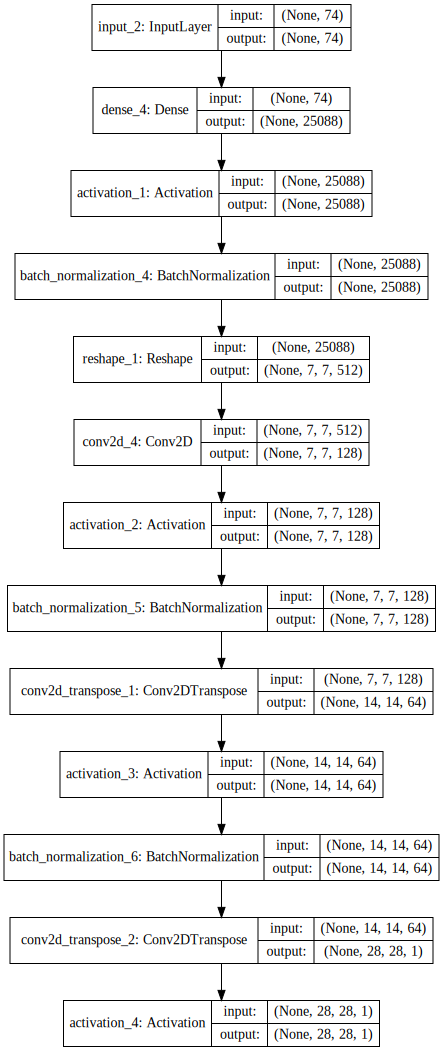

In [5]:
infogan.plot_generator()

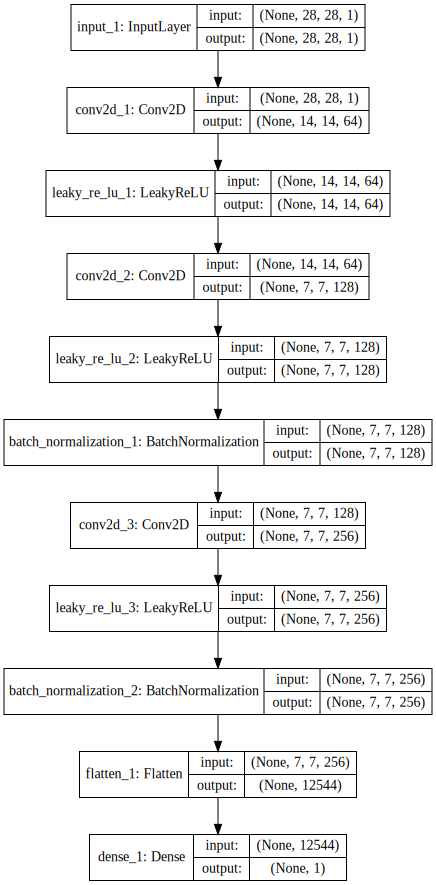

In [6]:
infogan.plot_discriminator()

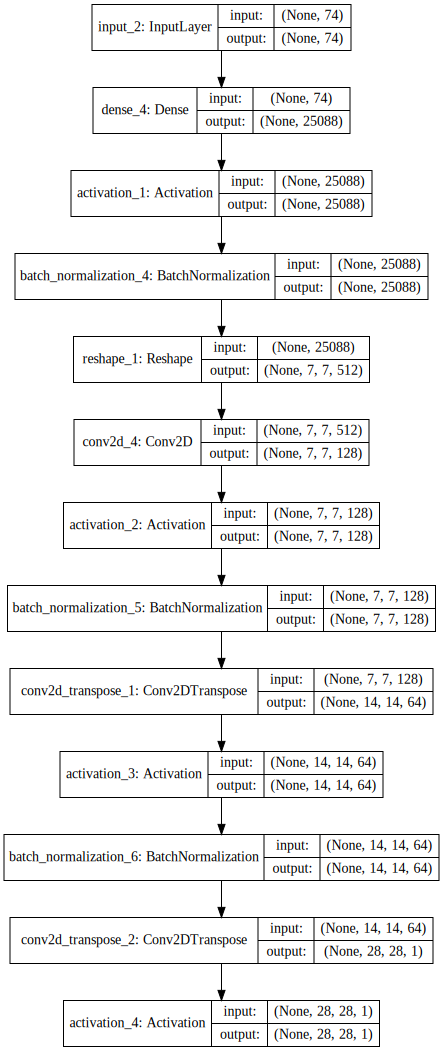

In [7]:
infogan.plot_gan()

## Train the model

C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 1/937, d1=0.250, d2=0.836 g=0.602
>1, 2/937, d1=0.000, d2=2.175 g=0.955
>1, 3/937, d1=0.000, d2=1.308 g=1.435
>1, 4/937, d1=0.000, d2=0.745 g=2.069
>1, 5/937, d1=0.000, d2=1.068 g=1.965
>1, 6/937, d1=0.000, d2=0.648 g=1.917
>1, 7/937, d1=0.000, d2=0.881 g=2.069
>1, 8/937, d1=0.000, d2=0.733 g=1.988


C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 9/937, d1=0.001, d2=0.728 g=1.974
>1, 10/937, d1=0.004, d2=0.672 g=2.444
>1, 11/937, d1=0.002, d2=0.812 g=2.345
>1, 12/937, d1=0.011, d2=0.644 g=2.309
>1, 13/937, d1=0.011, d2=0.537 g=2.310
>1, 14/937, d1=0.009, d2=0.670 g=2.474
>1, 15/937, d1=0.005, d2=0.466 g=2.510
>1, 16/937, d1=0.005, d2=0.795 g=2.616
>1, 17/937, d1=0.018, d2=0.480 g=2.830
>1, 18/937, d1=0.012, d2=0.509 g=2.554
>1, 19/937, d1=0.008, d2=0.751 g=2.469
>1, 20/937, d1=0.014, d2=0.750 g=3.113
>1, 21/937, d1=0.044, d2=0.456 g=2.691
>1, 22/937, d1=0.011, d2=0.525 g=2.807
>1, 23/937, d1=0.004, d2=0.673 g=3.036
>1, 24/937, d1=0.005, d2=0.449 g=3.155
>1, 25/937, d1=0.010, d2=0.433 g=2.719
>1, 26/937, d1=0.007, d2=0.689 g=2.948
>1, 27/937, d1=0.004, d2=0.552 g=3.420
>1, 28/937, d1=0.009, d2=0.365 g=3.753
>1, 29/937, d1=0.015, d2=0.399 g=2.980
>1, 30/937, d1=0.005, d2=0.585 g=2.958
>1, 31/937, d1=0.005, d2=0.563 g=3.587
>1, 32/937, d1=0.013, d2=0.386 g=3.353
>1, 33/937, d1=0.007, d2=0.478 g=3.073
>1, 34/937, d1=0.010, d2=0

>1, 218/937, d1=0.011, d2=0.267 g=4.458
>1, 219/937, d1=0.008, d2=0.250 g=3.640
>1, 220/937, d1=0.005, d2=0.913 g=5.250
>1, 221/937, d1=0.179, d2=0.108 g=4.188
>1, 222/937, d1=0.003, d2=0.595 g=3.922
>1, 223/937, d1=0.000, d2=0.299 g=4.563
>1, 224/937, d1=0.001, d2=0.164 g=3.476
>1, 225/937, d1=0.002, d2=0.786 g=4.362
>1, 226/937, d1=0.019, d2=0.320 g=4.380
>1, 227/937, d1=0.011, d2=0.134 g=3.101
>1, 228/937, d1=0.001, d2=1.533 g=5.215
>1, 229/937, d1=0.159, d2=0.190 g=5.385
>1, 230/937, d1=0.003, d2=0.226 g=3.813
>1, 231/937, d1=0.000, d2=0.553 g=3.877
>1, 232/937, d1=0.001, d2=0.192 g=3.520
>1, 233/937, d1=0.001, d2=0.426 g=3.378
>1, 234/937, d1=0.001, d2=0.626 g=4.271
>1, 235/937, d1=0.003, d2=0.086 g=3.724
>1, 236/937, d1=0.002, d2=0.465 g=3.200
>1, 237/937, d1=0.002, d2=0.354 g=3.529
>1, 238/937, d1=0.006, d2=0.321 g=3.429
>1, 239/937, d1=0.003, d2=0.598 g=3.954
>1, 240/937, d1=0.003, d2=0.244 g=3.924
>1, 241/937, d1=0.012, d2=0.785 g=5.238
>1, 242/937, d1=0.326, d2=0.224 g=2.938


>1, 430/937, d1=0.003, d2=0.541 g=4.849
>1, 431/937, d1=0.016, d2=0.066 g=4.252
>1, 432/937, d1=0.016, d2=0.444 g=3.874
>1, 433/937, d1=0.012, d2=0.281 g=4.174
>1, 434/937, d1=0.031, d2=0.252 g=3.652
>1, 435/937, d1=0.006, d2=0.557 g=4.507
>1, 436/937, d1=0.022, d2=0.071 g=4.074
>1, 437/937, d1=0.008, d2=0.419 g=4.103
>1, 438/937, d1=0.015, d2=0.193 g=3.839
>1, 439/937, d1=0.008, d2=0.406 g=3.916
>1, 440/937, d1=0.023, d2=0.182 g=3.965
>1, 441/937, d1=0.009, d2=0.405 g=4.303
>1, 442/937, d1=0.024, d2=0.239 g=4.282
>1, 443/937, d1=0.015, d2=0.248 g=3.675
>1, 444/937, d1=0.003, d2=0.428 g=4.246
>1, 445/937, d1=0.022, d2=0.165 g=4.149
>1, 446/937, d1=0.012, d2=0.304 g=3.671
>1, 447/937, d1=0.004, d2=0.409 g=4.191
>1, 448/937, d1=0.026, d2=0.139 g=3.495
>1, 449/937, d1=0.005, d2=0.485 g=4.294
>1, 450/937, d1=0.011, d2=0.159 g=3.860
>1, 451/937, d1=0.012, d2=0.365 g=4.003
>1, 452/937, d1=0.007, d2=0.322 g=4.076
>1, 453/937, d1=0.008, d2=0.228 g=4.073
>1, 454/937, d1=0.023, d2=0.490 g=4.717


>1, 640/937, d1=0.006, d2=0.206 g=3.740
>1, 641/937, d1=0.004, d2=0.368 g=4.356
>1, 642/937, d1=0.010, d2=0.117 g=4.069
>1, 643/937, d1=0.007, d2=0.163 g=3.263
>1, 644/937, d1=0.004, d2=0.360 g=3.572
>1, 645/937, d1=0.005, d2=0.167 g=3.309
>1, 646/937, d1=0.004, d2=0.380 g=3.666
>1, 647/937, d1=0.006, d2=0.251 g=4.001
>1, 648/937, d1=0.010, d2=0.174 g=3.626
>1, 649/937, d1=0.006, d2=0.340 g=3.973
>1, 650/937, d1=0.010, d2=0.148 g=3.830
>1, 651/937, d1=0.007, d2=0.383 g=4.212
>1, 652/937, d1=0.010, d2=0.110 g=3.982
>1, 653/937, d1=0.005, d2=0.210 g=3.242
>1, 654/937, d1=0.003, d2=0.313 g=3.688
>1, 655/937, d1=0.006, d2=0.251 g=3.927
>1, 656/937, d1=0.009, d2=0.176 g=3.740
>1, 657/937, d1=0.011, d2=0.293 g=3.575
>1, 658/937, d1=0.005, d2=0.173 g=3.302
>1, 659/937, d1=0.006, d2=0.243 g=3.216
>1, 660/937, d1=0.003, d2=0.430 g=3.973
>1, 661/937, d1=0.008, d2=0.175 g=4.188
>1, 662/937, d1=0.005, d2=0.192 g=3.725
>1, 663/937, d1=0.004, d2=0.241 g=3.360
>1, 664/937, d1=0.003, d2=0.277 g=3.712


>1, 848/937, d1=0.003, d2=0.207 g=3.697
>1, 849/937, d1=0.002, d2=0.441 g=5.218
>1, 850/937, d1=0.007, d2=0.061 g=5.207
>1, 851/937, d1=0.025, d2=0.160 g=3.968
>1, 852/937, d1=0.023, d2=0.329 g=4.038
>1, 853/937, d1=0.004, d2=0.113 g=3.845
>1, 854/937, d1=0.002, d2=0.349 g=4.301
>1, 855/937, d1=0.006, d2=0.263 g=4.780
>1, 856/937, d1=0.011, d2=0.078 g=4.082
>1, 857/937, d1=0.003, d2=0.311 g=4.133
>1, 858/937, d1=0.001, d2=0.160 g=3.911
>1, 859/937, d1=0.005, d2=0.449 g=5.811
>1, 860/937, d1=0.027, d2=0.047 g=5.452
>1, 861/937, d1=0.023, d2=0.109 g=3.772
>1, 862/937, d1=0.006, d2=0.527 g=4.782
>1, 863/937, d1=0.002, d2=0.089 g=4.639
>1, 864/937, d1=0.002, d2=0.230 g=4.198
>1, 865/937, d1=0.001, d2=0.182 g=4.171
>1, 866/937, d1=0.002, d2=0.270 g=4.203
>1, 867/937, d1=0.004, d2=0.164 g=4.052
>1, 868/937, d1=0.003, d2=0.209 g=3.832
>1, 869/937, d1=0.002, d2=0.342 g=4.354
>1, 870/937, d1=0.006, d2=0.213 g=4.724
>1, 871/937, d1=0.006, d2=0.204 g=4.633
>1, 872/937, d1=0.003, d2=0.184 g=4.399


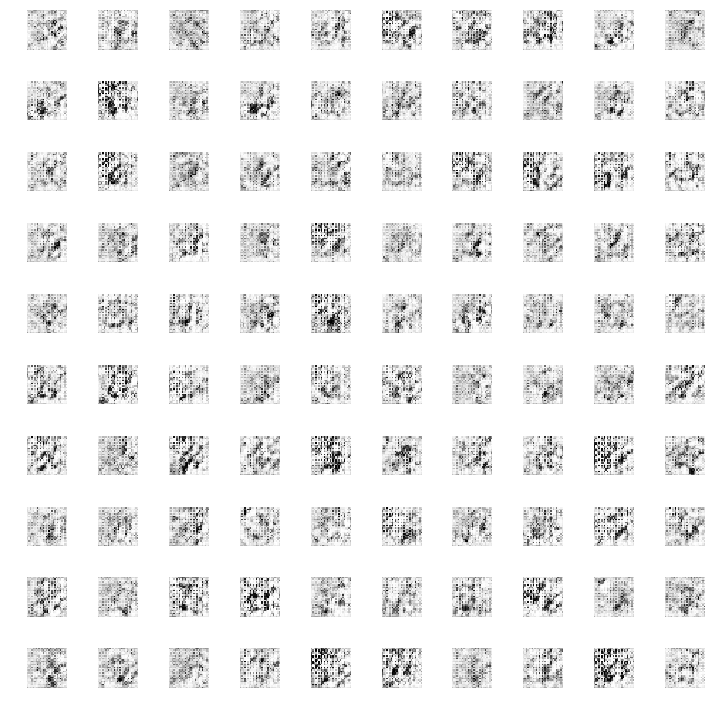

>Saved: infogan_generated_plot_0001.png and infogan_generator_model_0001.h5
>2, 1/937, d1=0.044, d2=0.378 g=4.818
>2, 2/937, d1=0.049, d2=0.235 g=4.532
>2, 3/937, d1=0.026, d2=0.471 g=4.879
>2, 4/937, d1=0.036, d2=0.167 g=4.161
>2, 5/937, d1=0.092, d2=0.810 g=5.110
>2, 6/937, d1=0.200, d2=0.450 g=5.060
>2, 7/937, d1=0.036, d2=0.310 g=5.112
>2, 8/937, d1=0.064, d2=0.296 g=4.428
>2, 9/937, d1=0.042, d2=0.543 g=4.827
>2, 10/937, d1=0.192, d2=0.688 g=4.685
>2, 11/937, d1=0.091, d2=0.382 g=5.349
>2, 12/937, d1=0.215, d2=0.455 g=4.008
>2, 13/937, d1=0.033, d2=0.746 g=6.152
>2, 14/937, d1=0.282, d2=0.310 g=4.424
>2, 15/937, d1=0.025, d2=0.506 g=5.152
>2, 16/937, d1=0.098, d2=0.286 g=4.917
>2, 17/937, d1=0.050, d2=0.331 g=4.554
>2, 18/937, d1=0.043, d2=0.457 g=5.208
>2, 19/937, d1=0.173, d2=0.370 g=4.211
>2, 20/937, d1=0.030, d2=0.368 g=5.081
>2, 21/937, d1=0.144, d2=0.465 g=4.871
>2, 22/937, d1=0.103, d2=0.323 g=4.451
>2, 23/937, d1=0.051, d2=0.510 g=5.299
>2, 24/937, d1=0.286, d2=0.857 g=5.9

>2, 208/937, d1=0.264, d2=0.502 g=5.125
>2, 209/937, d1=0.138, d2=1.189 g=5.814
>2, 210/937, d1=0.285, d2=0.529 g=5.186
>2, 211/937, d1=0.165, d2=0.794 g=4.844
>2, 212/937, d1=0.167, d2=0.462 g=3.975
>2, 213/937, d1=0.099, d2=0.933 g=5.191
>2, 214/937, d1=0.308, d2=0.733 g=4.820
>2, 215/937, d1=0.231, d2=0.609 g=4.218
>2, 216/937, d1=0.108, d2=0.956 g=5.779
>2, 217/937, d1=0.437, d2=0.825 g=4.634
>2, 218/937, d1=0.093, d2=0.667 g=4.789
>2, 219/937, d1=0.124, d2=0.609 g=4.720
>2, 220/937, d1=0.084, d2=0.654 g=5.559
>2, 221/937, d1=0.271, d2=0.766 g=4.718
>2, 222/937, d1=0.129, d2=0.571 g=4.776
>2, 223/937, d1=0.190, d2=0.950 g=5.733
>2, 224/937, d1=0.656, d2=1.597 g=4.918
>2, 225/937, d1=0.230, d2=0.384 g=3.636
>2, 226/937, d1=0.035, d2=1.340 g=5.383
>2, 227/937, d1=0.477, d2=0.663 g=3.968
>2, 228/937, d1=0.085, d2=0.949 g=5.288
>2, 229/937, d1=0.209, d2=0.503 g=4.193
>2, 230/937, d1=0.029, d2=0.882 g=5.291
>2, 231/937, d1=0.150, d2=0.714 g=5.983
>2, 232/937, d1=0.338, d2=0.871 g=4.960


>2, 417/937, d1=0.326, d2=0.936 g=4.393
>2, 418/937, d1=0.173, d2=0.712 g=4.148
>2, 419/937, d1=0.115, d2=0.912 g=4.867
>2, 420/937, d1=0.286, d2=0.764 g=3.535
>2, 421/937, d1=0.055, d2=1.044 g=5.615
>2, 422/937, d1=0.366, d2=0.475 g=4.048
>2, 423/937, d1=0.059, d2=1.248 g=5.657
>2, 424/937, d1=0.442, d2=0.679 g=4.542
>2, 425/937, d1=0.086, d2=0.894 g=4.906
>2, 426/937, d1=0.137, d2=0.853 g=5.192
>2, 427/937, d1=0.332, d2=1.113 g=5.444
>2, 428/937, d1=0.340, d2=0.931 g=4.142
>2, 429/937, d1=0.138, d2=1.005 g=4.634
>2, 430/937, d1=0.144, d2=0.629 g=4.273
>2, 431/937, d1=0.108, d2=1.147 g=5.112
>2, 432/937, d1=0.217, d2=0.697 g=4.621
>2, 433/937, d1=0.091, d2=1.399 g=6.104
>2, 434/937, d1=0.658, d2=1.455 g=4.188
>2, 435/937, d1=0.238, d2=1.528 g=6.082
>2, 436/937, d1=0.181, d2=0.210 g=4.665
>2, 437/937, d1=0.043, d2=0.959 g=4.571
>2, 438/937, d1=0.068, d2=0.466 g=4.253
>2, 439/937, d1=0.039, d2=0.982 g=5.835
>2, 440/937, d1=0.208, d2=0.504 g=5.263
>2, 441/937, d1=0.214, d2=0.999 g=4.831


>2, 625/937, d1=0.163, d2=1.170 g=3.993
>2, 626/937, d1=0.228, d2=0.866 g=3.713
>2, 627/937, d1=0.144, d2=1.341 g=5.006
>2, 628/937, d1=0.595, d2=0.841 g=3.785
>2, 629/937, d1=0.123, d2=1.117 g=4.053
>2, 630/937, d1=0.160, d2=0.812 g=3.794
>2, 631/937, d1=0.140, d2=1.318 g=4.051
>2, 632/937, d1=0.212, d2=1.087 g=4.043
>2, 633/937, d1=0.168, d2=0.872 g=4.383
>2, 634/937, d1=0.240, d2=0.878 g=3.692
>2, 635/937, d1=0.090, d2=1.481 g=5.361
>2, 636/937, d1=0.568, d2=0.890 g=3.998
>2, 637/937, d1=0.056, d2=1.182 g=4.722
>2, 638/937, d1=0.187, d2=0.924 g=4.885
>2, 639/937, d1=0.416, d2=1.389 g=4.585
>2, 640/937, d1=0.153, d2=1.030 g=4.690
>2, 641/937, d1=0.149, d2=1.038 g=5.157
>2, 642/937, d1=0.147, d2=0.538 g=4.105
>2, 643/937, d1=0.058, d2=1.145 g=4.696
>2, 644/937, d1=0.260, d2=0.933 g=4.981
>2, 645/937, d1=0.180, d2=0.849 g=4.570
>2, 646/937, d1=0.116, d2=1.121 g=4.831
>2, 647/937, d1=0.156, d2=0.586 g=4.509
>2, 648/937, d1=0.168, d2=1.196 g=4.743
>2, 649/937, d1=0.141, d2=0.973 g=5.866


>2, 830/937, d1=0.340, d2=1.305 g=3.978
>2, 831/937, d1=0.279, d2=1.583 g=4.450
>2, 832/937, d1=0.424, d2=1.299 g=3.738
>2, 833/937, d1=0.188, d2=0.973 g=4.328
>2, 834/937, d1=0.311, d2=1.198 g=4.224
>2, 835/937, d1=0.250, d2=0.981 g=3.480
>2, 836/937, d1=0.190, d2=1.302 g=3.539
>2, 837/937, d1=0.224, d2=1.214 g=3.936
>2, 838/937, d1=0.335, d2=1.090 g=3.590
>2, 839/937, d1=0.154, d2=0.925 g=3.479
>2, 840/937, d1=0.221, d2=1.544 g=4.061
>2, 841/937, d1=0.354, d2=1.233 g=4.147
>2, 842/937, d1=0.320, d2=0.726 g=2.754
>2, 843/937, d1=0.127, d2=1.751 g=3.838
>2, 844/937, d1=0.501, d2=1.454 g=3.642
>2, 845/937, d1=0.198, d2=1.154 g=3.923
>2, 846/937, d1=0.250, d2=1.381 g=4.012
>2, 847/937, d1=0.219, d2=1.133 g=3.960
>2, 848/937, d1=0.139, d2=0.660 g=3.628
>2, 849/937, d1=0.179, d2=1.379 g=3.939
>2, 850/937, d1=0.176, d2=1.083 g=4.376
>2, 851/937, d1=0.271, d2=0.851 g=3.681
>2, 852/937, d1=0.133, d2=1.042 g=3.295
>2, 853/937, d1=0.101, d2=1.386 g=4.167
>2, 854/937, d1=0.267, d2=1.071 g=3.778


>3, 105/937, d1=0.151, d2=1.179 g=3.360
>3, 106/937, d1=0.095, d2=1.037 g=3.644
>3, 107/937, d1=0.293, d2=1.229 g=3.427
>3, 108/937, d1=0.183, d2=1.202 g=3.720
>3, 109/937, d1=0.240, d2=0.941 g=3.389
>3, 110/937, d1=0.220, d2=1.506 g=3.510
>3, 111/937, d1=0.408, d2=1.297 g=3.198
>3, 112/937, d1=0.153, d2=1.092 g=3.494
>3, 113/937, d1=0.232, d2=0.803 g=3.021
>3, 114/937, d1=0.142, d2=1.639 g=3.766
>3, 115/937, d1=0.376, d2=1.204 g=2.917
>3, 116/937, d1=0.196, d2=1.190 g=2.834
>3, 117/937, d1=0.091, d2=1.146 g=3.526
>3, 118/937, d1=0.158, d2=0.586 g=3.264
>3, 119/937, d1=0.166, d2=1.203 g=3.008
>3, 120/937, d1=0.132, d2=1.096 g=3.583
>3, 121/937, d1=0.212, d2=0.997 g=3.737
>3, 122/937, d1=0.316, d2=1.437 g=3.065
>3, 123/937, d1=0.095, d2=1.499 g=4.125
>3, 124/937, d1=0.251, d2=0.915 g=4.098
>3, 125/937, d1=0.311, d2=1.055 g=3.112
>3, 126/937, d1=0.089, d2=1.183 g=3.610
>3, 127/937, d1=0.285, d2=1.224 g=3.610
>3, 128/937, d1=0.146, d2=1.206 g=4.350
>3, 129/937, d1=0.402, d2=1.131 g=3.177


>3, 314/937, d1=0.263, d2=0.858 g=3.048
>3, 315/937, d1=0.100, d2=1.236 g=3.461
>3, 316/937, d1=0.132, d2=0.766 g=3.699
>3, 317/937, d1=0.176, d2=1.051 g=3.562
>3, 318/937, d1=0.164, d2=1.038 g=3.715
>3, 319/937, d1=0.256, d2=1.113 g=2.935
>3, 320/937, d1=0.053, d2=1.236 g=3.772
>3, 321/937, d1=0.157, d2=0.754 g=3.775
>3, 322/937, d1=0.204, d2=1.342 g=3.681
>3, 323/937, d1=0.193, d2=1.073 g=3.778
>3, 324/937, d1=0.270, d2=0.959 g=3.276
>3, 325/937, d1=0.148, d2=1.337 g=3.818
>3, 326/937, d1=0.271, d2=0.852 g=3.312
>3, 327/937, d1=0.115, d2=1.077 g=3.536
>3, 328/937, d1=0.188, d2=0.945 g=3.482
>3, 329/937, d1=0.187, d2=0.869 g=3.301
>3, 330/937, d1=0.109, d2=1.298 g=3.808
>3, 331/937, d1=0.248, d2=0.888 g=3.493
>3, 332/937, d1=0.228, d2=1.342 g=3.378
>3, 333/937, d1=0.224, d2=1.341 g=4.062
>3, 334/937, d1=0.309, d2=0.963 g=3.739
>3, 335/937, d1=0.256, d2=1.363 g=3.747
>3, 336/937, d1=0.224, d2=1.073 g=4.168
>3, 337/937, d1=0.194, d2=0.796 g=3.588
>3, 338/937, d1=0.236, d2=1.624 g=4.337


>3, 519/937, d1=0.104, d2=1.309 g=3.829
>3, 520/937, d1=0.218, d2=1.249 g=3.997
>3, 521/937, d1=0.349, d2=0.902 g=2.781
>3, 522/937, d1=0.054, d2=1.376 g=3.165
>3, 523/937, d1=0.224, d2=1.025 g=3.134
>3, 524/937, d1=0.141, d2=0.983 g=3.536
>3, 525/937, d1=0.186, d2=1.118 g=3.434
>3, 526/937, d1=0.097, d2=0.967 g=3.335
>3, 527/937, d1=0.155, d2=0.995 g=3.168
>3, 528/937, d1=0.143, d2=1.203 g=3.645
>3, 529/937, d1=0.258, d2=0.932 g=3.410
>3, 530/937, d1=0.203, d2=1.293 g=3.558
>3, 531/937, d1=0.169, d2=1.151 g=3.731
>3, 532/937, d1=0.363, d2=1.478 g=3.563
>3, 533/937, d1=0.475, d2=1.729 g=3.833
>3, 534/937, d1=0.202, d2=0.857 g=3.668
>3, 535/937, d1=0.208, d2=1.325 g=3.224
>3, 536/937, d1=0.162, d2=1.220 g=3.688
>3, 537/937, d1=0.292, d2=1.255 g=3.427
>3, 538/937, d1=0.180, d2=0.861 g=3.544
>3, 539/937, d1=0.187, d2=1.479 g=3.301
>3, 540/937, d1=0.171, d2=1.190 g=3.688
>3, 541/937, d1=0.157, d2=0.838 g=3.496
>3, 542/937, d1=0.124, d2=1.457 g=3.860
>3, 543/937, d1=0.348, d2=1.333 g=3.203


>3, 727/937, d1=0.253, d2=1.323 g=2.832
>3, 728/937, d1=0.178, d2=1.445 g=3.585
>3, 729/937, d1=0.269, d2=1.075 g=3.884
>3, 730/937, d1=0.278, d2=1.119 g=3.268
>3, 731/937, d1=0.274, d2=1.370 g=3.621
>3, 732/937, d1=0.377, d2=1.149 g=3.177
>3, 733/937, d1=0.208, d2=1.230 g=4.142
>3, 734/937, d1=0.321, d2=0.875 g=3.048
>3, 735/937, d1=0.124, d2=1.285 g=3.397
>3, 736/937, d1=0.334, d2=1.033 g=2.860
>3, 737/937, d1=0.200, d2=1.352 g=3.555
>3, 738/937, d1=0.300, d2=0.719 g=2.955
>3, 739/937, d1=0.173, d2=1.579 g=3.261
>3, 740/937, d1=0.379, d2=1.260 g=2.637
>3, 741/937, d1=0.135, d2=1.054 g=3.134
>3, 742/937, d1=0.221, d2=1.579 g=3.597
>3, 743/937, d1=0.446, d2=0.942 g=2.782
>3, 744/937, d1=0.114, d2=1.112 g=2.762
>3, 745/937, d1=0.102, d2=0.830 g=2.947
>3, 746/937, d1=0.194, d2=1.367 g=2.852
>3, 747/937, d1=0.164, d2=1.298 g=3.471
>3, 748/937, d1=0.373, d2=0.784 g=2.843
>3, 749/937, d1=0.071, d2=1.277 g=2.848
>3, 750/937, d1=0.186, d2=0.900 g=3.339
>3, 751/937, d1=0.152, d2=0.824 g=2.722


>4, 1/937, d1=0.004, d2=3.260 g=7.358
>4, 2/937, d1=0.018, d2=1.995 g=7.030
>4, 3/937, d1=0.610, d2=2.792 g=5.481
>4, 4/937, d1=0.132, d2=2.545 g=5.568
>4, 5/937, d1=0.663, d2=1.010 g=3.812
>4, 6/937, d1=0.015, d2=3.315 g=4.050
>4, 7/937, d1=0.183, d2=2.614 g=4.523
>4, 8/937, d1=0.560, d2=1.066 g=3.637
>4, 9/937, d1=0.102, d2=1.379 g=3.564
>4, 10/937, d1=0.575, d2=0.981 g=2.174
>4, 11/937, d1=0.061, d2=1.809 g=3.336
>4, 12/937, d1=0.211, d2=0.773 g=2.983
>4, 13/937, d1=0.632, d2=1.855 g=2.372
>4, 14/937, d1=0.275, d2=1.974 g=3.759
>4, 15/937, d1=0.959, d2=0.980 g=1.834
>4, 16/937, d1=0.185, d2=2.174 g=3.771
>4, 17/937, d1=0.607, d2=1.485 g=3.124
>4, 18/937, d1=0.351, d2=1.518 g=2.152
>4, 19/937, d1=0.183, d2=1.073 g=2.333
>4, 20/937, d1=0.208, d2=0.963 g=2.441
>4, 21/937, d1=0.443, d2=1.506 g=1.702
>4, 22/937, d1=0.341, d2=1.850 g=3.000
>4, 23/937, d1=0.575, d2=0.997 g=2.580
>4, 24/937, d1=0.443, d2=1.414 g=2.489
>4, 25/937, d1=0.413, d2=1.343 g=2.119
>4, 26/937, d1=0.147, d2=0.715 g=1

>4, 216/937, d1=0.289, d2=1.017 g=3.227
>4, 217/937, d1=0.229, d2=1.716 g=3.693
>4, 218/937, d1=0.334, d2=1.107 g=3.373
>4, 219/937, d1=0.234, d2=1.501 g=3.489
>4, 220/937, d1=0.295, d2=1.063 g=2.950
>4, 221/937, d1=0.188, d2=1.079 g=2.833
>4, 222/937, d1=0.128, d2=1.599 g=3.495
>4, 223/937, d1=0.405, d2=0.989 g=2.990
>4, 224/937, d1=0.086, d2=1.227 g=3.446
>4, 225/937, d1=0.233, d2=1.095 g=3.023
>4, 226/937, d1=0.174, d2=1.256 g=3.532
>4, 227/937, d1=0.204, d2=1.217 g=3.719
>4, 228/937, d1=0.184, d2=1.298 g=4.457
>4, 229/937, d1=0.313, d2=0.620 g=3.150
>4, 230/937, d1=0.132, d2=1.282 g=3.397
>4, 231/937, d1=0.198, d2=1.191 g=3.595
>4, 232/937, d1=0.136, d2=0.954 g=3.920
>4, 233/937, d1=0.231, d2=1.025 g=3.644
>4, 234/937, d1=0.140, d2=1.347 g=4.134
>4, 235/937, d1=0.228, d2=0.634 g=3.501
>4, 236/937, d1=0.130, d2=1.557 g=4.085
>4, 237/937, d1=0.232, d2=0.790 g=3.361
>4, 238/937, d1=0.165, d2=1.497 g=3.193
>4, 239/937, d1=0.134, d2=0.839 g=3.252
>4, 240/937, d1=0.184, d2=1.368 g=3.518


>4, 421/937, d1=0.172, d2=1.648 g=4.985
>4, 422/937, d1=0.252, d2=0.586 g=3.508
>4, 423/937, d1=0.085, d2=1.801 g=4.234
>4, 424/937, d1=0.199, d2=1.119 g=4.739
>4, 425/937, d1=0.222, d2=1.104 g=4.037
>4, 426/937, d1=0.141, d2=1.072 g=4.062
>4, 427/937, d1=0.284, d2=1.734 g=4.307
>4, 428/937, d1=0.211, d2=0.767 g=3.471
>4, 429/937, d1=0.089, d2=1.522 g=4.475
>4, 430/937, d1=0.140, d2=0.932 g=4.371
>4, 431/937, d1=0.302, d2=1.532 g=4.233
>4, 432/937, d1=0.315, d2=1.611 g=4.062
>4, 433/937, d1=0.250, d2=1.111 g=4.261
>4, 434/937, d1=0.222, d2=1.160 g=4.412
>4, 435/937, d1=0.219, d2=0.990 g=4.136
>4, 436/937, d1=0.116, d2=1.161 g=4.056
>4, 437/937, d1=0.189, d2=1.200 g=4.205
>4, 438/937, d1=0.130, d2=1.114 g=4.756
>4, 439/937, d1=0.350, d2=1.199 g=4.307
>4, 440/937, d1=0.183, d2=1.226 g=4.500
>4, 441/937, d1=0.194, d2=0.906 g=3.747
>4, 442/937, d1=0.255, d2=1.880 g=4.382
>4, 443/937, d1=0.279, d2=1.198 g=4.679
>4, 444/937, d1=0.237, d2=0.769 g=3.141
>4, 445/937, d1=0.067, d2=2.232 g=5.233


>4, 626/937, d1=0.000, d2=0.037 g=5.719
>4, 627/937, d1=0.000, d2=4.248 g=9.352
>4, 628/937, d1=0.001, d2=0.069 g=9.719
>4, 629/937, d1=0.001, d2=0.453 g=5.714
>4, 630/937, d1=0.000, d2=3.943 g=9.872
>4, 631/937, d1=0.000, d2=0.380 g=9.430
>4, 632/937, d1=0.000, d2=2.999 g=5.851
>4, 633/937, d1=0.000, d2=7.536 g=6.444
>4, 634/937, d1=0.000, d2=4.653 g=6.874
>4, 635/937, d1=0.015, d2=2.223 g=5.686
>4, 636/937, d1=0.001, d2=3.845 g=7.353
>4, 637/937, d1=0.271, d2=0.891 g=5.164
>4, 638/937, d1=0.281, d2=3.529 g=4.843
>4, 639/937, d1=0.095, d2=0.521 g=3.851
>4, 640/937, d1=0.010, d2=3.309 g=4.665
>4, 641/937, d1=0.103, d2=2.713 g=4.354
>4, 642/937, d1=0.168, d2=1.723 g=4.603
>4, 643/937, d1=0.108, d2=0.960 g=4.387
>4, 644/937, d1=0.094, d2=1.986 g=3.640
>4, 645/937, d1=0.035, d2=0.708 g=3.468
>4, 646/937, d1=0.007, d2=1.924 g=3.969
>4, 647/937, d1=0.008, d2=0.698 g=3.887
>4, 648/937, d1=0.052, d2=1.564 g=4.536
>4, 649/937, d1=0.349, d2=0.878 g=4.603
>4, 650/937, d1=0.204, d2=1.219 g=4.073


>4, 838/937, d1=0.029, d2=0.638 g=3.053
>4, 839/937, d1=0.050, d2=0.796 g=3.007
>4, 840/937, d1=0.036, d2=0.673 g=3.003
>4, 841/937, d1=0.080, d2=0.913 g=2.842
>4, 842/937, d1=0.027, d2=0.761 g=3.084
>4, 843/937, d1=0.062, d2=0.775 g=3.276
>4, 844/937, d1=0.058, d2=0.680 g=2.990
>4, 845/937, d1=0.046, d2=0.868 g=3.180
>4, 846/937, d1=0.025, d2=0.601 g=2.875
>4, 847/937, d1=0.065, d2=0.832 g=2.839
>4, 848/937, d1=0.015, d2=0.970 g=3.327
>4, 849/937, d1=0.045, d2=0.609 g=3.284
>4, 850/937, d1=0.032, d2=0.511 g=2.884
>4, 851/937, d1=0.019, d2=1.243 g=3.445
>4, 852/937, d1=0.044, d2=0.523 g=3.408
>4, 853/937, d1=0.052, d2=0.762 g=3.089
>4, 854/937, d1=0.025, d2=0.995 g=3.446
>4, 855/937, d1=0.051, d2=0.792 g=3.755
>4, 856/937, d1=0.070, d2=0.624 g=3.906
>4, 857/937, d1=0.051, d2=0.539 g=3.102
>4, 858/937, d1=0.025, d2=1.291 g=3.989
>4, 859/937, d1=0.159, d2=0.465 g=2.898
>4, 860/937, d1=0.056, d2=1.677 g=3.360
>4, 861/937, d1=0.190, d2=0.671 g=3.177
>4, 862/937, d1=0.040, d2=0.947 g=2.974


>5, 115/937, d1=0.006, d2=0.184 g=4.500
>5, 116/937, d1=0.000, d2=4.870 g=8.960
>5, 117/937, d1=0.011, d2=0.002 g=9.311
>5, 118/937, d1=0.001, d2=0.209 g=4.356
>5, 119/937, d1=0.001, d2=4.543 g=8.543
>5, 120/937, d1=0.003, d2=0.002 g=8.972
>5, 121/937, d1=0.003, d2=0.087 g=4.112
>5, 122/937, d1=0.006, d2=4.410 g=8.269
>5, 123/937, d1=0.069, d2=0.003 g=8.662
>5, 124/937, d1=0.004, d2=0.130 g=4.092
>5, 125/937, d1=0.000, d2=4.196 g=8.531
>5, 126/937, d1=0.003, d2=0.002 g=9.205
>5, 127/937, d1=0.010, d2=0.077 g=4.214
>5, 128/937, d1=0.000, d2=4.721 g=8.404
>5, 129/937, d1=0.003, d2=0.002 g=9.007
>5, 130/937, d1=0.005, d2=0.104 g=4.207
>5, 131/937, d1=0.000, d2=5.329 g=9.199
>5, 132/937, d1=0.007, d2=0.001 g=10.075
>5, 133/937, d1=0.008, d2=0.046 g=4.472
>5, 134/937, d1=0.000, d2=5.472 g=8.885
>5, 135/937, d1=0.002, d2=0.001 g=9.423
>5, 136/937, d1=0.011, d2=0.095 g=4.201
>5, 137/937, d1=0.001, d2=5.166 g=8.390
>5, 138/937, d1=0.002, d2=0.002 g=8.994
>5, 139/937, d1=0.010, d2=0.094 g=4.052

>5, 324/937, d1=0.223, d2=0.893 g=2.654
>5, 325/937, d1=0.088, d2=0.700 g=2.442
>5, 326/937, d1=0.033, d2=0.810 g=2.828
>5, 327/937, d1=0.041, d2=0.956 g=2.905
>5, 328/937, d1=0.207, d2=0.603 g=2.768
>5, 329/937, d1=0.024, d2=0.844 g=2.802
>5, 330/937, d1=0.047, d2=0.738 g=3.063
>5, 331/937, d1=0.022, d2=0.406 g=2.944
>5, 332/937, d1=0.063, d2=0.894 g=2.845
>5, 333/937, d1=0.049, d2=0.665 g=3.179
>5, 334/937, d1=0.040, d2=0.686 g=2.991
>5, 335/937, d1=0.030, d2=0.952 g=3.387
>5, 336/937, d1=0.068, d2=0.646 g=3.246
>5, 337/937, d1=0.163, d2=0.843 g=2.873
>5, 338/937, d1=0.055, d2=1.013 g=3.477
>5, 339/937, d1=0.159, d2=0.791 g=3.483
>5, 340/937, d1=0.048, d2=0.568 g=3.001
>5, 341/937, d1=0.094, d2=1.049 g=3.179
>5, 342/937, d1=0.047, d2=0.737 g=3.535
>5, 343/937, d1=0.182, d2=0.641 g=3.263
>5, 344/937, d1=0.049, d2=1.098 g=3.671
>5, 345/937, d1=0.137, d2=0.590 g=3.533
>5, 346/937, d1=0.119, d2=0.944 g=3.946
>5, 347/937, d1=0.195, d2=0.995 g=4.340
>5, 348/937, d1=0.113, d2=0.482 g=3.578


>5, 531/937, d1=0.129, d2=0.983 g=3.604
>5, 532/937, d1=0.243, d2=0.994 g=3.642
>5, 533/937, d1=0.144, d2=0.793 g=3.149
>5, 534/937, d1=0.110, d2=1.306 g=3.711
>5, 535/937, d1=0.222, d2=1.145 g=4.119
>5, 536/937, d1=0.224, d2=0.727 g=3.282
>5, 537/937, d1=0.137, d2=1.152 g=3.508
>5, 538/937, d1=0.225, d2=1.096 g=4.093
>5, 539/937, d1=0.333, d2=1.030 g=3.320
>5, 540/937, d1=0.151, d2=1.491 g=4.274
>5, 541/937, d1=0.196, d2=0.502 g=3.556
>5, 542/937, d1=0.178, d2=2.005 g=4.549
>5, 543/937, d1=0.251, d2=0.652 g=3.646
>5, 544/937, d1=0.238, d2=1.518 g=3.824
>5, 545/937, d1=0.230, d2=1.375 g=4.588
>5, 546/937, d1=0.401, d2=0.904 g=3.598
>5, 547/937, d1=0.242, d2=1.520 g=3.742
>5, 548/937, d1=0.122, d2=0.644 g=3.711
>5, 549/937, d1=0.104, d2=0.988 g=3.432
>5, 550/937, d1=0.155, d2=0.842 g=3.067
>5, 551/937, d1=0.124, d2=1.235 g=4.022
>5, 552/937, d1=0.280, d2=0.937 g=4.318
>5, 553/937, d1=0.278, d2=1.463 g=4.145
>5, 554/937, d1=0.282, d2=0.865 g=3.756
>5, 555/937, d1=0.099, d2=1.405 g=4.905


>5, 741/937, d1=0.238, d2=1.238 g=4.324
>5, 742/937, d1=0.228, d2=0.888 g=4.036
>5, 743/937, d1=0.188, d2=1.058 g=3.682
>5, 744/937, d1=0.169, d2=1.398 g=4.483
>5, 745/937, d1=0.496, d2=1.210 g=3.558
>5, 746/937, d1=0.092, d2=0.982 g=3.846
>5, 747/937, d1=0.201, d2=1.175 g=3.950
>5, 748/937, d1=0.195, d2=1.088 g=3.822
>5, 749/937, d1=0.232, d2=0.857 g=3.373
>5, 750/937, d1=0.117, d2=1.091 g=3.838
>5, 751/937, d1=0.183, d2=1.067 g=3.765
>5, 752/937, d1=0.168, d2=1.022 g=4.103
>5, 753/937, d1=0.270, d2=1.200 g=3.899
>5, 754/937, d1=0.124, d2=1.055 g=3.750
>5, 755/937, d1=0.295, d2=1.199 g=3.544
>5, 756/937, d1=0.118, d2=0.956 g=3.930
>5, 757/937, d1=0.154, d2=0.784 g=3.586
>5, 758/937, d1=0.190, d2=1.233 g=3.675
>5, 759/937, d1=0.198, d2=1.066 g=3.719
>5, 760/937, d1=0.189, d2=0.720 g=3.002
>5, 761/937, d1=0.091, d2=1.298 g=3.355
>5, 762/937, d1=0.149, d2=0.836 g=3.871
>5, 763/937, d1=0.200, d2=1.291 g=3.817
>5, 764/937, d1=0.261, d2=1.125 g=3.599
>5, 765/937, d1=0.168, d2=1.001 g=3.585


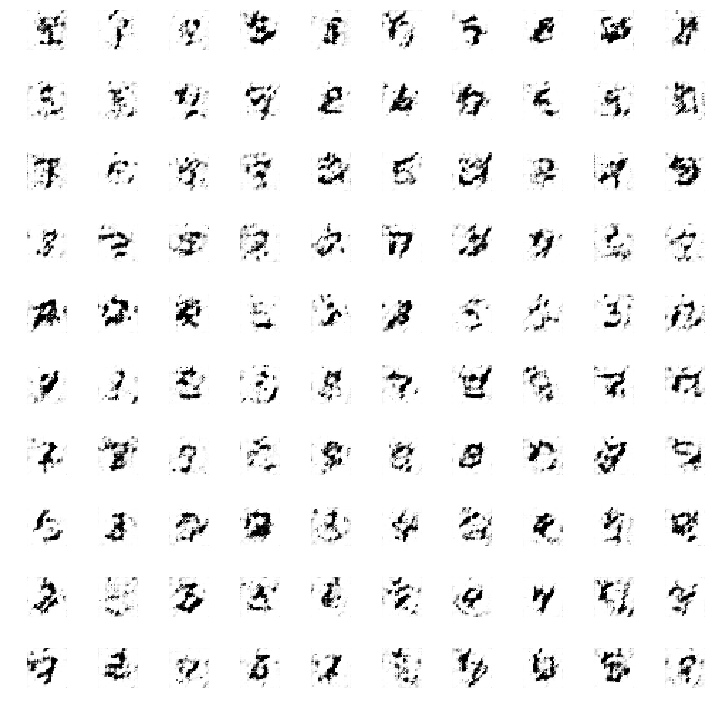

>Saved: infogan_generated_plot_0005.png and infogan_generator_model_0005.h5
>6, 1/937, d1=0.149, d2=1.053 g=4.200
>6, 2/937, d1=0.309, d2=1.252 g=3.939
>6, 3/937, d1=0.207, d2=1.110 g=4.285
>6, 4/937, d1=0.324, d2=1.270 g=3.803
>6, 5/937, d1=0.130, d2=1.232 g=4.864
>6, 6/937, d1=0.267, d2=0.903 g=4.662
>6, 7/937, d1=0.231, d2=0.865 g=4.051
>6, 8/937, d1=0.167, d2=1.432 g=4.598
>6, 9/937, d1=0.333, d2=1.129 g=4.509
>6, 10/937, d1=0.288, d2=1.095 g=4.151
>6, 11/937, d1=0.226, d2=1.038 g=4.211
>6, 12/937, d1=0.130, d2=1.177 g=4.928
>6, 13/937, d1=0.573, d2=1.498 g=4.680
>6, 14/937, d1=0.315, d2=1.336 g=5.011
>6, 15/937, d1=0.379, d2=1.282 g=4.098
>6, 16/937, d1=0.209, d2=1.449 g=4.724
>6, 17/937, d1=0.320, d2=0.948 g=4.164
>6, 18/937, d1=0.221, d2=0.937 g=3.711
>6, 19/937, d1=0.202, d2=1.628 g=4.725
>6, 20/937, d1=0.333, d2=0.747 g=3.808
>6, 21/937, d1=0.100, d2=1.032 g=3.921
>6, 22/937, d1=0.238, d2=1.545 g=4.353
>6, 23/937, d1=0.275, d2=0.839 g=4.197
>6, 24/937, d1=0.315, d2=1.666 g=4.5

>6, 214/937, d1=0.255, d2=0.834 g=3.622
>6, 215/937, d1=0.171, d2=1.381 g=4.253
>6, 216/937, d1=0.363, d2=1.096 g=3.707
>6, 217/937, d1=0.173, d2=1.092 g=4.056
>6, 218/937, d1=0.266, d2=1.079 g=3.513
>6, 219/937, d1=0.175, d2=1.539 g=4.303
>6, 220/937, d1=0.397, d2=0.901 g=3.608
>6, 221/937, d1=0.183, d2=1.253 g=3.790
>6, 222/937, d1=0.292, d2=1.391 g=4.082
>6, 223/937, d1=0.294, d2=0.848 g=3.294
>6, 224/937, d1=0.167, d2=1.447 g=3.796
>6, 225/937, d1=0.293, d2=0.955 g=3.678
>6, 226/937, d1=0.161, d2=1.212 g=3.989
>6, 227/937, d1=0.359, d2=0.913 g=2.962
>6, 228/937, d1=0.138, d2=1.723 g=4.446
>6, 229/937, d1=0.484, d2=1.111 g=3.856
>6, 230/937, d1=0.341, d2=1.431 g=3.793
>6, 231/937, d1=0.229, d2=0.962 g=4.010
>6, 232/937, d1=0.267, d2=1.248 g=3.566
>6, 233/937, d1=0.316, d2=1.405 g=3.775
>6, 234/937, d1=0.249, d2=0.894 g=3.588
>6, 235/937, d1=0.229, d2=1.350 g=3.875
>6, 236/937, d1=0.235, d2=0.854 g=3.646
>6, 237/937, d1=0.146, d2=0.952 g=3.664
>6, 238/937, d1=0.180, d2=1.190 g=3.721


>6, 422/937, d1=0.162, d2=1.637 g=3.610
>6, 423/937, d1=0.248, d2=0.917 g=3.579
>6, 424/937, d1=0.212, d2=0.959 g=3.262
>6, 425/937, d1=0.172, d2=1.480 g=3.733
>6, 426/937, d1=0.292, d2=0.912 g=3.602
>6, 427/937, d1=0.176, d2=1.113 g=3.933
>6, 428/937, d1=0.359, d2=1.279 g=3.233
>6, 429/937, d1=0.159, d2=1.016 g=3.740
>6, 430/937, d1=0.403, d2=1.322 g=3.536
>6, 431/937, d1=0.126, d2=0.969 g=3.981
>6, 432/937, d1=0.236, d2=0.978 g=3.744
>6, 433/937, d1=0.180, d2=0.961 g=3.545
>6, 434/937, d1=0.171, d2=0.998 g=3.346
>6, 435/937, d1=0.199, d2=1.101 g=3.629
>6, 436/937, d1=0.290, d2=1.221 g=3.842
>6, 437/937, d1=0.243, d2=1.088 g=3.770
>6, 438/937, d1=0.275, d2=1.295 g=3.917
>6, 439/937, d1=0.271, d2=1.024 g=3.568
>6, 440/937, d1=0.221, d2=1.445 g=4.511
>6, 441/937, d1=0.380, d2=1.112 g=4.086
>6, 442/937, d1=0.317, d2=1.279 g=3.637
>6, 443/937, d1=0.181, d2=1.384 g=4.390
>6, 444/937, d1=0.339, d2=0.987 g=3.575
>6, 445/937, d1=0.270, d2=1.075 g=3.371
>6, 446/937, d1=0.179, d2=1.454 g=4.448


>6, 632/937, d1=0.130, d2=1.513 g=3.934
>6, 633/937, d1=0.289, d2=0.771 g=3.250
>6, 634/937, d1=0.245, d2=1.572 g=3.695
>6, 635/937, d1=0.218, d2=0.846 g=3.756
>6, 636/937, d1=0.232, d2=1.468 g=4.088
>6, 637/937, d1=0.452, d2=1.104 g=3.050
>6, 638/937, d1=0.170, d2=1.759 g=4.236
>6, 639/937, d1=0.459, d2=0.977 g=3.359
>6, 640/937, d1=0.423, d2=1.829 g=3.138
>6, 641/937, d1=0.174, d2=1.220 g=4.231
>6, 642/937, d1=0.403, d2=1.045 g=3.093
>6, 643/937, d1=0.164, d2=1.419 g=3.779
>6, 644/937, d1=0.276, d2=1.236 g=3.760
>6, 645/937, d1=0.346, d2=1.685 g=3.783
>6, 646/937, d1=0.348, d2=1.415 g=4.228
>6, 647/937, d1=0.375, d2=1.599 g=4.571
>6, 648/937, d1=0.388, d2=1.062 g=3.708
>6, 649/937, d1=0.268, d2=1.679 g=4.447
>6, 650/937, d1=0.160, d2=0.746 g=4.243
>6, 651/937, d1=0.429, d2=1.531 g=3.528
>6, 652/937, d1=0.213, d2=1.040 g=3.610
>6, 653/937, d1=0.152, d2=1.468 g=4.341
>6, 654/937, d1=0.328, d2=1.139 g=4.170
>6, 655/937, d1=0.264, d2=1.046 g=3.481
>6, 656/937, d1=0.156, d2=1.135 g=4.006


>6, 844/937, d1=0.152, d2=1.378 g=4.090
>6, 845/937, d1=0.410, d2=1.149 g=3.510
>6, 846/937, d1=0.284, d2=1.433 g=3.653
>6, 847/937, d1=0.309, d2=1.814 g=4.760
>6, 848/937, d1=0.397, d2=0.949 g=3.894
>6, 849/937, d1=0.431, d2=1.457 g=3.481
>6, 850/937, d1=0.271, d2=1.606 g=4.529
>6, 851/937, d1=0.579, d2=1.249 g=3.714
>6, 852/937, d1=0.224, d2=1.418 g=3.774
>6, 853/937, d1=0.292, d2=1.120 g=3.453
>6, 854/937, d1=0.213, d2=1.138 g=3.648
>6, 855/937, d1=0.275, d2=1.357 g=3.615
>6, 856/937, d1=0.343, d2=1.700 g=4.092
>6, 857/937, d1=0.348, d2=1.136 g=3.751
>6, 858/937, d1=0.298, d2=1.327 g=3.446
>6, 859/937, d1=0.258, d2=1.237 g=3.913
>6, 860/937, d1=0.320, d2=1.376 g=4.409
>6, 861/937, d1=0.370, d2=1.090 g=3.555
>6, 862/937, d1=0.237, d2=1.730 g=3.759
>6, 863/937, d1=0.397, d2=0.931 g=3.509
>6, 864/937, d1=0.224, d2=1.138 g=3.285
>6, 865/937, d1=0.227, d2=1.281 g=3.823
>6, 866/937, d1=0.506, d2=1.579 g=3.043
>6, 867/937, d1=0.218, d2=1.735 g=4.063
>6, 868/937, d1=0.491, d2=0.998 g=3.186


>7, 121/937, d1=0.325, d2=1.262 g=4.200
>7, 122/937, d1=0.351, d2=0.915 g=3.527
>7, 123/937, d1=0.168, d2=1.276 g=3.587
>7, 124/937, d1=0.234, d2=1.080 g=3.682
>7, 125/937, d1=0.300, d2=1.627 g=4.174
>7, 126/937, d1=0.558, d2=1.198 g=2.847
>7, 127/937, d1=0.208, d2=1.333 g=2.820
>7, 128/937, d1=0.246, d2=1.724 g=3.955
>7, 129/937, d1=0.483, d2=0.911 g=2.710
>7, 130/937, d1=0.180, d2=1.666 g=3.346
>7, 131/937, d1=0.236, d2=1.106 g=3.571
>7, 132/937, d1=0.376, d2=1.360 g=3.555
>7, 133/937, d1=0.312, d2=1.086 g=3.212
>7, 134/937, d1=0.385, d2=2.158 g=3.166
>7, 135/937, d1=0.308, d2=1.354 g=3.913
>7, 136/937, d1=0.517, d2=1.516 g=3.455
>7, 137/937, d1=0.268, d2=1.089 g=3.166
>7, 138/937, d1=0.246, d2=1.386 g=3.248
>7, 139/937, d1=0.287, d2=1.474 g=3.432
>7, 140/937, d1=0.357, d2=1.150 g=3.202
>7, 141/937, d1=0.273, d2=1.718 g=3.363
>7, 142/937, d1=0.328, d2=1.579 g=4.060
>7, 143/937, d1=0.323, d2=1.007 g=3.223
>7, 144/937, d1=0.271, d2=1.411 g=3.000
>7, 145/937, d1=0.241, d2=1.264 g=3.368


>7, 326/937, d1=0.214, d2=1.473 g=3.574
>7, 327/937, d1=0.419, d2=1.424 g=3.736
>7, 328/937, d1=0.489, d2=1.888 g=3.410
>7, 329/937, d1=0.305, d2=1.234 g=3.599
>7, 330/937, d1=0.309, d2=1.109 g=3.291
>7, 331/937, d1=0.290, d2=1.345 g=3.122
>7, 332/937, d1=0.346, d2=1.368 g=2.768
>7, 333/937, d1=0.283, d2=1.493 g=2.940
>7, 334/937, d1=0.317, d2=1.600 g=3.118
>7, 335/937, d1=0.271, d2=1.352 g=3.753
>7, 336/937, d1=0.321, d2=1.121 g=3.294
>7, 337/937, d1=0.236, d2=1.260 g=2.888
>7, 338/937, d1=0.178, d2=1.273 g=3.174
>7, 339/937, d1=0.225, d2=1.067 g=3.113
>7, 340/937, d1=0.249, d2=1.543 g=3.651
>7, 341/937, d1=0.306, d2=1.189 g=3.563
>7, 342/937, d1=0.279, d2=1.151 g=2.925
>7, 343/937, d1=0.198, d2=1.413 g=3.665
>7, 344/937, d1=0.340, d2=1.055 g=3.440
>7, 345/937, d1=0.354, d2=1.400 g=3.343
>7, 346/937, d1=0.190, d2=0.948 g=3.481
>7, 347/937, d1=0.347, d2=1.229 g=2.825
>7, 348/937, d1=0.446, d2=1.959 g=3.363
>7, 349/937, d1=0.269, d2=1.079 g=3.585
>7, 350/937, d1=0.583, d2=2.071 g=3.391


>7, 532/937, d1=0.255, d2=1.326 g=3.571
>7, 533/937, d1=0.200, d2=1.028 g=3.461
>7, 534/937, d1=0.354, d2=1.812 g=3.393
>7, 535/937, d1=0.245, d2=1.236 g=3.440
>7, 536/937, d1=0.342, d2=1.515 g=3.198
>7, 537/937, d1=0.221, d2=1.400 g=3.335
>7, 538/937, d1=0.386, d2=1.824 g=3.639
>7, 539/937, d1=0.487, d2=1.702 g=3.807
>7, 540/937, d1=0.608, d2=1.757 g=3.312
>7, 541/937, d1=0.367, d2=1.482 g=3.625
>7, 542/937, d1=0.320, d2=1.082 g=2.878
>7, 543/937, d1=0.314, d2=2.148 g=3.214
>7, 544/937, d1=0.219, d2=1.303 g=4.206
>7, 545/937, d1=0.361, d2=1.270 g=3.844
>7, 546/937, d1=0.204, d2=1.458 g=4.096
>7, 547/937, d1=0.155, d2=0.937 g=3.934
>7, 548/937, d1=0.372, d2=1.385 g=3.636
>7, 549/937, d1=0.227, d2=1.130 g=3.826
>7, 550/937, d1=0.181, d2=1.253 g=3.897
>7, 551/937, d1=0.205, d2=1.107 g=3.885
>7, 552/937, d1=0.197, d2=1.704 g=4.296
>7, 553/937, d1=0.282, d2=0.765 g=3.729
>7, 554/937, d1=0.161, d2=1.361 g=3.751
>7, 555/937, d1=0.250, d2=1.035 g=3.912
>7, 556/937, d1=0.176, d2=1.183 g=3.923


>7, 741/937, d1=0.558, d2=1.308 g=3.017
>7, 742/937, d1=0.302, d2=1.520 g=2.891
>7, 743/937, d1=0.300, d2=1.580 g=3.354
>7, 744/937, d1=0.424, d2=1.392 g=3.222
>7, 745/937, d1=0.449, d2=1.333 g=2.892
>7, 746/937, d1=0.328, d2=1.684 g=3.114
>7, 747/937, d1=0.309, d2=1.354 g=2.978
>7, 748/937, d1=0.315, d2=1.437 g=3.262
>7, 749/937, d1=0.365, d2=1.452 g=3.513
>7, 750/937, d1=0.472, d2=1.425 g=2.915
>7, 751/937, d1=0.276, d2=1.400 g=3.212
>7, 752/937, d1=0.263, d2=1.325 g=3.056
>7, 753/937, d1=0.347, d2=1.927 g=3.241
>7, 754/937, d1=0.275, d2=1.202 g=3.479
>7, 755/937, d1=0.235, d2=1.083 g=3.264
>7, 756/937, d1=0.274, d2=1.324 g=2.964
>7, 757/937, d1=0.234, d2=1.458 g=3.088
>7, 758/937, d1=0.189, d2=0.894 g=3.255
>7, 759/937, d1=0.273, d2=1.249 g=3.100
>7, 760/937, d1=0.302, d2=1.248 g=2.569
>7, 761/937, d1=0.185, d2=1.385 g=3.379
>7, 762/937, d1=0.197, d2=0.746 g=2.901
>7, 763/937, d1=0.215, d2=1.653 g=3.139
>7, 764/937, d1=0.169, d2=1.080 g=3.906
>7, 765/937, d1=0.394, d2=1.398 g=3.140


>8, 10/937, d1=0.354, d2=1.193 g=2.752
>8, 11/937, d1=0.240, d2=1.799 g=3.349
>8, 12/937, d1=0.314, d2=1.104 g=3.336
>8, 13/937, d1=0.266, d2=1.340 g=3.154
>8, 14/937, d1=0.289, d2=1.148 g=3.318
>8, 15/937, d1=0.304, d2=1.230 g=3.407
>8, 16/937, d1=0.335, d2=1.508 g=3.330
>8, 17/937, d1=0.401, d2=1.377 g=2.732
>8, 18/937, d1=0.412, d2=1.729 g=3.113
>8, 19/937, d1=0.349, d2=1.540 g=3.598
>8, 20/937, d1=0.290, d2=1.037 g=3.365
>8, 21/937, d1=0.289, d2=1.335 g=3.190
>8, 22/937, d1=0.263, d2=1.165 g=3.152
>8, 23/937, d1=0.260, d2=1.239 g=3.237
>8, 24/937, d1=0.251, d2=1.350 g=3.466
>8, 25/937, d1=0.515, d2=2.042 g=2.961
>8, 26/937, d1=0.422, d2=1.234 g=2.747
>8, 27/937, d1=0.239, d2=1.378 g=2.760
>8, 28/937, d1=0.273, d2=1.200 g=2.556
>8, 29/937, d1=0.264, d2=1.404 g=3.139
>8, 30/937, d1=0.299, d2=1.133 g=3.259
>8, 31/937, d1=0.360, d2=1.285 g=2.769
>8, 32/937, d1=0.252, d2=1.286 g=2.874
>8, 33/937, d1=0.340, d2=1.506 g=3.062
>8, 34/937, d1=0.363, d2=1.703 g=3.045
>8, 35/937, d1=0.299, d2=

>8, 219/937, d1=0.299, d2=1.714 g=3.442
>8, 220/937, d1=0.441, d2=1.237 g=2.677
>8, 221/937, d1=0.271, d2=1.450 g=2.961
>8, 222/937, d1=0.228, d2=1.246 g=3.150
>8, 223/937, d1=0.429, d2=1.689 g=3.026
>8, 224/937, d1=0.363, d2=1.612 g=3.063
>8, 225/937, d1=0.380, d2=1.297 g=2.862
>8, 226/937, d1=0.216, d2=1.606 g=3.542
>8, 227/937, d1=0.276, d2=1.147 g=3.268
>8, 228/937, d1=0.524, d2=1.986 g=2.595
>8, 229/937, d1=0.242, d2=1.321 g=3.981
>8, 230/937, d1=0.567, d2=1.275 g=2.866
>8, 231/937, d1=0.280, d2=1.922 g=3.206
>8, 232/937, d1=0.291, d2=0.903 g=3.022
>8, 233/937, d1=0.417, d2=2.007 g=3.158
>8, 234/937, d1=0.245, d2=1.383 g=3.703
>8, 235/937, d1=0.559, d2=1.357 g=2.957
>8, 236/937, d1=0.293, d2=1.723 g=3.094
>8, 237/937, d1=0.234, d2=1.387 g=3.990
>8, 238/937, d1=0.577, d2=1.178 g=3.074
>8, 239/937, d1=0.289, d2=2.212 g=3.536
>8, 240/937, d1=0.450, d2=1.250 g=3.147
>8, 241/937, d1=0.231, d2=1.674 g=3.576
>8, 242/937, d1=0.628, d2=1.364 g=2.806
>8, 243/937, d1=0.224, d2=1.391 g=3.214


>8, 430/937, d1=0.227, d2=1.104 g=2.738
>8, 431/937, d1=0.312, d2=1.902 g=2.790
>8, 432/937, d1=0.289, d2=1.178 g=2.884
>8, 433/937, d1=0.398, d2=1.797 g=2.234
>8, 434/937, d1=0.194, d2=1.454 g=2.923
>8, 435/937, d1=0.403, d2=1.858 g=2.883
>8, 436/937, d1=0.308, d2=1.397 g=2.834
>8, 437/937, d1=0.208, d2=1.553 g=2.882
>8, 438/937, d1=0.395, d2=1.424 g=2.791
>8, 439/937, d1=0.420, d2=1.667 g=2.627
>8, 440/937, d1=0.232, d2=1.018 g=2.802
>8, 441/937, d1=0.408, d2=2.013 g=2.823
>8, 442/937, d1=0.287, d2=1.693 g=3.051
>8, 443/937, d1=0.343, d2=1.220 g=2.827
>8, 444/937, d1=0.198, d2=1.296 g=2.846
>8, 445/937, d1=0.216, d2=1.732 g=3.446
>8, 446/937, d1=0.322, d2=1.381 g=2.898
>8, 447/937, d1=0.338, d2=1.799 g=2.902
>8, 448/937, d1=0.367, d2=1.315 g=2.647
>8, 449/937, d1=0.133, d2=1.437 g=2.910
>8, 450/937, d1=0.246, d2=1.172 g=2.386
>8, 451/937, d1=0.327, d2=2.318 g=2.928
>8, 452/937, d1=0.347, d2=1.301 g=2.790
>8, 453/937, d1=0.190, d2=1.328 g=2.728
>8, 454/937, d1=0.246, d2=1.003 g=2.834


>8, 636/937, d1=0.311, d2=1.380 g=3.294
>8, 637/937, d1=0.497, d2=1.764 g=3.235
>8, 638/937, d1=0.398, d2=1.382 g=3.436
>8, 639/937, d1=0.297, d2=1.358 g=3.177
>8, 640/937, d1=0.347, d2=1.280 g=2.782
>8, 641/937, d1=0.369, d2=1.801 g=2.992
>8, 642/937, d1=0.256, d2=1.381 g=3.517
>8, 643/937, d1=0.435, d2=1.891 g=3.524
>8, 644/937, d1=0.379, d2=1.062 g=3.201
>8, 645/937, d1=0.338, d2=1.708 g=2.900
>8, 646/937, d1=0.483, d2=1.540 g=2.712
>8, 647/937, d1=0.269, d2=1.301 g=3.130
>8, 648/937, d1=0.409, d2=1.936 g=3.156
>8, 649/937, d1=0.317, d2=1.495 g=3.244
>8, 650/937, d1=0.497, d2=1.473 g=2.775
>8, 651/937, d1=0.169, d2=1.678 g=3.885
>8, 652/937, d1=0.520, d2=1.206 g=2.783
>8, 653/937, d1=0.177, d2=1.704 g=3.315
>8, 654/937, d1=0.274, d2=0.985 g=3.093
>8, 655/937, d1=0.246, d2=1.569 g=3.273
>8, 656/937, d1=0.324, d2=1.610 g=3.862
>8, 657/937, d1=0.491, d2=1.196 g=2.766
>8, 658/937, d1=0.234, d2=1.794 g=3.512
>8, 659/937, d1=0.416, d2=1.572 g=3.704
>8, 660/937, d1=0.525, d2=1.538 g=3.067


>8, 846/937, d1=0.352, d2=1.114 g=2.787
>8, 847/937, d1=0.304, d2=1.768 g=3.040
>8, 848/937, d1=0.312, d2=1.442 g=3.591
>8, 849/937, d1=0.482, d2=1.315 g=2.882
>8, 850/937, d1=0.212, d2=1.383 g=3.046
>8, 851/937, d1=0.313, d2=1.094 g=2.700
>8, 852/937, d1=0.354, d2=1.850 g=3.072
>8, 853/937, d1=0.296, d2=1.115 g=3.088
>8, 854/937, d1=0.349, d2=1.504 g=3.053
>8, 855/937, d1=0.315, d2=1.282 g=3.050
>8, 856/937, d1=0.274, d2=1.183 g=3.085
>8, 857/937, d1=0.248, d2=1.245 g=2.745
>8, 858/937, d1=0.172, d2=1.395 g=3.489
>8, 859/937, d1=0.435, d2=1.463 g=3.174
>8, 860/937, d1=0.317, d2=1.404 g=2.931
>8, 861/937, d1=0.340, d2=1.485 g=3.297
>8, 862/937, d1=0.357, d2=1.302 g=2.837
>8, 863/937, d1=0.306, d2=1.608 g=3.390
>8, 864/937, d1=0.282, d2=0.942 g=3.103
>8, 865/937, d1=0.274, d2=1.658 g=3.164
>8, 866/937, d1=0.278, d2=1.147 g=3.248
>8, 867/937, d1=0.462, d2=1.548 g=3.031
>8, 868/937, d1=0.248, d2=0.958 g=2.865
>8, 869/937, d1=0.269, d2=1.632 g=3.266
>8, 870/937, d1=0.504, d2=1.338 g=2.808


>9, 119/937, d1=0.232, d2=0.983 g=2.928
>9, 120/937, d1=0.379, d2=1.459 g=2.436
>9, 121/937, d1=0.098, d2=1.401 g=3.528
>9, 122/937, d1=0.268, d2=1.195 g=3.587
>9, 123/937, d1=0.513, d2=1.562 g=2.386
>9, 124/937, d1=0.209, d2=1.459 g=3.024
>9, 125/937, d1=0.217, d2=1.461 g=3.611
>9, 126/937, d1=0.402, d2=1.195 g=3.256
>9, 127/937, d1=0.336, d2=1.461 g=3.090
>9, 128/937, d1=0.339, d2=1.649 g=3.344
>9, 129/937, d1=0.398, d2=1.948 g=3.691
>9, 130/937, d1=0.495, d2=1.550 g=3.311
>9, 131/937, d1=0.343, d2=1.201 g=2.526
>9, 132/937, d1=0.222, d2=2.158 g=3.649
>9, 133/937, d1=0.451, d2=0.970 g=2.954
>9, 134/937, d1=0.218, d2=1.876 g=2.944
>9, 135/937, d1=0.329, d2=1.322 g=2.779
>9, 136/937, d1=0.188, d2=1.463 g=3.757
>9, 137/937, d1=0.295, d2=0.928 g=2.630
>9, 138/937, d1=0.138, d2=1.305 g=2.731
>9, 139/937, d1=0.144, d2=1.507 g=3.974
>9, 140/937, d1=0.493, d2=1.328 g=3.586
>9, 141/937, d1=0.298, d2=1.630 g=4.128
>9, 142/937, d1=0.354, d2=1.134 g=3.187
>9, 143/937, d1=0.330, d2=1.890 g=3.328


>9, 331/937, d1=0.239, d2=1.452 g=3.479
>9, 332/937, d1=0.519, d2=1.335 g=2.899
>9, 333/937, d1=0.318, d2=1.529 g=2.660
>9, 334/937, d1=0.274, d2=1.821 g=2.645
>9, 335/937, d1=0.259, d2=1.351 g=2.774
>9, 336/937, d1=0.212, d2=1.119 g=2.980
>9, 337/937, d1=0.265, d2=1.733 g=3.639
>9, 338/937, d1=0.757, d2=1.526 g=3.339
>9, 339/937, d1=0.376, d2=1.382 g=2.653
>9, 340/937, d1=0.225, d2=1.695 g=3.072
>9, 341/937, d1=0.352, d2=1.164 g=2.693
>9, 342/937, d1=0.467, d2=1.600 g=2.443
>9, 343/937, d1=0.272, d2=1.399 g=2.584
>9, 344/937, d1=0.345, d2=1.315 g=1.891
>9, 345/937, d1=0.191, d2=1.665 g=2.715
>9, 346/937, d1=0.337, d2=1.463 g=2.836
>9, 347/937, d1=0.209, d2=0.980 g=2.458
>9, 348/937, d1=0.155, d2=1.990 g=3.375
>9, 349/937, d1=0.368, d2=1.062 g=3.219
>9, 350/937, d1=0.346, d2=1.326 g=2.397
>9, 351/937, d1=0.214, d2=1.279 g=2.708
>9, 352/937, d1=0.226, d2=1.930 g=3.399
>9, 353/937, d1=0.367, d2=1.040 g=3.214
>9, 354/937, d1=0.397, d2=2.024 g=3.276
>9, 355/937, d1=0.374, d2=1.223 g=2.931


>9, 537/937, d1=0.297, d2=1.625 g=2.866
>9, 538/937, d1=0.378, d2=1.366 g=2.744
>9, 539/937, d1=0.217, d2=1.121 g=2.731
>9, 540/937, d1=0.373, d2=1.731 g=2.674
>9, 541/937, d1=0.353, d2=1.491 g=2.825
>9, 542/937, d1=0.370, d2=1.784 g=2.914
>9, 543/937, d1=0.282, d2=1.006 g=2.679
>9, 544/937, d1=0.338, d2=1.562 g=2.433
>9, 545/937, d1=0.483, d2=1.753 g=2.503
>9, 546/937, d1=0.372, d2=1.636 g=2.741
>9, 547/937, d1=0.275, d2=1.235 g=2.593
>9, 548/937, d1=0.446, d2=1.763 g=2.904
>9, 549/937, d1=0.322, d2=1.091 g=2.800
>9, 550/937, d1=0.382, d2=1.583 g=2.865
>9, 551/937, d1=0.287, d2=1.458 g=2.837
>9, 552/937, d1=0.346, d2=1.237 g=2.871
>9, 553/937, d1=0.362, d2=1.475 g=2.610
>9, 554/937, d1=0.336, d2=1.308 g=2.444
>9, 555/937, d1=0.265, d2=1.605 g=2.829
>9, 556/937, d1=0.314, d2=1.083 g=2.941
>9, 557/937, d1=0.536, d2=1.579 g=1.964
>9, 558/937, d1=0.246, d2=1.867 g=3.171
>9, 559/937, d1=0.404, d2=1.093 g=2.611
>9, 560/937, d1=0.426, d2=1.546 g=2.324
>9, 561/937, d1=0.442, d2=1.790 g=2.472


>9, 743/937, d1=0.639, d2=1.390 g=1.812
>9, 744/937, d1=0.345, d2=2.384 g=2.521
>9, 745/937, d1=0.383, d2=1.267 g=2.553
>9, 746/937, d1=0.370, d2=1.470 g=2.627
>9, 747/937, d1=0.398, d2=1.318 g=2.278
>9, 748/937, d1=0.282, d2=1.444 g=2.441
>9, 749/937, d1=0.254, d2=1.086 g=2.210
>9, 750/937, d1=0.498, d2=2.045 g=2.186
>9, 751/937, d1=0.299, d2=1.141 g=2.652
>9, 752/937, d1=0.380, d2=1.524 g=2.355
>9, 753/937, d1=0.477, d2=1.420 g=2.198
>9, 754/937, d1=0.282, d2=1.711 g=2.644
>9, 755/937, d1=0.355, d2=1.095 g=2.625
>9, 756/937, d1=0.352, d2=1.444 g=2.618
>9, 757/937, d1=0.284, d2=1.119 g=2.343
>9, 758/937, d1=0.356, d2=1.455 g=2.102
>9, 759/937, d1=0.278, d2=1.354 g=2.581
>9, 760/937, d1=0.350, d2=1.245 g=2.183
>9, 761/937, d1=0.232, d2=1.780 g=2.695
>9, 762/937, d1=0.368, d2=1.000 g=2.619
>9, 763/937, d1=0.360, d2=1.341 g=2.115
>9, 764/937, d1=0.231, d2=1.469 g=2.286
>9, 765/937, d1=0.370, d2=1.626 g=2.383
>9, 766/937, d1=0.334, d2=0.841 g=2.181
>9, 767/937, d1=0.281, d2=1.628 g=2.246


>10, 18/937, d1=0.329, d2=1.202 g=2.499
>10, 19/937, d1=0.405, d2=1.741 g=2.982
>10, 20/937, d1=0.380, d2=1.344 g=2.340
>10, 21/937, d1=0.345, d2=1.820 g=2.477
>10, 22/937, d1=0.398, d2=1.715 g=2.299
>10, 23/937, d1=0.411, d2=1.598 g=2.637
>10, 24/937, d1=0.404, d2=1.553 g=2.567
>10, 25/937, d1=0.315, d2=1.408 g=2.845
>10, 26/937, d1=0.601, d2=1.963 g=2.315
>10, 27/937, d1=0.275, d2=1.334 g=2.412
>10, 28/937, d1=0.446, d2=1.987 g=2.395
>10, 29/937, d1=0.397, d2=1.127 g=2.264
>10, 30/937, d1=0.258, d2=1.724 g=2.773
>10, 31/937, d1=0.390, d2=1.466 g=2.164
>10, 32/937, d1=0.468, d2=1.661 g=2.143
>10, 33/937, d1=0.295, d2=1.645 g=2.476
>10, 34/937, d1=0.247, d2=1.450 g=2.560
>10, 35/937, d1=0.332, d2=1.307 g=2.548
>10, 36/937, d1=0.361, d2=1.391 g=2.345
>10, 37/937, d1=0.205, d2=1.348 g=2.733
>10, 38/937, d1=0.421, d2=1.392 g=2.470
>10, 39/937, d1=0.439, d2=1.615 g=2.375
>10, 40/937, d1=0.330, d2=1.225 g=2.426
>10, 41/937, d1=0.512, d2=1.603 g=1.361
>10, 42/937, d1=0.131, d2=1.520 g=2.368


>10, 220/937, d1=0.374, d2=1.506 g=2.325
>10, 221/937, d1=0.321, d2=1.503 g=2.252
>10, 222/937, d1=0.337, d2=1.199 g=2.578
>10, 223/937, d1=0.431, d2=1.780 g=1.946
>10, 224/937, d1=0.322, d2=1.583 g=2.435
>10, 225/937, d1=0.357, d2=1.391 g=2.589
>10, 226/937, d1=0.387, d2=1.357 g=2.164
>10, 227/937, d1=0.278, d2=1.704 g=2.569
>10, 228/937, d1=0.376, d2=1.424 g=2.372
>10, 229/937, d1=0.422, d2=1.765 g=2.249
>10, 230/937, d1=0.569, d2=1.593 g=2.119
>10, 231/937, d1=0.355, d2=1.711 g=2.388
>10, 232/937, d1=0.516, d2=1.323 g=2.284
>10, 233/937, d1=0.347, d2=1.881 g=2.625
>10, 234/937, d1=0.580, d2=1.843 g=2.445
>10, 235/937, d1=0.489, d2=1.439 g=2.159
>10, 236/937, d1=0.191, d2=1.373 g=2.295
>10, 237/937, d1=0.310, d2=1.188 g=2.311
>10, 238/937, d1=0.338, d2=1.805 g=2.747
>10, 239/937, d1=0.458, d2=1.420 g=2.566
>10, 240/937, d1=0.529, d2=1.578 g=1.939
>10, 241/937, d1=0.255, d2=1.774 g=2.383
>10, 242/937, d1=0.436, d2=1.427 g=2.355
>10, 243/937, d1=0.293, d2=1.316 g=2.473
>10, 244/937, d1

>10, 427/937, d1=0.516, d2=1.922 g=2.388
>10, 428/937, d1=0.409, d2=1.204 g=2.272
>10, 429/937, d1=0.352, d2=1.821 g=2.247
>10, 430/937, d1=0.592, d2=2.463 g=1.857
>10, 431/937, d1=0.300, d2=1.517 g=2.520
>10, 432/937, d1=0.566, d2=1.595 g=1.944
>10, 433/937, d1=0.343, d2=1.934 g=2.431
>10, 434/937, d1=0.333, d2=1.238 g=2.537
>10, 435/937, d1=0.472, d2=1.546 g=2.152
>10, 436/937, d1=0.442, d2=1.488 g=1.957
>10, 437/937, d1=0.235, d2=1.314 g=2.076
>10, 438/937, d1=0.273, d2=1.668 g=2.712
>10, 439/937, d1=0.472, d2=1.602 g=2.723
>10, 440/937, d1=0.401, d2=1.676 g=2.695
>10, 441/937, d1=0.370, d2=1.452 g=2.546
>10, 442/937, d1=0.402, d2=1.734 g=2.952
>10, 443/937, d1=0.512, d2=1.482 g=2.303
>10, 444/937, d1=0.253, d2=1.770 g=2.692
>10, 445/937, d1=0.422, d2=1.516 g=2.618
>10, 446/937, d1=0.397, d2=1.249 g=2.467
>10, 447/937, d1=0.391, d2=1.826 g=2.778
>10, 448/937, d1=0.309, d2=1.298 g=2.783
>10, 449/937, d1=0.360, d2=1.597 g=2.908
>10, 450/937, d1=0.322, d2=1.125 g=2.743
>10, 451/937, d1

>10, 630/937, d1=0.317, d2=1.338 g=2.416
>10, 631/937, d1=0.346, d2=1.356 g=2.195
>10, 632/937, d1=0.338, d2=1.324 g=2.423
>10, 633/937, d1=0.367, d2=1.466 g=2.423
>10, 634/937, d1=0.367, d2=1.613 g=2.445
>10, 635/937, d1=0.388, d2=1.526 g=2.487
>10, 636/937, d1=0.300, d2=1.612 g=2.882
>10, 637/937, d1=0.564, d2=1.446 g=2.579
>10, 638/937, d1=0.304, d2=1.757 g=2.454
>10, 639/937, d1=0.517, d2=1.476 g=2.333
>10, 640/937, d1=0.307, d2=1.575 g=2.182
>10, 641/937, d1=0.415, d2=1.525 g=1.951
>10, 642/937, d1=0.338, d2=1.802 g=2.481
>10, 643/937, d1=0.344, d2=1.164 g=2.142
>10, 644/937, d1=0.417, d2=1.859 g=2.613
>10, 645/937, d1=0.360, d2=1.279 g=2.505
>10, 646/937, d1=0.410, d2=1.666 g=2.243
>10, 647/937, d1=0.272, d2=1.490 g=2.939
>10, 648/937, d1=0.507, d2=1.178 g=2.232
>10, 649/937, d1=0.411, d2=1.714 g=2.312
>10, 650/937, d1=0.358, d2=1.228 g=2.374
>10, 651/937, d1=0.263, d2=1.954 g=2.795
>10, 652/937, d1=0.513, d2=1.025 g=2.087
>10, 653/937, d1=0.303, d2=1.527 g=2.280
>10, 654/937, d1

>10, 834/937, d1=0.358, d2=1.420 g=2.130
>10, 835/937, d1=0.390, d2=1.372 g=2.334
>10, 836/937, d1=0.503, d2=1.776 g=1.676
>10, 837/937, d1=0.203, d2=1.489 g=2.142
>10, 838/937, d1=0.271, d2=1.166 g=2.038
>10, 839/937, d1=0.406, d2=1.612 g=1.920
>10, 840/937, d1=0.210, d2=1.363 g=2.577
>10, 841/937, d1=0.508, d2=1.364 g=1.925
>10, 842/937, d1=0.381, d2=1.260 g=1.821
>10, 843/937, d1=0.238, d2=1.614 g=2.160
>10, 844/937, d1=0.264, d2=1.055 g=2.108
>10, 845/937, d1=0.264, d2=1.439 g=2.059
>10, 846/937, d1=0.316, d2=1.751 g=2.250
>10, 847/937, d1=0.379, d2=1.140 g=2.055
>10, 848/937, d1=0.379, d2=1.705 g=2.102
>10, 849/937, d1=0.342, d2=1.278 g=2.421
>10, 850/937, d1=0.372, d2=1.407 g=2.127
>10, 851/937, d1=0.346, d2=1.417 g=1.713
>10, 852/937, d1=0.319, d2=1.539 g=2.058
>10, 853/937, d1=0.208, d2=1.170 g=2.401
>10, 854/937, d1=0.480, d2=1.924 g=2.772
>10, 855/937, d1=0.437, d2=1.424 g=2.292
>10, 856/937, d1=0.391, d2=1.428 g=2.240
>10, 857/937, d1=0.279, d2=1.530 g=2.405
>10, 858/937, d1

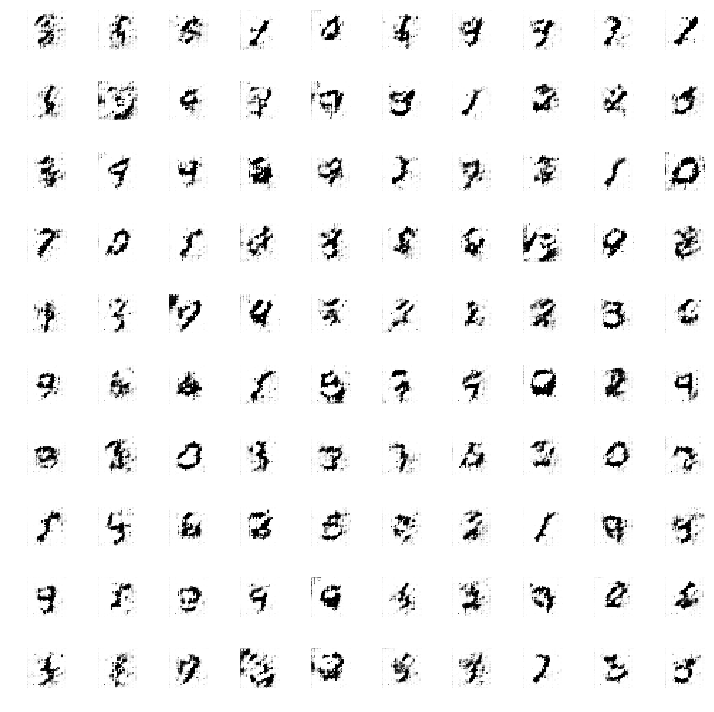

>Saved: infogan_generated_plot_0010.png and infogan_generator_model_0010.h5
>11, 1/937, d1=0.323, d2=1.545 g=2.915
>11, 2/937, d1=0.435, d2=1.215 g=2.723
>11, 3/937, d1=0.373, d2=1.110 g=2.074
>11, 4/937, d1=0.227, d2=1.629 g=2.512
>11, 5/937, d1=0.321, d2=1.430 g=2.783
>11, 6/937, d1=0.578, d2=1.222 g=1.843
>11, 7/937, d1=0.252, d2=1.796 g=2.393
>11, 8/937, d1=0.417, d2=1.285 g=2.105
>11, 9/937, d1=0.383, d2=1.516 g=1.983
>11, 10/937, d1=0.402, d2=1.183 g=1.865
>11, 11/937, d1=0.423, d2=1.651 g=1.811
>11, 12/937, d1=0.284, d2=1.535 g=2.106
>11, 13/937, d1=0.519, d2=1.667 g=1.870
>11, 14/937, d1=0.328, d2=1.249 g=2.303
>11, 15/937, d1=0.502, d2=1.329 g=1.872
>11, 16/937, d1=0.427, d2=1.131 g=1.605
>11, 17/937, d1=0.384, d2=1.559 g=1.554
>11, 18/937, d1=0.406, d2=1.397 g=1.610
>11, 19/937, d1=0.456, d2=1.590 g=1.709
>11, 20/937, d1=0.541, d2=1.525 g=1.913
>11, 21/937, d1=0.403, d2=1.512 g=1.947
>11, 22/937, d1=0.355, d2=1.548 g=2.216
>11, 23/937, d1=0.436, d2=1.156 g=1.813
>11, 24/937, 

>11, 205/937, d1=0.504, d2=1.428 g=1.866
>11, 206/937, d1=0.486, d2=2.292 g=2.143
>11, 207/937, d1=0.851, d2=1.808 g=1.826
>11, 208/937, d1=0.392, d2=1.622 g=2.044
>11, 209/937, d1=0.544, d2=1.489 g=1.785
>11, 210/937, d1=0.356, d2=1.380 g=2.007
>11, 211/937, d1=0.386, d2=1.308 g=1.598
>11, 212/937, d1=0.395, d2=1.566 g=1.623
>11, 213/937, d1=0.597, d2=1.590 g=1.733
>11, 214/937, d1=0.425, d2=1.460 g=1.753
>11, 215/937, d1=0.415, d2=1.342 g=2.035
>11, 216/937, d1=0.348, d2=1.435 g=2.014
>11, 217/937, d1=0.455, d2=1.626 g=2.003
>11, 218/937, d1=0.614, d2=1.646 g=2.125
>11, 219/937, d1=0.336, d2=1.383 g=1.972
>11, 220/937, d1=0.400, d2=1.800 g=1.683
>11, 221/937, d1=0.326, d2=1.707 g=2.041
>11, 222/937, d1=0.341, d2=1.220 g=2.079
>11, 223/937, d1=0.322, d2=1.170 g=2.047
>11, 224/937, d1=0.331, d2=1.566 g=1.883
>11, 225/937, d1=0.291, d2=1.204 g=1.975
>11, 226/937, d1=0.394, d2=1.855 g=2.176
>11, 227/937, d1=0.335, d2=1.167 g=2.390
>11, 228/937, d1=0.471, d2=1.519 g=2.053
>11, 229/937, d1

>11, 405/937, d1=0.243, d2=1.410 g=2.790
>11, 406/937, d1=0.412, d2=1.190 g=2.383
>11, 407/937, d1=0.261, d2=1.633 g=2.728
>11, 408/937, d1=0.354, d2=1.396 g=2.409
>11, 409/937, d1=0.258, d2=1.488 g=3.052
>11, 410/937, d1=0.416, d2=1.008 g=2.433
>11, 411/937, d1=0.289, d2=1.712 g=2.197
>11, 412/937, d1=0.202, d2=1.216 g=2.532
>11, 413/937, d1=0.272, d2=1.668 g=2.575
>11, 414/937, d1=0.499, d2=1.475 g=2.360
>11, 415/937, d1=0.454, d2=1.681 g=2.362
>11, 416/937, d1=0.415, d2=1.540 g=2.170
>11, 417/937, d1=0.339, d2=1.562 g=2.425
>11, 418/937, d1=0.347, d2=1.682 g=2.498
>11, 419/937, d1=0.365, d2=1.220 g=1.988
>11, 420/937, d1=0.310, d2=1.785 g=2.076
>11, 421/937, d1=0.324, d2=1.574 g=2.245
>11, 422/937, d1=0.355, d2=1.610 g=2.367
>11, 423/937, d1=0.425, d2=1.287 g=2.256
>11, 424/937, d1=0.422, d2=1.779 g=2.085
>11, 425/937, d1=0.547, d2=1.454 g=1.999
>11, 426/937, d1=0.638, d2=1.950 g=1.901
>11, 427/937, d1=0.328, d2=2.071 g=2.096
>11, 428/937, d1=0.350, d2=1.019 g=2.158
>11, 429/937, d1

>11, 608/937, d1=0.304, d2=1.081 g=1.754
>11, 609/937, d1=0.206, d2=1.231 g=1.601
>11, 610/937, d1=0.273, d2=1.630 g=2.099
>11, 611/937, d1=0.271, d2=0.900 g=1.794
>11, 612/937, d1=0.209, d2=1.716 g=2.391
>11, 613/937, d1=0.271, d2=0.827 g=1.979
>11, 614/937, d1=0.310, d2=1.614 g=1.902
>11, 615/937, d1=0.357, d2=1.271 g=2.217
>11, 616/937, d1=0.344, d2=1.196 g=1.859
>11, 617/937, d1=0.229, d2=1.411 g=1.990
>11, 618/937, d1=0.303, d2=1.280 g=1.879
>11, 619/937, d1=0.388, d2=1.060 g=2.051
>11, 620/937, d1=0.408, d2=1.124 g=1.625
>11, 621/937, d1=0.300, d2=1.535 g=1.603
>11, 622/937, d1=0.297, d2=1.352 g=2.135
>11, 623/937, d1=0.539, d2=1.374 g=1.948
>11, 624/937, d1=0.417, d2=1.510 g=1.831
>11, 625/937, d1=0.367, d2=1.679 g=1.808
>11, 626/937, d1=0.321, d2=1.403 g=2.367
>11, 627/937, d1=0.463, d2=1.514 g=1.879
>11, 628/937, d1=0.258, d2=1.223 g=1.955
>11, 629/937, d1=0.406, d2=1.206 g=1.601
>11, 630/937, d1=0.329, d2=1.250 g=1.478
>11, 631/937, d1=0.229, d2=1.071 g=1.571
>11, 632/937, d1

>11, 813/937, d1=0.374, d2=1.207 g=1.653
>11, 814/937, d1=0.386, d2=1.893 g=1.946
>11, 815/937, d1=0.320, d2=1.063 g=1.950
>11, 816/937, d1=0.350, d2=1.568 g=1.760
>11, 817/937, d1=0.418, d2=1.182 g=1.740
>11, 818/937, d1=0.346, d2=1.479 g=1.758
>11, 819/937, d1=0.266, d2=1.493 g=1.965
>11, 820/937, d1=0.350, d2=1.081 g=1.948
>11, 821/937, d1=0.287, d2=1.322 g=2.063
>11, 822/937, d1=0.396, d2=1.622 g=2.234
>11, 823/937, d1=0.423, d2=1.667 g=2.086
>11, 824/937, d1=0.406, d2=1.245 g=1.795
>11, 825/937, d1=0.272, d2=1.366 g=2.243
>11, 826/937, d1=0.562, d2=1.613 g=1.654
>11, 827/937, d1=0.324, d2=1.704 g=2.217
>11, 828/937, d1=0.367, d2=1.597 g=2.195
>11, 829/937, d1=0.327, d2=1.135 g=2.099
>11, 830/937, d1=0.529, d2=1.619 g=1.760
>11, 831/937, d1=0.334, d2=1.687 g=1.799
>11, 832/937, d1=0.496, d2=2.027 g=1.931
>11, 833/937, d1=0.427, d2=1.720 g=2.082
>11, 834/937, d1=0.412, d2=1.185 g=1.977
>11, 835/937, d1=0.306, d2=1.585 g=2.118
>11, 836/937, d1=0.259, d2=1.080 g=1.778
>11, 837/937, d1

>12, 83/937, d1=0.008, d2=1.280 g=8.662
>12, 84/937, d1=0.018, d2=0.005 g=7.310
>12, 85/937, d1=0.025, d2=0.194 g=3.382
>12, 86/937, d1=0.006, d2=2.687 g=4.673
>12, 87/937, d1=0.021, d2=0.320 g=5.403
>12, 88/937, d1=0.024, d2=0.795 g=6.553
>12, 89/937, d1=0.010, d2=0.061 g=3.832
>12, 90/937, d1=0.006, d2=1.064 g=4.247
>12, 91/937, d1=0.011, d2=0.218 g=4.438
>12, 92/937, d1=0.014, d2=1.347 g=4.776
>12, 93/937, d1=0.009, d2=0.210 g=3.756
>12, 94/937, d1=0.004, d2=1.257 g=4.112
>12, 95/937, d1=0.009, d2=0.360 g=3.972
>12, 96/937, d1=0.003, d2=0.939 g=4.142
>12, 97/937, d1=0.010, d2=0.614 g=3.723
>12, 98/937, d1=0.003, d2=0.438 g=2.949
>12, 99/937, d1=0.003, d2=1.507 g=4.333
>12, 100/937, d1=0.010, d2=0.134 g=3.267
>12, 101/937, d1=0.005, d2=1.560 g=4.000
>12, 102/937, d1=0.003, d2=0.431 g=4.226
>12, 103/937, d1=0.011, d2=0.686 g=3.916
>12, 104/937, d1=0.009, d2=0.550 g=5.105
>12, 105/937, d1=0.007, d2=0.670 g=3.448
>12, 106/937, d1=0.002, d2=0.376 g=3.511
>12, 107/937, d1=0.011, d2=2.333 

>12, 286/937, d1=0.483, d2=1.490 g=3.404
>12, 287/937, d1=0.454, d2=0.686 g=2.160
>12, 288/937, d1=0.235, d2=1.684 g=3.006
>12, 289/937, d1=0.142, d2=0.784 g=3.427
>12, 290/937, d1=0.389, d2=1.204 g=3.072
>12, 291/937, d1=0.134, d2=0.889 g=3.211
>12, 292/937, d1=0.298, d2=0.916 g=2.666
>12, 293/937, d1=0.260, d2=1.336 g=3.321
>12, 294/937, d1=0.290, d2=0.695 g=3.133
>12, 295/937, d1=0.273, d2=1.381 g=2.644
>12, 296/937, d1=0.188, d2=1.034 g=3.511
>12, 297/937, d1=0.326, d2=0.989 g=3.362
>12, 298/937, d1=0.390, d2=1.220 g=3.281
>12, 299/937, d1=0.235, d2=1.223 g=3.397
>12, 300/937, d1=0.216, d2=0.836 g=3.540
>12, 301/937, d1=0.239, d2=1.096 g=3.008
>12, 302/937, d1=0.107, d2=1.064 g=3.679
>12, 303/937, d1=0.184, d2=0.690 g=3.482
>12, 304/937, d1=0.155, d2=0.739 g=2.878
>12, 305/937, d1=0.182, d2=1.353 g=3.318
>12, 306/937, d1=0.188, d2=1.080 g=3.691
>12, 307/937, d1=0.239, d2=0.941 g=2.989
>12, 308/937, d1=0.164, d2=0.776 g=2.687
>12, 309/937, d1=0.127, d2=0.943 g=2.613
>12, 310/937, d1

>12, 488/937, d1=0.007, d2=0.547 g=4.117
>12, 489/937, d1=0.010, d2=0.602 g=3.960
>12, 490/937, d1=0.003, d2=0.596 g=4.201
>12, 491/937, d1=0.004, d2=0.540 g=4.028
>12, 492/937, d1=0.008, d2=0.539 g=3.864
>12, 493/937, d1=0.011, d2=0.546 g=3.888
>12, 494/937, d1=0.009, d2=0.566 g=4.346
>12, 495/937, d1=0.006, d2=0.294 g=3.544
>12, 496/937, d1=0.010, d2=1.232 g=4.848
>12, 497/937, d1=0.024, d2=0.114 g=4.139
>12, 498/937, d1=0.010, d2=0.921 g=3.785
>12, 499/937, d1=0.006, d2=1.110 g=6.621
>12, 500/937, d1=0.021, d2=0.092 g=5.713
>12, 501/937, d1=0.007, d2=2.193 g=10.099
>12, 502/937, d1=0.014, d2=0.004 g=8.108
>12, 503/937, d1=0.014, d2=0.076 g=4.683
>12, 504/937, d1=0.005, d2=1.395 g=4.322
>12, 505/937, d1=0.008, d2=0.421 g=4.477
>12, 506/937, d1=0.015, d2=0.595 g=4.456
>12, 507/937, d1=0.076, d2=1.122 g=6.595
>12, 508/937, d1=0.017, d2=0.037 g=5.122
>12, 509/937, d1=0.012, d2=0.863 g=4.816
>12, 510/937, d1=0.008, d2=0.556 g=4.724
>12, 511/937, d1=0.009, d2=0.400 g=4.243
>12, 512/937, d

>12, 689/937, d1=0.315, d2=0.244 g=1.737
>12, 690/937, d1=0.109, d2=0.321 g=1.136
>12, 691/937, d1=0.147, d2=0.880 g=1.355
>12, 692/937, d1=0.196, d2=1.114 g=1.513
>12, 693/937, d1=0.125, d2=0.329 g=1.940
>12, 694/937, d1=0.317, d2=1.493 g=2.351
>12, 695/937, d1=0.163, d2=0.455 g=2.576
>12, 696/937, d1=0.133, d2=0.446 g=1.854
>12, 697/937, d1=0.286, d2=0.782 g=1.821
>12, 698/937, d1=0.188, d2=0.476 g=1.985
>12, 699/937, d1=0.089, d2=1.225 g=3.002
>12, 700/937, d1=0.249, d2=0.348 g=2.083
>12, 701/937, d1=0.114, d2=0.793 g=2.005
>12, 702/937, d1=0.182, d2=0.386 g=1.431
>12, 703/937, d1=0.089, d2=1.744 g=2.223
>12, 704/937, d1=0.199, d2=0.162 g=2.125
>12, 705/937, d1=0.226, d2=1.119 g=2.170
>12, 706/937, d1=0.104, d2=0.428 g=2.091
>12, 707/937, d1=0.155, d2=0.731 g=1.884
>12, 708/937, d1=0.097, d2=0.513 g=1.835
>12, 709/937, d1=0.086, d2=0.722 g=2.275
>12, 710/937, d1=0.147, d2=1.025 g=2.720
>12, 711/937, d1=0.155, d2=0.390 g=2.551
>12, 712/937, d1=0.212, d2=0.812 g=2.154
>12, 713/937, d1

>12, 895/937, d1=0.168, d2=1.110 g=2.608
>12, 896/937, d1=0.200, d2=0.523 g=2.053
>12, 897/937, d1=0.133, d2=1.253 g=3.053
>12, 898/937, d1=0.258, d2=0.783 g=2.966
>12, 899/937, d1=0.370, d2=0.888 g=2.285
>12, 900/937, d1=0.242, d2=1.357 g=2.875
>12, 901/937, d1=0.382, d2=1.101 g=2.579
>12, 902/937, d1=0.363, d2=1.323 g=2.890
>12, 903/937, d1=0.269, d2=0.655 g=2.412
>12, 904/937, d1=0.315, d2=1.291 g=2.320
>12, 905/937, d1=0.386, d2=0.810 g=2.495
>12, 906/937, d1=0.274, d2=0.777 g=2.134
>12, 907/937, d1=0.229, d2=1.479 g=2.892
>12, 908/937, d1=0.465, d2=0.706 g=2.773
>12, 909/937, d1=0.324, d2=1.195 g=3.195
>12, 910/937, d1=0.377, d2=0.923 g=3.182
>12, 911/937, d1=0.331, d2=1.010 g=2.653
>12, 912/937, d1=0.321, d2=1.367 g=3.170
>12, 913/937, d1=0.529, d2=0.579 g=2.336
>12, 914/937, d1=0.174, d2=1.689 g=2.811
>12, 915/937, d1=0.339, d2=1.188 g=3.393
>12, 916/937, d1=0.450, d2=0.757 g=2.817
>12, 917/937, d1=0.292, d2=1.585 g=3.710
>12, 918/937, d1=0.446, d2=0.602 g=2.459
>12, 919/937, d1

>13, 162/937, d1=0.559, d2=1.538 g=2.512
>13, 163/937, d1=0.323, d2=0.853 g=2.203
>13, 164/937, d1=0.217, d2=1.333 g=2.578
>13, 165/937, d1=0.390, d2=0.909 g=2.561
>13, 166/937, d1=0.431, d2=1.402 g=2.341
>13, 167/937, d1=0.355, d2=1.126 g=2.719
>13, 168/937, d1=0.498, d2=1.033 g=2.369
>13, 169/937, d1=0.323, d2=1.281 g=2.199
>13, 170/937, d1=0.255, d2=1.549 g=3.022
>13, 171/937, d1=0.550, d2=0.908 g=2.267
>13, 172/937, d1=0.276, d2=1.270 g=2.462
>13, 173/937, d1=0.313, d2=1.029 g=2.370
>13, 174/937, d1=0.439, d2=1.128 g=2.084
>13, 175/937, d1=0.321, d2=1.227 g=2.288
>13, 176/937, d1=0.310, d2=0.911 g=2.065
>13, 177/937, d1=0.249, d2=0.952 g=2.441
>13, 178/937, d1=0.508, d2=1.202 g=2.004
>13, 179/937, d1=0.319, d2=1.441 g=2.210
>13, 180/937, d1=0.415, d2=1.323 g=2.400
>13, 181/937, d1=0.247, d2=1.049 g=2.598
>13, 182/937, d1=0.519, d2=1.356 g=1.985
>13, 183/937, d1=0.314, d2=0.897 g=1.954
>13, 184/937, d1=0.271, d2=1.176 g=1.893
>13, 185/937, d1=0.239, d2=1.174 g=2.593
>13, 186/937, d1

>13, 366/937, d1=0.374, d2=1.362 g=2.747
>13, 367/937, d1=0.553, d2=1.272 g=2.211
>13, 368/937, d1=0.382, d2=1.395 g=2.544
>13, 369/937, d1=0.347, d2=0.975 g=2.566
>13, 370/937, d1=0.489, d2=1.401 g=2.460
>13, 371/937, d1=0.452, d2=1.713 g=2.545
>13, 372/937, d1=0.432, d2=0.882 g=2.151
>13, 373/937, d1=0.458, d2=1.372 g=2.126
>13, 374/937, d1=0.475, d2=1.410 g=2.208
>13, 375/937, d1=0.337, d2=1.489 g=2.799
>13, 376/937, d1=0.636, d2=1.266 g=2.465
>13, 377/937, d1=0.368, d2=1.577 g=2.739
>13, 378/937, d1=0.328, d2=1.182 g=3.223
>13, 379/937, d1=0.623, d2=1.358 g=2.451
>13, 380/937, d1=0.570, d2=1.383 g=2.393
>13, 381/937, d1=0.376, d2=1.395 g=2.058
>13, 382/937, d1=0.455, d2=1.413 g=2.402
>13, 383/937, d1=0.394, d2=1.137 g=2.471
>13, 384/937, d1=0.513, d2=1.564 g=2.458
>13, 385/937, d1=0.445, d2=1.222 g=2.141
>13, 386/937, d1=0.323, d2=1.491 g=2.476
>13, 387/937, d1=0.416, d2=1.211 g=2.489
>13, 388/937, d1=0.520, d2=1.390 g=2.105
>13, 389/937, d1=0.478, d2=1.839 g=2.396
>13, 390/937, d1

>13, 566/937, d1=0.319, d2=1.117 g=2.264
>13, 567/937, d1=0.354, d2=1.447 g=2.498
>13, 568/937, d1=0.304, d2=1.068 g=2.374
>13, 569/937, d1=0.384, d2=1.274 g=2.195
>13, 570/937, d1=0.471, d2=1.418 g=2.224
>13, 571/937, d1=0.470, d2=1.270 g=2.002
>13, 572/937, d1=0.266, d2=1.261 g=2.309
>13, 573/937, d1=0.384, d2=1.577 g=2.467
>13, 574/937, d1=0.445, d2=1.014 g=2.283
>13, 575/937, d1=0.433, d2=1.396 g=2.066
>13, 576/937, d1=0.348, d2=1.115 g=2.274
>13, 577/937, d1=0.417, d2=1.179 g=2.059
>13, 578/937, d1=0.314, d2=1.328 g=2.281
>13, 579/937, d1=0.481, d2=1.424 g=2.457
>13, 580/937, d1=0.344, d2=1.263 g=2.160
>13, 581/937, d1=0.458, d2=1.225 g=2.109
>13, 582/937, d1=0.382, d2=1.263 g=1.942
>13, 583/937, d1=0.298, d2=1.295 g=2.306
>13, 584/937, d1=0.368, d2=1.264 g=2.635
>13, 585/937, d1=0.364, d2=1.031 g=2.369
>13, 586/937, d1=0.406, d2=1.218 g=2.137
>13, 587/937, d1=0.363, d2=1.209 g=2.227
>13, 588/937, d1=0.411, d2=0.911 g=1.965
>13, 589/937, d1=0.167, d2=1.444 g=2.706
>13, 590/937, d1

>13, 769/937, d1=0.419, d2=1.594 g=2.393
>13, 770/937, d1=0.442, d2=1.578 g=2.161
>13, 771/937, d1=0.358, d2=1.417 g=2.176
>13, 772/937, d1=0.394, d2=1.183 g=1.967
>13, 773/937, d1=0.405, d2=1.454 g=1.837
>13, 774/937, d1=0.264, d2=1.071 g=2.207
>13, 775/937, d1=0.434, d2=1.528 g=2.126
>13, 776/937, d1=0.317, d2=1.118 g=1.513
>13, 777/937, d1=0.270, d2=1.531 g=1.965
>13, 778/937, d1=0.327, d2=1.243 g=2.498
>13, 779/937, d1=0.585, d2=1.334 g=1.832
>13, 780/937, d1=0.308, d2=1.523 g=2.005
>13, 781/937, d1=0.475, d2=1.139 g=2.424
>13, 782/937, d1=0.591, d2=1.724 g=1.918
>13, 783/937, d1=0.400, d2=1.485 g=1.855
>13, 784/937, d1=0.422, d2=1.531 g=2.289
>13, 785/937, d1=0.551, d2=1.081 g=1.780
>13, 786/937, d1=0.447, d2=1.675 g=2.047
>13, 787/937, d1=0.325, d2=1.246 g=2.368
>13, 788/937, d1=0.441, d2=1.570 g=2.235
>13, 789/937, d1=0.361, d2=1.293 g=2.089
>13, 790/937, d1=0.394, d2=1.374 g=1.948
>13, 791/937, d1=0.257, d2=1.187 g=2.297
>13, 792/937, d1=0.375, d2=0.915 g=2.243
>13, 793/937, d1

>14, 39/937, d1=0.221, d2=1.037 g=2.355
>14, 40/937, d1=0.179, d2=0.846 g=2.259
>14, 41/937, d1=0.312, d2=1.177 g=2.083
>14, 42/937, d1=0.196, d2=0.746 g=2.389
>14, 43/937, d1=0.163, d2=0.835 g=2.181
>14, 44/937, d1=0.156, d2=1.079 g=2.175
>14, 45/937, d1=0.284, d2=0.992 g=2.198
>14, 46/937, d1=0.251, d2=0.965 g=2.238
>14, 47/937, d1=0.273, d2=1.108 g=2.262
>14, 48/937, d1=0.233, d2=0.974 g=2.252
>14, 49/937, d1=0.150, d2=1.104 g=2.379
>14, 50/937, d1=0.188, d2=1.102 g=2.834
>14, 51/937, d1=0.254, d2=0.568 g=1.965
>14, 52/937, d1=0.228, d2=1.348 g=1.990
>14, 53/937, d1=0.142, d2=1.126 g=2.249
>14, 54/937, d1=0.167, d2=0.746 g=2.021
>14, 55/937, d1=0.146, d2=0.768 g=2.150
>14, 56/937, d1=0.220, d2=1.313 g=2.443
>14, 57/937, d1=0.144, d2=0.799 g=2.602
>14, 58/937, d1=0.251, d2=0.968 g=2.131
>14, 59/937, d1=0.253, d2=0.879 g=1.844
>14, 60/937, d1=0.208, d2=1.075 g=2.052
>14, 61/937, d1=0.290, d2=0.885 g=2.015
>14, 62/937, d1=0.183, d2=1.182 g=2.422
>14, 63/937, d1=0.265, d2=0.785 g=1.989


>14, 241/937, d1=0.319, d2=1.528 g=2.235
>14, 242/937, d1=0.261, d2=1.024 g=2.275
>14, 243/937, d1=0.327, d2=1.348 g=2.489
>14, 244/937, d1=0.300, d2=1.208 g=2.371
>14, 245/937, d1=0.415, d2=1.372 g=2.384
>14, 246/937, d1=0.470, d2=1.498 g=2.533
>14, 247/937, d1=0.287, d2=0.989 g=2.251
>14, 248/937, d1=0.429, d2=1.164 g=2.001
>14, 249/937, d1=0.331, d2=1.882 g=2.625
>14, 250/937, d1=0.431, d2=0.770 g=2.035
>14, 251/937, d1=0.365, d2=1.324 g=1.987
>14, 252/937, d1=0.299, d2=1.364 g=1.955
>14, 253/937, d1=0.310, d2=1.221 g=2.368
>14, 254/937, d1=0.437, d2=0.980 g=1.946
>14, 255/937, d1=0.540, d2=2.246 g=2.059
>14, 256/937, d1=0.306, d2=1.095 g=2.301
>14, 257/937, d1=0.557, d2=1.889 g=2.179
>14, 258/937, d1=0.660, d2=1.708 g=2.462
>14, 259/937, d1=0.834, d2=1.702 g=1.904
>14, 260/937, d1=0.399, d2=1.604 g=2.510
>14, 261/937, d1=0.504, d2=1.523 g=3.069
>14, 262/937, d1=0.581, d2=1.147 g=2.243
>14, 263/937, d1=0.337, d2=1.576 g=2.252
>14, 264/937, d1=0.547, d2=1.456 g=2.168
>14, 265/937, d1

>14, 442/937, d1=0.215, d2=0.799 g=1.705
>14, 443/937, d1=0.315, d2=1.206 g=1.818
>14, 444/937, d1=0.412, d2=1.841 g=1.842
>14, 445/937, d1=0.308, d2=1.313 g=1.718
>14, 446/937, d1=0.486, d2=1.182 g=2.114
>14, 447/937, d1=0.442, d2=1.287 g=1.665
>14, 448/937, d1=0.333, d2=1.630 g=2.059
>14, 449/937, d1=0.365, d2=1.096 g=1.936
>14, 450/937, d1=0.230, d2=0.992 g=1.735
>14, 451/937, d1=0.243, d2=1.104 g=1.983
>14, 452/937, d1=0.264, d2=1.181 g=2.385
>14, 453/937, d1=0.566, d2=1.548 g=1.582
>14, 454/937, d1=0.207, d2=1.512 g=2.060
>14, 455/937, d1=0.327, d2=0.766 g=1.794
>14, 456/937, d1=0.371, d2=1.587 g=1.679
>14, 457/937, d1=0.366, d2=1.034 g=1.811
>14, 458/937, d1=0.408, d2=1.828 g=1.941
>14, 459/937, d1=0.400, d2=1.390 g=2.009
>14, 460/937, d1=0.574, d2=1.386 g=1.963
>14, 461/937, d1=0.367, d2=1.223 g=1.630
>14, 462/937, d1=0.353, d2=1.493 g=2.235
>14, 463/937, d1=0.396, d2=1.546 g=2.168
>14, 464/937, d1=0.405, d2=1.049 g=2.320
>14, 465/937, d1=0.573, d2=1.783 g=2.056
>14, 466/937, d1

>14, 643/937, d1=0.325, d2=1.525 g=2.470
>14, 644/937, d1=0.250, d2=1.010 g=2.364
>14, 645/937, d1=0.328, d2=1.546 g=2.100
>14, 646/937, d1=0.420, d2=1.554 g=2.519
>14, 647/937, d1=0.296, d2=1.301 g=2.176
>14, 648/937, d1=0.335, d2=1.353 g=2.489
>14, 649/937, d1=0.395, d2=1.465 g=2.253
>14, 650/937, d1=0.279, d2=1.575 g=2.594
>14, 651/937, d1=0.345, d2=1.280 g=2.189
>14, 652/937, d1=0.340, d2=1.199 g=2.257
>14, 653/937, d1=0.362, d2=1.871 g=2.443
>14, 654/937, d1=0.588, d2=1.572 g=2.094
>14, 655/937, d1=0.475, d2=1.333 g=1.925
>14, 656/937, d1=0.430, d2=1.465 g=1.875
>14, 657/937, d1=0.236, d2=1.357 g=2.422
>14, 658/937, d1=0.477, d2=1.356 g=2.467
>14, 659/937, d1=0.429, d2=1.302 g=2.154
>14, 660/937, d1=0.320, d2=1.288 g=1.864
>14, 661/937, d1=0.262, d2=1.510 g=2.159
>14, 662/937, d1=0.385, d2=1.425 g=2.543
>14, 663/937, d1=0.268, d2=1.224 g=2.596
>14, 664/937, d1=0.434, d2=1.283 g=2.204
>14, 665/937, d1=0.322, d2=1.238 g=2.153
>14, 666/937, d1=0.302, d2=1.328 g=2.129
>14, 667/937, d1

>14, 845/937, d1=0.466, d2=1.264 g=1.988
>14, 846/937, d1=0.203, d2=1.357 g=2.449
>14, 847/937, d1=0.330, d2=1.133 g=2.225
>14, 848/937, d1=0.349, d2=1.372 g=2.152
>14, 849/937, d1=0.374, d2=1.585 g=2.505
>14, 850/937, d1=0.292, d2=1.220 g=2.511
>14, 851/937, d1=0.454, d2=1.168 g=2.207
>14, 852/937, d1=0.397, d2=1.714 g=2.193
>14, 853/937, d1=0.370, d2=1.123 g=2.202
>14, 854/937, d1=0.334, d2=1.358 g=2.128
>14, 855/937, d1=0.304, d2=1.202 g=2.311
>14, 856/937, d1=0.324, d2=1.627 g=2.212
>14, 857/937, d1=0.538, d2=1.595 g=2.428
>14, 858/937, d1=0.304, d2=0.889 g=1.852
>14, 859/937, d1=0.295, d2=1.447 g=1.992
>14, 860/937, d1=0.270, d2=1.243 g=1.956
>14, 861/937, d1=0.423, d2=1.409 g=1.909
>14, 862/937, d1=0.599, d2=1.788 g=1.529
>14, 863/937, d1=0.312, d2=1.443 g=1.935
>14, 864/937, d1=0.472, d2=1.312 g=1.929
>14, 865/937, d1=0.364, d2=1.455 g=1.939
>14, 866/937, d1=0.428, d2=1.125 g=1.670
>14, 867/937, d1=0.225, d2=1.393 g=1.690
>14, 868/937, d1=0.272, d2=1.114 g=2.224
>14, 869/937, d1

>15, 115/937, d1=0.019, d2=0.296 g=4.659
>15, 116/937, d1=0.015, d2=0.754 g=1.263
>15, 117/937, d1=0.008, d2=2.945 g=5.338
>15, 118/937, d1=0.062, d2=0.021 g=4.922
>15, 119/937, d1=0.045, d2=1.295 g=3.776
>15, 120/937, d1=0.029, d2=0.510 g=3.300
>15, 121/937, d1=0.026, d2=1.078 g=3.708
>15, 122/937, d1=0.020, d2=0.200 g=2.516
>15, 123/937, d1=0.015, d2=2.047 g=3.911
>15, 124/937, d1=0.022, d2=0.207 g=3.880
>15, 125/937, d1=0.019, d2=0.871 g=3.878
>15, 126/937, d1=0.011, d2=0.464 g=3.695
>15, 127/937, d1=0.014, d2=1.051 g=3.764
>15, 128/937, d1=0.036, d2=0.601 g=3.732
>15, 129/937, d1=0.030, d2=0.726 g=4.589
>15, 130/937, d1=0.023, d2=0.294 g=3.623
>15, 131/937, d1=0.021, d2=0.631 g=3.436
>15, 132/937, d1=0.011, d2=0.880 g=3.652
>15, 133/937, d1=0.035, d2=0.519 g=3.400
>15, 134/937, d1=0.012, d2=0.672 g=3.576
>15, 135/937, d1=0.033, d2=0.721 g=4.216
>15, 136/937, d1=0.005, d2=0.643 g=3.592
>15, 137/937, d1=0.020, d2=0.297 g=2.771
>15, 138/937, d1=0.020, d2=1.244 g=3.537
>15, 139/937, d1

>15, 316/937, d1=0.575, d2=0.666 g=1.452
>15, 317/937, d1=0.336, d2=1.783 g=1.470
>15, 318/937, d1=0.350, d2=0.723 g=1.508
>15, 319/937, d1=0.517, d2=1.114 g=1.333
>15, 320/937, d1=0.478, d2=1.258 g=1.288
>15, 321/937, d1=0.381, d2=0.949 g=1.159
>15, 322/937, d1=0.471, d2=2.353 g=3.115
>15, 323/937, d1=1.302, d2=0.946 g=2.216
>15, 324/937, d1=0.624, d2=1.183 g=1.445
>15, 325/937, d1=0.482, d2=1.439 g=2.214
>15, 326/937, d1=0.845, d2=0.999 g=1.312
>15, 327/937, d1=0.314, d2=1.511 g=1.794
>15, 328/937, d1=0.401, d2=1.378 g=2.365
>15, 329/937, d1=0.432, d2=1.302 g=2.943
>15, 330/937, d1=0.596, d2=0.609 g=1.424
>15, 331/937, d1=0.200, d2=1.696 g=2.329
>15, 332/937, d1=0.528, d2=1.492 g=3.538
>15, 333/937, d1=0.714, d2=0.613 g=1.792
>15, 334/937, d1=0.186, d2=1.287 g=2.079
>15, 335/937, d1=0.207, d2=1.071 g=2.995
>15, 336/937, d1=0.420, d2=0.943 g=2.723
>15, 337/937, d1=0.402, d2=0.829 g=1.975
>15, 338/937, d1=0.404, d2=1.894 g=2.764
>15, 339/937, d1=0.428, d2=0.539 g=1.781
>15, 340/937, d1

>15, 522/937, d1=0.377, d2=0.997 g=3.044
>15, 523/937, d1=0.311, d2=1.329 g=2.730
>15, 524/937, d1=0.553, d2=1.602 g=2.601
>15, 525/937, d1=0.244, d2=1.036 g=2.922
>15, 526/937, d1=0.329, d2=0.991 g=2.702
>15, 527/937, d1=0.220, d2=1.258 g=2.691
>15, 528/937, d1=0.346, d2=1.100 g=2.702
>15, 529/937, d1=0.318, d2=1.197 g=2.437
>15, 530/937, d1=0.211, d2=1.494 g=3.040
>15, 531/937, d1=0.318, d2=1.072 g=2.937
>15, 532/937, d1=0.376, d2=1.131 g=2.513
>15, 533/937, d1=0.344, d2=1.290 g=2.682
>15, 534/937, d1=0.343, d2=1.132 g=2.427
>15, 535/937, d1=0.226, d2=1.337 g=2.834
>15, 536/937, d1=0.387, d2=1.243 g=2.747
>15, 537/937, d1=0.222, d2=1.174 g=2.793
>15, 538/937, d1=0.366, d2=1.430 g=2.717
>15, 539/937, d1=0.334, d2=1.232 g=3.017
>15, 540/937, d1=0.366, d2=0.913 g=2.430
>15, 541/937, d1=0.156, d2=1.294 g=2.437
>15, 542/937, d1=0.257, d2=0.991 g=2.619
>15, 543/937, d1=0.388, d2=1.373 g=2.355
>15, 544/937, d1=0.323, d2=1.547 g=2.780
>15, 545/937, d1=0.402, d2=0.922 g=2.803
>15, 546/937, d1

>15, 726/937, d1=0.361, d2=1.553 g=2.112
>15, 727/937, d1=0.400, d2=1.055 g=2.446
>15, 728/937, d1=0.416, d2=1.065 g=2.074
>15, 729/937, d1=0.430, d2=1.478 g=1.687
>15, 730/937, d1=0.230, d2=1.009 g=2.126
>15, 731/937, d1=0.414, d2=1.433 g=2.159
>15, 732/937, d1=0.445, d2=1.593 g=2.475
>15, 733/937, d1=0.484, d2=1.244 g=2.234
>15, 734/937, d1=0.358, d2=1.147 g=2.001
>15, 735/937, d1=0.301, d2=1.308 g=2.184
>15, 736/937, d1=0.480, d2=1.374 g=2.106
>15, 737/937, d1=0.272, d2=1.020 g=1.967
>15, 738/937, d1=0.377, d2=1.330 g=2.103
>15, 739/937, d1=0.378, d2=1.037 g=2.254
>15, 740/937, d1=0.409, d2=1.367 g=2.037
>15, 741/937, d1=0.370, d2=1.167 g=1.905
>15, 742/937, d1=0.302, d2=1.318 g=2.204
>15, 743/937, d1=0.473, d2=1.402 g=2.301
>15, 744/937, d1=0.363, d2=1.109 g=2.198
>15, 745/937, d1=0.377, d2=1.333 g=2.142
>15, 746/937, d1=0.413, d2=1.164 g=2.163
>15, 747/937, d1=0.381, d2=1.203 g=2.135
>15, 748/937, d1=0.392, d2=1.477 g=2.068
>15, 749/937, d1=0.526, d2=1.159 g=1.723
>15, 750/937, d1

>15, 931/937, d1=0.519, d2=1.036 g=1.553
>15, 932/937, d1=0.344, d2=1.571 g=1.955
>15, 933/937, d1=0.416, d2=1.198 g=2.236
>15, 934/937, d1=0.503, d2=1.389 g=1.840
>15, 935/937, d1=0.500, d2=1.613 g=2.186
>15, 936/937, d1=0.547, d2=1.186 g=1.924
>15, 937/937, d1=0.404, d2=1.582 g=1.952


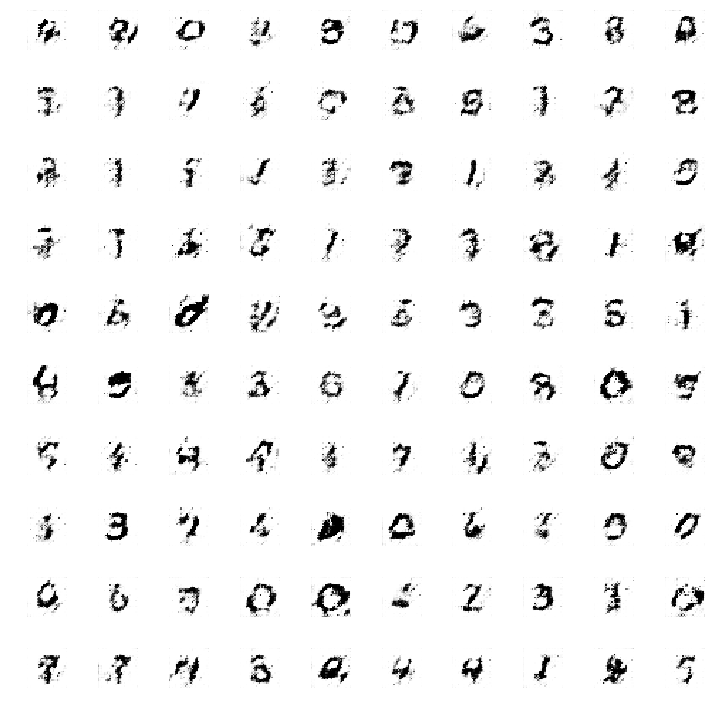

>Saved: infogan_generated_plot_0015.png and infogan_generator_model_0015.h5
>16, 1/937, d1=0.365, d2=1.374 g=2.087
>16, 2/937, d1=0.421, d2=1.517 g=2.607
>16, 3/937, d1=0.403, d2=0.846 g=1.987
>16, 4/937, d1=0.363, d2=1.630 g=1.850
>16, 5/937, d1=0.352, d2=1.374 g=2.054
>16, 6/937, d1=0.388, d2=1.100 g=1.997
>16, 7/937, d1=0.468, d2=1.373 g=1.808
>16, 8/937, d1=0.338, d2=1.603 g=1.898
>16, 9/937, d1=0.388, d2=1.340 g=2.252
>16, 10/937, d1=0.483, d2=1.182 g=2.171
>16, 11/937, d1=0.430, d2=1.377 g=2.008
>16, 12/937, d1=0.434, d2=1.353 g=2.129
>16, 13/937, d1=0.505, d2=1.089 g=2.077
>16, 14/937, d1=0.378, d2=1.706 g=2.242
>16, 15/937, d1=0.360, d2=1.254 g=2.391
>16, 16/937, d1=0.458, d2=1.222 g=2.306
>16, 17/937, d1=0.387, d2=1.283 g=2.065
>16, 18/937, d1=0.239, d2=1.197 g=2.180
>16, 19/937, d1=0.444, d2=1.354 g=2.140
>16, 20/937, d1=0.342, d2=0.944 g=2.348
>16, 21/937, d1=0.320, d2=1.329 g=2.012
>16, 22/937, d1=0.424, d2=1.390 g=1.935
>16, 23/937, d1=0.243, d2=1.320 g=2.146
>16, 24/937, 

>16, 205/937, d1=0.232, d2=1.387 g=2.335
>16, 206/937, d1=0.708, d2=0.946 g=1.547
>16, 207/937, d1=0.195, d2=1.724 g=2.126
>16, 208/937, d1=0.448, d2=0.980 g=2.083
>16, 209/937, d1=0.333, d2=1.419 g=2.092
>16, 210/937, d1=0.332, d2=1.180 g=2.081
>16, 211/937, d1=0.305, d2=1.205 g=2.179
>16, 212/937, d1=0.425, d2=1.314 g=2.422
>16, 213/937, d1=0.335, d2=1.039 g=2.111
>16, 214/937, d1=0.425, d2=1.206 g=1.946
>16, 215/937, d1=0.243, d2=1.121 g=1.827
>16, 216/937, d1=0.443, d2=1.422 g=2.002
>16, 217/937, d1=0.248, d2=1.052 g=2.174
>16, 218/937, d1=0.298, d2=1.230 g=2.404
>16, 219/937, d1=0.386, d2=1.291 g=1.959
>16, 220/937, d1=0.250, d2=1.433 g=2.468
>16, 221/937, d1=0.427, d2=1.032 g=2.152
>16, 222/937, d1=0.414, d2=1.582 g=2.107
>16, 223/937, d1=0.298, d2=1.055 g=2.240
>16, 224/937, d1=0.322, d2=1.145 g=1.947
>16, 225/937, d1=0.319, d2=1.504 g=1.990
>16, 226/937, d1=0.364, d2=1.006 g=2.001
>16, 227/937, d1=0.261, d2=1.181 g=1.979
>16, 228/937, d1=0.222, d2=1.458 g=2.581
>16, 229/937, d1

>16, 406/937, d1=0.506, d2=1.679 g=1.686
>16, 407/937, d1=0.427, d2=1.245 g=1.757
>16, 408/937, d1=0.510, d2=1.361 g=1.731
>16, 409/937, d1=0.360, d2=1.327 g=1.919
>16, 410/937, d1=0.452, d2=1.017 g=1.679
>16, 411/937, d1=0.354, d2=1.501 g=1.838
>16, 412/937, d1=0.349, d2=1.286 g=1.858
>16, 413/937, d1=0.525, d2=0.929 g=1.437
>16, 414/937, d1=0.448, d2=1.385 g=1.024
>16, 415/937, d1=0.276, d2=1.591 g=1.417
>16, 416/937, d1=0.490, d2=1.099 g=1.584
>16, 417/937, d1=0.456, d2=1.555 g=1.865
>16, 418/937, d1=0.496, d2=1.308 g=1.782
>16, 419/937, d1=0.618, d2=1.112 g=1.301
>16, 420/937, d1=0.290, d2=1.061 g=1.725
>16, 421/937, d1=0.311, d2=1.263 g=1.730
>16, 422/937, d1=0.444, d2=1.316 g=1.670
>16, 423/937, d1=0.496, d2=1.515 g=2.014
>16, 424/937, d1=0.463, d2=0.843 g=1.698
>16, 425/937, d1=0.421, d2=1.436 g=1.715
>16, 426/937, d1=0.394, d2=1.548 g=1.824
>16, 427/937, d1=0.501, d2=1.359 g=1.528
>16, 428/937, d1=0.516, d2=1.438 g=1.521
>16, 429/937, d1=0.409, d2=1.135 g=1.487
>16, 430/937, d1

>16, 611/937, d1=0.361, d2=1.383 g=1.789
>16, 612/937, d1=0.571, d2=1.186 g=1.680
>16, 613/937, d1=0.454, d2=1.755 g=1.684
>16, 614/937, d1=0.430, d2=1.624 g=1.640
>16, 615/937, d1=0.404, d2=1.061 g=2.078
>16, 616/937, d1=0.540, d2=1.318 g=1.449
>16, 617/937, d1=0.460, d2=1.576 g=1.692
>16, 618/937, d1=0.481, d2=1.160 g=1.652
>16, 619/937, d1=0.472, d2=1.372 g=1.503
>16, 620/937, d1=0.266, d2=1.387 g=1.846
>16, 621/937, d1=0.324, d2=0.944 g=1.843
>16, 622/937, d1=0.358, d2=1.353 g=1.684
>16, 623/937, d1=0.483, d2=1.072 g=1.538
>16, 624/937, d1=0.338, d2=1.273 g=1.727
>16, 625/937, d1=0.472, d2=1.458 g=1.777
>16, 626/937, d1=0.521, d2=1.261 g=1.795
>16, 627/937, d1=0.365, d2=1.393 g=1.794
>16, 628/937, d1=0.625, d2=1.225 g=1.462
>16, 629/937, d1=0.401, d2=1.510 g=1.594
>16, 630/937, d1=0.660, d2=1.326 g=1.561
>16, 631/937, d1=0.481, d2=1.720 g=1.483
>16, 632/937, d1=0.422, d2=1.588 g=1.675
>16, 633/937, d1=0.399, d2=1.363 g=1.986
>16, 634/937, d1=0.501, d2=1.437 g=2.055
>16, 635/937, d1

>16, 812/937, d1=0.462, d2=1.227 g=1.502
>16, 813/937, d1=0.464, d2=1.971 g=1.757
>16, 814/937, d1=0.429, d2=1.070 g=1.846
>16, 815/937, d1=0.506, d2=1.384 g=1.619
>16, 816/937, d1=0.472, d2=1.484 g=1.453
>16, 817/937, d1=0.319, d2=1.403 g=1.745
>16, 818/937, d1=0.621, d2=1.537 g=1.497
>16, 819/937, d1=0.337, d2=1.549 g=1.596
>16, 820/937, d1=0.310, d2=1.316 g=2.032
>16, 821/937, d1=0.458, d2=1.047 g=1.716
>16, 822/937, d1=0.423, d2=1.351 g=1.602
>16, 823/937, d1=0.456, d2=1.279 g=1.639
>16, 824/937, d1=0.323, d2=1.194 g=1.849
>16, 825/937, d1=0.301, d2=1.317 g=1.940
>16, 826/937, d1=0.341, d2=1.231 g=1.959
>16, 827/937, d1=0.473, d2=1.351 g=1.698
>16, 828/937, d1=0.363, d2=1.453 g=1.971
>16, 829/937, d1=0.344, d2=1.068 g=1.805
>16, 830/937, d1=0.277, d2=1.336 g=1.761
>16, 831/937, d1=0.373, d2=1.116 g=1.753
>16, 832/937, d1=0.246, d2=1.014 g=1.825
>16, 833/937, d1=0.318, d2=1.112 g=1.700
>16, 834/937, d1=0.323, d2=1.207 g=1.765
>16, 835/937, d1=0.365, d2=1.469 g=2.064
>16, 836/937, d1

>17, 81/937, d1=0.533, d2=1.142 g=1.720
>17, 82/937, d1=0.264, d2=1.289 g=1.931
>17, 83/937, d1=0.618, d2=1.403 g=1.872
>17, 84/937, d1=0.281, d2=1.142 g=2.110
>17, 85/937, d1=0.412, d2=1.032 g=1.651
>17, 86/937, d1=0.248, d2=1.456 g=2.038
>17, 87/937, d1=0.473, d2=1.447 g=2.275
>17, 88/937, d1=0.321, d2=1.216 g=2.372
>17, 89/937, d1=0.543, d2=1.125 g=1.508
>17, 90/937, d1=0.251, d2=1.275 g=1.681
>17, 91/937, d1=0.312, d2=1.366 g=2.185
>17, 92/937, d1=0.587, d2=1.057 g=1.766
>17, 93/937, d1=0.320, d2=1.531 g=2.084
>17, 94/937, d1=0.495, d2=1.214 g=1.719
>17, 95/937, d1=0.323, d2=1.308 g=1.736
>17, 96/937, d1=0.403, d2=1.261 g=2.184
>17, 97/937, d1=0.527, d2=1.160 g=1.664
>17, 98/937, d1=0.309, d2=1.521 g=1.917
>17, 99/937, d1=0.381, d2=1.138 g=1.789
>17, 100/937, d1=0.553, d2=2.065 g=1.672
>17, 101/937, d1=0.309, d2=1.121 g=2.045
>17, 102/937, d1=0.501, d2=1.448 g=2.234
>17, 103/937, d1=0.460, d2=1.164 g=1.911
>17, 104/937, d1=0.401, d2=1.377 g=1.829
>17, 105/937, d1=0.367, d2=1.404 g=

>17, 282/937, d1=0.388, d2=1.374 g=1.871
>17, 283/937, d1=0.476, d2=1.443 g=1.704
>17, 284/937, d1=0.358, d2=1.230 g=1.277
>17, 285/937, d1=0.287, d2=1.306 g=1.326
>17, 286/937, d1=0.277, d2=1.355 g=1.954
>17, 287/937, d1=0.406, d2=1.022 g=1.921
>17, 288/937, d1=0.512, d2=1.232 g=1.779
>17, 289/937, d1=0.262, d2=1.116 g=1.857
>17, 290/937, d1=0.367, d2=1.389 g=2.193
>17, 291/937, d1=0.453, d2=1.305 g=1.914
>17, 292/937, d1=0.361, d2=1.401 g=1.819
>17, 293/937, d1=0.394, d2=1.608 g=2.166
>17, 294/937, d1=0.408, d2=1.064 g=1.829
>17, 295/937, d1=0.406, d2=1.824 g=2.062
>17, 296/937, d1=0.375, d2=0.987 g=1.999
>17, 297/937, d1=0.347, d2=1.398 g=1.856
>17, 298/937, d1=0.484, d2=1.464 g=1.647
>17, 299/937, d1=0.388, d2=1.370 g=1.890
>17, 300/937, d1=0.369, d2=1.247 g=2.291
>17, 301/937, d1=0.641, d2=1.574 g=1.810
>17, 302/937, d1=0.319, d2=1.555 g=2.310
>17, 303/937, d1=0.486, d2=1.159 g=2.066
>17, 304/937, d1=0.368, d2=1.287 g=1.609
>17, 305/937, d1=0.389, d2=1.677 g=1.998
>17, 306/937, d1

>17, 484/937, d1=0.339, d2=1.252 g=2.016
>17, 485/937, d1=0.462, d2=1.207 g=1.775
>17, 486/937, d1=0.443, d2=1.495 g=1.677
>17, 487/937, d1=0.372, d2=1.251 g=1.487
>17, 488/937, d1=0.469, d2=1.285 g=1.388
>17, 489/937, d1=0.394, d2=1.698 g=1.585
>17, 490/937, d1=0.423, d2=1.128 g=1.627
>17, 491/937, d1=0.377, d2=1.409 g=1.543
>17, 492/937, d1=0.224, d2=0.992 g=1.673
>17, 493/937, d1=0.498, d2=1.855 g=1.532
>17, 494/937, d1=0.248, d2=1.324 g=1.967
>17, 495/937, d1=0.351, d2=1.653 g=2.023
>17, 496/937, d1=0.393, d2=1.415 g=2.121
>17, 497/937, d1=0.400, d2=1.057 g=1.875
>17, 498/937, d1=0.199, d2=1.279 g=1.890
>17, 499/937, d1=0.430, d2=1.445 g=1.874
>17, 500/937, d1=0.354, d2=1.151 g=1.703
>17, 501/937, d1=0.216, d2=1.273 g=1.936
>17, 502/937, d1=0.317, d2=1.047 g=2.083
>17, 503/937, d1=0.340, d2=1.286 g=2.182
>17, 504/937, d1=0.356, d2=1.153 g=1.890
>17, 505/937, d1=0.194, d2=1.182 g=1.955
>17, 506/937, d1=0.363, d2=1.247 g=1.795
>17, 507/937, d1=0.300, d2=1.569 g=2.212
>17, 508/937, d1

>17, 689/937, d1=0.392, d2=1.168 g=1.771
>17, 690/937, d1=0.335, d2=1.359 g=1.884
>17, 691/937, d1=0.377, d2=1.006 g=1.704
>17, 692/937, d1=0.478, d2=1.837 g=1.706
>17, 693/937, d1=0.361, d2=1.191 g=1.780
>17, 694/937, d1=0.473, d2=1.597 g=1.920
>17, 695/937, d1=0.358, d2=1.289 g=2.207
>17, 696/937, d1=0.524, d2=1.264 g=1.907
>17, 697/937, d1=0.314, d2=1.074 g=1.985
>17, 698/937, d1=0.489, d2=1.726 g=1.626
>17, 699/937, d1=0.280, d2=1.437 g=2.123
>17, 700/937, d1=0.546, d2=1.533 g=1.840
>17, 701/937, d1=0.420, d2=1.171 g=1.661
>17, 702/937, d1=0.491, d2=1.665 g=1.729
>17, 703/937, d1=0.318, d2=1.381 g=2.069
>17, 704/937, d1=0.629, d2=1.378 g=1.664
>17, 705/937, d1=0.255, d2=1.352 g=1.648
>17, 706/937, d1=0.428, d2=1.329 g=1.784
>17, 707/937, d1=0.438, d2=1.425 g=1.746
>17, 708/937, d1=0.332, d2=1.258 g=1.726
>17, 709/937, d1=0.394, d2=1.426 g=1.810
>17, 710/937, d1=0.483, d2=1.335 g=1.560
>17, 711/937, d1=0.258, d2=1.457 g=1.710
>17, 712/937, d1=0.387, d2=1.339 g=1.833
>17, 713/937, d1

>17, 896/937, d1=0.469, d2=1.547 g=1.580
>17, 897/937, d1=0.381, d2=1.444 g=1.891
>17, 898/937, d1=0.414, d2=1.076 g=1.702
>17, 899/937, d1=0.489, d2=1.583 g=1.462
>17, 900/937, d1=0.340, d2=1.480 g=1.498
>17, 901/937, d1=0.458, d2=1.391 g=1.853
>17, 902/937, d1=0.380, d2=1.232 g=1.750
>17, 903/937, d1=0.589, d2=1.541 g=1.592
>17, 904/937, d1=0.425, d2=1.492 g=1.726
>17, 905/937, d1=0.542, d2=1.311 g=1.716
>17, 906/937, d1=0.442, d2=1.281 g=1.648
>17, 907/937, d1=0.406, d2=1.508 g=1.649
>17, 908/937, d1=0.445, d2=1.281 g=1.586
>17, 909/937, d1=0.601, d2=1.592 g=1.456
>17, 910/937, d1=0.430, d2=1.438 g=1.750
>17, 911/937, d1=0.448, d2=1.214 g=1.718
>17, 912/937, d1=0.407, d2=1.423 g=1.646
>17, 913/937, d1=0.434, d2=1.229 g=1.515
>17, 914/937, d1=0.376, d2=1.428 g=1.543
>17, 915/937, d1=0.283, d2=1.182 g=1.873
>17, 916/937, d1=0.529, d2=1.319 g=1.452
>17, 917/937, d1=0.484, d2=1.347 g=1.452
>17, 918/937, d1=0.375, d2=1.418 g=1.706
>17, 919/937, d1=0.418, d2=1.359 g=2.051
>17, 920/937, d1

>18, 167/937, d1=0.523, d2=1.632 g=1.223
>18, 168/937, d1=0.367, d2=1.518 g=1.675
>18, 169/937, d1=0.489, d2=1.275 g=1.824
>18, 170/937, d1=0.578, d2=1.349 g=1.328
>18, 171/937, d1=0.381, d2=1.362 g=1.325
>18, 172/937, d1=0.376, d2=1.497 g=1.489
>18, 173/937, d1=0.493, d2=1.140 g=1.665
>18, 174/937, d1=0.476, d2=1.377 g=1.388
>18, 175/937, d1=0.333, d2=1.495 g=1.585
>18, 176/937, d1=0.443, d2=1.178 g=1.607
>18, 177/937, d1=0.420, d2=1.505 g=1.397
>18, 178/937, d1=0.522, d2=1.553 g=1.336
>18, 179/937, d1=0.414, d2=1.620 g=1.486
>18, 180/937, d1=0.463, d2=1.168 g=1.357
>18, 181/937, d1=0.551, d2=1.493 g=1.371
>18, 182/937, d1=0.336, d2=1.489 g=1.400
>18, 183/937, d1=0.286, d2=1.176 g=1.775
>18, 184/937, d1=0.596, d2=1.090 g=1.551
>18, 185/937, d1=0.247, d2=1.575 g=1.727
>18, 186/937, d1=0.406, d2=1.119 g=1.642
>18, 187/937, d1=0.331, d2=1.205 g=1.640
>18, 188/937, d1=0.357, d2=1.389 g=1.800
>18, 189/937, d1=0.359, d2=1.122 g=1.824
>18, 190/937, d1=0.380, d2=1.097 g=1.527
>18, 191/937, d1

>18, 373/937, d1=0.309, d2=1.539 g=1.914
>18, 374/937, d1=0.356, d2=1.447 g=1.706
>18, 375/937, d1=0.406, d2=1.147 g=1.585
>18, 376/937, d1=0.503, d2=1.831 g=1.640
>18, 377/937, d1=0.377, d2=1.189 g=1.617
>18, 378/937, d1=0.348, d2=1.374 g=1.358
>18, 379/937, d1=0.340, d2=1.219 g=1.282
>18, 380/937, d1=0.594, d2=1.760 g=1.186
>18, 381/937, d1=0.496, d2=1.590 g=1.135
>18, 382/937, d1=0.546, d2=1.162 g=0.867
>18, 383/937, d1=0.749, d2=2.709 g=0.800
>18, 384/937, d1=0.472, d2=1.088 g=1.185
>18, 385/937, d1=0.518, d2=1.423 g=0.942
>18, 386/937, d1=0.944, d2=2.032 g=0.780
>18, 387/937, d1=0.697, d2=1.587 g=0.991
>18, 388/937, d1=0.545, d2=0.933 g=0.733
>18, 389/937, d1=0.488, d2=1.574 g=1.187
>18, 390/937, d1=0.553, d2=0.969 g=0.816
>18, 391/937, d1=0.538, d2=1.780 g=0.947
>18, 392/937, d1=0.729, d2=1.612 g=1.158
>18, 393/937, d1=0.397, d2=1.042 g=1.551
>18, 394/937, d1=0.860, d2=1.240 g=1.125
>18, 395/937, d1=0.608, d2=1.540 g=1.166
>18, 396/937, d1=0.331, d2=0.906 g=1.406
>18, 397/937, d1

>18, 575/937, d1=0.510, d2=1.193 g=1.389
>18, 576/937, d1=0.267, d2=1.541 g=1.529
>18, 577/937, d1=0.609, d2=1.592 g=1.296
>18, 578/937, d1=0.450, d2=1.622 g=1.589
>18, 579/937, d1=0.449, d2=1.553 g=1.598
>18, 580/937, d1=0.446, d2=1.166 g=1.415
>18, 581/937, d1=0.374, d2=1.625 g=1.334
>18, 582/937, d1=0.339, d2=1.248 g=1.733
>18, 583/937, d1=0.310, d2=1.188 g=1.965
>18, 584/937, d1=0.612, d2=1.509 g=1.290
>18, 585/937, d1=0.374, d2=1.882 g=1.437
>18, 586/937, d1=0.418, d2=1.227 g=1.264
>18, 587/937, d1=0.229, d2=1.064 g=1.250
>18, 588/937, d1=0.273, d2=1.264 g=1.816
>18, 589/937, d1=0.354, d2=0.983 g=1.637
>18, 590/937, d1=0.370, d2=1.304 g=1.488
>18, 591/937, d1=0.315, d2=1.281 g=1.542
>18, 592/937, d1=0.363, d2=1.170 g=1.557
>18, 593/937, d1=0.235, d2=1.344 g=1.533
>18, 594/937, d1=0.379, d2=1.402 g=1.621
>18, 595/937, d1=0.366, d2=1.054 g=1.325
>18, 596/937, d1=0.243, d2=1.342 g=1.432
>18, 597/937, d1=0.394, d2=1.085 g=1.584
>18, 598/937, d1=0.285, d2=1.133 g=1.725
>18, 599/937, d1

>18, 782/937, d1=0.449, d2=1.470 g=1.869
>18, 783/937, d1=0.363, d2=1.085 g=1.672
>18, 784/937, d1=0.350, d2=1.342 g=1.947
>18, 785/937, d1=0.362, d2=1.197 g=1.799
>18, 786/937, d1=0.525, d2=1.282 g=1.685
>18, 787/937, d1=0.344, d2=1.303 g=1.814
>18, 788/937, d1=0.467, d2=1.498 g=1.751
>18, 789/937, d1=0.353, d2=1.323 g=1.732
>18, 790/937, d1=0.418, d2=1.523 g=1.713
>18, 791/937, d1=0.374, d2=1.304 g=1.744
>18, 792/937, d1=0.583, d2=1.298 g=1.464
>18, 793/937, d1=0.270, d2=1.442 g=1.758
>18, 794/937, d1=0.376, d2=1.317 g=1.841
>18, 795/937, d1=0.507, d2=1.368 g=1.784
>18, 796/937, d1=0.372, d2=1.269 g=1.475
>18, 797/937, d1=0.487, d2=1.502 g=1.494
>18, 798/937, d1=0.457, d2=1.214 g=1.452
>18, 799/937, d1=0.337, d2=1.217 g=1.508
>18, 800/937, d1=0.399, d2=1.432 g=1.629
>18, 801/937, d1=0.505, d2=1.193 g=1.382
>18, 802/937, d1=0.433, d2=1.520 g=1.334
>18, 803/937, d1=0.389, d2=1.632 g=1.516
>18, 804/937, d1=0.437, d2=1.212 g=1.467
>18, 805/937, d1=0.407, d2=1.459 g=1.793
>18, 806/937, d1

>19, 48/937, d1=0.364, d2=0.989 g=1.735
>19, 49/937, d1=0.347, d2=1.371 g=1.622
>19, 50/937, d1=0.415, d2=1.432 g=1.494
>19, 51/937, d1=0.410, d2=1.564 g=1.565
>19, 52/937, d1=0.459, d2=1.261 g=1.462
>19, 53/937, d1=0.421, d2=1.431 g=1.581
>19, 54/937, d1=0.470, d2=1.515 g=1.537
>19, 55/937, d1=0.499, d2=1.545 g=1.377
>19, 56/937, d1=0.358, d2=1.147 g=1.351
>19, 57/937, d1=0.358, d2=1.492 g=1.763
>19, 58/937, d1=0.373, d2=1.282 g=1.686
>19, 59/937, d1=0.382, d2=1.029 g=1.473
>19, 60/937, d1=0.342, d2=1.460 g=1.579
>19, 61/937, d1=0.307, d2=1.273 g=1.921
>19, 62/937, d1=0.433, d2=1.512 g=1.613
>19, 63/937, d1=0.327, d2=1.133 g=1.664
>19, 64/937, d1=0.495, d2=1.491 g=1.689
>19, 65/937, d1=0.362, d2=1.163 g=1.598
>19, 66/937, d1=0.249, d2=1.380 g=1.766
>19, 67/937, d1=0.387, d2=0.953 g=1.534
>19, 68/937, d1=0.312, d2=1.572 g=1.696
>19, 69/937, d1=0.453, d2=1.120 g=1.518
>19, 70/937, d1=0.435, d2=1.758 g=1.610
>19, 71/937, d1=0.492, d2=1.564 g=1.869
>19, 72/937, d1=0.439, d2=1.285 g=1.839


>19, 252/937, d1=0.022, d2=0.150 g=4.179
>19, 253/937, d1=0.051, d2=1.311 g=5.253
>19, 254/937, d1=0.032, d2=0.111 g=4.396
>19, 255/937, d1=0.021, d2=1.171 g=5.072
>19, 256/937, d1=0.016, d2=0.164 g=4.300
>19, 257/937, d1=0.013, d2=1.267 g=5.286
>19, 258/937, d1=0.027, d2=0.115 g=4.366
>19, 259/937, d1=0.018, d2=1.232 g=5.113
>19, 260/937, d1=0.014, d2=0.152 g=4.280
>19, 261/937, d1=0.017, d2=1.132 g=5.050
>19, 262/937, d1=0.007, d2=0.162 g=4.278
>19, 263/937, d1=0.012, d2=1.212 g=5.281
>19, 264/937, d1=0.026, d2=0.131 g=4.346
>19, 265/937, d1=0.009, d2=1.228 g=5.107
>19, 266/937, d1=0.026, d2=0.154 g=4.318
>19, 267/937, d1=0.012, d2=1.117 g=4.915
>19, 268/937, d1=0.012, d2=0.176 g=4.195
>19, 269/937, d1=0.019, d2=1.198 g=5.302
>19, 270/937, d1=0.032, d2=0.105 g=4.404
>19, 271/937, d1=0.012, d2=1.217 g=5.114
>19, 272/937, d1=0.014, d2=0.147 g=4.249
>19, 273/937, d1=0.010, d2=1.217 g=5.274
>19, 274/937, d1=0.011, d2=0.114 g=4.393
>19, 275/937, d1=0.013, d2=1.222 g=5.221
>19, 276/937, d1

>19, 453/937, d1=0.151, d2=0.563 g=1.977
>19, 454/937, d1=0.106, d2=0.593 g=1.766
>19, 455/937, d1=0.164, d2=0.991 g=1.956
>19, 456/937, d1=0.074, d2=0.595 g=2.178
>19, 457/937, d1=0.156, d2=0.484 g=1.980
>19, 458/937, d1=0.093, d2=0.865 g=2.062
>19, 459/937, d1=0.047, d2=0.725 g=2.306
>19, 460/937, d1=0.146, d2=0.541 g=2.070
>19, 461/937, d1=0.165, d2=0.844 g=1.973
>19, 462/937, d1=0.102, d2=0.780 g=2.500
>19, 463/937, d1=0.131, d2=0.441 g=2.150
>19, 464/937, d1=0.158, d2=0.796 g=2.112
>19, 465/937, d1=0.096, d2=0.781 g=2.420
>19, 466/937, d1=0.103, d2=0.462 g=2.074
>19, 467/937, d1=0.140, d2=0.930 g=2.284
>19, 468/937, d1=0.093, d2=0.684 g=2.436
>19, 469/937, d1=0.107, d2=0.492 g=2.237
>19, 470/937, d1=0.170, d2=0.891 g=2.105
>19, 471/937, d1=0.115, d2=0.485 g=1.985
>19, 472/937, d1=0.099, d2=0.706 g=1.856
>19, 473/937, d1=0.089, d2=0.791 g=2.102
>19, 474/937, d1=0.152, d2=0.563 g=1.875
>19, 475/937, d1=0.069, d2=0.776 g=2.062
>19, 476/937, d1=0.105, d2=0.658 g=1.975
>19, 477/937, d1

>19, 657/937, d1=0.405, d2=1.164 g=2.033
>19, 658/937, d1=0.348, d2=1.114 g=1.912
>19, 659/937, d1=0.469, d2=1.121 g=1.683
>19, 660/937, d1=0.369, d2=1.279 g=1.859
>19, 661/937, d1=0.360, d2=1.126 g=2.056
>19, 662/937, d1=0.390, d2=0.992 g=1.819
>19, 663/937, d1=0.409, d2=1.354 g=1.888
>19, 664/937, d1=0.367, d2=0.983 g=1.773
>19, 665/937, d1=0.354, d2=1.084 g=1.629
>19, 666/937, d1=0.446, d2=1.524 g=1.612
>19, 667/937, d1=0.385, d2=1.394 g=2.028
>19, 668/937, d1=0.458, d2=0.999 g=1.918
>19, 669/937, d1=0.356, d2=1.116 g=1.981
>19, 670/937, d1=0.376, d2=1.086 g=1.674
>19, 671/937, d1=0.446, d2=1.353 g=1.719
>19, 672/937, d1=0.324, d2=1.179 g=1.968
>19, 673/937, d1=0.521, d2=1.379 g=1.943
>19, 674/937, d1=0.399, d2=1.122 g=1.894
>19, 675/937, d1=0.437, d2=1.459 g=1.825
>19, 676/937, d1=0.442, d2=1.092 g=1.844
>19, 677/937, d1=0.325, d2=1.077 g=1.972
>19, 678/937, d1=0.549, d2=1.377 g=1.652
>19, 679/937, d1=0.557, d2=1.664 g=1.950
>19, 680/937, d1=0.536, d2=1.004 g=1.754
>19, 681/937, d1

>19, 863/937, d1=0.491, d2=1.270 g=1.474
>19, 864/937, d1=0.521, d2=1.305 g=1.529
>19, 865/937, d1=0.445, d2=0.971 g=1.366
>19, 866/937, d1=0.437, d2=1.256 g=1.425
>19, 867/937, d1=0.451, d2=1.302 g=1.400
>19, 868/937, d1=0.595, d2=1.059 g=1.234
>19, 869/937, d1=0.429, d2=1.390 g=1.373
>19, 870/937, d1=0.552, d2=1.488 g=1.555
>19, 871/937, d1=0.664, d2=1.040 g=1.323
>19, 872/937, d1=0.404, d2=1.267 g=1.557
>19, 873/937, d1=0.550, d2=1.046 g=1.500
>19, 874/937, d1=0.489, d2=1.336 g=1.203
>19, 875/937, d1=0.498, d2=1.424 g=1.374
>19, 876/937, d1=0.553, d2=1.121 g=1.481
>19, 877/937, d1=0.422, d2=1.259 g=1.662
>19, 878/937, d1=0.621, d2=1.263 g=1.433
>19, 879/937, d1=0.477, d2=1.400 g=1.562
>19, 880/937, d1=0.524, d2=1.080 g=1.183
>19, 881/937, d1=0.526, d2=1.409 g=1.319
>19, 882/937, d1=0.450, d2=1.174 g=1.622
>19, 883/937, d1=0.453, d2=1.018 g=1.562
>19, 884/937, d1=0.390, d2=1.076 g=1.337
>19, 885/937, d1=0.457, d2=1.370 g=1.428
>19, 886/937, d1=0.547, d2=1.026 g=1.173
>19, 887/937, d1

>20, 135/937, d1=0.491, d2=1.401 g=1.518
>20, 136/937, d1=0.468, d2=1.258 g=1.660
>20, 137/937, d1=0.500, d2=0.997 g=1.390
>20, 138/937, d1=0.423, d2=1.316 g=1.388
>20, 139/937, d1=0.392, d2=1.261 g=1.593
>20, 140/937, d1=0.436, d2=0.933 g=1.502
>20, 141/937, d1=0.450, d2=1.106 g=1.394
>20, 142/937, d1=0.501, d2=1.442 g=1.457
>20, 143/937, d1=0.577, d2=1.299 g=1.615
>20, 144/937, d1=0.514, d2=1.200 g=1.477
>20, 145/937, d1=0.431, d2=1.170 g=1.423
>20, 146/937, d1=0.398, d2=1.033 g=1.329
>20, 147/937, d1=0.483, d2=1.308 g=1.436
>20, 148/937, d1=0.346, d2=0.996 g=1.571
>20, 149/937, d1=0.387, d2=1.024 g=1.613
>20, 150/937, d1=0.417, d2=1.283 g=1.597
>20, 151/937, d1=0.377, d2=1.235 g=1.687
>20, 152/937, d1=0.448, d2=0.923 g=1.594
>20, 153/937, d1=0.428, d2=1.248 g=1.482
>20, 154/937, d1=0.311, d2=0.984 g=1.419
>20, 155/937, d1=0.424, d2=1.119 g=1.426
>20, 156/937, d1=0.448, d2=1.343 g=1.336
>20, 157/937, d1=0.337, d2=1.146 g=1.409
>20, 158/937, d1=0.570, d2=1.041 g=1.423
>20, 159/937, d1

>20, 336/937, d1=0.365, d2=1.302 g=1.495
>20, 337/937, d1=0.612, d2=1.410 g=1.446
>20, 338/937, d1=0.515, d2=1.307 g=1.359
>20, 339/937, d1=0.485, d2=1.270 g=1.419
>20, 340/937, d1=0.352, d2=1.008 g=1.425
>20, 341/937, d1=0.557, d2=1.312 g=1.259
>20, 342/937, d1=0.430, d2=1.305 g=1.440
>20, 343/937, d1=0.376, d2=1.047 g=1.384
>20, 344/937, d1=0.474, d2=1.285 g=1.267
>20, 345/937, d1=0.453, d2=1.044 g=1.088
>20, 346/937, d1=0.374, d2=1.587 g=1.568
>20, 347/937, d1=0.412, d2=0.977 g=1.645
>20, 348/937, d1=0.701, d2=1.348 g=1.260
>20, 349/937, d1=0.490, d2=1.388 g=1.270
>20, 350/937, d1=0.429, d2=1.413 g=1.601
>20, 351/937, d1=0.645, d2=1.156 g=1.478
>20, 352/937, d1=0.444, d2=1.264 g=1.454
>20, 353/937, d1=0.561, d2=1.202 g=1.344
>20, 354/937, d1=0.462, d2=1.381 g=1.300
>20, 355/937, d1=0.387, d2=1.258 g=1.487
>20, 356/937, d1=0.455, d2=1.257 g=1.501
>20, 357/937, d1=0.514, d2=1.607 g=1.810
>20, 358/937, d1=0.528, d2=0.970 g=1.588
>20, 359/937, d1=0.433, d2=1.448 g=1.584
>20, 360/937, d1

>20, 537/937, d1=0.392, d2=1.524 g=1.482
>20, 538/937, d1=0.543, d2=1.148 g=1.472
>20, 539/937, d1=0.468, d2=1.236 g=1.299
>20, 540/937, d1=0.575, d2=1.267 g=1.161
>20, 541/937, d1=0.462, d2=1.222 g=1.300
>20, 542/937, d1=0.531, d2=1.462 g=1.323
>20, 543/937, d1=0.401, d2=1.122 g=1.432
>20, 544/937, d1=0.493, d2=1.277 g=1.376
>20, 545/937, d1=0.428, d2=1.144 g=1.336
>20, 546/937, d1=0.533, d2=1.626 g=1.352
>20, 547/937, d1=0.352, d2=0.982 g=1.341
>20, 548/937, d1=0.586, d2=1.359 g=1.403
>20, 549/937, d1=0.369, d2=1.256 g=1.493
>20, 550/937, d1=0.416, d2=1.078 g=1.538
>20, 551/937, d1=0.414, d2=1.281 g=1.479
>20, 552/937, d1=0.383, d2=1.111 g=1.673
>20, 553/937, d1=0.515, d2=1.172 g=1.437
>20, 554/937, d1=0.387, d2=1.242 g=1.389
>20, 555/937, d1=0.417, d2=1.198 g=1.513
>20, 556/937, d1=0.375, d2=0.890 g=1.335
>20, 557/937, d1=0.339, d2=1.413 g=1.606
>20, 558/937, d1=0.517, d2=1.211 g=1.479
>20, 559/937, d1=0.354, d2=1.152 g=1.636
>20, 560/937, d1=0.598, d2=1.343 g=1.358
>20, 561/937, d1

>20, 742/937, d1=0.420, d2=1.136 g=1.765
>20, 743/937, d1=0.399, d2=0.977 g=1.518
>20, 744/937, d1=0.365, d2=1.344 g=1.504
>20, 745/937, d1=0.485, d2=1.466 g=1.585
>20, 746/937, d1=0.574, d2=1.318 g=1.693
>20, 747/937, d1=0.446, d2=1.164 g=1.475
>20, 748/937, d1=0.425, d2=1.582 g=1.746
>20, 749/937, d1=0.437, d2=0.898 g=1.758
>20, 750/937, d1=0.483, d2=1.253 g=1.580
>20, 751/937, d1=0.384, d2=1.306 g=1.644
>20, 752/937, d1=0.407, d2=1.300 g=1.622
>20, 753/937, d1=0.424, d2=1.068 g=1.624
>20, 754/937, d1=0.453, d2=1.235 g=1.431
>20, 755/937, d1=0.480, d2=1.278 g=1.375
>20, 756/937, d1=0.311, d2=1.348 g=1.691
>20, 757/937, d1=0.453, d2=1.056 g=1.476
>20, 758/937, d1=0.381, d2=1.413 g=1.465
>20, 759/937, d1=0.472, d2=1.211 g=1.473
>20, 760/937, d1=0.447, d2=1.385 g=1.311
>20, 761/937, d1=0.287, d2=1.315 g=1.638
>20, 762/937, d1=0.457, d2=1.025 g=1.520
>20, 763/937, d1=0.414, d2=1.128 g=1.348
>20, 764/937, d1=0.408, d2=1.583 g=1.533
>20, 765/937, d1=0.582, d2=1.324 g=1.605
>20, 766/937, d1

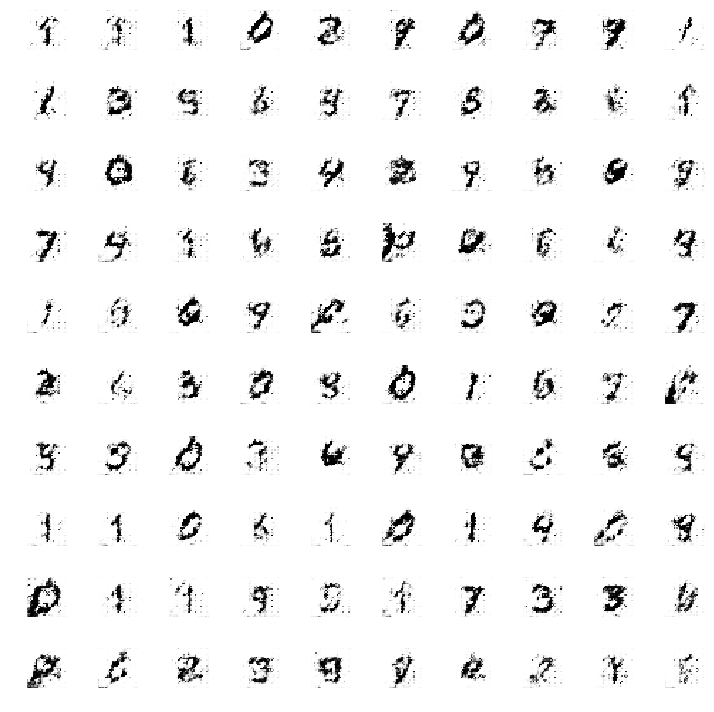

>Saved: infogan_generated_plot_0020.png and infogan_generator_model_0020.h5
>21, 1/937, d1=0.413, d2=1.490 g=1.453
>21, 2/937, d1=0.434, d2=1.259 g=1.660
>21, 3/937, d1=0.556, d2=1.097 g=1.339
>21, 4/937, d1=0.461, d2=1.246 g=1.179
>21, 5/937, d1=0.289, d2=1.405 g=1.528
>21, 6/937, d1=0.565, d2=1.049 g=1.403
>21, 7/937, d1=0.438, d2=1.565 g=1.347
>21, 8/937, d1=0.451, d2=1.448 g=1.505
>21, 9/937, d1=0.505, d2=1.164 g=1.391
>21, 10/937, d1=0.447, d2=1.255 g=1.381
>21, 11/937, d1=0.488, d2=1.331 g=1.416
>21, 12/937, d1=0.498, d2=1.492 g=1.397
>21, 13/937, d1=0.476, d2=1.139 g=1.433
>21, 14/937, d1=0.418, d2=1.141 g=1.315
>21, 15/937, d1=0.404, d2=1.293 g=1.473
>21, 16/937, d1=0.451, d2=1.071 g=1.309
>21, 17/937, d1=0.472, d2=1.396 g=1.268
>21, 18/937, d1=0.538, d2=1.366 g=1.456
>21, 19/937, d1=0.548, d2=1.277 g=1.388
>21, 20/937, d1=0.457, d2=1.147 g=1.419
>21, 21/937, d1=0.405, d2=1.193 g=1.408
>21, 22/937, d1=0.365, d2=1.152 g=1.339
>21, 23/937, d1=0.445, d2=1.294 g=1.354
>21, 24/937, 

>21, 208/937, d1=0.419, d2=1.299 g=1.253
>21, 209/937, d1=0.302, d2=1.312 g=1.510
>21, 210/937, d1=0.446, d2=0.913 g=1.394
>21, 211/937, d1=0.360, d2=0.927 g=1.159
>21, 212/937, d1=0.350, d2=1.103 g=1.183
>21, 213/937, d1=0.342, d2=1.072 g=1.002
>21, 214/937, d1=0.346, d2=1.160 g=1.205
>21, 215/937, d1=0.455, d2=1.389 g=1.474
>21, 216/937, d1=0.471, d2=0.843 g=1.230
>21, 217/937, d1=0.330, d2=1.386 g=1.328
>21, 218/937, d1=0.531, d2=1.443 g=1.539
>21, 219/937, d1=0.543, d2=1.196 g=1.640
>21, 220/937, d1=0.474, d2=1.148 g=1.531
>21, 221/937, d1=0.439, d2=1.238 g=1.310
>21, 222/937, d1=0.378, d2=1.420 g=1.617
>21, 223/937, d1=0.415, d2=1.203 g=1.767
>21, 224/937, d1=0.517, d2=1.191 g=1.326
>21, 225/937, d1=0.410, d2=1.296 g=1.549
>21, 226/937, d1=0.439, d2=1.222 g=1.562
>21, 227/937, d1=0.453, d2=1.146 g=1.594
>21, 228/937, d1=0.438, d2=1.198 g=1.420
>21, 229/937, d1=0.371, d2=1.169 g=1.282
>21, 230/937, d1=0.365, d2=1.236 g=1.510
>21, 231/937, d1=0.381, d2=1.158 g=1.664
>21, 232/937, d1

>21, 415/937, d1=0.492, d2=1.137 g=1.155
>21, 416/937, d1=0.480, d2=1.283 g=1.070
>21, 417/937, d1=0.526, d2=1.256 g=1.118
>21, 418/937, d1=0.372, d2=1.308 g=1.323
>21, 419/937, d1=0.478, d2=1.127 g=1.255
>21, 420/937, d1=0.441, d2=1.175 g=1.192
>21, 421/937, d1=0.442, d2=1.454 g=1.385
>21, 422/937, d1=0.447, d2=1.042 g=1.266
>21, 423/937, d1=0.509, d2=1.064 g=1.054
>21, 424/937, d1=0.495, d2=1.354 g=0.989
>21, 425/937, d1=0.374, d2=1.422 g=1.100
>21, 426/937, d1=0.405, d2=1.153 g=1.230
>21, 427/937, d1=0.410, d2=1.059 g=1.176
>21, 428/937, d1=0.479, d2=1.467 g=1.340
>21, 429/937, d1=0.487, d2=1.314 g=1.592
>21, 430/937, d1=0.598, d2=0.963 g=1.046
>21, 431/937, d1=0.341, d2=1.416 g=1.251
>21, 432/937, d1=0.459, d2=1.160 g=1.488
>21, 433/937, d1=0.349, d2=1.234 g=1.279
>21, 434/937, d1=0.591, d2=1.404 g=1.389
>21, 435/937, d1=0.472, d2=0.952 g=1.090
>21, 436/937, d1=0.526, d2=1.530 g=1.264
>21, 437/937, d1=0.451, d2=1.435 g=1.369
>21, 438/937, d1=0.466, d2=1.313 g=1.554
>21, 439/937, d1

>21, 617/937, d1=0.425, d2=1.298 g=1.615
>21, 618/937, d1=0.439, d2=1.086 g=1.639
>21, 619/937, d1=0.472, d2=1.240 g=1.575
>21, 620/937, d1=0.414, d2=1.290 g=1.717
>21, 621/937, d1=0.515, d2=1.208 g=1.538
>21, 622/937, d1=0.532, d2=1.342 g=1.457
>21, 623/937, d1=0.464, d2=1.195 g=1.374
>21, 624/937, d1=0.501, d2=1.447 g=1.288
>21, 625/937, d1=0.419, d2=1.292 g=1.437
>21, 626/937, d1=0.442, d2=1.260 g=1.668
>21, 627/937, d1=0.528, d2=1.409 g=1.421
>21, 628/937, d1=0.479, d2=1.472 g=1.290
>21, 629/937, d1=0.407, d2=1.233 g=1.464
>21, 630/937, d1=0.633, d2=1.381 g=1.490
>21, 631/937, d1=0.440, d2=1.495 g=1.577
>21, 632/937, d1=0.532, d2=1.046 g=1.476
>21, 633/937, d1=0.494, d2=1.382 g=1.389
>21, 634/937, d1=0.565, d2=1.494 g=1.293
>21, 635/937, d1=0.355, d2=1.316 g=1.453
>21, 636/937, d1=0.529, d2=1.322 g=1.483
>21, 637/937, d1=0.557, d2=1.351 g=1.370
>21, 638/937, d1=0.492, d2=1.364 g=1.429
>21, 639/937, d1=0.575, d2=1.335 g=1.221
>21, 640/937, d1=0.426, d2=1.545 g=1.577
>21, 641/937, d1

>21, 820/937, d1=0.460, d2=1.368 g=1.304
>21, 821/937, d1=0.474, d2=1.231 g=1.443
>21, 822/937, d1=0.431, d2=1.094 g=1.154
>21, 823/937, d1=0.423, d2=1.645 g=1.370
>21, 824/937, d1=0.407, d2=1.033 g=1.518
>21, 825/937, d1=0.467, d2=1.022 g=1.336
>21, 826/937, d1=0.407, d2=1.512 g=1.327
>21, 827/937, d1=0.411, d2=0.913 g=1.270
>21, 828/937, d1=0.547, d2=1.514 g=1.286
>21, 829/937, d1=0.403, d2=1.256 g=1.578
>21, 830/937, d1=0.553, d2=1.260 g=1.310
>21, 831/937, d1=0.505, d2=1.312 g=1.217
>21, 832/937, d1=0.527, d2=1.309 g=1.283
>21, 833/937, d1=0.457, d2=1.193 g=1.276
>21, 834/937, d1=0.403, d2=1.266 g=1.443
>21, 835/937, d1=0.545, d2=1.306 g=1.510
>21, 836/937, d1=0.461, d2=1.246 g=1.517
>21, 837/937, d1=0.382, d2=1.265 g=1.549
>21, 838/937, d1=0.552, d2=1.259 g=1.459
>21, 839/937, d1=0.458, d2=1.109 g=1.385
>21, 840/937, d1=0.465, d2=1.389 g=1.404
>21, 841/937, d1=0.418, d2=1.476 g=1.451
>21, 842/937, d1=0.461, d2=1.244 g=1.502
>21, 843/937, d1=0.491, d2=1.174 g=1.414
>21, 844/937, d1

>22, 90/937, d1=0.472, d2=1.431 g=1.506
>22, 91/937, d1=0.657, d2=1.328 g=1.344
>22, 92/937, d1=0.507, d2=1.543 g=1.324
>22, 93/937, d1=0.512, d2=1.128 g=1.279
>22, 94/937, d1=0.422, d2=1.364 g=1.420
>22, 95/937, d1=0.417, d2=1.147 g=1.478
>22, 96/937, d1=0.530, d2=1.192 g=1.322
>22, 97/937, d1=0.473, d2=1.326 g=1.274
>22, 98/937, d1=0.418, d2=1.132 g=1.267
>22, 99/937, d1=0.427, d2=1.200 g=1.393
>22, 100/937, d1=0.427, d2=1.369 g=1.477
>22, 101/937, d1=0.526, d2=1.070 g=1.191
>22, 102/937, d1=0.378, d2=1.333 g=1.361
>22, 103/937, d1=0.383, d2=1.153 g=1.421
>22, 104/937, d1=0.522, d2=1.246 g=1.297
>22, 105/937, d1=0.389, d2=1.295 g=1.348
>22, 106/937, d1=0.441, d2=1.144 g=1.475
>22, 107/937, d1=0.496, d2=1.164 g=1.382
>22, 108/937, d1=0.471, d2=1.208 g=1.393
>22, 109/937, d1=0.455, d2=1.560 g=1.563
>22, 110/937, d1=0.472, d2=0.953 g=1.245
>22, 111/937, d1=0.442, d2=1.381 g=1.226
>22, 112/937, d1=0.505, d2=1.239 g=1.295
>22, 113/937, d1=0.549, d2=1.397 g=1.197
>22, 114/937, d1=0.501, d2

>22, 290/937, d1=0.529, d2=1.252 g=1.259
>22, 291/937, d1=0.441, d2=1.188 g=1.307
>22, 292/937, d1=0.407, d2=1.376 g=1.527
>22, 293/937, d1=0.489, d2=1.126 g=1.627
>22, 294/937, d1=0.610, d2=1.423 g=1.416
>22, 295/937, d1=0.374, d2=1.300 g=1.523
>22, 296/937, d1=0.457, d2=1.213 g=1.420
>22, 297/937, d1=0.420, d2=1.372 g=1.572
>22, 298/937, d1=0.513, d2=1.077 g=1.247
>22, 299/937, d1=0.374, d2=1.108 g=1.126
>22, 300/937, d1=0.316, d2=1.160 g=1.308
>22, 301/937, d1=0.493, d2=1.097 g=1.341
>22, 302/937, d1=0.410, d2=1.450 g=1.291
>22, 303/937, d1=0.464, d2=1.264 g=1.396
>22, 304/937, d1=0.339, d2=1.132 g=1.394
>22, 305/937, d1=0.409, d2=1.284 g=1.251
>22, 306/937, d1=0.381, d2=1.365 g=1.459
>22, 307/937, d1=0.410, d2=1.169 g=1.422
>22, 308/937, d1=0.409, d2=1.109 g=1.384
>22, 309/937, d1=0.397, d2=1.143 g=1.342
>22, 310/937, d1=0.342, d2=1.323 g=1.593
>22, 311/937, d1=0.395, d2=1.131 g=1.580
>22, 312/937, d1=0.448, d2=1.120 g=1.445
>22, 313/937, d1=0.449, d2=1.226 g=1.142
>22, 314/937, d1

>22, 490/937, d1=0.373, d2=1.185 g=1.371
>22, 491/937, d1=0.435, d2=0.993 g=1.300
>22, 492/937, d1=0.418, d2=1.066 g=1.209
>22, 493/937, d1=0.427, d2=1.508 g=1.388
>22, 494/937, d1=0.463, d2=1.004 g=1.386
>22, 495/937, d1=0.542, d2=1.432 g=1.268
>22, 496/937, d1=0.465, d2=1.246 g=1.377
>22, 497/937, d1=0.440, d2=1.104 g=1.568
>22, 498/937, d1=0.572, d2=1.242 g=1.212
>22, 499/937, d1=0.336, d2=1.249 g=1.303
>22, 500/937, d1=0.431, d2=1.008 g=1.302
>22, 501/937, d1=0.506, d2=1.324 g=1.247
>22, 502/937, d1=0.418, d2=1.552 g=1.650
>22, 503/937, d1=0.460, d2=1.187 g=1.729
>22, 504/937, d1=0.665, d2=1.117 g=1.249
>22, 505/937, d1=0.474, d2=1.441 g=1.387
>22, 506/937, d1=0.514, d2=1.264 g=1.529
>22, 507/937, d1=0.485, d2=1.290 g=1.430
>22, 508/937, d1=0.484, d2=1.151 g=1.397
>22, 509/937, d1=0.498, d2=1.337 g=1.228
>22, 510/937, d1=0.444, d2=1.337 g=1.357
>22, 511/937, d1=0.521, d2=1.109 g=1.388
>22, 512/937, d1=0.375, d2=1.163 g=1.480
>22, 513/937, d1=0.474, d2=1.164 g=1.342
>22, 514/937, d1

>22, 697/937, d1=0.462, d2=1.343 g=1.369
>22, 698/937, d1=0.649, d2=1.234 g=1.229
>22, 699/937, d1=0.475, d2=1.234 g=1.083
>22, 700/937, d1=0.535, d2=1.252 g=1.072
>22, 701/937, d1=0.572, d2=1.529 g=1.242
>22, 702/937, d1=0.575, d2=1.171 g=1.337
>22, 703/937, d1=0.529, d2=1.164 g=1.322
>22, 704/937, d1=0.492, d2=1.213 g=1.202
>22, 705/937, d1=0.488, d2=1.194 g=1.225
>22, 706/937, d1=0.534, d2=1.407 g=1.230
>22, 707/937, d1=0.508, d2=1.275 g=1.315
>22, 708/937, d1=0.560, d2=1.166 g=1.203
>22, 709/937, d1=0.448, d2=1.360 g=1.269
>22, 710/937, d1=0.565, d2=1.202 g=1.038
>22, 711/937, d1=0.492, d2=1.289 g=1.203
>22, 712/937, d1=0.449, d2=1.262 g=1.235
>22, 713/937, d1=0.497, d2=1.113 g=1.246
>22, 714/937, d1=0.489, d2=1.177 g=1.106
>22, 715/937, d1=0.504, d2=1.521 g=0.982
>22, 716/937, d1=0.503, d2=1.336 g=1.121
>22, 717/937, d1=0.655, d2=1.294 g=1.253
>22, 718/937, d1=0.681, d2=1.470 g=1.025
>22, 719/937, d1=0.448, d2=1.392 g=1.131
>22, 720/937, d1=0.617, d2=1.247 g=1.151
>22, 721/937, d1

>22, 898/937, d1=0.295, d2=1.048 g=1.385
>22, 899/937, d1=0.298, d2=0.953 g=1.430
>22, 900/937, d1=0.296, d2=1.374 g=1.676
>22, 901/937, d1=0.546, d2=1.076 g=1.459
>22, 902/937, d1=0.462, d2=1.427 g=1.329
>22, 903/937, d1=0.309, d2=1.189 g=1.694
>22, 904/937, d1=0.534, d2=1.171 g=1.583
>22, 905/937, d1=0.442, d2=1.215 g=1.555
>22, 906/937, d1=0.505, d2=1.047 g=1.345
>22, 907/937, d1=0.331, d2=1.141 g=1.331
>22, 908/937, d1=0.397, d2=1.290 g=1.411
>22, 909/937, d1=0.487, d2=1.192 g=1.515
>22, 910/937, d1=0.445, d2=1.190 g=1.477
>22, 911/937, d1=0.463, d2=1.395 g=1.511
>22, 912/937, d1=0.511, d2=1.336 g=1.542
>22, 913/937, d1=0.462, d2=1.219 g=1.486
>22, 914/937, d1=0.442, d2=0.991 g=1.254
>22, 915/937, d1=0.531, d2=1.231 g=1.162
>22, 916/937, d1=0.432, d2=1.129 g=1.478
>22, 917/937, d1=0.416, d2=1.213 g=1.521
>22, 918/937, d1=0.457, d2=1.337 g=1.566
>22, 919/937, d1=0.537, d2=1.234 g=1.321
>22, 920/937, d1=0.498, d2=1.205 g=1.333
>22, 921/937, d1=0.355, d2=1.027 g=1.424
>22, 922/937, d1

>23, 166/937, d1=0.569, d2=1.274 g=1.060
>23, 167/937, d1=0.449, d2=1.348 g=1.161
>23, 168/937, d1=0.431, d2=1.308 g=1.273
>23, 169/937, d1=0.612, d2=1.110 g=1.174
>23, 170/937, d1=0.546, d2=1.343 g=1.096
>23, 171/937, d1=0.543, d2=1.212 g=1.147
>23, 172/937, d1=0.677, d2=1.207 g=1.072
>23, 173/937, d1=0.501, d2=1.437 g=1.063
>23, 174/937, d1=0.582, d2=1.204 g=1.215
>23, 175/937, d1=0.556, d2=1.210 g=1.136
>23, 176/937, d1=0.575, d2=1.541 g=1.119
>23, 177/937, d1=0.489, d2=1.296 g=1.235
>23, 178/937, d1=0.642, d2=1.119 g=1.130
>23, 179/937, d1=0.533, d2=1.431 g=1.154
>23, 180/937, d1=0.647, d2=1.224 g=1.124
>23, 181/937, d1=0.537, d2=1.255 g=1.137
>23, 182/937, d1=0.504, d2=1.095 g=1.000
>23, 183/937, d1=0.625, d2=1.436 g=1.062
>23, 184/937, d1=0.553, d2=1.539 g=1.099
>23, 185/937, d1=0.501, d2=1.300 g=1.140
>23, 186/937, d1=0.565, d2=1.143 g=1.046
>23, 187/937, d1=0.495, d2=1.288 g=0.998
>23, 188/937, d1=0.548, d2=1.222 g=1.121
>23, 189/937, d1=0.470, d2=1.287 g=0.985
>23, 190/937, d1

>23, 368/937, d1=0.516, d2=1.094 g=1.180
>23, 369/937, d1=0.615, d2=1.244 g=1.089
>23, 370/937, d1=0.470, d2=1.259 g=1.019
>23, 371/937, d1=0.477, d2=1.194 g=0.975
>23, 372/937, d1=0.402, d2=1.049 g=0.987
>23, 373/937, d1=0.593, d2=1.274 g=0.848
>23, 374/937, d1=0.395, d2=1.120 g=0.916
>23, 375/937, d1=0.495, d2=1.239 g=1.076
>23, 376/937, d1=0.504, d2=1.071 g=1.132
>23, 377/937, d1=0.510, d2=1.343 g=1.099
>23, 378/937, d1=0.439, d2=1.131 g=0.941
>23, 379/937, d1=0.379, d2=1.061 g=0.952
>23, 380/937, d1=0.369, d2=1.174 g=1.142
>23, 381/937, d1=0.642, d2=0.981 g=0.997
>23, 382/937, d1=0.442, d2=1.282 g=0.940
>23, 383/937, d1=0.437, d2=1.377 g=1.111
>23, 384/937, d1=0.436, d2=0.991 g=1.119
>23, 385/937, d1=0.562, d2=1.232 g=1.017
>23, 386/937, d1=0.530, d2=1.106 g=1.008
>23, 387/937, d1=0.397, d2=1.390 g=1.213
>23, 388/937, d1=0.496, d2=1.046 g=1.055
>23, 389/937, d1=0.476, d2=1.261 g=1.127
>23, 390/937, d1=0.451, d2=1.070 g=1.044
>23, 391/937, d1=0.491, d2=1.137 g=1.105
>23, 392/937, d1

>23, 574/937, d1=0.581, d2=0.954 g=0.850
>23, 575/937, d1=0.421, d2=1.340 g=0.811
>23, 576/937, d1=0.585, d2=1.278 g=0.993
>23, 577/937, d1=0.496, d2=1.074 g=1.019
>23, 578/937, d1=0.480, d2=1.251 g=1.012
>23, 579/937, d1=0.603, d2=1.152 g=0.955
>23, 580/937, d1=0.469, d2=1.078 g=0.905
>23, 581/937, d1=0.395, d2=1.016 g=0.919
>23, 582/937, d1=0.482, d2=1.518 g=0.860
>23, 583/937, d1=0.559, d2=1.493 g=0.838
>23, 584/937, d1=0.587, d2=1.204 g=1.001
>23, 585/937, d1=0.461, d2=1.176 g=0.984
>23, 586/937, d1=0.474, d2=1.362 g=1.179
>23, 587/937, d1=0.539, d2=0.942 g=0.936
>23, 588/937, d1=0.647, d2=1.294 g=0.972
>23, 589/937, d1=0.428, d2=1.235 g=0.954
>23, 590/937, d1=0.470, d2=1.197 g=0.933
>23, 591/937, d1=0.476, d2=1.111 g=0.908
>23, 592/937, d1=0.489, d2=1.445 g=0.889
>23, 593/937, d1=0.490, d2=1.331 g=0.930
>23, 594/937, d1=0.537, d2=1.205 g=1.089
>23, 595/937, d1=0.577, d2=1.129 g=0.847
>23, 596/937, d1=0.417, d2=1.245 g=0.938
>23, 597/937, d1=0.488, d2=1.189 g=1.088
>23, 598/937, d1

>23, 777/937, d1=0.424, d2=0.945 g=1.191
>23, 778/937, d1=0.580, d2=1.108 g=0.983
>23, 779/937, d1=0.365, d2=1.446 g=1.282
>23, 780/937, d1=0.534, d2=1.064 g=1.319
>23, 781/937, d1=0.552, d2=1.011 g=1.053
>23, 782/937, d1=0.406, d2=1.109 g=1.025
>23, 783/937, d1=0.563, d2=1.652 g=1.124
>23, 784/937, d1=0.552, d2=1.003 g=1.186
>23, 785/937, d1=0.486, d2=0.928 g=1.158
>23, 786/937, d1=0.503, d2=1.516 g=1.087
>23, 787/937, d1=0.502, d2=1.219 g=1.269
>23, 788/937, d1=0.529, d2=1.258 g=1.097
>23, 789/937, d1=0.576, d2=1.245 g=1.095
>23, 790/937, d1=0.518, d2=1.196 g=0.967
>23, 791/937, d1=0.504, d2=1.318 g=1.042
>23, 792/937, d1=0.554, d2=1.039 g=0.934
>23, 793/937, d1=0.468, d2=1.314 g=1.012
>23, 794/937, d1=0.511, d2=1.071 g=1.045
>23, 795/937, d1=0.593, d2=1.318 g=1.053
>23, 796/937, d1=0.587, d2=1.061 g=0.964
>23, 797/937, d1=0.486, d2=1.130 g=1.007
>23, 798/937, d1=0.505, d2=1.091 g=0.938
>23, 799/937, d1=0.648, d2=1.392 g=0.895
>23, 800/937, d1=0.410, d2=1.154 g=1.037
>23, 801/937, d1

>24, 49/937, d1=0.472, d2=1.167 g=0.848
>24, 50/937, d1=0.353, d2=1.224 g=0.865
>24, 51/937, d1=0.551, d2=1.223 g=1.122
>24, 52/937, d1=0.454, d2=1.077 g=1.129
>24, 53/937, d1=0.521, d2=1.167 g=0.962
>24, 54/937, d1=0.468, d2=1.090 g=0.984
>24, 55/937, d1=0.503, d2=1.070 g=1.027
>24, 56/937, d1=0.462, d2=1.227 g=1.163
>24, 57/937, d1=0.560, d2=0.838 g=1.064
>24, 58/937, d1=0.432, d2=1.228 g=0.967
>24, 59/937, d1=0.378, d2=1.071 g=1.158
>24, 60/937, d1=0.494, d2=1.217 g=1.070
>24, 61/937, d1=0.587, d2=1.162 g=1.008
>24, 62/937, d1=0.434, d2=1.241 g=0.992
>24, 63/937, d1=0.548, d2=1.178 g=1.003
>24, 64/937, d1=0.526, d2=1.126 g=1.004
>24, 65/937, d1=0.438, d2=1.010 g=1.029
>24, 66/937, d1=0.555, d2=1.075 g=0.926
>24, 67/937, d1=0.420, d2=1.377 g=0.995
>24, 68/937, d1=0.364, d2=1.157 g=1.254
>24, 69/937, d1=0.703, d2=1.227 g=1.083
>24, 70/937, d1=0.561, d2=1.228 g=1.099
>24, 71/937, d1=0.485, d2=1.103 g=0.980
>24, 72/937, d1=0.485, d2=1.122 g=1.042
>24, 73/937, d1=0.459, d2=1.143 g=1.092


>24, 254/937, d1=0.433, d2=1.300 g=0.904
>24, 255/937, d1=0.383, d2=1.075 g=0.942
>24, 256/937, d1=0.453, d2=1.006 g=0.988
>24, 257/937, d1=0.598, d2=1.328 g=0.834
>24, 258/937, d1=0.483, d2=0.994 g=1.070
>24, 259/937, d1=0.501, d2=1.072 g=0.880
>24, 260/937, d1=0.400, d2=1.379 g=0.979
>24, 261/937, d1=0.680, d2=1.225 g=1.055
>24, 262/937, d1=0.450, d2=1.141 g=0.938
>24, 263/937, d1=0.483, d2=1.320 g=0.865
>24, 264/937, d1=0.404, d2=1.219 g=1.021
>24, 265/937, d1=0.547, d2=1.073 g=0.886
>24, 266/937, d1=0.454, d2=1.273 g=1.015
>24, 267/937, d1=0.485, d2=1.171 g=1.189
>24, 268/937, d1=0.533, d2=0.861 g=0.962
>24, 269/937, d1=0.486, d2=1.499 g=1.070
>24, 270/937, d1=0.390, d2=1.045 g=1.113
>24, 271/937, d1=0.635, d2=1.193 g=0.960
>24, 272/937, d1=0.369, d2=1.155 g=1.150
>24, 273/937, d1=0.536, d2=1.077 g=1.099
>24, 274/937, d1=0.525, d2=1.148 g=0.973
>24, 275/937, d1=0.486, d2=1.069 g=1.193
>24, 276/937, d1=0.458, d2=1.218 g=1.099
>24, 277/937, d1=0.491, d2=0.990 g=1.128
>24, 278/937, d1

>24, 454/937, d1=0.467, d2=0.941 g=1.162
>24, 455/937, d1=0.419, d2=1.040 g=1.104
>24, 456/937, d1=0.484, d2=1.220 g=1.143
>24, 457/937, d1=0.460, d2=0.956 g=1.121
>24, 458/937, d1=0.452, d2=1.119 g=1.113
>24, 459/937, d1=0.398, d2=1.056 g=1.064
>24, 460/937, d1=0.408, d2=1.074 g=1.132
>24, 461/937, d1=0.478, d2=1.129 g=1.128
>24, 462/937, d1=0.591, d2=0.975 g=0.986
>24, 463/937, d1=0.441, d2=1.142 g=1.032
>24, 464/937, d1=0.511, d2=1.109 g=1.097
>24, 465/937, d1=0.547, d2=1.037 g=1.084
>24, 466/937, d1=0.471, d2=1.250 g=1.025
>24, 467/937, d1=0.498, d2=1.109 g=0.940
>24, 468/937, d1=0.395, d2=1.296 g=1.106
>24, 469/937, d1=0.554, d2=1.039 g=1.067
>24, 470/937, d1=0.510, d2=1.249 g=1.019
>24, 471/937, d1=0.448, d2=1.144 g=1.224
>24, 472/937, d1=0.533, d2=0.964 g=1.046
>24, 473/937, d1=0.536, d2=1.227 g=1.042
>24, 474/937, d1=0.435, d2=1.198 g=1.161
>24, 475/937, d1=0.765, d2=1.111 g=0.890
>24, 476/937, d1=0.449, d2=1.460 g=0.873
>24, 477/937, d1=0.541, d2=1.265 g=1.141
>24, 478/937, d1

>24, 656/937, d1=0.347, d2=0.935 g=1.098
>24, 657/937, d1=0.429, d2=1.084 g=0.981
>24, 658/937, d1=0.385, d2=0.827 g=0.895
>24, 659/937, d1=0.546, d2=1.221 g=0.915
>24, 660/937, d1=0.382, d2=1.244 g=1.010
>24, 661/937, d1=0.608, d2=1.199 g=0.953
>24, 662/937, d1=0.596, d2=1.167 g=0.825
>24, 663/937, d1=0.479, d2=1.290 g=0.966
>24, 664/937, d1=0.433, d2=0.970 g=0.972
>24, 665/937, d1=0.430, d2=1.059 g=0.782
>24, 666/937, d1=0.448, d2=1.157 g=0.924
>24, 667/937, d1=0.570, d2=1.239 g=0.947
>24, 668/937, d1=0.452, d2=0.875 g=0.851
>24, 669/937, d1=0.496, d2=1.028 g=0.760
>24, 670/937, d1=0.409, d2=1.182 g=0.849
>24, 671/937, d1=0.420, d2=1.363 g=0.983
>24, 672/937, d1=0.514, d2=0.890 g=0.902
>24, 673/937, d1=0.426, d2=1.043 g=0.989
>24, 674/937, d1=0.499, d2=1.258 g=1.108
>24, 675/937, d1=0.515, d2=0.933 g=0.977
>24, 676/937, d1=0.489, d2=0.986 g=0.994
>24, 677/937, d1=0.408, d2=1.113 g=1.053
>24, 678/937, d1=0.487, d2=1.107 g=0.942
>24, 679/937, d1=0.469, d2=1.117 g=0.988
>24, 680/937, d1

>24, 859/937, d1=0.551, d2=0.952 g=0.842
>24, 860/937, d1=0.591, d2=1.373 g=0.850
>24, 861/937, d1=0.586, d2=1.176 g=0.844
>24, 862/937, d1=0.612, d2=1.199 g=0.851
>24, 863/937, d1=0.516, d2=1.158 g=0.997
>24, 864/937, d1=0.606, d2=1.017 g=0.898
>24, 865/937, d1=0.601, d2=1.244 g=0.695
>24, 866/937, d1=0.498, d2=1.424 g=0.935
>24, 867/937, d1=0.501, d2=1.061 g=0.920
>24, 868/937, d1=0.579, d2=1.048 g=0.903
>24, 869/937, d1=0.555, d2=1.515 g=0.860
>24, 870/937, d1=0.584, d2=1.346 g=0.922
>24, 871/937, d1=0.559, d2=1.273 g=1.069
>24, 872/937, d1=0.558, d2=1.273 g=0.972
>24, 873/937, d1=0.507, d2=1.050 g=0.900
>24, 874/937, d1=0.561, d2=1.288 g=0.893
>24, 875/937, d1=0.483, d2=1.106 g=0.961
>24, 876/937, d1=0.534, d2=1.065 g=1.056
>24, 877/937, d1=0.423, d2=1.153 g=1.154
>24, 878/937, d1=0.499, d2=0.980 g=0.974
>24, 879/937, d1=0.409, d2=1.165 g=1.116
>24, 880/937, d1=0.538, d2=1.139 g=1.085
>24, 881/937, d1=0.451, d2=1.028 g=1.169
>24, 882/937, d1=0.584, d2=1.211 g=1.078
>24, 883/937, d1

>25, 128/937, d1=0.574, d2=1.582 g=0.977
>25, 129/937, d1=0.564, d2=1.267 g=0.865
>25, 130/937, d1=0.513, d2=1.273 g=0.994
>25, 131/937, d1=0.575, d2=1.178 g=0.981
>25, 132/937, d1=0.552, d2=1.103 g=1.011
>25, 133/937, d1=0.590, d2=1.003 g=1.043
>25, 134/937, d1=0.427, d2=1.165 g=1.034
>25, 135/937, d1=0.607, d2=1.362 g=1.009
>25, 136/937, d1=0.532, d2=1.176 g=0.971
>25, 137/937, d1=0.589, d2=1.179 g=1.094
>25, 138/937, d1=0.513, d2=1.118 g=0.977
>25, 139/937, d1=0.548, d2=1.200 g=0.920
>25, 140/937, d1=0.571, d2=1.199 g=1.065
>25, 141/937, d1=0.493, d2=1.159 g=0.988
>25, 142/937, d1=0.453, d2=1.140 g=0.988
>25, 143/937, d1=0.488, d2=1.117 g=0.998
>25, 144/937, d1=0.534, d2=1.174 g=1.019
>25, 145/937, d1=0.479, d2=1.018 g=1.007
>25, 146/937, d1=0.450, d2=1.147 g=0.973
>25, 147/937, d1=0.573, d2=1.193 g=0.884
>25, 148/937, d1=0.445, d2=1.296 g=1.019
>25, 149/937, d1=0.512, d2=1.195 g=1.054
>25, 150/937, d1=0.564, d2=1.139 g=1.078
>25, 151/937, d1=0.552, d2=1.209 g=1.097
>25, 152/937, d1

>25, 331/937, d1=0.473, d2=1.159 g=1.005
>25, 332/937, d1=0.659, d2=1.297 g=0.824
>25, 333/937, d1=0.466, d2=1.291 g=0.873
>25, 334/937, d1=0.494, d2=1.139 g=0.856
>25, 335/937, d1=0.528, d2=1.180 g=0.899
>25, 336/937, d1=0.502, d2=1.124 g=0.946
>25, 337/937, d1=0.560, d2=1.133 g=0.970
>25, 338/937, d1=0.674, d2=1.172 g=0.869
>25, 339/937, d1=0.633, d2=1.403 g=0.895
>25, 340/937, d1=0.620, d2=1.281 g=0.949
>25, 341/937, d1=0.637, d2=1.357 g=1.140
>25, 342/937, d1=0.561, d2=1.232 g=1.137
>25, 343/937, d1=0.566, d2=1.060 g=1.064
>25, 344/937, d1=0.647, d2=1.200 g=0.915
>25, 345/937, d1=0.534, d2=1.104 g=1.011
>25, 346/937, d1=0.561, d2=1.389 g=1.071
>25, 347/937, d1=0.594, d2=1.161 g=1.016
>25, 348/937, d1=0.537, d2=1.161 g=1.073
>25, 349/937, d1=0.656, d2=1.038 g=0.995
>25, 350/937, d1=0.629, d2=1.353 g=0.891
>25, 351/937, d1=0.503, d2=1.225 g=0.988
>25, 352/937, d1=0.590, d2=1.217 g=1.010
>25, 353/937, d1=0.626, d2=1.312 g=0.917
>25, 354/937, d1=0.520, d2=1.156 g=0.944
>25, 355/937, d1

>25, 533/937, d1=0.545, d2=1.170 g=1.124
>25, 534/937, d1=0.549, d2=1.258 g=1.184
>25, 535/937, d1=0.571, d2=1.108 g=1.150
>25, 536/937, d1=0.591, d2=1.354 g=1.073
>25, 537/937, d1=0.468, d2=1.246 g=1.047
>25, 538/937, d1=0.497, d2=1.201 g=1.098
>25, 539/937, d1=0.572, d2=1.067 g=1.069
>25, 540/937, d1=0.479, d2=1.277 g=1.101
>25, 541/937, d1=0.444, d2=1.068 g=1.201
>25, 542/937, d1=0.595, d2=1.139 g=1.076
>25, 543/937, d1=0.456, d2=1.145 g=1.152
>25, 544/937, d1=0.621, d2=1.119 g=0.999
>25, 545/937, d1=0.445, d2=1.133 g=1.092
>25, 546/937, d1=0.490, d2=1.131 g=1.097
>25, 547/937, d1=0.503, d2=1.076 g=0.996
>25, 548/937, d1=0.589, d2=1.389 g=1.010
>25, 549/937, d1=0.540, d2=1.075 g=1.062
>25, 550/937, d1=0.532, d2=1.135 g=1.010
>25, 551/937, d1=0.486, d2=1.122 g=0.966
>25, 552/937, d1=0.448, d2=1.046 g=1.006
>25, 553/937, d1=0.430, d2=1.032 g=0.964
>25, 554/937, d1=0.522, d2=1.297 g=1.142
>25, 555/937, d1=0.541, d2=0.971 g=1.004
>25, 556/937, d1=0.486, d2=1.218 g=1.053
>25, 557/937, d1

>25, 733/937, d1=0.545, d2=1.083 g=0.931
>25, 734/937, d1=0.587, d2=1.098 g=0.887
>25, 735/937, d1=0.461, d2=1.213 g=0.881
>25, 736/937, d1=0.545, d2=1.194 g=0.993
>25, 737/937, d1=0.497, d2=1.121 g=1.016
>25, 738/937, d1=0.631, d2=1.119 g=1.083
>25, 739/937, d1=0.575, d2=1.172 g=1.004
>25, 740/937, d1=0.567, d2=1.129 g=0.921
>25, 741/937, d1=0.482, d2=1.199 g=1.017
>25, 742/937, d1=0.624, d2=1.110 g=0.932
>25, 743/937, d1=0.569, d2=1.316 g=0.927
>25, 744/937, d1=0.469, d2=1.049 g=0.979
>25, 745/937, d1=0.574, d2=1.127 g=1.037
>25, 746/937, d1=0.548, d2=1.060 g=0.989
>25, 747/937, d1=0.620, d2=1.248 g=0.963
>25, 748/937, d1=0.595, d2=1.104 g=0.947
>25, 749/937, d1=0.508, d2=1.017 g=0.834
>25, 750/937, d1=0.543, d2=1.129 g=0.918
>25, 751/937, d1=0.503, d2=1.237 g=1.175
>25, 752/937, d1=0.637, d2=1.052 g=0.979
>25, 753/937, d1=0.578, d2=1.183 g=0.924
>25, 754/937, d1=0.538, d2=1.252 g=1.035
>25, 755/937, d1=0.710, d2=1.186 g=1.036
>25, 756/937, d1=0.621, d2=1.245 g=1.107
>25, 757/937, d1

>25, 937/937, d1=0.598, d2=1.125 g=0.893


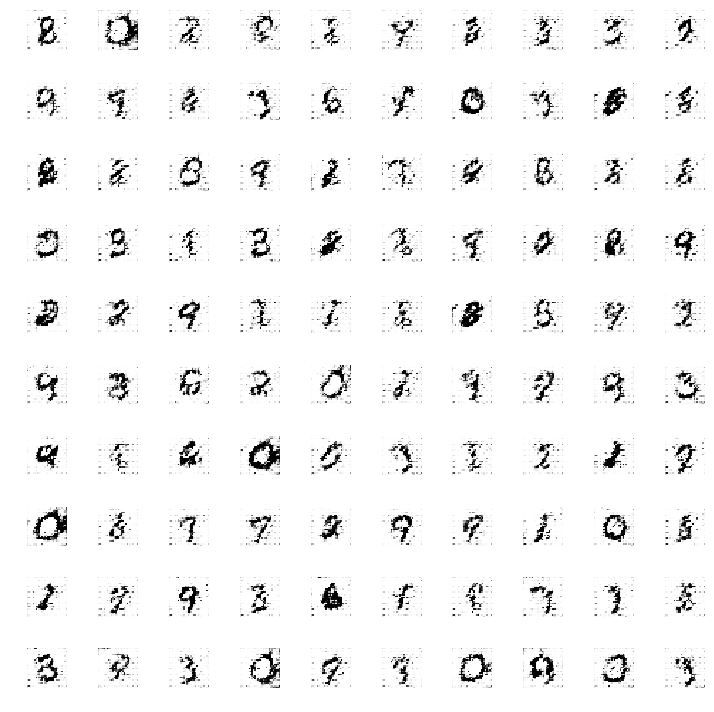

>Saved: infogan_generated_plot_0025.png and infogan_generator_model_0025.h5
>26, 1/937, d1=0.549, d2=1.029 g=0.953
>26, 2/937, d1=0.456, d2=1.330 g=1.057
>26, 3/937, d1=0.520, d2=1.025 g=1.004
>26, 4/937, d1=0.608, d2=1.201 g=0.994
>26, 5/937, d1=0.460, d2=1.193 g=1.111
>26, 6/937, d1=0.596, d2=0.988 g=1.059
>26, 7/937, d1=0.485, d2=1.047 g=1.051
>26, 8/937, d1=0.619, d2=1.070 g=0.954
>26, 9/937, d1=0.469, d2=1.101 g=1.040
>26, 10/937, d1=0.654, d2=1.124 g=0.926
>26, 11/937, d1=0.530, d2=1.075 g=0.925
>26, 12/937, d1=0.483, d2=1.273 g=1.037
>26, 13/937, d1=0.539, d2=1.033 g=1.110
>26, 14/937, d1=0.517, d2=1.288 g=1.056
>26, 15/937, d1=0.579, d2=1.008 g=0.952
>26, 16/937, d1=0.600, d2=1.252 g=1.041
>26, 17/937, d1=0.563, d2=1.100 g=1.004
>26, 18/937, d1=0.618, d2=1.100 g=0.909
>26, 19/937, d1=0.536, d2=1.366 g=0.839
>26, 20/937, d1=0.537, d2=1.144 g=0.979
>26, 21/937, d1=0.560, d2=1.106 g=1.044
>26, 22/937, d1=0.599, d2=1.305 g=0.979
>26, 23/937, d1=0.567, d2=1.095 g=0.884
>26, 24/937, 

>26, 202/937, d1=0.593, d2=1.218 g=1.001
>26, 203/937, d1=0.615, d2=1.182 g=1.006
>26, 204/937, d1=0.719, d2=1.155 g=0.958
>26, 205/937, d1=0.561, d2=1.103 g=0.951
>26, 206/937, d1=0.547, d2=1.187 g=1.018
>26, 207/937, d1=0.629, d2=1.133 g=0.979
>26, 208/937, d1=0.639, d2=0.989 g=0.869
>26, 209/937, d1=0.456, d2=1.435 g=1.070
>26, 210/937, d1=0.534, d2=1.047 g=1.125
>26, 211/937, d1=0.739, d2=1.186 g=1.051
>26, 212/937, d1=0.560, d2=1.113 g=1.024
>26, 213/937, d1=0.705, d2=1.113 g=0.970
>26, 214/937, d1=0.651, d2=1.156 g=0.990
>26, 215/937, d1=0.502, d2=1.173 g=1.153
>26, 216/937, d1=0.560, d2=1.178 g=0.919
>26, 217/937, d1=0.700, d2=1.189 g=0.902
>26, 218/937, d1=0.701, d2=0.891 g=0.819
>26, 219/937, d1=0.635, d2=1.410 g=0.814
>26, 220/937, d1=0.589, d2=1.332 g=0.853
>26, 221/937, d1=0.649, d2=1.174 g=0.901
>26, 222/937, d1=0.582, d2=1.136 g=1.031
>26, 223/937, d1=0.542, d2=1.245 g=1.030
>26, 224/937, d1=0.570, d2=0.912 g=0.828
>26, 225/937, d1=0.775, d2=1.307 g=0.869
>26, 226/937, d1

>26, 404/937, d1=0.439, d2=1.110 g=0.890
>26, 405/937, d1=0.481, d2=1.080 g=0.967
>26, 406/937, d1=0.427, d2=1.012 g=0.976
>26, 407/937, d1=0.458, d2=1.133 g=0.864
>26, 408/937, d1=0.375, d2=1.070 g=1.028
>26, 409/937, d1=0.455, d2=0.996 g=0.962
>26, 410/937, d1=0.477, d2=1.091 g=0.931
>26, 411/937, d1=0.524, d2=1.163 g=0.884
>26, 412/937, d1=0.380, d2=1.082 g=0.949
>26, 413/937, d1=0.421, d2=1.092 g=0.901
>26, 414/937, d1=0.483, d2=0.894 g=0.872
>26, 415/937, d1=0.395, d2=1.435 g=1.011
>26, 416/937, d1=0.549, d2=0.962 g=0.986
>26, 417/937, d1=0.527, d2=1.057 g=0.862
>26, 418/937, d1=0.397, d2=1.201 g=0.918
>26, 419/937, d1=0.472, d2=1.004 g=1.043
>26, 420/937, d1=0.552, d2=0.932 g=0.796
>26, 421/937, d1=0.365, d2=1.143 g=0.843
>26, 422/937, d1=0.457, d2=1.102 g=0.958
>26, 423/937, d1=0.475, d2=1.075 g=1.070
>26, 424/937, d1=0.590, d2=1.114 g=1.050
>26, 425/937, d1=0.640, d2=1.354 g=1.153
>26, 426/937, d1=0.666, d2=1.137 g=1.150
>26, 427/937, d1=0.591, d2=1.031 g=1.085
>26, 428/937, d1

>26, 609/937, d1=0.488, d2=1.328 g=0.909
>26, 610/937, d1=0.527, d2=1.095 g=1.038
>26, 611/937, d1=0.616, d2=1.010 g=0.903
>26, 612/937, d1=0.543, d2=1.195 g=0.924
>26, 613/937, d1=0.562, d2=1.241 g=1.047
>26, 614/937, d1=0.630, d2=1.030 g=1.046
>26, 615/937, d1=0.475, d2=0.943 g=0.992
>26, 616/937, d1=0.564, d2=1.115 g=0.883
>26, 617/937, d1=0.463, d2=1.056 g=0.900
>26, 618/937, d1=0.549, d2=1.248 g=0.923
>26, 619/937, d1=0.495, d2=1.160 g=1.029
>26, 620/937, d1=0.572, d2=1.088 g=1.030
>26, 621/937, d1=0.696, d2=1.028 g=0.841
>26, 622/937, d1=0.434, d2=1.338 g=0.913
>26, 623/937, d1=0.623, d2=1.099 g=1.062
>26, 624/937, d1=0.604, d2=1.055 g=1.003
>26, 625/937, d1=0.618, d2=0.979 g=0.906
>26, 626/937, d1=0.499, d2=1.144 g=0.947
>26, 627/937, d1=0.696, d2=1.125 g=0.985
>26, 628/937, d1=0.554, d2=0.998 g=1.058
>26, 629/937, d1=0.537, d2=1.040 g=1.026
>26, 630/937, d1=0.494, d2=1.033 g=1.107
>26, 631/937, d1=0.558, d2=1.016 g=1.038
>26, 632/937, d1=0.551, d2=1.226 g=1.051
>26, 633/937, d1

>26, 815/937, d1=0.437, d2=1.041 g=0.780
>26, 816/937, d1=0.489, d2=1.356 g=0.923
>26, 817/937, d1=0.622, d2=0.948 g=0.977
>26, 818/937, d1=0.692, d2=1.087 g=0.898
>26, 819/937, d1=0.584, d2=1.233 g=0.884
>26, 820/937, d1=0.485, d2=0.991 g=0.818
>26, 821/937, d1=0.434, d2=1.096 g=0.850
>26, 822/937, d1=0.503, d2=1.080 g=0.845
>26, 823/937, d1=0.468, d2=0.989 g=0.885
>26, 824/937, d1=0.518, d2=0.762 g=0.754
>26, 825/937, d1=0.466, d2=1.134 g=0.722
>26, 826/937, d1=0.431, d2=1.101 g=0.904
>26, 827/937, d1=0.428, d2=0.990 g=1.053
>26, 828/937, d1=0.483, d2=1.113 g=1.062
>26, 829/937, d1=0.457, d2=1.008 g=0.961
>26, 830/937, d1=0.460, d2=1.073 g=0.885
>26, 831/937, d1=0.570, d2=0.897 g=0.800
>26, 832/937, d1=0.470, d2=1.061 g=0.818
>26, 833/937, d1=0.483, d2=1.455 g=1.166
>26, 834/937, d1=0.611, d2=0.885 g=1.018
>26, 835/937, d1=0.753, d2=1.178 g=0.934
>26, 836/937, d1=0.500, d2=1.297 g=1.078
>26, 837/937, d1=0.527, d2=0.907 g=1.021
>26, 838/937, d1=0.575, d2=1.074 g=0.927
>26, 839/937, d1

>27, 81/937, d1=0.578, d2=1.190 g=0.856
>27, 82/937, d1=0.496, d2=1.155 g=0.902
>27, 83/937, d1=0.587, d2=1.130 g=0.853
>27, 84/937, d1=0.586, d2=1.149 g=0.928
>27, 85/937, d1=0.620, d2=1.065 g=0.931
>27, 86/937, d1=0.616, d2=1.002 g=0.878
>27, 87/937, d1=0.535, d2=1.042 g=0.890
>27, 88/937, d1=0.488, d2=1.134 g=0.994
>27, 89/937, d1=0.566, d2=1.085 g=1.036
>27, 90/937, d1=0.644, d2=1.109 g=0.910
>27, 91/937, d1=0.509, d2=1.022 g=0.957
>27, 92/937, d1=0.544, d2=0.989 g=0.881
>27, 93/937, d1=0.512, d2=1.073 g=0.814
>27, 94/937, d1=0.509, d2=1.098 g=0.954
>27, 95/937, d1=0.573, d2=1.030 g=0.970
>27, 96/937, d1=0.500, d2=1.089 g=0.961
>27, 97/937, d1=0.514, d2=1.084 g=0.945
>27, 98/937, d1=0.525, d2=0.974 g=0.996
>27, 99/937, d1=0.551, d2=1.123 g=0.934
>27, 100/937, d1=0.565, d2=1.048 g=1.021
>27, 101/937, d1=0.549, d2=0.947 g=0.863
>27, 102/937, d1=0.523, d2=1.128 g=0.953
>27, 103/937, d1=0.575, d2=1.192 g=0.963
>27, 104/937, d1=0.571, d2=1.029 g=1.073
>27, 105/937, d1=0.520, d2=1.024 g=

>27, 287/937, d1=0.621, d2=1.080 g=0.927
>27, 288/937, d1=0.598, d2=1.043 g=0.968
>27, 289/937, d1=0.594, d2=1.042 g=0.862
>27, 290/937, d1=0.605, d2=1.118 g=0.880
>27, 291/937, d1=0.549, d2=0.983 g=0.940
>27, 292/937, d1=0.502, d2=1.022 g=0.991
>27, 293/937, d1=0.583, d2=1.027 g=1.024
>27, 294/937, d1=0.572, d2=0.992 g=0.945
>27, 295/937, d1=0.571, d2=1.577 g=0.942
>27, 296/937, d1=0.563, d2=0.986 g=0.910
>27, 297/937, d1=0.517, d2=1.000 g=0.900
>27, 298/937, d1=0.523, d2=1.167 g=0.825
>27, 299/937, d1=0.551, d2=1.238 g=0.899
>27, 300/937, d1=0.522, d2=1.023 g=0.939
>27, 301/937, d1=0.545, d2=0.999 g=0.888
>27, 302/937, d1=0.553, d2=0.960 g=0.890
>27, 303/937, d1=0.565, d2=1.141 g=0.848
>27, 304/937, d1=0.632, d2=1.249 g=0.824
>27, 305/937, d1=0.600, d2=1.077 g=0.908
>27, 306/937, d1=0.544, d2=0.873 g=0.932
>27, 307/937, d1=0.651, d2=1.136 g=0.868
>27, 308/937, d1=0.589, d2=1.106 g=0.859
>27, 309/937, d1=0.542, d2=0.982 g=0.953
>27, 310/937, d1=0.577, d2=1.118 g=0.794
>27, 311/937, d1

>27, 491/937, d1=0.517, d2=1.085 g=1.077
>27, 492/937, d1=0.523, d2=0.898 g=1.068
>27, 493/937, d1=0.542, d2=0.992 g=1.094
>27, 494/937, d1=0.577, d2=1.057 g=1.144
>27, 495/937, d1=0.637, d2=0.977 g=0.908
>27, 496/937, d1=0.513, d2=1.159 g=1.039
>27, 497/937, d1=0.564, d2=1.121 g=1.075
>27, 498/937, d1=0.546, d2=0.841 g=1.028
>27, 499/937, d1=0.567, d2=0.998 g=0.890
>27, 500/937, d1=0.478, d2=1.032 g=1.005
>27, 501/937, d1=0.449, d2=1.054 g=0.996
>27, 502/937, d1=0.501, d2=1.004 g=0.990
>27, 503/937, d1=0.628, d2=0.963 g=0.980
>27, 504/937, d1=0.640, d2=1.103 g=0.965
>27, 505/937, d1=0.615, d2=1.054 g=0.914
>27, 506/937, d1=0.499, d2=0.891 g=0.959
>27, 507/937, d1=0.540, d2=1.076 g=0.861
>27, 508/937, d1=0.629, d2=1.288 g=0.978
>27, 509/937, d1=0.730, d2=1.061 g=0.834
>27, 510/937, d1=0.627, d2=1.106 g=0.830
>27, 511/937, d1=0.573, d2=1.260 g=0.909
>27, 512/937, d1=0.562, d2=0.962 g=0.969
>27, 513/937, d1=0.644, d2=0.929 g=0.805
>27, 514/937, d1=0.639, d2=1.155 g=0.833
>27, 515/937, d1

>27, 695/937, d1=0.637, d2=1.141 g=0.879
>27, 696/937, d1=0.655, d2=0.922 g=0.805
>27, 697/937, d1=0.487, d2=1.024 g=0.841
>27, 698/937, d1=0.650, d2=1.080 g=0.866
>27, 699/937, d1=0.677, d2=1.118 g=0.937
>27, 700/937, d1=0.557, d2=0.918 g=0.883
>27, 701/937, d1=0.656, d2=1.210 g=0.875
>27, 702/937, d1=0.647, d2=1.047 g=0.878
>27, 703/937, d1=0.576, d2=1.073 g=0.805
>27, 704/937, d1=0.579, d2=1.138 g=0.937
>27, 705/937, d1=0.643, d2=0.992 g=0.889
>27, 706/937, d1=0.645, d2=1.038 g=0.885
>27, 707/937, d1=0.516, d2=0.965 g=0.880
>27, 708/937, d1=0.516, d2=1.042 g=0.844
>27, 709/937, d1=0.589, d2=1.071 g=0.872
>27, 710/937, d1=0.560, d2=1.200 g=1.014
>27, 711/937, d1=0.584, d2=0.897 g=1.002
>27, 712/937, d1=0.662, d2=1.038 g=0.802
>27, 713/937, d1=0.503, d2=1.246 g=0.937
>27, 714/937, d1=0.588, d2=1.051 g=1.015
>27, 715/937, d1=0.624, d2=1.048 g=1.012
>27, 716/937, d1=0.559, d2=0.956 g=1.036
>27, 717/937, d1=0.633, d2=0.988 g=0.830
>27, 718/937, d1=0.518, d2=1.335 g=0.963
>27, 719/937, d1

>27, 899/937, d1=0.660, d2=1.194 g=0.964
>27, 900/937, d1=0.558, d2=1.097 g=1.009
>27, 901/937, d1=0.665, d2=0.935 g=0.973
>27, 902/937, d1=0.614, d2=1.069 g=0.942
>27, 903/937, d1=0.608, d2=1.139 g=1.043
>27, 904/937, d1=0.734, d2=0.929 g=0.956
>27, 905/937, d1=0.683, d2=1.024 g=0.887
>27, 906/937, d1=0.571, d2=0.999 g=0.917
>27, 907/937, d1=0.560, d2=1.019 g=1.018
>27, 908/937, d1=0.662, d2=0.950 g=1.024
>27, 909/937, d1=0.615, d2=1.060 g=0.964
>27, 910/937, d1=0.622, d2=1.061 g=0.933
>27, 911/937, d1=0.524, d2=1.007 g=0.991
>27, 912/937, d1=0.626, d2=1.014 g=0.967
>27, 913/937, d1=0.604, d2=1.079 g=0.972
>27, 914/937, d1=0.624, d2=0.961 g=0.908
>27, 915/937, d1=0.638, d2=1.070 g=0.824
>27, 916/937, d1=0.589, d2=0.998 g=0.878
>27, 917/937, d1=0.565, d2=0.999 g=0.836
>27, 918/937, d1=0.523, d2=1.099 g=0.874
>27, 919/937, d1=0.674, d2=1.077 g=0.938
>27, 920/937, d1=0.722, d2=0.944 g=0.941
>27, 921/937, d1=0.633, d2=1.019 g=0.984
>27, 922/937, d1=0.630, d2=0.948 g=0.960
>27, 923/937, d1

>28, 169/937, d1=0.683, d2=1.117 g=0.858
>28, 170/937, d1=0.519, d2=1.127 g=0.916
>28, 171/937, d1=0.585, d2=0.992 g=1.027
>28, 172/937, d1=0.550, d2=1.026 g=0.945
>28, 173/937, d1=0.571, d2=1.088 g=1.044
>28, 174/937, d1=0.633, d2=0.896 g=0.987
>28, 175/937, d1=0.600, d2=0.950 g=0.895
>28, 176/937, d1=0.546, d2=1.024 g=0.942
>28, 177/937, d1=0.606, d2=1.040 g=0.917
>28, 178/937, d1=0.612, d2=1.087 g=0.925
>28, 179/937, d1=0.590, d2=0.991 g=0.965
>28, 180/937, d1=0.685, d2=1.117 g=0.993
>28, 181/937, d1=0.676, d2=0.941 g=0.877
>28, 182/937, d1=0.585, d2=1.159 g=0.839
>28, 183/937, d1=0.546, d2=1.080 g=0.969
>28, 184/937, d1=0.572, d2=0.984 g=1.084
>28, 185/937, d1=0.636, d2=0.935 g=0.953
>28, 186/937, d1=0.582, d2=0.986 g=0.887
>28, 187/937, d1=0.559, d2=1.008 g=0.872
>28, 188/937, d1=0.547, d2=1.055 g=0.931
>28, 189/937, d1=0.584, d2=0.980 g=0.929
>28, 190/937, d1=0.537, d2=0.972 g=0.950
>28, 191/937, d1=0.631, d2=0.975 g=0.929
>28, 192/937, d1=0.543, d2=0.990 g=0.943
>28, 193/937, d1

>28, 371/937, d1=0.551, d2=1.018 g=0.858
>28, 372/937, d1=0.598, d2=1.050 g=0.909
>28, 373/937, d1=0.622, d2=0.911 g=0.868
>28, 374/937, d1=0.586, d2=1.098 g=0.991
>28, 375/937, d1=0.639, d2=1.008 g=0.962
>28, 376/937, d1=0.647, d2=0.902 g=0.885
>28, 377/937, d1=0.602, d2=1.162 g=0.917
>28, 378/937, d1=0.595, d2=0.974 g=0.927
>28, 379/937, d1=0.628, d2=1.057 g=0.907
>28, 380/937, d1=0.587, d2=0.984 g=0.943
>28, 381/937, d1=0.639, d2=1.014 g=0.905
>28, 382/937, d1=0.668, d2=1.048 g=0.886
>28, 383/937, d1=0.616, d2=0.980 g=0.924
>28, 384/937, d1=0.649, d2=1.040 g=0.865
>28, 385/937, d1=0.592, d2=1.028 g=0.927
>28, 386/937, d1=0.630, d2=0.953 g=0.916
>28, 387/937, d1=0.584, d2=1.003 g=0.891
>28, 388/937, d1=0.593, d2=1.032 g=0.929
>28, 389/937, d1=0.681, d2=1.040 g=0.929
>28, 390/937, d1=0.653, d2=1.052 g=0.933
>28, 391/937, d1=0.619, d2=1.034 g=0.901
>28, 392/937, d1=0.587, d2=1.063 g=0.939
>28, 393/937, d1=0.637, d2=1.012 g=0.969
>28, 394/937, d1=0.624, d2=0.960 g=0.956
>28, 395/937, d1

>28, 573/937, d1=0.623, d2=1.064 g=0.942
>28, 574/937, d1=0.636, d2=0.986 g=0.926
>28, 575/937, d1=0.655, d2=0.998 g=0.850
>28, 576/937, d1=0.645, d2=1.118 g=0.932
>28, 577/937, d1=0.654, d2=0.897 g=0.916
>28, 578/937, d1=0.661, d2=0.994 g=0.846
>28, 579/937, d1=0.554, d2=1.037 g=0.915
>28, 580/937, d1=0.644, d2=0.986 g=0.881
>28, 581/937, d1=0.616, d2=1.138 g=0.892
>28, 582/937, d1=0.647, d2=0.995 g=0.846
>28, 583/937, d1=0.602, d2=1.019 g=0.880
>28, 584/937, d1=0.665, d2=1.120 g=0.832
>28, 585/937, d1=0.615, d2=1.044 g=0.867
>28, 586/937, d1=0.608, d2=0.963 g=0.928
>28, 587/937, d1=0.628, d2=0.982 g=0.905
>28, 588/937, d1=0.617, d2=0.897 g=0.916
>28, 589/937, d1=0.619, d2=1.048 g=0.884
>28, 590/937, d1=0.564, d2=1.079 g=0.811
>28, 591/937, d1=0.612, d2=1.069 g=0.850
>28, 592/937, d1=0.621, d2=0.981 g=0.880
>28, 593/937, d1=0.583, d2=1.038 g=0.930
>28, 594/937, d1=0.626, d2=0.914 g=0.838
>28, 595/937, d1=0.575, d2=1.030 g=0.890
>28, 596/937, d1=0.626, d2=0.982 g=0.895
>28, 597/937, d1

>28, 777/937, d1=0.720, d2=0.915 g=0.939
>28, 778/937, d1=0.572, d2=0.961 g=0.939
>28, 779/937, d1=0.604, d2=0.917 g=0.853
>28, 780/937, d1=0.584, d2=0.890 g=0.868
>28, 781/937, d1=0.638, d2=0.995 g=0.809
>28, 782/937, d1=0.549, d2=1.124 g=0.964
>28, 783/937, d1=0.763, d2=1.049 g=1.004
>28, 784/937, d1=0.595, d2=0.824 g=0.832
>28, 785/937, d1=0.565, d2=1.076 g=0.871
>28, 786/937, d1=0.641, d2=1.062 g=0.976
>28, 787/937, d1=0.680, d2=0.962 g=0.905
>28, 788/937, d1=0.728, d2=1.064 g=0.932
>28, 789/937, d1=0.627, d2=1.050 g=0.969
>28, 790/937, d1=0.650, d2=0.972 g=0.936
>28, 791/937, d1=0.703, d2=1.047 g=0.850
>28, 792/937, d1=0.603, d2=1.001 g=0.886
>28, 793/937, d1=0.661, d2=0.878 g=0.852
>28, 794/937, d1=0.606, d2=1.052 g=0.893
>28, 795/937, d1=0.635, d2=0.966 g=0.860
>28, 796/937, d1=0.633, d2=1.116 g=0.930
>28, 797/937, d1=0.676, d2=0.978 g=0.923
>28, 798/937, d1=0.711, d2=0.996 g=0.854
>28, 799/937, d1=0.615, d2=1.009 g=0.858
>28, 800/937, d1=0.625, d2=1.014 g=0.928
>28, 801/937, d1

>29, 45/937, d1=0.627, d2=0.970 g=0.867
>29, 46/937, d1=0.644, d2=1.114 g=0.940
>29, 47/937, d1=0.639, d2=0.870 g=1.000
>29, 48/937, d1=0.650, d2=0.937 g=1.001
>29, 49/937, d1=0.630, d2=0.887 g=0.923
>29, 50/937, d1=0.594, d2=0.992 g=0.963
>29, 51/937, d1=0.635, d2=0.901 g=0.957
>29, 52/937, d1=0.681, d2=0.966 g=0.912
>29, 53/937, d1=0.586, d2=0.893 g=0.953
>29, 54/937, d1=0.659, d2=0.939 g=0.918
>29, 55/937, d1=0.578, d2=0.893 g=0.927
>29, 56/937, d1=0.567, d2=0.955 g=0.959
>29, 57/937, d1=0.594, d2=0.931 g=0.977
>29, 58/937, d1=0.651, d2=0.945 g=0.938
>29, 59/937, d1=0.563, d2=0.964 g=1.050
>29, 60/937, d1=0.619, d2=0.896 g=0.984
>29, 61/937, d1=0.638, d2=0.928 g=0.949
>29, 62/937, d1=0.631, d2=0.950 g=0.929
>29, 63/937, d1=0.576, d2=0.929 g=0.980
>29, 64/937, d1=0.639, d2=0.967 g=0.932
>29, 65/937, d1=0.641, d2=0.996 g=0.949
>29, 66/937, d1=0.591, d2=0.904 g=0.949
>29, 67/937, d1=0.632, d2=0.992 g=0.937
>29, 68/937, d1=0.604, d2=0.968 g=0.900
>29, 69/937, d1=0.603, d2=1.030 g=0.950


>29, 252/937, d1=0.687, d2=0.961 g=0.830
>29, 253/937, d1=0.669, d2=0.920 g=0.842
>29, 254/937, d1=0.680, d2=1.048 g=0.841
>29, 255/937, d1=0.695, d2=0.933 g=0.841
>29, 256/937, d1=0.646, d2=0.952 g=0.883
>29, 257/937, d1=0.662, d2=0.924 g=0.838
>29, 258/937, d1=0.689, d2=0.929 g=0.808
>29, 259/937, d1=0.672, d2=1.020 g=0.833
>29, 260/937, d1=0.648, d2=0.956 g=0.859
>29, 261/937, d1=0.722, d2=0.883 g=0.836
>29, 262/937, d1=0.623, d2=0.998 g=0.817
>29, 263/937, d1=0.682, d2=0.951 g=0.839
>29, 264/937, d1=0.665, d2=0.944 g=0.841
>29, 265/937, d1=0.636, d2=0.936 g=0.884
>29, 266/937, d1=0.655, d2=0.900 g=0.847
>29, 267/937, d1=0.578, d2=0.941 g=0.909
>29, 268/937, d1=0.661, d2=0.773 g=0.837
>29, 269/937, d1=0.584, d2=0.971 g=0.733
>29, 270/937, d1=0.521, d2=0.934 g=0.905
>29, 271/937, d1=0.704, d2=1.064 g=0.911
>29, 272/937, d1=0.721, d2=0.950 g=0.918
>29, 273/937, d1=0.718, d2=0.949 g=0.906
>29, 274/937, d1=0.678, d2=0.999 g=0.917
>29, 275/937, d1=0.692, d2=0.875 g=0.876
>29, 276/937, d1

>29, 458/937, d1=0.701, d2=1.006 g=0.876
>29, 459/937, d1=0.663, d2=0.979 g=0.917
>29, 460/937, d1=0.619, d2=0.947 g=0.950
>29, 461/937, d1=0.659, d2=0.912 g=0.912
>29, 462/937, d1=0.734, d2=0.975 g=0.835
>29, 463/937, d1=0.582, d2=0.960 g=0.865
>29, 464/937, d1=0.628, d2=0.958 g=0.936
>29, 465/937, d1=0.646, d2=0.893 g=0.870
>29, 466/937, d1=0.660, d2=0.986 g=0.873
>29, 467/937, d1=0.647, d2=0.931 g=0.898
>29, 468/937, d1=0.660, d2=0.905 g=0.918
>29, 469/937, d1=0.681, d2=0.908 g=0.878
>29, 470/937, d1=0.676, d2=0.992 g=0.874
>29, 471/937, d1=0.623, d2=0.941 g=0.849
>29, 472/937, d1=0.617, d2=0.998 g=0.922
>29, 473/937, d1=0.628, d2=0.883 g=0.899
>29, 474/937, d1=0.618, d2=0.891 g=0.909
>29, 475/937, d1=0.674, d2=0.897 g=0.858
>29, 476/937, d1=0.608, d2=1.004 g=0.888
>29, 477/937, d1=0.662, d2=0.921 g=0.901
>29, 478/937, d1=0.630, d2=0.878 g=0.866
>29, 479/937, d1=0.614, d2=0.972 g=0.862
>29, 480/937, d1=0.595, d2=0.971 g=0.875
>29, 481/937, d1=0.619, d2=0.911 g=0.877
>29, 482/937, d1

>29, 659/937, d1=0.604, d2=0.923 g=0.835
>29, 660/937, d1=0.569, d2=0.951 g=0.860
>29, 661/937, d1=0.641, d2=0.906 g=0.869
>29, 662/937, d1=0.643, d2=0.946 g=0.828
>29, 663/937, d1=0.593, d2=0.950 g=0.893
>29, 664/937, d1=0.592, d2=0.910 g=0.810
>29, 665/937, d1=0.664, d2=0.898 g=0.749
>29, 666/937, d1=0.540, d2=0.976 g=0.874
>29, 667/937, d1=0.616, d2=0.901 g=0.893
>29, 668/937, d1=0.671, d2=0.895 g=0.784
>29, 669/937, d1=0.600, d2=0.913 g=0.784
>29, 670/937, d1=0.509, d2=1.075 g=0.858
>29, 671/937, d1=0.613, d2=0.929 g=0.939
>29, 672/937, d1=0.719, d2=0.968 g=0.809
>29, 673/937, d1=0.576, d2=0.958 g=0.901
>29, 674/937, d1=0.661, d2=0.915 g=0.937
>29, 675/937, d1=0.747, d2=0.889 g=0.895
>29, 676/937, d1=0.707, d2=1.028 g=0.838
>29, 677/937, d1=0.661, d2=0.946 g=0.936
>29, 678/937, d1=0.725, d2=0.941 g=0.826
>29, 679/937, d1=0.712, d2=0.944 g=0.817
>29, 680/937, d1=0.626, d2=0.881 g=0.816
>29, 681/937, d1=0.636, d2=0.988 g=0.907
>29, 682/937, d1=0.726, d2=0.964 g=0.945
>29, 683/937, d1

>29, 863/937, d1=0.675, d2=1.078 g=0.835
>29, 864/937, d1=0.664, d2=0.978 g=0.843
>29, 865/937, d1=0.686, d2=0.918 g=0.880
>29, 866/937, d1=0.703, d2=0.873 g=0.838
>29, 867/937, d1=0.743, d2=0.883 g=0.831
>29, 868/937, d1=0.599, d2=0.944 g=0.855
>29, 869/937, d1=0.679, d2=0.960 g=0.931
>29, 870/937, d1=0.677, d2=0.852 g=0.871
>29, 871/937, d1=0.667, d2=0.889 g=0.921
>29, 872/937, d1=0.617, d2=0.879 g=0.861
>29, 873/937, d1=0.623, d2=0.893 g=0.902
>29, 874/937, d1=0.606, d2=0.975 g=0.928
>29, 875/937, d1=0.636, d2=0.852 g=0.911
>29, 876/937, d1=0.610, d2=0.955 g=0.902
>29, 877/937, d1=0.634, d2=0.987 g=0.964
>29, 878/937, d1=0.658, d2=0.813 g=0.899
>29, 879/937, d1=0.661, d2=0.972 g=0.877
>29, 880/937, d1=0.655, d2=0.961 g=0.883
>29, 881/937, d1=0.624, d2=0.914 g=0.947
>29, 882/937, d1=0.637, d2=0.894 g=0.888
>29, 883/937, d1=0.584, d2=0.896 g=0.904
>29, 884/937, d1=0.674, d2=0.866 g=0.895
>29, 885/937, d1=0.589, d2=0.943 g=0.830
>29, 886/937, d1=0.603, d2=0.970 g=0.916
>29, 887/937, d1

>30, 130/937, d1=0.641, d2=0.966 g=0.872
>30, 131/937, d1=0.677, d2=0.862 g=0.917
>30, 132/937, d1=0.747, d2=0.894 g=0.851
>30, 133/937, d1=0.683, d2=0.914 g=0.846
>30, 134/937, d1=0.695, d2=0.972 g=0.863
>30, 135/937, d1=0.700, d2=0.901 g=0.892
>30, 136/937, d1=0.714, d2=0.932 g=0.863
>30, 137/937, d1=0.711, d2=0.915 g=0.882
>30, 138/937, d1=0.746, d2=0.941 g=0.848
>30, 139/937, d1=0.705, d2=0.939 g=0.831
>30, 140/937, d1=0.733, d2=0.870 g=0.847
>30, 141/937, d1=0.703, d2=0.924 g=0.814
>30, 142/937, d1=0.661, d2=0.890 g=0.837
>30, 143/937, d1=0.719, d2=0.857 g=0.808
>30, 144/937, d1=0.738, d2=0.990 g=0.808
>30, 145/937, d1=0.696, d2=0.857 g=0.818
>30, 146/937, d1=0.647, d2=0.893 g=0.831
>30, 147/937, d1=0.752, d2=1.028 g=0.835
>30, 148/937, d1=0.681, d2=0.920 g=0.876
>30, 149/937, d1=0.742, d2=0.884 g=0.874
>30, 150/937, d1=0.780, d2=0.969 g=0.864
>30, 151/937, d1=0.735, d2=0.880 g=0.790
>30, 152/937, d1=0.678, d2=0.883 g=0.811
>30, 153/937, d1=0.693, d2=0.910 g=0.793
>30, 154/937, d1

>30, 332/937, d1=0.694, d2=0.908 g=0.845
>30, 333/937, d1=0.677, d2=0.945 g=0.873
>30, 334/937, d1=0.697, d2=0.921 g=0.868
>30, 335/937, d1=0.744, d2=0.914 g=0.858
>30, 336/937, d1=0.698, d2=0.935 g=0.855
>30, 337/937, d1=0.699, d2=0.913 g=0.893
>30, 338/937, d1=0.705, d2=0.889 g=0.905
>30, 339/937, d1=0.722, d2=0.936 g=0.876
>30, 340/937, d1=0.739, d2=0.933 g=0.876
>30, 341/937, d1=0.692, d2=0.913 g=0.887
>30, 342/937, d1=0.695, d2=0.923 g=0.857
>30, 343/937, d1=0.703, d2=0.868 g=0.856
>30, 344/937, d1=0.765, d2=0.968 g=0.848
>30, 345/937, d1=0.723, d2=0.974 g=0.869
>30, 346/937, d1=0.721, d2=0.932 g=0.884
>30, 347/937, d1=0.734, d2=0.934 g=0.913
>30, 348/937, d1=0.746, d2=0.882 g=0.930
>30, 349/937, d1=0.745, d2=0.864 g=0.861
>30, 350/937, d1=0.738, d2=0.936 g=0.855
>30, 351/937, d1=0.674, d2=0.920 g=0.885
>30, 352/937, d1=0.722, d2=0.905 g=0.900
>30, 353/937, d1=0.736, d2=0.881 g=0.878
>30, 354/937, d1=0.708, d2=0.927 g=0.870
>30, 355/937, d1=0.706, d2=0.945 g=0.887
>30, 356/937, d1

>30, 539/937, d1=0.724, d2=0.947 g=0.878
>30, 540/937, d1=0.770, d2=0.860 g=0.855
>30, 541/937, d1=0.750, d2=0.895 g=0.850
>30, 542/937, d1=0.740, d2=0.891 g=0.880
>30, 543/937, d1=0.725, d2=0.879 g=0.870
>30, 544/937, d1=0.692, d2=0.911 g=0.883
>30, 545/937, d1=0.694, d2=0.907 g=0.869
>30, 546/937, d1=0.739, d2=0.915 g=0.838
>30, 547/937, d1=0.695, d2=0.892 g=0.886
>30, 548/937, d1=0.708, d2=0.881 g=0.882
>30, 549/937, d1=0.731, d2=0.924 g=0.848
>30, 550/937, d1=0.725, d2=0.894 g=0.849
>30, 551/937, d1=0.690, d2=0.878 g=0.854
>30, 552/937, d1=0.742, d2=0.948 g=0.838
>30, 553/937, d1=0.669, d2=0.915 g=0.876
>30, 554/937, d1=0.709, d2=0.904 g=0.865
>30, 555/937, d1=0.685, d2=0.931 g=0.902
>30, 556/937, d1=0.785, d2=0.887 g=0.892
>30, 557/937, d1=0.735, d2=0.905 g=0.838
>30, 558/937, d1=0.662, d2=0.943 g=0.862
>30, 559/937, d1=0.671, d2=0.922 g=0.868
>30, 560/937, d1=0.725, d2=0.922 g=0.882
>30, 561/937, d1=0.715, d2=0.908 g=0.887
>30, 562/937, d1=0.750, d2=0.915 g=0.870
>30, 563/937, d1

>30, 745/937, d1=0.751, d2=0.931 g=0.866
>30, 746/937, d1=0.755, d2=0.945 g=0.860
>30, 747/937, d1=0.702, d2=0.881 g=0.886
>30, 748/937, d1=0.706, d2=0.911 g=0.885
>30, 749/937, d1=0.726, d2=0.855 g=0.857
>30, 750/937, d1=0.675, d2=0.943 g=0.861
>30, 751/937, d1=0.727, d2=0.899 g=0.859
>30, 752/937, d1=0.691, d2=0.924 g=0.902
>30, 753/937, d1=0.671, d2=0.787 g=0.873
>30, 754/937, d1=0.723, d2=0.978 g=0.845
>30, 755/937, d1=0.697, d2=0.945 g=0.870
>30, 756/937, d1=0.743, d2=0.891 g=0.883
>30, 757/937, d1=0.716, d2=0.864 g=0.865
>30, 758/937, d1=0.728, d2=0.917 g=0.830
>30, 759/937, d1=0.666, d2=0.961 g=0.898
>30, 760/937, d1=0.768, d2=0.855 g=0.892
>30, 761/937, d1=0.696, d2=0.898 g=0.866
>30, 762/937, d1=0.735, d2=0.911 g=0.916
>30, 763/937, d1=0.697, d2=0.873 g=0.903
>30, 764/937, d1=0.763, d2=0.866 g=0.858
>30, 765/937, d1=0.715, d2=0.898 g=0.808
>30, 766/937, d1=0.722, d2=1.001 g=0.889
>30, 767/937, d1=0.731, d2=0.852 g=0.890
>30, 768/937, d1=0.739, d2=0.849 g=0.851
>30, 769/937, d1

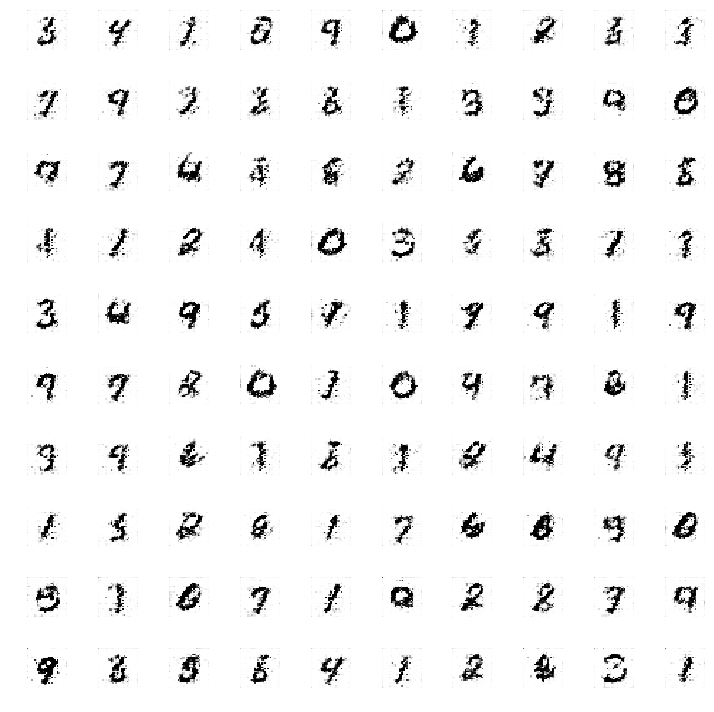

>Saved: infogan_generated_plot_0030.png and infogan_generator_model_0030.h5
>31, 1/937, d1=0.735, d2=0.823 g=0.851
>31, 2/937, d1=0.682, d2=0.869 g=0.894
>31, 3/937, d1=0.716, d2=0.896 g=0.872
>31, 4/937, d1=0.685, d2=0.837 g=0.845
>31, 5/937, d1=0.711, d2=0.897 g=0.871
>31, 6/937, d1=0.702, d2=0.912 g=0.850
>31, 7/937, d1=0.648, d2=0.863 g=0.859
>31, 8/937, d1=0.703, d2=0.905 g=0.902
>31, 9/937, d1=0.704, d2=0.900 g=0.888
>31, 10/937, d1=0.727, d2=0.911 g=0.892
>31, 11/937, d1=0.737, d2=0.858 g=0.875
>31, 12/937, d1=0.669, d2=0.907 g=0.862
>31, 13/937, d1=0.701, d2=0.896 g=0.922
>31, 14/937, d1=0.725, d2=0.876 g=0.918
>31, 15/937, d1=0.734, d2=0.806 g=0.871
>31, 16/937, d1=0.683, d2=0.872 g=0.845
>31, 17/937, d1=0.712, d2=0.912 g=0.898
>31, 18/937, d1=0.687, d2=0.829 g=0.868
>31, 19/937, d1=0.682, d2=0.930 g=0.889
>31, 20/937, d1=0.701, d2=0.862 g=0.913
>31, 21/937, d1=0.688, d2=0.940 g=0.940
>31, 22/937, d1=0.788, d2=0.814 g=0.871
>31, 23/937, d1=0.692, d2=0.927 g=0.900
>31, 24/937, 

>31, 202/937, d1=0.758, d2=0.894 g=0.875
>31, 203/937, d1=0.711, d2=0.862 g=0.889
>31, 204/937, d1=0.749, d2=0.849 g=0.888
>31, 205/937, d1=0.737, d2=0.921 g=0.882
>31, 206/937, d1=0.746, d2=0.883 g=0.859
>31, 207/937, d1=0.716, d2=0.870 g=0.898
>31, 208/937, d1=0.736, d2=0.861 g=0.869
>31, 209/937, d1=0.740, d2=0.903 g=0.883
>31, 210/937, d1=0.745, d2=0.896 g=0.882
>31, 211/937, d1=0.732, d2=0.891 g=0.867
>31, 212/937, d1=0.746, d2=0.891 g=0.841
>31, 213/937, d1=0.709, d2=0.901 g=0.871
>31, 214/937, d1=0.738, d2=0.895 g=0.885
>31, 215/937, d1=0.723, d2=0.895 g=0.871
>31, 216/937, d1=0.722, d2=0.882 g=0.890
>31, 217/937, d1=0.736, d2=0.864 g=0.880
>31, 218/937, d1=0.713, d2=0.885 g=0.866
>31, 219/937, d1=0.693, d2=0.906 g=0.868
>31, 220/937, d1=0.717, d2=0.871 g=0.884
>31, 221/937, d1=0.755, d2=0.899 g=0.879
>31, 222/937, d1=0.746, d2=0.886 g=0.850
>31, 223/937, d1=0.702, d2=0.912 g=0.898
>31, 224/937, d1=0.744, d2=0.844 g=0.892
>31, 225/937, d1=0.722, d2=0.872 g=0.871
>31, 226/937, d1

>31, 408/937, d1=0.776, d2=0.908 g=0.856
>31, 409/937, d1=0.718, d2=0.896 g=0.875
>31, 410/937, d1=0.768, d2=0.873 g=0.872
>31, 411/937, d1=0.772, d2=0.863 g=0.885
>31, 412/937, d1=0.737, d2=0.865 g=0.879
>31, 413/937, d1=0.733, d2=0.903 g=0.873
>31, 414/937, d1=0.731, d2=0.874 g=0.887
>31, 415/937, d1=0.758, d2=0.890 g=0.838
>31, 416/937, d1=0.710, d2=0.916 g=0.854
>31, 417/937, d1=0.723, d2=0.906 g=0.884
>31, 418/937, d1=0.739, d2=0.869 g=0.875
>31, 419/937, d1=0.742, d2=0.892 g=0.865
>31, 420/937, d1=0.729, d2=0.876 g=0.857
>31, 421/937, d1=0.751, d2=0.869 g=0.861
>31, 422/937, d1=0.742, d2=0.882 g=0.860
>31, 423/937, d1=0.727, d2=0.895 g=0.881
>31, 424/937, d1=0.730, d2=0.859 g=0.874
>31, 425/937, d1=0.755, d2=0.897 g=0.856
>31, 426/937, d1=0.747, d2=0.861 g=0.868
>31, 427/937, d1=0.767, d2=0.868 g=0.842
>31, 428/937, d1=0.731, d2=0.911 g=0.852
>31, 429/937, d1=0.710, d2=0.895 g=0.874
>31, 430/937, d1=0.760, d2=0.848 g=0.850
>31, 431/937, d1=0.744, d2=0.887 g=0.842
>31, 432/937, d1

>31, 614/937, d1=0.748, d2=0.857 g=0.913
>31, 615/937, d1=0.770, d2=0.818 g=0.857
>31, 616/937, d1=0.718, d2=0.884 g=0.860
>31, 617/937, d1=0.774, d2=0.870 g=0.853
>31, 618/937, d1=0.707, d2=0.872 g=0.848
>31, 619/937, d1=0.732, d2=0.851 g=0.874
>31, 620/937, d1=0.717, d2=0.913 g=0.887
>31, 621/937, d1=0.757, d2=0.884 g=0.874
>31, 622/937, d1=0.782, d2=0.830 g=0.828
>31, 623/937, d1=0.756, d2=0.936 g=0.819
>31, 624/937, d1=0.722, d2=0.917 g=0.830
>31, 625/937, d1=0.710, d2=0.943 g=0.861
>31, 626/937, d1=0.779, d2=0.870 g=0.875
>31, 627/937, d1=0.782, d2=0.860 g=0.832
>31, 628/937, d1=0.754, d2=0.921 g=0.843
>31, 629/937, d1=0.714, d2=0.880 g=0.890
>31, 630/937, d1=0.758, d2=0.862 g=0.869
>31, 631/937, d1=0.719, d2=0.826 g=0.856
>31, 632/937, d1=0.752, d2=0.863 g=0.845
>31, 633/937, d1=0.728, d2=0.884 g=0.838
>31, 634/937, d1=0.740, d2=0.897 g=0.830
>31, 635/937, d1=0.772, d2=0.935 g=0.818
>31, 636/937, d1=0.692, d2=0.919 g=0.866
>31, 637/937, d1=0.750, d2=0.825 g=0.881
>31, 638/937, d1

>31, 817/937, d1=0.734, d2=0.922 g=0.874
>31, 818/937, d1=0.738, d2=0.830 g=0.889
>31, 819/937, d1=0.781, d2=0.812 g=0.889
>31, 820/937, d1=0.730, d2=0.871 g=0.851
>31, 821/937, d1=0.740, d2=0.859 g=0.876
>31, 822/937, d1=0.782, d2=0.867 g=0.888
>31, 823/937, d1=0.752, d2=0.865 g=0.869
>31, 824/937, d1=0.718, d2=0.852 g=0.869
>31, 825/937, d1=0.738, d2=0.856 g=0.886
>31, 826/937, d1=0.765, d2=0.862 g=0.863
>31, 827/937, d1=0.732, d2=0.856 g=0.846
>31, 828/937, d1=0.748, d2=0.877 g=0.862
>31, 829/937, d1=0.692, d2=0.882 g=0.885
>31, 830/937, d1=0.724, d2=0.802 g=0.872
>31, 831/937, d1=0.735, d2=0.863 g=0.873
>31, 832/937, d1=0.740, d2=0.833 g=0.849
>31, 833/937, d1=0.706, d2=0.877 g=0.874
>31, 834/937, d1=0.731, d2=0.791 g=0.845
>31, 835/937, d1=0.699, d2=0.918 g=0.852
>31, 836/937, d1=0.689, d2=0.840 g=0.875
>31, 837/937, d1=0.776, d2=0.886 g=0.880
>31, 838/937, d1=0.783, d2=0.874 g=0.863
>31, 839/937, d1=0.747, d2=0.858 g=0.829
>31, 840/937, d1=0.750, d2=0.891 g=0.801
>31, 841/937, d1

>32, 86/937, d1=0.748, d2=0.848 g=0.853
>32, 87/937, d1=0.703, d2=0.836 g=0.874
>32, 88/937, d1=0.696, d2=0.850 g=0.853
>32, 89/937, d1=0.772, d2=0.865 g=0.856
>32, 90/937, d1=0.721, d2=0.924 g=0.847
>32, 91/937, d1=0.725, d2=0.856 g=0.827
>32, 92/937, d1=0.729, d2=0.929 g=0.828
>32, 93/937, d1=0.693, d2=0.909 g=0.880
>32, 94/937, d1=0.779, d2=0.849 g=0.875
>32, 95/937, d1=0.730, d2=0.876 g=0.865
>32, 96/937, d1=0.736, d2=0.870 g=0.856
>32, 97/937, d1=0.734, d2=0.924 g=0.866
>32, 98/937, d1=0.797, d2=0.866 g=0.880
>32, 99/937, d1=0.805, d2=0.891 g=0.856
>32, 100/937, d1=0.793, d2=0.868 g=0.848
>32, 101/937, d1=0.761, d2=0.879 g=0.834
>32, 102/937, d1=0.759, d2=0.894 g=0.851
>32, 103/937, d1=0.714, d2=0.854 g=0.861
>32, 104/937, d1=0.781, d2=0.870 g=0.849
>32, 105/937, d1=0.732, d2=0.816 g=0.837
>32, 106/937, d1=0.737, d2=0.922 g=0.855
>32, 107/937, d1=0.748, d2=0.862 g=0.861
>32, 108/937, d1=0.769, d2=0.829 g=0.852
>32, 109/937, d1=0.777, d2=0.882 g=0.843
>32, 110/937, d1=0.742, d2=0.8

>32, 289/937, d1=0.732, d2=0.859 g=0.859
>32, 290/937, d1=0.749, d2=0.864 g=0.852
>32, 291/937, d1=0.752, d2=0.871 g=0.841
>32, 292/937, d1=0.736, d2=0.870 g=0.828
>32, 293/937, d1=0.706, d2=0.876 g=0.857
>32, 294/937, d1=0.736, d2=0.857 g=0.856
>32, 295/937, d1=0.736, d2=0.880 g=0.853
>32, 296/937, d1=0.770, d2=0.856 g=0.836
>32, 297/937, d1=0.749, d2=0.881 g=0.841
>32, 298/937, d1=0.731, d2=0.871 g=0.839
>32, 299/937, d1=0.729, d2=0.913 g=0.858
>32, 300/937, d1=0.749, d2=0.844 g=0.850
>32, 301/937, d1=0.775, d2=0.868 g=0.826
>32, 302/937, d1=0.743, d2=0.857 g=0.805
>32, 303/937, d1=0.735, d2=0.890 g=0.830
>32, 304/937, d1=0.734, d2=0.813 g=0.842
>32, 305/937, d1=0.790, d2=0.896 g=0.831
>32, 306/937, d1=0.778, d2=0.870 g=0.846
>32, 307/937, d1=0.740, d2=0.867 g=0.882
>32, 308/937, d1=0.793, d2=0.814 g=0.847
>32, 309/937, d1=0.736, d2=0.872 g=0.835
>32, 310/937, d1=0.739, d2=0.867 g=0.862
>32, 311/937, d1=0.776, d2=0.841 g=0.872
>32, 312/937, d1=0.793, d2=0.839 g=0.834
>32, 313/937, d1

>32, 489/937, d1=0.727, d2=0.865 g=0.858
>32, 490/937, d1=0.761, d2=0.883 g=0.873
>32, 491/937, d1=0.763, d2=0.881 g=0.894
>32, 492/937, d1=0.783, d2=0.840 g=0.882
>32, 493/937, d1=0.772, d2=0.849 g=0.857
>32, 494/937, d1=0.758, d2=0.889 g=0.854
>32, 495/937, d1=0.778, d2=0.873 g=0.841
>32, 496/937, d1=0.763, d2=0.822 g=0.851
>32, 497/937, d1=0.733, d2=0.840 g=0.864
>32, 498/937, d1=0.790, d2=0.855 g=0.870
>32, 499/937, d1=0.744, d2=0.894 g=0.882
>32, 500/937, d1=0.769, d2=0.844 g=0.864
>32, 501/937, d1=0.779, d2=0.831 g=0.848
>32, 502/937, d1=0.755, d2=0.914 g=0.861
>32, 503/937, d1=0.754, d2=0.858 g=0.877
>32, 504/937, d1=0.769, d2=0.833 g=0.850
>32, 505/937, d1=0.730, d2=0.866 g=0.831
>32, 506/937, d1=0.748, d2=0.901 g=0.846
>32, 507/937, d1=0.754, d2=0.896 g=0.850
>32, 508/937, d1=0.761, d2=0.847 g=0.856
>32, 509/937, d1=0.771, d2=0.873 g=0.845
>32, 510/937, d1=0.746, d2=0.843 g=0.839
>32, 511/937, d1=0.720, d2=0.875 g=0.857
>32, 512/937, d1=0.758, d2=0.871 g=0.852
>32, 513/937, d1

>32, 690/937, d1=0.773, d2=0.901 g=0.833
>32, 691/937, d1=0.753, d2=0.840 g=0.852
>32, 692/937, d1=0.802, d2=0.840 g=0.841
>32, 693/937, d1=0.766, d2=0.827 g=0.835
>32, 694/937, d1=0.754, d2=0.844 g=0.809
>32, 695/937, d1=0.767, d2=0.876 g=0.819
>32, 696/937, d1=0.728, d2=0.873 g=0.835
>32, 697/937, d1=0.761, d2=0.853 g=0.855
>32, 698/937, d1=0.790, d2=0.816 g=0.845
>32, 699/937, d1=0.741, d2=0.900 g=0.849
>32, 700/937, d1=0.790, d2=0.872 g=0.863
>32, 701/937, d1=0.804, d2=0.842 g=0.848
>32, 702/937, d1=0.733, d2=0.836 g=0.845
>32, 703/937, d1=0.725, d2=0.850 g=0.844
>32, 704/937, d1=0.753, d2=0.844 g=0.859
>32, 705/937, d1=0.791, d2=0.866 g=0.848
>32, 706/937, d1=0.783, d2=0.855 g=0.841
>32, 707/937, d1=0.774, d2=0.854 g=0.832
>32, 708/937, d1=0.733, d2=0.861 g=0.857
>32, 709/937, d1=0.773, d2=0.840 g=0.844
>32, 710/937, d1=0.753, d2=0.870 g=0.862
>32, 711/937, d1=0.767, d2=0.854 g=0.871
>32, 712/937, d1=0.779, d2=0.830 g=0.862
>32, 713/937, d1=0.800, d2=0.847 g=0.843
>32, 714/937, d1

>32, 891/937, d1=0.744, d2=0.886 g=0.862
>32, 892/937, d1=0.752, d2=0.827 g=0.875
>32, 893/937, d1=0.766, d2=0.834 g=0.858
>32, 894/937, d1=0.772, d2=0.807 g=0.839
>32, 895/937, d1=0.717, d2=0.873 g=0.874
>32, 896/937, d1=0.761, d2=0.812 g=0.878
>32, 897/937, d1=0.793, d2=0.858 g=0.858
>32, 898/937, d1=0.751, d2=0.880 g=0.870
>32, 899/937, d1=0.760, d2=0.859 g=0.885
>32, 900/937, d1=0.839, d2=0.823 g=0.849
>32, 901/937, d1=0.794, d2=0.844 g=0.833
>32, 902/937, d1=0.747, d2=0.846 g=0.841
>32, 903/937, d1=0.789, d2=0.886 g=0.829
>32, 904/937, d1=0.762, d2=0.875 g=0.857
>32, 905/937, d1=0.750, d2=0.863 g=0.870
>32, 906/937, d1=0.786, d2=0.819 g=0.854
>32, 907/937, d1=0.742, d2=0.840 g=0.854
>32, 908/937, d1=0.782, d2=0.874 g=0.826
>32, 909/937, d1=0.782, d2=0.855 g=0.847
>32, 910/937, d1=0.750, d2=0.895 g=0.876
>32, 911/937, d1=0.774, d2=0.833 g=0.874
>32, 912/937, d1=0.793, d2=0.876 g=0.856
>32, 913/937, d1=0.784, d2=0.848 g=0.842
>32, 914/937, d1=0.734, d2=0.877 g=0.876
>32, 915/937, d1

>33, 162/937, d1=0.785, d2=0.864 g=0.861
>33, 163/937, d1=0.766, d2=0.843 g=0.859
>33, 164/937, d1=0.775, d2=0.843 g=0.850
>33, 165/937, d1=0.782, d2=0.833 g=0.833
>33, 166/937, d1=0.758, d2=0.877 g=0.833
>33, 167/937, d1=0.781, d2=0.864 g=0.842
>33, 168/937, d1=0.757, d2=0.851 g=0.865
>33, 169/937, d1=0.774, d2=0.873 g=0.886
>33, 170/937, d1=0.797, d2=0.856 g=0.881
>33, 171/937, d1=0.820, d2=0.797 g=0.842
>33, 172/937, d1=0.760, d2=0.866 g=0.831
>33, 173/937, d1=0.786, d2=0.880 g=0.847
>33, 174/937, d1=0.787, d2=0.835 g=0.841
>33, 175/937, d1=0.766, d2=0.899 g=0.883
>33, 176/937, d1=0.812, d2=0.811 g=0.890
>33, 177/937, d1=0.799, d2=0.879 g=0.865
>33, 178/937, d1=0.799, d2=0.861 g=0.852
>33, 179/937, d1=0.797, d2=0.870 g=0.855
>33, 180/937, d1=0.788, d2=0.862 g=0.836
>33, 181/937, d1=0.774, d2=0.846 g=0.848
>33, 182/937, d1=0.781, d2=0.829 g=0.871
>33, 183/937, d1=0.755, d2=0.823 g=0.873
>33, 184/937, d1=0.793, d2=0.857 g=0.865
>33, 185/937, d1=0.782, d2=0.822 g=0.848
>33, 186/937, d1

>33, 367/937, d1=0.803, d2=0.842 g=0.862
>33, 368/937, d1=0.798, d2=0.834 g=0.868
>33, 369/937, d1=0.786, d2=0.832 g=0.864
>33, 370/937, d1=0.766, d2=0.822 g=0.863
>33, 371/937, d1=0.775, d2=0.838 g=0.864
>33, 372/937, d1=0.792, d2=0.843 g=0.854
>33, 373/937, d1=0.799, d2=0.852 g=0.848
>33, 374/937, d1=0.779, d2=0.855 g=0.858
>33, 375/937, d1=0.767, d2=0.841 g=0.854
>33, 376/937, d1=0.776, d2=0.851 g=0.863
>33, 377/937, d1=0.769, d2=0.846 g=0.872
>33, 378/937, d1=0.775, d2=0.808 g=0.883
>33, 379/937, d1=0.779, d2=0.838 g=0.873
>33, 380/937, d1=0.761, d2=0.844 g=0.887
>33, 381/937, d1=0.780, d2=0.817 g=0.878
>33, 382/937, d1=0.775, d2=0.856 g=0.868
>33, 383/937, d1=0.794, d2=0.855 g=0.850
>33, 384/937, d1=0.784, d2=0.839 g=0.842
>33, 385/937, d1=0.772, d2=0.866 g=0.839
>33, 386/937, d1=0.779, d2=0.874 g=0.855
>33, 387/937, d1=0.762, d2=0.854 g=0.865
>33, 388/937, d1=0.782, d2=0.840 g=0.869
>33, 389/937, d1=0.785, d2=0.829 g=0.874
>33, 390/937, d1=0.779, d2=0.862 g=0.872
>33, 391/937, d1

>33, 568/937, d1=0.768, d2=0.871 g=0.907
>33, 569/937, d1=0.818, d2=0.780 g=0.881
>33, 570/937, d1=0.794, d2=0.836 g=0.858
>33, 571/937, d1=0.770, d2=0.859 g=0.863
>33, 572/937, d1=0.783, d2=0.841 g=0.867
>33, 573/937, d1=0.771, d2=0.810 g=0.872
>33, 574/937, d1=0.771, d2=0.806 g=0.870
>33, 575/937, d1=0.790, d2=0.875 g=0.872
>33, 576/937, d1=0.784, d2=0.853 g=0.886
>33, 577/937, d1=0.844, d2=0.822 g=0.871
>33, 578/937, d1=0.798, d2=0.844 g=0.866
>33, 579/937, d1=0.821, d2=0.844 g=0.845
>33, 580/937, d1=0.782, d2=0.862 g=0.859
>33, 581/937, d1=0.802, d2=0.859 g=0.847
>33, 582/937, d1=0.771, d2=0.827 g=0.862
>33, 583/937, d1=0.783, d2=0.821 g=0.849
>33, 584/937, d1=0.785, d2=0.860 g=0.853
>33, 585/937, d1=0.797, d2=0.845 g=0.861
>33, 586/937, d1=0.801, d2=0.846 g=0.853
>33, 587/937, d1=0.810, d2=0.874 g=0.856
>33, 588/937, d1=0.779, d2=0.856 g=0.875
>33, 589/937, d1=0.811, d2=0.816 g=0.863
>33, 590/937, d1=0.782, d2=0.839 g=0.858
>33, 591/937, d1=0.780, d2=0.841 g=0.860
>33, 592/937, d1

>33, 770/937, d1=0.784, d2=0.862 g=0.861
>33, 771/937, d1=0.784, d2=0.828 g=0.867
>33, 772/937, d1=0.809, d2=0.848 g=0.852
>33, 773/937, d1=0.805, d2=0.846 g=0.868
>33, 774/937, d1=0.789, d2=0.842 g=0.835
>33, 775/937, d1=0.778, d2=0.870 g=0.859
>33, 776/937, d1=0.786, d2=0.847 g=0.879
>33, 777/937, d1=0.802, d2=0.809 g=0.863
>33, 778/937, d1=0.790, d2=0.844 g=0.864
>33, 779/937, d1=0.808, d2=0.818 g=0.841
>33, 780/937, d1=0.815, d2=0.871 g=0.839
>33, 781/937, d1=0.794, d2=0.856 g=0.856
>33, 782/937, d1=0.790, d2=0.838 g=0.861
>33, 783/937, d1=0.828, d2=0.833 g=0.849
>33, 784/937, d1=0.782, d2=0.845 g=0.842
>33, 785/937, d1=0.773, d2=0.841 g=0.861
>33, 786/937, d1=0.797, d2=0.842 g=0.858
>33, 787/937, d1=0.781, d2=0.813 g=0.864
>33, 788/937, d1=0.789, d2=0.820 g=0.873
>33, 789/937, d1=0.788, d2=0.829 g=0.876
>33, 790/937, d1=0.823, d2=0.833 g=0.846
>33, 791/937, d1=0.759, d2=0.888 g=0.841
>33, 792/937, d1=0.761, d2=0.840 g=0.873
>33, 793/937, d1=0.799, d2=0.838 g=0.869
>33, 794/937, d1

>34, 39/937, d1=0.797, d2=0.834 g=0.859
>34, 40/937, d1=0.811, d2=0.832 g=0.857
>34, 41/937, d1=0.797, d2=0.850 g=0.836
>34, 42/937, d1=0.769, d2=0.870 g=0.852
>34, 43/937, d1=0.771, d2=0.833 g=0.872
>34, 44/937, d1=0.797, d2=0.828 g=0.867
>34, 45/937, d1=0.795, d2=0.845 g=0.854
>34, 46/937, d1=0.776, d2=0.841 g=0.851
>34, 47/937, d1=0.753, d2=0.854 g=0.877
>34, 48/937, d1=0.785, d2=0.838 g=0.860
>34, 49/937, d1=0.780, d2=0.829 g=0.858
>34, 50/937, d1=0.784, d2=0.864 g=0.836
>34, 51/937, d1=0.767, d2=0.853 g=0.858
>34, 52/937, d1=0.805, d2=0.860 g=0.855
>34, 53/937, d1=0.782, d2=0.855 g=0.871
>34, 54/937, d1=0.786, d2=0.845 g=0.877
>34, 55/937, d1=0.782, d2=0.808 g=0.871
>34, 56/937, d1=0.798, d2=0.842 g=0.883
>34, 57/937, d1=0.799, d2=0.838 g=0.867
>34, 58/937, d1=0.763, d2=0.825 g=0.868
>34, 59/937, d1=0.818, d2=0.850 g=0.837
>34, 60/937, d1=0.779, d2=0.859 g=0.847
>34, 61/937, d1=0.767, d2=0.839 g=0.875
>34, 62/937, d1=0.778, d2=0.813 g=0.866
>34, 63/937, d1=0.843, d2=0.885 g=0.867


>34, 241/937, d1=0.818, d2=0.841 g=0.847
>34, 242/937, d1=0.771, d2=0.854 g=0.863
>34, 243/937, d1=0.799, d2=0.864 g=0.861
>34, 244/937, d1=0.792, d2=0.834 g=0.865
>34, 245/937, d1=0.792, d2=0.833 g=0.845
>34, 246/937, d1=0.796, d2=0.844 g=0.849
>34, 247/937, d1=0.798, d2=0.840 g=0.858
>34, 248/937, d1=0.798, d2=0.839 g=0.857
>34, 249/937, d1=0.779, d2=0.836 g=0.858
>34, 250/937, d1=0.798, d2=0.856 g=0.849
>34, 251/937, d1=0.784, d2=0.848 g=0.838
>34, 252/937, d1=0.774, d2=0.850 g=0.849
>34, 253/937, d1=0.783, d2=0.813 g=0.859
>34, 254/937, d1=0.792, d2=0.823 g=0.858
>34, 255/937, d1=0.765, d2=0.843 g=0.875
>34, 256/937, d1=0.804, d2=0.840 g=0.847
>34, 257/937, d1=0.789, d2=0.851 g=0.843
>34, 258/937, d1=0.765, d2=0.855 g=0.861
>34, 259/937, d1=0.791, d2=0.833 g=0.858
>34, 260/937, d1=0.790, d2=0.854 g=0.857
>34, 261/937, d1=0.783, d2=0.855 g=0.859
>34, 262/937, d1=0.804, d2=0.836 g=0.843
>34, 263/937, d1=0.780, d2=0.859 g=0.844
>34, 264/937, d1=0.806, d2=0.848 g=0.845
>34, 265/937, d1

>34, 444/937, d1=0.787, d2=0.867 g=0.842
>34, 445/937, d1=0.805, d2=0.830 g=0.840
>34, 446/937, d1=0.769, d2=0.902 g=0.871
>34, 447/937, d1=0.812, d2=0.826 g=0.866
>34, 448/937, d1=0.799, d2=0.806 g=0.857
>34, 449/937, d1=0.813, d2=0.851 g=0.835
>34, 450/937, d1=0.780, d2=0.851 g=0.837
>34, 451/937, d1=0.783, d2=0.858 g=0.852
>34, 452/937, d1=0.836, d2=0.864 g=0.847
>34, 453/937, d1=0.804, d2=0.840 g=0.856
>34, 454/937, d1=0.798, d2=0.841 g=0.848
>34, 455/937, d1=0.825, d2=0.867 g=0.854
>34, 456/937, d1=0.819, d2=0.837 g=0.858
>34, 457/937, d1=0.806, d2=0.826 g=0.852
>34, 458/937, d1=0.819, d2=0.866 g=0.857
>34, 459/937, d1=0.822, d2=0.819 g=0.861
>34, 460/937, d1=0.805, d2=0.839 g=0.835
>34, 461/937, d1=0.817, d2=0.838 g=0.834
>34, 462/937, d1=0.795, d2=0.834 g=0.841
>34, 463/937, d1=0.778, d2=0.850 g=0.854
>34, 464/937, d1=0.811, d2=0.841 g=0.858
>34, 465/937, d1=0.832, d2=0.873 g=0.851
>34, 466/937, d1=0.832, d2=0.842 g=0.847
>34, 467/937, d1=0.793, d2=0.837 g=0.846
>34, 468/937, d1

>34, 650/937, d1=0.829, d2=0.848 g=0.850
>34, 651/937, d1=0.794, d2=0.832 g=0.837
>34, 652/937, d1=0.801, d2=0.879 g=0.843
>34, 653/937, d1=0.790, d2=0.845 g=0.855
>34, 654/937, d1=0.802, d2=0.837 g=0.852
>34, 655/937, d1=0.807, d2=0.835 g=0.844
>34, 656/937, d1=0.793, d2=0.827 g=0.820
>34, 657/937, d1=0.766, d2=0.846 g=0.841
>34, 658/937, d1=0.783, d2=0.879 g=0.853
>34, 659/937, d1=0.813, d2=0.861 g=0.866
>34, 660/937, d1=0.837, d2=0.825 g=0.865
>34, 661/937, d1=0.821, d2=0.861 g=0.846
>34, 662/937, d1=0.817, d2=0.874 g=0.856
>34, 663/937, d1=0.806, d2=0.815 g=0.853
>34, 664/937, d1=0.807, d2=0.858 g=0.842
>34, 665/937, d1=0.818, d2=0.845 g=0.846
>34, 666/937, d1=0.822, d2=0.837 g=0.841
>34, 667/937, d1=0.794, d2=0.845 g=0.848
>34, 668/937, d1=0.812, d2=0.844 g=0.848
>34, 669/937, d1=0.790, d2=0.851 g=0.855
>34, 670/937, d1=0.804, d2=0.831 g=0.856
>34, 671/937, d1=0.823, d2=0.864 g=0.839
>34, 672/937, d1=0.814, d2=0.856 g=0.837
>34, 673/937, d1=0.827, d2=0.832 g=0.846
>34, 674/937, d1

>34, 856/937, d1=0.788, d2=0.863 g=0.850
>34, 857/937, d1=0.800, d2=0.837 g=0.858
>34, 858/937, d1=0.816, d2=0.828 g=0.850
>34, 859/937, d1=0.809, d2=0.886 g=0.856
>34, 860/937, d1=0.841, d2=0.835 g=0.847
>34, 861/937, d1=0.822, d2=0.843 g=0.841
>34, 862/937, d1=0.846, d2=0.880 g=0.846
>34, 863/937, d1=0.797, d2=0.830 g=0.851
>34, 864/937, d1=0.838, d2=0.839 g=0.843
>34, 865/937, d1=0.786, d2=0.848 g=0.827
>34, 866/937, d1=0.789, d2=0.819 g=0.819
>34, 867/937, d1=0.801, d2=0.864 g=0.837
>34, 868/937, d1=0.807, d2=0.869 g=0.855
>34, 869/937, d1=0.814, d2=0.845 g=0.855
>34, 870/937, d1=0.818, d2=0.879 g=0.875
>34, 871/937, d1=0.841, d2=0.833 g=0.874
>34, 872/937, d1=0.824, d2=0.822 g=0.853
>34, 873/937, d1=0.825, d2=0.855 g=0.841
>34, 874/937, d1=0.795, d2=0.855 g=0.867
>34, 875/937, d1=0.831, d2=0.859 g=0.884
>34, 876/937, d1=0.847, d2=0.809 g=0.882
>34, 877/937, d1=0.821, d2=0.828 g=0.867
>34, 878/937, d1=0.800, d2=0.824 g=0.861
>34, 879/937, d1=0.810, d2=0.852 g=0.857
>34, 880/937, d1

>35, 121/937, d1=0.811, d2=0.846 g=0.849
>35, 122/937, d1=0.805, d2=0.837 g=0.862
>35, 123/937, d1=0.807, d2=0.825 g=0.866
>35, 124/937, d1=0.816, d2=0.839 g=0.853
>35, 125/937, d1=0.806, d2=0.842 g=0.843
>35, 126/937, d1=0.786, d2=0.846 g=0.854
>35, 127/937, d1=0.807, d2=0.855 g=0.856
>35, 128/937, d1=0.809, d2=0.827 g=0.851
>35, 129/937, d1=0.792, d2=0.833 g=0.854
>35, 130/937, d1=0.810, d2=0.865 g=0.859
>35, 131/937, d1=0.807, d2=0.827 g=0.864
>35, 132/937, d1=0.831, d2=0.851 g=0.836
>35, 133/937, d1=0.793, d2=0.847 g=0.844
>35, 134/937, d1=0.798, d2=0.855 g=0.867
>35, 135/937, d1=0.808, d2=0.820 g=0.869
>35, 136/937, d1=0.829, d2=0.839 g=0.861
>35, 137/937, d1=0.812, d2=0.853 g=0.851
>35, 138/937, d1=0.813, d2=0.841 g=0.842
>35, 139/937, d1=0.797, d2=0.832 g=0.845
>35, 140/937, d1=0.808, d2=0.856 g=0.845
>35, 141/937, d1=0.798, d2=0.847 g=0.844
>35, 142/937, d1=0.807, d2=0.834 g=0.840
>35, 143/937, d1=0.799, d2=0.862 g=0.846
>35, 144/937, d1=0.790, d2=0.831 g=0.849
>35, 145/937, d1

>35, 326/937, d1=0.811, d2=0.846 g=0.857
>35, 327/937, d1=0.820, d2=0.838 g=0.849
>35, 328/937, d1=0.812, d2=0.843 g=0.850
>35, 329/937, d1=0.805, d2=0.843 g=0.858
>35, 330/937, d1=0.800, d2=0.829 g=0.847
>35, 331/937, d1=0.807, d2=0.848 g=0.834
>35, 332/937, d1=0.786, d2=0.843 g=0.840
>35, 333/937, d1=0.791, d2=0.861 g=0.867
>35, 334/937, d1=0.815, d2=0.817 g=0.855
>35, 335/937, d1=0.807, d2=0.834 g=0.845
>35, 336/937, d1=0.791, d2=0.832 g=0.861
>35, 337/937, d1=0.786, d2=0.841 g=0.863
>35, 338/937, d1=0.823, d2=0.836 g=0.863
>35, 339/937, d1=0.822, d2=0.843 g=0.850
>35, 340/937, d1=0.816, d2=0.861 g=0.855
>35, 341/937, d1=0.807, d2=0.853 g=0.867
>35, 342/937, d1=0.832, d2=0.848 g=0.873
>35, 343/937, d1=0.814, d2=0.819 g=0.863
>35, 344/937, d1=0.819, d2=0.866 g=0.862
>35, 345/937, d1=0.810, d2=0.848 g=0.872
>35, 346/937, d1=0.819, d2=0.844 g=0.867
>35, 347/937, d1=0.818, d2=0.837 g=0.852
>35, 348/937, d1=0.796, d2=0.858 g=0.865
>35, 349/937, d1=0.822, d2=0.867 g=0.879
>35, 350/937, d1

>35, 527/937, d1=0.820, d2=0.831 g=0.841
>35, 528/937, d1=0.813, d2=0.848 g=0.849
>35, 529/937, d1=0.814, d2=0.861 g=0.854
>35, 530/937, d1=0.812, d2=0.843 g=0.847
>35, 531/937, d1=0.807, d2=0.853 g=0.849
>35, 532/937, d1=0.803, d2=0.848 g=0.851
>35, 533/937, d1=0.814, d2=0.845 g=0.854
>35, 534/937, d1=0.812, d2=0.856 g=0.856
>35, 535/937, d1=0.808, d2=0.843 g=0.868
>35, 536/937, d1=0.819, d2=0.822 g=0.865
>35, 537/937, d1=0.791, d2=0.849 g=0.867
>35, 538/937, d1=0.817, d2=0.834 g=0.868
>35, 539/937, d1=0.817, d2=0.836 g=0.862
>35, 540/937, d1=0.812, d2=0.837 g=0.857
>35, 541/937, d1=0.823, d2=0.849 g=0.860
>35, 542/937, d1=0.811, d2=0.838 g=0.863
>35, 543/937, d1=0.807, d2=0.857 g=0.857
>35, 544/937, d1=0.802, d2=0.861 g=0.872
>35, 545/937, d1=0.837, d2=0.845 g=0.868
>35, 546/937, d1=0.832, d2=0.833 g=0.868
>35, 547/937, d1=0.835, d2=0.850 g=0.847
>35, 548/937, d1=0.808, d2=0.864 g=0.862
>35, 549/937, d1=0.806, d2=0.835 g=0.868
>35, 550/937, d1=0.835, d2=0.842 g=0.861
>35, 551/937, d1

>35, 729/937, d1=0.809, d2=0.852 g=0.856
>35, 730/937, d1=0.810, d2=0.839 g=0.856
>35, 731/937, d1=0.804, d2=0.842 g=0.858
>35, 732/937, d1=0.826, d2=0.857 g=0.862
>35, 733/937, d1=0.818, d2=0.828 g=0.858
>35, 734/937, d1=0.817, d2=0.845 g=0.855
>35, 735/937, d1=0.807, d2=0.834 g=0.862
>35, 736/937, d1=0.823, d2=0.846 g=0.856
>35, 737/937, d1=0.812, d2=0.844 g=0.859
>35, 738/937, d1=0.811, d2=0.838 g=0.851
>35, 739/937, d1=0.812, d2=0.849 g=0.858
>35, 740/937, d1=0.833, d2=0.843 g=0.852
>35, 741/937, d1=0.807, d2=0.839 g=0.857
>35, 742/937, d1=0.818, d2=0.845 g=0.850
>35, 743/937, d1=0.824, d2=0.856 g=0.847
>35, 744/937, d1=0.811, d2=0.845 g=0.850
>35, 745/937, d1=0.818, d2=0.836 g=0.859
>35, 746/937, d1=0.810, d2=0.825 g=0.860
>35, 747/937, d1=0.843, d2=0.854 g=0.847
>35, 748/937, d1=0.812, d2=0.848 g=0.854
>35, 749/937, d1=0.806, d2=0.841 g=0.866
>35, 750/937, d1=0.815, d2=0.837 g=0.868
>35, 751/937, d1=0.821, d2=0.828 g=0.851
>35, 752/937, d1=0.813, d2=0.865 g=0.854
>35, 753/937, d1

>35, 930/937, d1=0.818, d2=0.853 g=0.849
>35, 931/937, d1=0.827, d2=0.842 g=0.846
>35, 932/937, d1=0.828, d2=0.846 g=0.843
>35, 933/937, d1=0.811, d2=0.850 g=0.860
>35, 934/937, d1=0.824, d2=0.841 g=0.860
>35, 935/937, d1=0.822, d2=0.829 g=0.849
>35, 936/937, d1=0.803, d2=0.851 g=0.860
>35, 937/937, d1=0.818, d2=0.840 g=0.855


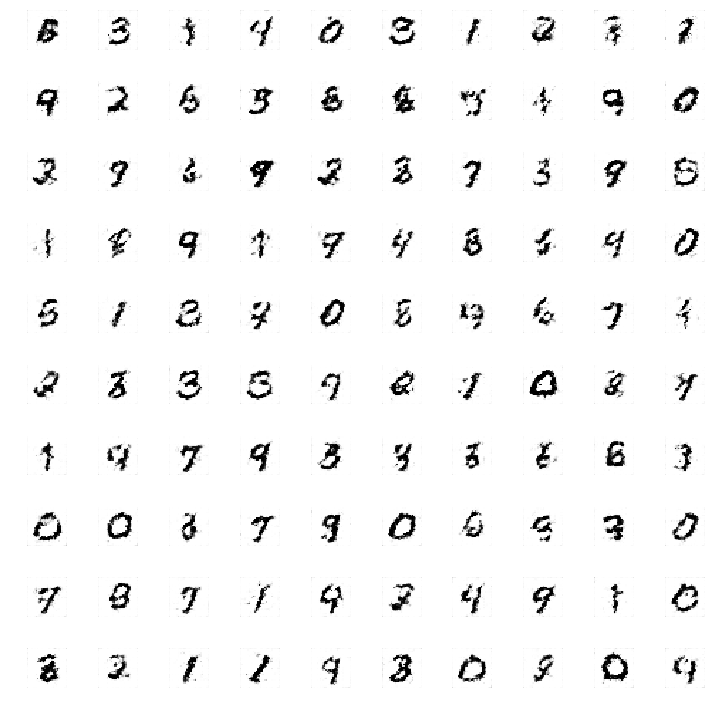

>Saved: infogan_generated_plot_0035.png and infogan_generator_model_0035.h5
>36, 1/937, d1=0.813, d2=0.847 g=0.860
>36, 2/937, d1=0.819, d2=0.854 g=0.855
>36, 3/937, d1=0.807, d2=0.831 g=0.866
>36, 4/937, d1=0.821, d2=0.839 g=0.853
>36, 5/937, d1=0.812, d2=0.854 g=0.851
>36, 6/937, d1=0.805, d2=0.850 g=0.851
>36, 7/937, d1=0.808, d2=0.853 g=0.862
>36, 8/937, d1=0.830, d2=0.847 g=0.858
>36, 9/937, d1=0.823, d2=0.839 g=0.849
>36, 10/937, d1=0.800, d2=0.842 g=0.861
>36, 11/937, d1=0.812, d2=0.836 g=0.854
>36, 12/937, d1=0.820, d2=0.854 g=0.854
>36, 13/937, d1=0.816, d2=0.842 g=0.853
>36, 14/937, d1=0.803, d2=0.838 g=0.858
>36, 15/937, d1=0.816, d2=0.846 g=0.857
>36, 16/937, d1=0.808, d2=0.848 g=0.859
>36, 17/937, d1=0.824, d2=0.847 g=0.857
>36, 18/937, d1=0.803, d2=0.850 g=0.850
>36, 19/937, d1=0.811, d2=0.844 g=0.848
>36, 20/937, d1=0.817, d2=0.864 g=0.854
>36, 21/937, d1=0.819, d2=0.844 g=0.857
>36, 22/937, d1=0.808, d2=0.844 g=0.860
>36, 23/937, d1=0.828, d2=0.849 g=0.852
>36, 24/937, 

>36, 204/937, d1=0.823, d2=0.852 g=0.853
>36, 205/937, d1=0.822, d2=0.839 g=0.847
>36, 206/937, d1=0.810, d2=0.865 g=0.857
>36, 207/937, d1=0.820, d2=0.842 g=0.862
>36, 208/937, d1=0.830, d2=0.841 g=0.857
>36, 209/937, d1=0.832, d2=0.857 g=0.858
>36, 210/937, d1=0.835, d2=0.855 g=0.860
>36, 211/937, d1=0.834, d2=0.858 g=0.860
>36, 212/937, d1=0.818, d2=0.842 g=0.870
>36, 213/937, d1=0.832, d2=0.848 g=0.858
>36, 214/937, d1=0.829, d2=0.851 g=0.854
>36, 215/937, d1=0.819, d2=0.860 g=0.857
>36, 216/937, d1=0.827, d2=0.850 g=0.858
>36, 217/937, d1=0.824, d2=0.846 g=0.857
>36, 218/937, d1=0.833, d2=0.851 g=0.859
>36, 219/937, d1=0.837, d2=0.853 g=0.847
>36, 220/937, d1=0.813, d2=0.860 g=0.858
>36, 221/937, d1=0.824, d2=0.851 g=0.869
>36, 222/937, d1=0.828, d2=0.835 g=0.861
>36, 223/937, d1=0.822, d2=0.856 g=0.861
>36, 224/937, d1=0.818, d2=0.842 g=0.861
>36, 225/937, d1=0.823, d2=0.851 g=0.863
>36, 226/937, d1=0.822, d2=0.847 g=0.862
>36, 227/937, d1=0.817, d2=0.839 g=0.854
>36, 228/937, d1

>36, 411/937, d1=0.833, d2=0.848 g=0.854
>36, 412/937, d1=0.830, d2=0.863 g=0.853
>36, 413/937, d1=0.825, d2=0.851 g=0.856
>36, 414/937, d1=0.825, d2=0.845 g=0.853
>36, 415/937, d1=0.825, d2=0.843 g=0.851
>36, 416/937, d1=0.825, d2=0.859 g=0.854
>36, 417/937, d1=0.824, d2=0.852 g=0.856
>36, 418/937, d1=0.828, d2=0.846 g=0.859
>36, 419/937, d1=0.833, d2=0.843 g=0.853
>36, 420/937, d1=0.807, d2=0.847 g=0.852
>36, 421/937, d1=0.834, d2=0.847 g=0.845
>36, 422/937, d1=0.828, d2=0.860 g=0.846
>36, 423/937, d1=0.823, d2=0.850 g=0.859
>36, 424/937, d1=0.835, d2=0.835 g=0.850
>36, 425/937, d1=0.830, d2=0.859 g=0.847
>36, 426/937, d1=0.826, d2=0.857 g=0.850
>36, 427/937, d1=0.829, d2=0.844 g=0.852
>36, 428/937, d1=0.821, d2=0.859 g=0.854
>36, 429/937, d1=0.831, d2=0.848 g=0.846
>36, 430/937, d1=0.832, d2=0.869 g=0.859
>36, 431/937, d1=0.839, d2=0.838 g=0.858
>36, 432/937, d1=0.833, d2=0.856 g=0.857
>36, 433/937, d1=0.833, d2=0.841 g=0.859
>36, 434/937, d1=0.838, d2=0.855 g=0.855
>36, 435/937, d1

>36, 615/937, d1=0.828, d2=0.848 g=0.870
>36, 616/937, d1=0.826, d2=0.851 g=0.869
>36, 617/937, d1=0.830, d2=0.848 g=0.863
>36, 618/937, d1=0.827, d2=0.859 g=0.866
>36, 619/937, d1=0.828, d2=0.857 g=0.871
>36, 620/937, d1=0.831, d2=0.847 g=0.865
>36, 621/937, d1=0.830, d2=0.856 g=0.861
>36, 622/937, d1=0.826, d2=0.857 g=0.868
>36, 623/937, d1=0.823, d2=0.843 g=0.869
>36, 624/937, d1=0.833, d2=0.842 g=0.863
>36, 625/937, d1=0.821, d2=0.861 g=0.860
>36, 626/937, d1=0.816, d2=0.844 g=0.868
>36, 627/937, d1=0.823, d2=0.844 g=0.868
>36, 628/937, d1=0.821, d2=0.853 g=0.867
>36, 629/937, d1=0.823, d2=0.854 g=0.870
>36, 630/937, d1=0.826, d2=0.845 g=0.867
>36, 631/937, d1=0.821, d2=0.851 g=0.865
>36, 632/937, d1=0.826, d2=0.857 g=0.864
>36, 633/937, d1=0.814, d2=0.862 g=0.873
>36, 634/937, d1=0.816, d2=0.824 g=0.875
>36, 635/937, d1=0.829, d2=0.853 g=0.863
>36, 636/937, d1=0.813, d2=0.866 g=0.875
>36, 637/937, d1=0.826, d2=0.847 g=0.872
>36, 638/937, d1=0.817, d2=0.867 g=0.877
>36, 639/937, d1

>36, 816/937, d1=0.828, d2=0.859 g=0.862
>36, 817/937, d1=0.827, d2=0.846 g=0.859
>36, 818/937, d1=0.825, d2=0.854 g=0.863
>36, 819/937, d1=0.823, d2=0.852 g=0.858
>36, 820/937, d1=0.833, d2=0.859 g=0.858
>36, 821/937, d1=0.828, d2=0.853 g=0.862
>36, 822/937, d1=0.825, d2=0.842 g=0.861
>36, 823/937, d1=0.836, d2=0.859 g=0.862
>36, 824/937, d1=0.840, d2=0.850 g=0.855
>36, 825/937, d1=0.824, d2=0.851 g=0.861
>36, 826/937, d1=0.842, d2=0.862 g=0.858
>36, 827/937, d1=0.824, d2=0.858 g=0.861
>36, 828/937, d1=0.829, d2=0.856 g=0.863
>36, 829/937, d1=0.833, d2=0.850 g=0.862
>36, 830/937, d1=0.831, d2=0.845 g=0.863
>36, 831/937, d1=0.829, d2=0.852 g=0.864
>36, 832/937, d1=0.831, d2=0.850 g=0.857
>36, 833/937, d1=0.828, d2=0.859 g=0.858
>36, 834/937, d1=0.823, d2=0.849 g=0.857
>36, 835/937, d1=0.837, d2=0.858 g=0.852
>36, 836/937, d1=0.829, d2=0.867 g=0.857
>36, 837/937, d1=0.827, d2=0.844 g=0.864
>36, 838/937, d1=0.832, d2=0.852 g=0.861
>36, 839/937, d1=0.831, d2=0.857 g=0.860
>36, 840/937, d1

>37, 86/937, d1=0.826, d2=0.848 g=0.865
>37, 87/937, d1=0.830, d2=0.842 g=0.865
>37, 88/937, d1=0.837, d2=0.849 g=0.862
>37, 89/937, d1=0.837, d2=0.855 g=0.858
>37, 90/937, d1=0.828, d2=0.855 g=0.862
>37, 91/937, d1=0.836, d2=0.844 g=0.860
>37, 92/937, d1=0.830, d2=0.854 g=0.860
>37, 93/937, d1=0.831, d2=0.839 g=0.863
>37, 94/937, d1=0.830, d2=0.847 g=0.860
>37, 95/937, d1=0.827, d2=0.859 g=0.861
>37, 96/937, d1=0.827, d2=0.852 g=0.860
>37, 97/937, d1=0.828, d2=0.860 g=0.864
>37, 98/937, d1=0.835, d2=0.854 g=0.865
>37, 99/937, d1=0.832, d2=0.850 g=0.861
>37, 100/937, d1=0.837, d2=0.847 g=0.858
>37, 101/937, d1=0.825, d2=0.853 g=0.854
>37, 102/937, d1=0.831, d2=0.849 g=0.858
>37, 103/937, d1=0.831, d2=0.855 g=0.861
>37, 104/937, d1=0.825, d2=0.852 g=0.866
>37, 105/937, d1=0.834, d2=0.845 g=0.862
>37, 106/937, d1=0.830, d2=0.854 g=0.862
>37, 107/937, d1=0.836, d2=0.853 g=0.857
>37, 108/937, d1=0.824, d2=0.855 g=0.862
>37, 109/937, d1=0.835, d2=0.842 g=0.860
>37, 110/937, d1=0.837, d2=0.8

>37, 287/937, d1=0.839, d2=0.861 g=0.858
>37, 288/937, d1=0.843, d2=0.854 g=0.865
>37, 289/937, d1=0.855, d2=0.856 g=0.859
>37, 290/937, d1=0.834, d2=0.861 g=0.859
>37, 291/937, d1=0.843, d2=0.864 g=0.867
>37, 292/937, d1=0.840, d2=0.860 g=0.872
>37, 293/937, d1=0.842, d2=0.843 g=0.869
>37, 294/937, d1=0.850, d2=0.862 g=0.859
>37, 295/937, d1=0.842, d2=0.858 g=0.866
>37, 296/937, d1=0.838, d2=0.861 g=0.868
>37, 297/937, d1=0.836, d2=0.853 g=0.870
>37, 298/937, d1=0.851, d2=0.864 g=0.867
>37, 299/937, d1=0.835, d2=0.868 g=0.871
>37, 300/937, d1=0.842, d2=0.866 g=0.880
>37, 301/937, d1=0.846, d2=0.842 g=0.872
>37, 302/937, d1=0.836, d2=0.857 g=0.863
>37, 303/937, d1=0.837, d2=0.855 g=0.860
>37, 304/937, d1=0.840, d2=0.861 g=0.863
>37, 305/937, d1=0.839, d2=0.856 g=0.866
>37, 306/937, d1=0.841, d2=0.866 g=0.872
>37, 307/937, d1=0.845, d2=0.845 g=0.863
>37, 308/937, d1=0.827, d2=0.858 g=0.869
>37, 309/937, d1=0.832, d2=0.867 g=0.872
>37, 310/937, d1=0.845, d2=0.847 g=0.872
>37, 311/937, d1

>37, 494/937, d1=0.856, d2=0.866 g=0.863
>37, 495/937, d1=0.838, d2=0.872 g=0.875
>37, 496/937, d1=0.846, d2=0.855 g=0.878
>37, 497/937, d1=0.849, d2=0.859 g=0.871
>37, 498/937, d1=0.846, d2=0.870 g=0.872
>37, 499/937, d1=0.845, d2=0.851 g=0.867
>37, 500/937, d1=0.845, d2=0.863 g=0.864
>37, 501/937, d1=0.837, d2=0.859 g=0.869
>37, 502/937, d1=0.838, d2=0.857 g=0.867
>37, 503/937, d1=0.840, d2=0.855 g=0.868
>37, 504/937, d1=0.838, d2=0.854 g=0.868
>37, 505/937, d1=0.839, d2=0.865 g=0.871
>37, 506/937, d1=0.838, d2=0.854 g=0.879
>37, 507/937, d1=0.850, d2=0.862 g=0.878
>37, 508/937, d1=0.848, d2=0.855 g=0.865
>37, 509/937, d1=0.836, d2=0.858 g=0.869
>37, 510/937, d1=0.840, d2=0.863 g=0.862
>37, 511/937, d1=0.840, d2=0.856 g=0.868
>37, 512/937, d1=0.841, d2=0.862 g=0.865
>37, 513/937, d1=0.845, d2=0.871 g=0.870
>37, 514/937, d1=0.846, d2=0.863 g=0.872
>37, 515/937, d1=0.844, d2=0.858 g=0.876
>37, 516/937, d1=0.852, d2=0.855 g=0.872
>37, 517/937, d1=0.846, d2=0.862 g=0.868
>37, 518/937, d1

>37, 695/937, d1=0.847, d2=0.850 g=0.875
>37, 696/937, d1=0.846, d2=0.866 g=0.874
>37, 697/937, d1=0.844, d2=0.859 g=0.873
>37, 698/937, d1=0.846, d2=0.856 g=0.872
>37, 699/937, d1=0.841, d2=0.862 g=0.872
>37, 700/937, d1=0.839, d2=0.867 g=0.875
>37, 701/937, d1=0.850, d2=0.857 g=0.870
>37, 702/937, d1=0.844, d2=0.862 g=0.867
>37, 703/937, d1=0.842, d2=0.859 g=0.865
>37, 704/937, d1=0.839, d2=0.865 g=0.867
>37, 705/937, d1=0.845, d2=0.863 g=0.873
>37, 706/937, d1=0.843, d2=0.856 g=0.868
>37, 707/937, d1=0.848, d2=0.860 g=0.868
>37, 708/937, d1=0.837, d2=0.861 g=0.874
>37, 709/937, d1=0.846, d2=0.850 g=0.869
>37, 710/937, d1=0.831, d2=0.861 g=0.872
>37, 711/937, d1=0.848, d2=0.856 g=0.877
>37, 712/937, d1=0.853, d2=0.853 g=0.862
>37, 713/937, d1=0.833, d2=0.859 g=0.870
>37, 714/937, d1=0.835, d2=0.857 g=0.872
>37, 715/937, d1=0.843, d2=0.854 g=0.870
>37, 716/937, d1=0.837, d2=0.858 g=0.871
>37, 717/937, d1=0.840, d2=0.865 g=0.873
>37, 718/937, d1=0.843, d2=0.857 g=0.872
>37, 719/937, d1

>37, 901/937, d1=0.847, d2=0.863 g=0.874
>37, 902/937, d1=0.845, d2=0.863 g=0.875
>37, 903/937, d1=0.849, d2=0.869 g=0.876
>37, 904/937, d1=0.852, d2=0.861 g=0.875
>37, 905/937, d1=0.847, d2=0.862 g=0.870
>37, 906/937, d1=0.839, d2=0.862 g=0.876
>37, 907/937, d1=0.849, d2=0.860 g=0.873
>37, 908/937, d1=0.850, d2=0.860 g=0.868
>37, 909/937, d1=0.836, d2=0.861 g=0.870
>37, 910/937, d1=0.843, d2=0.849 g=0.867
>37, 911/937, d1=0.840, d2=0.870 g=0.872
>37, 912/937, d1=0.858, d2=0.856 g=0.868
>37, 913/937, d1=0.852, d2=0.866 g=0.873
>37, 914/937, d1=0.833, d2=0.854 g=0.874
>37, 915/937, d1=0.843, d2=0.860 g=0.869
>37, 916/937, d1=0.849, d2=0.859 g=0.870
>37, 917/937, d1=0.829, d2=0.874 g=0.881
>37, 918/937, d1=0.865, d2=0.843 g=0.871
>37, 919/937, d1=0.831, d2=0.865 g=0.866
>37, 920/937, d1=0.837, d2=0.867 g=0.875
>37, 921/937, d1=0.859, d2=0.853 g=0.863
>37, 922/937, d1=0.832, d2=0.867 g=0.872
>37, 923/937, d1=0.841, d2=0.862 g=0.871
>37, 924/937, d1=0.854, d2=0.873 g=0.876
>37, 925/937, d1

>38, 169/937, d1=0.858, d2=0.874 g=0.879
>38, 170/937, d1=0.857, d2=0.871 g=0.877
>38, 171/937, d1=0.856, d2=0.866 g=0.877
>38, 172/937, d1=0.857, d2=0.871 g=0.874
>38, 173/937, d1=0.860, d2=0.870 g=0.875
>38, 174/937, d1=0.851, d2=0.863 g=0.878
>38, 175/937, d1=0.859, d2=0.869 g=0.876
>38, 176/937, d1=0.852, d2=0.871 g=0.879
>38, 177/937, d1=0.849, d2=0.868 g=0.879
>38, 178/937, d1=0.857, d2=0.875 g=0.883
>38, 179/937, d1=0.864, d2=0.868 g=0.880
>38, 180/937, d1=0.856, d2=0.867 g=0.881
>38, 181/937, d1=0.855, d2=0.863 g=0.877
>38, 182/937, d1=0.850, d2=0.874 g=0.882
>38, 183/937, d1=0.860, d2=0.874 g=0.880
>38, 184/937, d1=0.851, d2=0.872 g=0.885
>38, 185/937, d1=0.851, d2=0.860 g=0.881
>38, 186/937, d1=0.856, d2=0.878 g=0.879
>38, 187/937, d1=0.851, d2=0.864 g=0.879
>38, 188/937, d1=0.851, d2=0.872 g=0.886
>38, 189/937, d1=0.861, d2=0.869 g=0.881
>38, 190/937, d1=0.854, d2=0.869 g=0.877
>38, 191/937, d1=0.858, d2=0.882 g=0.880
>38, 192/937, d1=0.857, d2=0.875 g=0.883
>38, 193/937, d1

>38, 372/937, d1=0.865, d2=0.880 g=0.893
>38, 373/937, d1=0.875, d2=0.873 g=0.886
>38, 374/937, d1=0.859, d2=0.877 g=0.879
>38, 375/937, d1=0.853, d2=0.887 g=0.890
>38, 376/937, d1=0.867, d2=0.871 g=0.890
>38, 377/937, d1=0.869, d2=0.876 g=0.886
>38, 378/937, d1=0.869, d2=0.883 g=0.885
>38, 379/937, d1=0.856, d2=0.890 g=0.889
>38, 380/937, d1=0.871, d2=0.866 g=0.885
>38, 381/937, d1=0.851, d2=0.887 g=0.890
>38, 382/937, d1=0.867, d2=0.884 g=0.893
>38, 383/937, d1=0.867, d2=0.862 g=0.885
>38, 384/937, d1=0.868, d2=0.878 g=0.877
>38, 385/937, d1=0.850, d2=0.900 g=0.893
>38, 386/937, d1=0.867, d2=0.861 g=0.887
>38, 387/937, d1=0.871, d2=0.885 g=0.884
>38, 388/937, d1=0.862, d2=0.885 g=0.884
>38, 389/937, d1=0.857, d2=0.886 g=0.886
>38, 390/937, d1=0.858, d2=0.889 g=0.898
>38, 391/937, d1=0.871, d2=0.884 g=0.899
>38, 392/937, d1=0.878, d2=0.868 g=0.884
>38, 393/937, d1=0.865, d2=0.889 g=0.887
>38, 394/937, d1=0.863, d2=0.890 g=0.894
>38, 395/937, d1=0.879, d2=0.869 g=0.882
>38, 396/937, d1

>38, 578/937, d1=0.880, d2=0.887 g=0.899
>38, 579/937, d1=0.876, d2=0.893 g=0.897
>38, 580/937, d1=0.870, d2=0.884 g=0.896
>38, 581/937, d1=0.876, d2=0.890 g=0.896
>38, 582/937, d1=0.867, d2=0.892 g=0.898
>38, 583/937, d1=0.865, d2=0.885 g=0.903
>38, 584/937, d1=0.873, d2=0.888 g=0.899
>38, 585/937, d1=0.878, d2=0.890 g=0.897
>38, 586/937, d1=0.872, d2=0.899 g=0.903
>38, 587/937, d1=0.885, d2=0.882 g=0.897
>38, 588/937, d1=0.873, d2=0.886 g=0.889
>38, 589/937, d1=0.863, d2=0.897 g=0.893
>38, 590/937, d1=0.872, d2=0.888 g=0.896
>38, 591/937, d1=0.879, d2=0.891 g=0.894
>38, 592/937, d1=0.876, d2=0.900 g=0.901
>38, 593/937, d1=0.889, d2=0.889 g=0.897
>38, 594/937, d1=0.881, d2=0.886 g=0.893
>38, 595/937, d1=0.877, d2=0.889 g=0.889
>38, 596/937, d1=0.867, d2=0.890 g=0.893
>38, 597/937, d1=0.874, d2=0.884 g=0.894
>38, 598/937, d1=0.877, d2=0.890 g=0.895
>38, 599/937, d1=0.883, d2=0.889 g=0.892
>38, 600/937, d1=0.869, d2=0.883 g=0.894
>38, 601/937, d1=0.871, d2=0.879 g=0.890
>38, 602/937, d1

>38, 782/937, d1=0.874, d2=0.883 g=0.887
>38, 783/937, d1=0.862, d2=0.891 g=0.897
>38, 784/937, d1=0.881, d2=0.896 g=0.900
>38, 785/937, d1=0.867, d2=0.878 g=0.900
>38, 786/937, d1=0.876, d2=0.882 g=0.891
>38, 787/937, d1=0.876, d2=0.893 g=0.893
>38, 788/937, d1=0.873, d2=0.885 g=0.893
>38, 789/937, d1=0.875, d2=0.890 g=0.894
>38, 790/937, d1=0.871, d2=0.891 g=0.900
>38, 791/937, d1=0.878, d2=0.888 g=0.899
>38, 792/937, d1=0.883, d2=0.890 g=0.893
>38, 793/937, d1=0.883, d2=0.893 g=0.891
>38, 794/937, d1=0.875, d2=0.889 g=0.891
>38, 795/937, d1=0.871, d2=0.891 g=0.897
>38, 796/937, d1=0.873, d2=0.887 g=0.901
>38, 797/937, d1=0.882, d2=0.882 g=0.898
>38, 798/937, d1=0.877, d2=0.882 g=0.892
>38, 799/937, d1=0.875, d2=0.891 g=0.893
>38, 800/937, d1=0.876, d2=0.884 g=0.895
>38, 801/937, d1=0.865, d2=0.882 g=0.891
>38, 802/937, d1=0.872, d2=0.888 g=0.896
>38, 803/937, d1=0.878, d2=0.885 g=0.895
>38, 804/937, d1=0.869, d2=0.880 g=0.894
>38, 805/937, d1=0.879, d2=0.880 g=0.890
>38, 806/937, d1

>39, 49/937, d1=0.880, d2=0.887 g=0.906
>39, 50/937, d1=0.885, d2=0.897 g=0.908
>39, 51/937, d1=0.883, d2=0.893 g=0.907
>39, 52/937, d1=0.879, d2=0.887 g=0.902
>39, 53/937, d1=0.874, d2=0.894 g=0.906
>39, 54/937, d1=0.882, d2=0.891 g=0.906
>39, 55/937, d1=0.886, d2=0.889 g=0.904
>39, 56/937, d1=0.880, d2=0.893 g=0.905
>39, 57/937, d1=0.884, d2=0.892 g=0.906
>39, 58/937, d1=0.882, d2=0.890 g=0.904
>39, 59/937, d1=0.878, d2=0.890 g=0.906
>39, 60/937, d1=0.874, d2=0.891 g=0.907
>39, 61/937, d1=0.885, d2=0.889 g=0.905
>39, 62/937, d1=0.881, d2=0.894 g=0.901
>39, 63/937, d1=0.872, d2=0.894 g=0.904
>39, 64/937, d1=0.880, d2=0.898 g=0.910
>39, 65/937, d1=0.885, d2=0.896 g=0.911
>39, 66/937, d1=0.882, d2=0.893 g=0.910
>39, 67/937, d1=0.884, d2=0.895 g=0.904
>39, 68/937, d1=0.878, d2=0.889 g=0.907
>39, 69/937, d1=0.883, d2=0.899 g=0.901
>39, 70/937, d1=0.884, d2=0.901 g=0.906
>39, 71/937, d1=0.879, d2=0.892 g=0.909
>39, 72/937, d1=0.884, d2=0.895 g=0.909
>39, 73/937, d1=0.883, d2=0.897 g=0.907


>39, 252/937, d1=0.894, d2=0.909 g=0.912
>39, 253/937, d1=0.889, d2=0.892 g=0.911
>39, 254/937, d1=0.891, d2=0.905 g=0.907
>39, 255/937, d1=0.890, d2=0.897 g=0.902
>39, 256/937, d1=0.886, d2=0.905 g=0.909
>39, 257/937, d1=0.894, d2=0.900 g=0.912
>39, 258/937, d1=0.890, d2=0.898 g=0.913
>39, 259/937, d1=0.891, d2=0.897 g=0.906
>39, 260/937, d1=0.894, d2=0.912 g=0.905
>39, 261/937, d1=0.889, d2=0.902 g=0.914
>39, 262/937, d1=0.894, d2=0.897 g=0.909
>39, 263/937, d1=0.892, d2=0.910 g=0.911
>39, 264/937, d1=0.888, d2=0.898 g=0.915
>39, 265/937, d1=0.897, d2=0.904 g=0.910
>39, 266/937, d1=0.891, d2=0.894 g=0.907
>39, 267/937, d1=0.894, d2=0.907 g=0.905
>39, 268/937, d1=0.891, d2=0.907 g=0.907
>39, 269/937, d1=0.889, d2=0.900 g=0.910
>39, 270/937, d1=0.897, d2=0.902 g=0.908
>39, 271/937, d1=0.894, d2=0.911 g=0.910
>39, 272/937, d1=0.887, d2=0.899 g=0.913
>39, 273/937, d1=0.892, d2=0.906 g=0.909
>39, 274/937, d1=0.895, d2=0.899 g=0.910
>39, 275/937, d1=0.895, d2=0.897 g=0.902
>39, 276/937, d1

>39, 459/937, d1=0.903, d2=0.916 g=0.916
>39, 460/937, d1=0.894, d2=0.909 g=0.918
>39, 461/937, d1=0.895, d2=0.910 g=0.920
>39, 462/937, d1=0.898, d2=0.912 g=0.923
>39, 463/937, d1=0.902, d2=0.906 g=0.920
>39, 464/937, d1=0.902, d2=0.910 g=0.914
>39, 465/937, d1=0.896, d2=0.909 g=0.915
>39, 466/937, d1=0.890, d2=0.914 g=0.921
>39, 467/937, d1=0.900, d2=0.901 g=0.918
>39, 468/937, d1=0.896, d2=0.908 g=0.918
>39, 469/937, d1=0.898, d2=0.912 g=0.917
>39, 470/937, d1=0.898, d2=0.909 g=0.918
>39, 471/937, d1=0.895, d2=0.908 g=0.913
>39, 472/937, d1=0.894, d2=0.908 g=0.916
>39, 473/937, d1=0.893, d2=0.902 g=0.916
>39, 474/937, d1=0.898, d2=0.908 g=0.916
>39, 475/937, d1=0.895, d2=0.904 g=0.918
>39, 476/937, d1=0.891, d2=0.911 g=0.921
>39, 477/937, d1=0.894, d2=0.898 g=0.919
>39, 478/937, d1=0.893, d2=0.911 g=0.924
>39, 479/937, d1=0.904, d2=0.903 g=0.917
>39, 480/937, d1=0.907, d2=0.903 g=0.909
>39, 481/937, d1=0.896, d2=0.915 g=0.911
>39, 482/937, d1=0.884, d2=0.907 g=0.919
>39, 483/937, d1

>39, 663/937, d1=0.900, d2=0.908 g=0.914
>39, 664/937, d1=0.889, d2=0.908 g=0.918
>39, 665/937, d1=0.905, d2=0.905 g=0.915
>39, 666/937, d1=0.900, d2=0.913 g=0.911
>39, 667/937, d1=0.896, d2=0.907 g=0.914
>39, 668/937, d1=0.891, d2=0.918 g=0.916
>39, 669/937, d1=0.899, d2=0.914 g=0.921
>39, 670/937, d1=0.894, d2=0.907 g=0.922
>39, 671/937, d1=0.910, d2=0.913 g=0.916
>39, 672/937, d1=0.900, d2=0.912 g=0.915
>39, 673/937, d1=0.898, d2=0.915 g=0.919
>39, 674/937, d1=0.898, d2=0.913 g=0.922
>39, 675/937, d1=0.899, d2=0.908 g=0.920
>39, 676/937, d1=0.897, d2=0.910 g=0.919
>39, 677/937, d1=0.896, d2=0.908 g=0.918
>39, 678/937, d1=0.900, d2=0.913 g=0.919
>39, 679/937, d1=0.899, d2=0.907 g=0.921
>39, 680/937, d1=0.908, d2=0.912 g=0.919
>39, 681/937, d1=0.894, d2=0.906 g=0.919
>39, 682/937, d1=0.905, d2=0.910 g=0.916
>39, 683/937, d1=0.896, d2=0.911 g=0.916
>39, 684/937, d1=0.896, d2=0.913 g=0.919
>39, 685/937, d1=0.899, d2=0.915 g=0.926
>39, 686/937, d1=0.912, d2=0.908 g=0.919
>39, 687/937, d1

>39, 865/937, d1=0.906, d2=0.910 g=0.919
>39, 866/937, d1=0.903, d2=0.910 g=0.918
>39, 867/937, d1=0.897, d2=0.914 g=0.920
>39, 868/937, d1=0.904, d2=0.907 g=0.920
>39, 869/937, d1=0.900, d2=0.912 g=0.917
>39, 870/937, d1=0.897, d2=0.904 g=0.919
>39, 871/937, d1=0.897, d2=0.911 g=0.922
>39, 872/937, d1=0.902, d2=0.913 g=0.922
>39, 873/937, d1=0.903, d2=0.910 g=0.921
>39, 874/937, d1=0.901, d2=0.903 g=0.915
>39, 875/937, d1=0.901, d2=0.917 g=0.915
>39, 876/937, d1=0.896, d2=0.916 g=0.924
>39, 877/937, d1=0.903, d2=0.907 g=0.924
>39, 878/937, d1=0.904, d2=0.904 g=0.913
>39, 879/937, d1=0.898, d2=0.911 g=0.915
>39, 880/937, d1=0.901, d2=0.907 g=0.916
>39, 881/937, d1=0.901, d2=0.911 g=0.913
>39, 882/937, d1=0.896, d2=0.911 g=0.920
>39, 883/937, d1=0.898, d2=0.905 g=0.915
>39, 884/937, d1=0.900, d2=0.912 g=0.919
>39, 885/937, d1=0.893, d2=0.903 g=0.919
>39, 886/937, d1=0.898, d2=0.909 g=0.921
>39, 887/937, d1=0.901, d2=0.899 g=0.916
>39, 888/937, d1=0.894, d2=0.904 g=0.912
>39, 889/937, d1

>40, 135/937, d1=0.897, d2=0.909 g=0.927
>40, 136/937, d1=0.910, d2=0.908 g=0.919
>40, 137/937, d1=0.891, d2=0.920 g=0.924
>40, 138/937, d1=0.908, d2=0.919 g=0.932
>40, 139/937, d1=0.911, d2=0.913 g=0.925
>40, 140/937, d1=0.903, d2=0.912 g=0.921
>40, 141/937, d1=0.900, d2=0.918 g=0.923
>40, 142/937, d1=0.901, d2=0.920 g=0.926
>40, 143/937, d1=0.907, d2=0.919 g=0.930
>40, 144/937, d1=0.907, d2=0.910 g=0.930
>40, 145/937, d1=0.902, d2=0.910 g=0.923
>40, 146/937, d1=0.898, d2=0.912 g=0.925
>40, 147/937, d1=0.899, d2=0.916 g=0.926
>40, 148/937, d1=0.905, d2=0.924 g=0.926
>40, 149/937, d1=0.905, d2=0.913 g=0.930
>40, 150/937, d1=0.902, d2=0.914 g=0.929
>40, 151/937, d1=0.908, d2=0.916 g=0.925
>40, 152/937, d1=0.903, d2=0.917 g=0.929
>40, 153/937, d1=0.904, d2=0.907 g=0.929
>40, 154/937, d1=0.902, d2=0.915 g=0.925
>40, 155/937, d1=0.905, d2=0.912 g=0.923
>40, 156/937, d1=0.902, d2=0.921 g=0.923
>40, 157/937, d1=0.905, d2=0.919 g=0.928
>40, 158/937, d1=0.907, d2=0.905 g=0.927
>40, 159/937, d1

>40, 336/937, d1=0.903, d2=0.914 g=0.924
>40, 337/937, d1=0.905, d2=0.921 g=0.925
>40, 338/937, d1=0.904, d2=0.919 g=0.930
>40, 339/937, d1=0.910, d2=0.912 g=0.928
>40, 340/937, d1=0.903, d2=0.914 g=0.926
>40, 341/937, d1=0.905, d2=0.917 g=0.926
>40, 342/937, d1=0.910, d2=0.917 g=0.925
>40, 343/937, d1=0.913, d2=0.925 g=0.922
>40, 344/937, d1=0.905, d2=0.922 g=0.923
>40, 345/937, d1=0.909, d2=0.919 g=0.926
>40, 346/937, d1=0.908, d2=0.916 g=0.924
>40, 347/937, d1=0.900, d2=0.919 g=0.926
>40, 348/937, d1=0.902, d2=0.914 g=0.930
>40, 349/937, d1=0.907, d2=0.916 g=0.925
>40, 350/937, d1=0.909, d2=0.921 g=0.926
>40, 351/937, d1=0.907, d2=0.918 g=0.926
>40, 352/937, d1=0.904, d2=0.917 g=0.926
>40, 353/937, d1=0.910, d2=0.914 g=0.919
>40, 354/937, d1=0.898, d2=0.925 g=0.927
>40, 355/937, d1=0.905, d2=0.909 g=0.927
>40, 356/937, d1=0.904, d2=0.923 g=0.927
>40, 357/937, d1=0.902, d2=0.916 g=0.927
>40, 358/937, d1=0.902, d2=0.921 g=0.933
>40, 359/937, d1=0.909, d2=0.918 g=0.931
>40, 360/937, d1

>40, 539/937, d1=0.908, d2=0.926 g=0.927
>40, 540/937, d1=0.900, d2=0.920 g=0.933
>40, 541/937, d1=0.906, d2=0.917 g=0.932
>40, 542/937, d1=0.912, d2=0.920 g=0.928
>40, 543/937, d1=0.901, d2=0.916 g=0.928
>40, 544/937, d1=0.903, d2=0.916 g=0.926
>40, 545/937, d1=0.913, d2=0.912 g=0.923
>40, 546/937, d1=0.904, d2=0.931 g=0.929
>40, 547/937, d1=0.907, d2=0.912 g=0.933
>40, 548/937, d1=0.911, d2=0.922 g=0.930
>40, 549/937, d1=0.905, d2=0.908 g=0.929
>40, 550/937, d1=0.909, d2=0.920 g=0.925
>40, 551/937, d1=0.902, d2=0.918 g=0.926
>40, 552/937, d1=0.904, d2=0.917 g=0.927
>40, 553/937, d1=0.903, d2=0.921 g=0.931
>40, 554/937, d1=0.911, d2=0.913 g=0.929
>40, 555/937, d1=0.907, d2=0.912 g=0.926
>40, 556/937, d1=0.906, d2=0.922 g=0.925
>40, 557/937, d1=0.903, d2=0.920 g=0.929
>40, 558/937, d1=0.904, d2=0.918 g=0.928
>40, 559/937, d1=0.902, d2=0.923 g=0.935
>40, 560/937, d1=0.904, d2=0.900 g=0.932
>40, 561/937, d1=0.905, d2=0.914 g=0.927
>40, 562/937, d1=0.904, d2=0.919 g=0.922
>40, 563/937, d1

>40, 743/937, d1=0.916, d2=0.921 g=0.932
>40, 744/937, d1=0.910, d2=0.924 g=0.930
>40, 745/937, d1=0.909, d2=0.933 g=0.939
>40, 746/937, d1=0.914, d2=0.926 g=0.939
>40, 747/937, d1=0.915, d2=0.924 g=0.935
>40, 748/937, d1=0.913, d2=0.926 g=0.932
>40, 749/937, d1=0.908, d2=0.925 g=0.934
>40, 750/937, d1=0.910, d2=0.924 g=0.932
>40, 751/937, d1=0.911, d2=0.918 g=0.930
>40, 752/937, d1=0.915, d2=0.929 g=0.931
>40, 753/937, d1=0.915, d2=0.924 g=0.933
>40, 754/937, d1=0.906, d2=0.922 g=0.940
>40, 755/937, d1=0.919, d2=0.921 g=0.936
>40, 756/937, d1=0.912, d2=0.920 g=0.932
>40, 757/937, d1=0.907, d2=0.929 g=0.939
>40, 758/937, d1=0.920, d2=0.917 g=0.934
>40, 759/937, d1=0.908, d2=0.927 g=0.930
>40, 760/937, d1=0.914, d2=0.926 g=0.932
>40, 761/937, d1=0.917, d2=0.925 g=0.934
>40, 762/937, d1=0.908, d2=0.927 g=0.943
>40, 763/937, d1=0.920, d2=0.917 g=0.934
>40, 764/937, d1=0.914, d2=0.923 g=0.935
>40, 765/937, d1=0.908, d2=0.919 g=0.937
>40, 766/937, d1=0.914, d2=0.924 g=0.933
>40, 767/937, d1

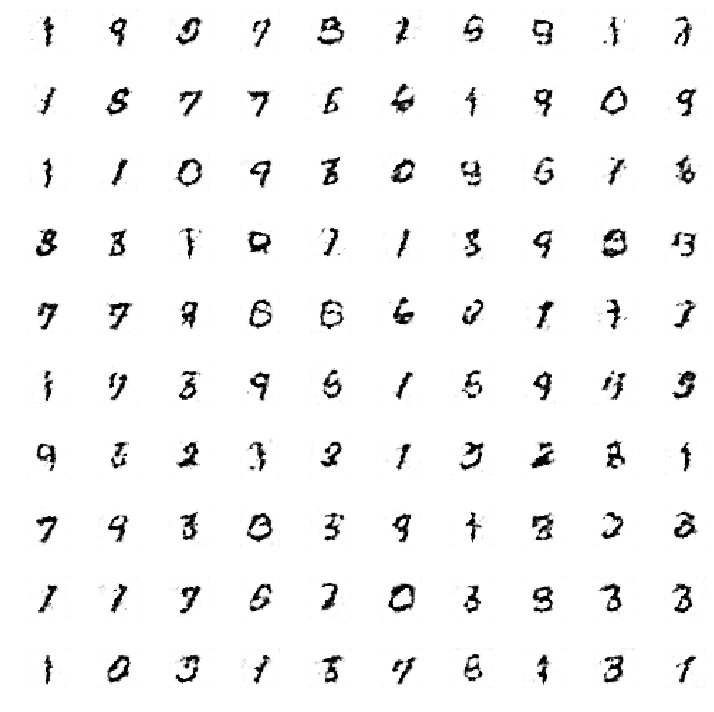

>Saved: infogan_generated_plot_0040.png and infogan_generator_model_0040.h5
>41, 1/937, d1=0.927, d2=0.930 g=0.934
>41, 2/937, d1=0.911, d2=0.931 g=0.938
>41, 3/937, d1=0.932, d2=0.931 g=0.935
>41, 4/937, d1=0.920, d2=0.930 g=0.934
>41, 5/937, d1=0.913, d2=0.928 g=0.935
>41, 6/937, d1=0.914, d2=0.927 g=0.939
>41, 7/937, d1=0.917, d2=0.925 g=0.939
>41, 8/937, d1=0.920, d2=0.927 g=0.938
>41, 9/937, d1=0.919, d2=0.928 g=0.936
>41, 10/937, d1=0.919, d2=0.927 g=0.934
>41, 11/937, d1=0.918, d2=0.929 g=0.937
>41, 12/937, d1=0.916, d2=0.926 g=0.934
>41, 13/937, d1=0.914, d2=0.924 g=0.935
>41, 14/937, d1=0.915, d2=0.927 g=0.936
>41, 15/937, d1=0.916, d2=0.920 g=0.931
>41, 16/937, d1=0.922, d2=0.930 g=0.927
>41, 17/937, d1=0.915, d2=0.930 g=0.930
>41, 18/937, d1=0.916, d2=0.926 g=0.938
>41, 19/937, d1=0.918, d2=0.923 g=0.936
>41, 20/937, d1=0.915, d2=0.923 g=0.934
>41, 21/937, d1=0.919, d2=0.931 g=0.935
>41, 22/937, d1=0.918, d2=0.918 g=0.933
>41, 23/937, d1=0.914, d2=0.928 g=0.929
>41, 24/937, 

>41, 204/937, d1=0.918, d2=0.923 g=0.940
>41, 205/937, d1=0.923, d2=0.935 g=0.937
>41, 206/937, d1=0.922, d2=0.934 g=0.936
>41, 207/937, d1=0.922, d2=0.928 g=0.939
>41, 208/937, d1=0.921, d2=0.931 g=0.942
>41, 209/937, d1=0.924, d2=0.927 g=0.940
>41, 210/937, d1=0.922, d2=0.929 g=0.938
>41, 211/937, d1=0.926, d2=0.935 g=0.937
>41, 212/937, d1=0.924, d2=0.927 g=0.941
>41, 213/937, d1=0.931, d2=0.932 g=0.933
>41, 214/937, d1=0.918, d2=0.930 g=0.939
>41, 215/937, d1=0.920, d2=0.930 g=0.941
>41, 216/937, d1=0.924, d2=0.933 g=0.941
>41, 217/937, d1=0.921, d2=0.929 g=0.940
>41, 218/937, d1=0.920, d2=0.929 g=0.935
>41, 219/937, d1=0.916, d2=0.936 g=0.938
>41, 220/937, d1=0.921, d2=0.930 g=0.939
>41, 221/937, d1=0.918, d2=0.927 g=0.937
>41, 222/937, d1=0.917, d2=0.932 g=0.940
>41, 223/937, d1=0.920, d2=0.930 g=0.940
>41, 224/937, d1=0.920, d2=0.927 g=0.936
>41, 225/937, d1=0.916, d2=0.934 g=0.939
>41, 226/937, d1=0.918, d2=0.936 g=0.943
>41, 227/937, d1=0.921, d2=0.927 g=0.946
>41, 228/937, d1

>41, 404/937, d1=0.924, d2=0.934 g=0.945
>41, 405/937, d1=0.921, d2=0.931 g=0.948
>41, 406/937, d1=0.924, d2=0.935 g=0.949
>41, 407/937, d1=0.926, d2=0.936 g=0.947
>41, 408/937, d1=0.917, d2=0.929 g=0.949
>41, 409/937, d1=0.925, d2=0.942 g=0.948
>41, 410/937, d1=0.924, d2=0.935 g=0.953
>41, 411/937, d1=0.932, d2=0.931 g=0.943
>41, 412/937, d1=0.920, d2=0.945 g=0.949
>41, 413/937, d1=0.919, d2=0.929 g=0.954
>41, 414/937, d1=0.931, d2=0.938 g=0.957
>41, 415/937, d1=0.932, d2=0.931 g=0.946
>41, 416/937, d1=0.924, d2=0.939 g=0.943
>41, 417/937, d1=0.918, d2=0.939 g=0.952
>41, 418/937, d1=0.923, d2=0.930 g=0.949
>41, 419/937, d1=0.929, d2=0.935 g=0.944
>41, 420/937, d1=0.919, d2=0.943 g=0.952
>41, 421/937, d1=0.933, d2=0.926 g=0.941
>41, 422/937, d1=0.920, d2=0.938 g=0.945
>41, 423/937, d1=0.921, d2=0.936 g=0.949
>41, 424/937, d1=0.927, d2=0.933 g=0.948
>41, 425/937, d1=0.928, d2=0.936 g=0.947
>41, 426/937, d1=0.927, d2=0.943 g=0.951
>41, 427/937, d1=0.931, d2=0.931 g=0.949
>41, 428/937, d1

>41, 605/937, d1=0.935, d2=0.947 g=0.947
>41, 606/937, d1=0.931, d2=0.946 g=0.949
>41, 607/937, d1=0.929, d2=0.944 g=0.951
>41, 608/937, d1=0.932, d2=0.946 g=0.951
>41, 609/937, d1=0.932, d2=0.940 g=0.951
>41, 610/937, d1=0.936, d2=0.948 g=0.952
>41, 611/937, d1=0.932, d2=0.944 g=0.953
>41, 612/937, d1=0.932, d2=0.941 g=0.952
>41, 613/937, d1=0.933, d2=0.943 g=0.951
>41, 614/937, d1=0.930, d2=0.940 g=0.949
>41, 615/937, d1=0.930, d2=0.941 g=0.948
>41, 616/937, d1=0.931, d2=0.941 g=0.950
>41, 617/937, d1=0.928, d2=0.943 g=0.948
>41, 618/937, d1=0.933, d2=0.945 g=0.951
>41, 619/937, d1=0.932, d2=0.937 g=0.948
>41, 620/937, d1=0.930, d2=0.946 g=0.951
>41, 621/937, d1=0.926, d2=0.942 g=0.960
>41, 622/937, d1=0.941, d2=0.941 g=0.948
>41, 623/937, d1=0.934, d2=0.947 g=0.949
>41, 624/937, d1=0.932, d2=0.944 g=0.954
>41, 625/937, d1=0.935, d2=0.943 g=0.952
>41, 626/937, d1=0.933, d2=0.941 g=0.950
>41, 627/937, d1=0.928, d2=0.945 g=0.954
>41, 628/937, d1=0.932, d2=0.947 g=0.959
>41, 629/937, d1

>41, 810/937, d1=0.943, d2=0.963 g=0.966
>41, 811/937, d1=0.942, d2=0.955 g=0.970
>41, 812/937, d1=0.947, d2=0.956 g=0.975
>41, 813/937, d1=0.945, d2=0.956 g=0.972
>41, 814/937, d1=0.947, d2=0.949 g=0.965
>41, 815/937, d1=0.942, d2=0.962 g=0.967
>41, 816/937, d1=0.945, d2=0.948 g=0.965
>41, 817/937, d1=0.945, d2=0.961 g=0.967
>41, 818/937, d1=0.951, d2=0.955 g=0.961
>41, 819/937, d1=0.943, d2=0.958 g=0.965
>41, 820/937, d1=0.940, d2=0.960 g=0.972
>41, 821/937, d1=0.951, d2=0.950 g=0.967
>41, 822/937, d1=0.939, d2=0.960 g=0.966
>41, 823/937, d1=0.947, d2=0.954 g=0.965
>41, 824/937, d1=0.941, d2=0.952 g=0.966
>41, 825/937, d1=0.949, d2=0.971 g=0.968
>41, 826/937, d1=0.941, d2=0.954 g=0.977
>41, 827/937, d1=0.949, d2=0.941 g=0.967
>41, 828/937, d1=0.945, d2=0.957 g=0.964
>41, 829/937, d1=0.944, d2=0.954 g=0.962
>41, 830/937, d1=0.945, d2=0.958 g=0.964
>41, 831/937, d1=0.940, d2=0.955 g=0.967
>41, 832/937, d1=0.945, d2=0.947 g=0.965
>41, 833/937, d1=0.945, d2=0.955 g=0.963
>41, 834/937, d1

>42, 81/937, d1=0.951, d2=0.959 g=0.971
>42, 82/937, d1=0.944, d2=0.960 g=0.974
>42, 83/937, d1=0.958, d2=0.960 g=0.970
>42, 84/937, d1=0.951, d2=0.965 g=0.968
>42, 85/937, d1=0.953, d2=0.958 g=0.973
>42, 86/937, d1=0.949, d2=0.965 g=0.974
>42, 87/937, d1=0.952, d2=0.957 g=0.974
>42, 88/937, d1=0.955, d2=0.972 g=0.974
>42, 89/937, d1=0.951, d2=0.957 g=0.974
>42, 90/937, d1=0.955, d2=0.966 g=0.974
>42, 91/937, d1=0.951, d2=0.965 g=0.974
>42, 92/937, d1=0.953, d2=0.963 g=0.976
>42, 93/937, d1=0.954, d2=0.961 g=0.974
>42, 94/937, d1=0.958, d2=0.961 g=0.973
>42, 95/937, d1=0.953, d2=0.964 g=0.974
>42, 96/937, d1=0.953, d2=0.965 g=0.978
>42, 97/937, d1=0.953, d2=0.963 g=0.976
>42, 98/937, d1=0.954, d2=0.961 g=0.975
>42, 99/937, d1=0.953, d2=0.960 g=0.974
>42, 100/937, d1=0.947, d2=0.952 g=0.979
>42, 101/937, d1=0.955, d2=0.961 g=0.975
>42, 102/937, d1=0.955, d2=0.964 g=0.967
>42, 103/937, d1=0.940, d2=0.958 g=0.979
>42, 104/937, d1=0.952, d2=0.956 g=0.977
>42, 105/937, d1=0.955, d2=0.973 g=

>42, 282/937, d1=0.944, d2=0.961 g=0.963
>42, 283/937, d1=0.945, d2=0.956 g=0.963
>42, 284/937, d1=0.947, d2=0.956 g=0.961
>42, 285/937, d1=0.944, d2=0.959 g=0.961
>42, 286/937, d1=0.944, d2=0.958 g=0.967
>42, 287/937, d1=0.951, d2=0.951 g=0.961
>42, 288/937, d1=0.944, d2=0.957 g=0.960
>42, 289/937, d1=0.940, d2=0.954 g=0.964
>42, 290/937, d1=0.946, d2=0.965 g=0.968
>42, 291/937, d1=0.947, d2=0.951 g=0.963
>42, 292/937, d1=0.941, d2=0.953 g=0.968
>42, 293/937, d1=0.943, d2=0.944 g=0.959
>42, 294/937, d1=0.944, d2=0.958 g=0.960
>42, 295/937, d1=0.946, d2=0.955 g=0.965
>42, 296/937, d1=0.941, d2=0.959 g=0.967
>42, 297/937, d1=0.948, d2=0.950 g=0.962
>42, 298/937, d1=0.944, d2=0.963 g=0.967
>42, 299/937, d1=0.939, d2=0.947 g=0.967
>42, 300/937, d1=0.947, d2=0.960 g=0.960
>42, 301/937, d1=0.936, d2=0.951 g=0.968
>42, 302/937, d1=0.952, d2=0.956 g=0.969
>42, 303/937, d1=0.947, d2=0.949 g=0.963
>42, 304/937, d1=0.939, d2=0.949 g=0.958
>42, 305/937, d1=0.944, d2=0.957 g=0.960
>42, 306/937, d1

>42, 486/937, d1=0.943, d2=0.954 g=0.968
>42, 487/937, d1=0.950, d2=0.949 g=0.959
>42, 488/937, d1=0.944, d2=0.961 g=0.961
>42, 489/937, d1=0.940, d2=0.955 g=0.967
>42, 490/937, d1=0.953, d2=0.954 g=0.969
>42, 491/937, d1=0.951, d2=0.950 g=0.965
>42, 492/937, d1=0.947, d2=0.953 g=0.962
>42, 493/937, d1=0.937, d2=0.953 g=0.964
>42, 494/937, d1=0.944, d2=0.950 g=0.965
>42, 495/937, d1=0.943, d2=0.951 g=0.962
>42, 496/937, d1=0.936, d2=0.950 g=0.967
>42, 497/937, d1=0.946, d2=0.959 g=0.965
>42, 498/937, d1=0.940, d2=0.953 g=0.964
>42, 499/937, d1=0.946, d2=0.948 g=0.963
>42, 500/937, d1=0.940, d2=0.954 g=0.963
>42, 501/937, d1=0.947, d2=0.959 g=0.960
>42, 502/937, d1=0.944, d2=0.953 g=0.962
>42, 503/937, d1=0.942, d2=0.954 g=0.962
>42, 504/937, d1=0.943, d2=0.955 g=0.961
>42, 505/937, d1=0.938, d2=0.947 g=0.962
>42, 506/937, d1=0.943, d2=0.953 g=0.960
>42, 507/937, d1=0.941, d2=0.953 g=0.961
>42, 508/937, d1=0.945, d2=0.949 g=0.958
>42, 509/937, d1=0.940, d2=0.953 g=0.959
>42, 510/937, d1

>42, 688/937, d1=0.953, d2=0.959 g=0.968
>42, 689/937, d1=0.944, d2=0.958 g=0.968
>42, 690/937, d1=0.948, d2=0.963 g=0.973
>42, 691/937, d1=0.962, d2=0.958 g=0.970
>42, 692/937, d1=0.949, d2=0.963 g=0.971
>42, 693/937, d1=0.946, d2=0.956 g=0.976
>42, 694/937, d1=0.953, d2=0.959 g=0.973
>42, 695/937, d1=0.949, d2=0.960 g=0.972
>42, 696/937, d1=0.953, d2=0.961 g=0.972
>42, 697/937, d1=0.948, d2=0.955 g=0.971
>42, 698/937, d1=0.949, d2=0.957 g=0.974
>42, 699/937, d1=0.954, d2=0.959 g=0.968
>42, 700/937, d1=0.948, d2=0.965 g=0.968
>42, 701/937, d1=0.949, d2=0.959 g=0.973
>42, 702/937, d1=0.949, d2=0.957 g=0.973
>42, 703/937, d1=0.948, d2=0.955 g=0.973
>42, 704/937, d1=0.950, d2=0.962 g=0.970
>42, 705/937, d1=0.948, d2=0.962 g=0.969
>42, 706/937, d1=0.947, d2=0.959 g=0.974
>42, 707/937, d1=0.954, d2=0.957 g=0.970
>42, 708/937, d1=0.951, d2=0.963 g=0.968
>42, 709/937, d1=0.948, d2=0.955 g=0.971
>42, 710/937, d1=0.949, d2=0.954 g=0.969
>42, 711/937, d1=0.948, d2=0.966 g=0.970
>42, 712/937, d1

>42, 890/937, d1=0.964, d2=0.962 g=0.975
>42, 891/937, d1=0.961, d2=0.961 g=0.971
>42, 892/937, d1=0.954, d2=0.965 g=0.971
>42, 893/937, d1=0.959, d2=0.960 g=0.973
>42, 894/937, d1=0.956, d2=0.956 g=0.969
>42, 895/937, d1=0.954, d2=0.963 g=0.969
>42, 896/937, d1=0.944, d2=0.958 g=0.972
>42, 897/937, d1=0.953, d2=0.966 g=0.974
>42, 898/937, d1=0.953, d2=0.955 g=0.969
>42, 899/937, d1=0.953, d2=0.971 g=0.978
>42, 900/937, d1=0.956, d2=0.965 g=0.975
>42, 901/937, d1=0.963, d2=0.962 g=0.972
>42, 902/937, d1=0.950, d2=0.967 g=0.972
>42, 903/937, d1=0.954, d2=0.963 g=0.975
>42, 904/937, d1=0.952, d2=0.969 g=0.978
>42, 905/937, d1=0.960, d2=0.969 g=0.977
>42, 906/937, d1=0.964, d2=0.966 g=0.975
>42, 907/937, d1=0.956, d2=0.959 g=0.973
>42, 908/937, d1=0.955, d2=0.966 g=0.970
>42, 909/937, d1=0.953, d2=0.968 g=0.975
>42, 910/937, d1=0.952, d2=0.959 g=0.977
>42, 911/937, d1=0.954, d2=0.960 g=0.975
>42, 912/937, d1=0.952, d2=0.960 g=0.973
>42, 913/937, d1=0.948, d2=0.964 g=0.975
>42, 914/937, d1

>43, 158/937, d1=0.950, d2=0.957 g=0.971
>43, 159/937, d1=0.950, d2=0.958 g=0.965
>43, 160/937, d1=0.951, d2=0.962 g=0.966
>43, 161/937, d1=0.946, d2=0.957 g=0.967
>43, 162/937, d1=0.951, d2=0.960 g=0.965
>43, 163/937, d1=0.956, d2=0.962 g=0.970
>43, 164/937, d1=0.957, d2=0.959 g=0.970
>43, 165/937, d1=0.952, d2=0.958 g=0.969
>43, 166/937, d1=0.949, d2=0.958 g=0.973
>43, 167/937, d1=0.954, d2=0.955 g=0.966
>43, 168/937, d1=0.946, d2=0.968 g=0.970
>43, 169/937, d1=0.951, d2=0.953 g=0.975
>43, 170/937, d1=0.957, d2=0.958 g=0.965
>43, 171/937, d1=0.942, d2=0.956 g=0.967
>43, 172/937, d1=0.947, d2=0.959 g=0.970
>43, 173/937, d1=0.949, d2=0.963 g=0.971
>43, 174/937, d1=0.944, d2=0.957 g=0.976
>43, 175/937, d1=0.958, d2=0.952 g=0.964
>43, 176/937, d1=0.943, d2=0.963 g=0.967
>43, 177/937, d1=0.949, d2=0.955 g=0.965
>43, 178/937, d1=0.950, d2=0.951 g=0.959
>43, 179/937, d1=0.946, d2=0.967 g=0.965
>43, 180/937, d1=0.943, d2=0.952 g=0.970
>43, 181/937, d1=0.953, d2=0.956 g=0.967
>43, 182/937, d1

>43, 361/937, d1=0.954, d2=0.965 g=0.981
>43, 362/937, d1=0.962, d2=0.973 g=0.977
>43, 363/937, d1=0.957, d2=0.966 g=0.980
>43, 364/937, d1=0.952, d2=0.960 g=0.982
>43, 365/937, d1=0.961, d2=0.973 g=0.980
>43, 366/937, d1=0.959, d2=0.967 g=0.981
>43, 367/937, d1=0.960, d2=0.963 g=0.978
>43, 368/937, d1=0.959, d2=0.977 g=0.979
>43, 369/937, d1=0.957, d2=0.966 g=0.980
>43, 370/937, d1=0.961, d2=0.967 g=0.978
>43, 371/937, d1=0.960, d2=0.969 g=0.979
>43, 372/937, d1=0.959, d2=0.975 g=0.977
>43, 373/937, d1=0.958, d2=0.964 g=0.977
>43, 374/937, d1=0.960, d2=0.973 g=0.980
>43, 375/937, d1=0.964, d2=0.968 g=0.978
>43, 376/937, d1=0.958, d2=0.964 g=0.975
>43, 377/937, d1=0.959, d2=0.963 g=0.976
>43, 378/937, d1=0.959, d2=0.963 g=0.973
>43, 379/937, d1=0.948, d2=0.967 g=0.979
>43, 380/937, d1=0.962, d2=0.965 g=0.976
>43, 381/937, d1=0.966, d2=0.967 g=0.970
>43, 382/937, d1=0.954, d2=0.976 g=0.979
>43, 383/937, d1=0.959, d2=0.960 g=0.985
>43, 384/937, d1=0.959, d2=0.969 g=0.985
>43, 385/937, d1

>43, 567/937, d1=0.965, d2=0.982 g=0.988
>43, 568/937, d1=0.969, d2=0.973 g=0.986
>43, 569/937, d1=0.971, d2=0.973 g=0.981
>43, 570/937, d1=0.962, d2=0.979 g=0.987
>43, 571/937, d1=0.968, d2=0.973 g=0.988
>43, 572/937, d1=0.973, d2=0.972 g=0.985
>43, 573/937, d1=0.967, d2=0.977 g=0.984
>43, 574/937, d1=0.963, d2=0.972 g=0.987
>43, 575/937, d1=0.971, d2=0.977 g=0.985
>43, 576/937, d1=0.962, d2=0.974 g=0.987
>43, 577/937, d1=0.969, d2=0.973 g=0.986
>43, 578/937, d1=0.967, d2=0.979 g=0.985
>43, 579/937, d1=0.963, d2=0.970 g=0.987
>43, 580/937, d1=0.969, d2=0.978 g=0.986
>43, 581/937, d1=0.976, d2=0.974 g=0.983
>43, 582/937, d1=0.970, d2=0.978 g=0.983
>43, 583/937, d1=0.967, d2=0.973 g=0.981
>43, 584/937, d1=0.967, d2=0.976 g=0.982
>43, 585/937, d1=0.966, d2=0.978 g=0.985
>43, 586/937, d1=0.968, d2=0.971 g=0.981
>43, 587/937, d1=0.962, d2=0.976 g=0.984
>43, 588/937, d1=0.963, d2=0.970 g=0.986
>43, 589/937, d1=0.968, d2=0.976 g=0.984
>43, 590/937, d1=0.969, d2=0.969 g=0.980
>43, 591/937, d1

>43, 769/937, d1=0.960, d2=0.964 g=0.977
>43, 770/937, d1=0.963, d2=0.970 g=0.976
>43, 771/937, d1=0.952, d2=0.961 g=0.974
>43, 772/937, d1=0.953, d2=0.960 g=0.976
>43, 773/937, d1=0.961, d2=0.967 g=0.977
>43, 774/937, d1=0.958, d2=0.958 g=0.974
>43, 775/937, d1=0.955, d2=0.966 g=0.976
>43, 776/937, d1=0.957, d2=0.967 g=0.977
>43, 777/937, d1=0.957, d2=0.961 g=0.980
>43, 778/937, d1=0.951, d2=0.960 g=0.976
>43, 779/937, d1=0.959, d2=0.973 g=0.974
>43, 780/937, d1=0.951, d2=0.960 g=0.976
>43, 781/937, d1=0.956, d2=0.965 g=0.976
>43, 782/937, d1=0.955, d2=0.965 g=0.980
>43, 783/937, d1=0.955, d2=0.953 g=0.974
>43, 784/937, d1=0.950, d2=0.970 g=0.975
>43, 785/937, d1=0.957, d2=0.969 g=0.981
>43, 786/937, d1=0.955, d2=0.957 g=0.977
>43, 787/937, d1=0.963, d2=0.977 g=0.972
>43, 788/937, d1=0.951, d2=0.970 g=0.980
>43, 789/937, d1=0.969, d2=0.968 g=0.978
>43, 790/937, d1=0.960, d2=0.972 g=0.976
>43, 791/937, d1=0.955, d2=0.960 g=0.980
>43, 792/937, d1=0.957, d2=0.969 g=0.977
>43, 793/937, d1

>44, 35/937, d1=0.969, d2=0.974 g=0.991
>44, 36/937, d1=0.970, d2=0.978 g=0.989
>44, 37/937, d1=0.965, d2=0.978 g=0.992
>44, 38/937, d1=0.970, d2=0.974 g=0.987
>44, 39/937, d1=0.973, d2=0.985 g=0.986
>44, 40/937, d1=0.971, d2=0.980 g=0.986
>44, 41/937, d1=0.968, d2=0.979 g=0.988
>44, 42/937, d1=0.971, d2=0.980 g=0.990
>44, 43/937, d1=0.970, d2=0.976 g=0.991
>44, 44/937, d1=0.969, d2=0.980 g=0.990
>44, 45/937, d1=0.969, d2=0.984 g=0.995
>44, 46/937, d1=0.973, d2=0.978 g=0.992
>44, 47/937, d1=0.968, d2=0.979 g=0.990
>44, 48/937, d1=0.969, d2=0.983 g=0.992
>44, 49/937, d1=0.971, d2=0.980 g=0.994
>44, 50/937, d1=0.973, d2=0.979 g=0.992
>44, 51/937, d1=0.971, d2=0.984 g=0.993
>44, 52/937, d1=0.975, d2=0.982 g=0.994
>44, 53/937, d1=0.978, d2=0.981 g=0.989
>44, 54/937, d1=0.969, d2=0.987 g=0.994
>44, 55/937, d1=0.972, d2=0.980 g=0.997
>44, 56/937, d1=0.978, d2=0.980 g=0.990
>44, 57/937, d1=0.970, d2=0.983 g=0.990
>44, 58/937, d1=0.969, d2=0.982 g=0.991
>44, 59/937, d1=0.968, d2=0.987 g=0.997


>44, 237/937, d1=0.981, d2=0.991 g=1.002
>44, 238/937, d1=0.970, d2=0.993 g=1.008
>44, 239/937, d1=0.984, d2=0.995 g=1.014
>44, 240/937, d1=0.987, d2=0.982 g=1.008
>44, 241/937, d1=0.975, d2=0.999 g=1.011
>44, 242/937, d1=0.977, d2=0.982 g=1.012
>44, 243/937, d1=0.988, d2=0.999 g=1.010
>44, 244/937, d1=0.981, d2=0.990 g=1.010
>44, 245/937, d1=0.986, d2=0.991 g=1.006
>44, 246/937, d1=0.987, d2=0.996 g=1.005
>44, 247/937, d1=0.979, d2=0.985 g=1.007
>44, 248/937, d1=0.985, d2=0.993 g=1.003
>44, 249/937, d1=0.982, d2=0.999 g=1.006
>44, 250/937, d1=0.983, d2=0.987 g=1.006
>44, 251/937, d1=0.990, d2=1.000 g=1.006
>44, 252/937, d1=0.986, d2=0.996 g=1.007
>44, 253/937, d1=0.977, d2=0.986 g=1.008
>44, 254/937, d1=0.989, d2=1.008 g=1.008
>44, 255/937, d1=0.996, d2=0.998 g=1.011
>44, 256/937, d1=0.987, d2=0.993 g=1.007
>44, 257/937, d1=0.986, d2=0.999 g=1.006
>44, 258/937, d1=0.986, d2=0.997 g=1.010
>44, 259/937, d1=0.989, d2=0.998 g=1.008
>44, 260/937, d1=0.982, d2=0.996 g=1.009
>44, 261/937, d1

>44, 440/937, d1=0.993, d2=1.008 g=1.014
>44, 441/937, d1=0.996, d2=1.004 g=1.013
>44, 442/937, d1=0.996, d2=1.007 g=1.014
>44, 443/937, d1=0.999, d2=1.010 g=1.016
>44, 444/937, d1=1.003, d2=1.009 g=1.017
>44, 445/937, d1=0.999, d2=1.004 g=1.015
>44, 446/937, d1=0.994, d2=1.004 g=1.012
>44, 447/937, d1=0.992, d2=1.011 g=1.016
>44, 448/937, d1=0.995, d2=1.004 g=1.019
>44, 449/937, d1=0.998, d2=1.010 g=1.020
>44, 450/937, d1=0.999, d2=1.008 g=1.018
>44, 451/937, d1=1.000, d2=1.014 g=1.021
>44, 452/937, d1=1.003, d2=1.009 g=1.022
>44, 453/937, d1=1.004, d2=1.008 g=1.019
>44, 454/937, d1=1.003, d2=1.007 g=1.016
>44, 455/937, d1=1.001, d2=1.011 g=1.019
>44, 456/937, d1=0.995, d2=1.007 g=1.022
>44, 457/937, d1=1.001, d2=1.006 g=1.022
>44, 458/937, d1=0.998, d2=1.014 g=1.026
>44, 459/937, d1=1.004, d2=1.006 g=1.023
>44, 460/937, d1=1.005, d2=1.009 g=1.021
>44, 461/937, d1=1.000, d2=1.014 g=1.026
>44, 462/937, d1=1.005, d2=1.004 g=1.017
>44, 463/937, d1=0.998, d2=1.010 g=1.019
>44, 464/937, d1

>44, 642/937, d1=1.005, d2=1.005 g=1.013
>44, 643/937, d1=0.998, d2=1.010 g=1.011
>44, 644/937, d1=0.990, d2=1.002 g=1.017
>44, 645/937, d1=0.998, d2=1.009 g=1.017
>44, 646/937, d1=0.999, d2=1.002 g=1.018
>44, 647/937, d1=0.995, d2=1.001 g=1.012
>44, 648/937, d1=0.990, d2=1.007 g=1.016
>44, 649/937, d1=0.997, d2=1.003 g=1.015
>44, 650/937, d1=0.993, d2=1.007 g=1.016
>44, 651/937, d1=0.997, d2=1.008 g=1.013
>44, 652/937, d1=0.997, d2=1.010 g=1.020
>44, 653/937, d1=1.005, d2=1.003 g=1.010
>44, 654/937, d1=0.993, d2=1.014 g=1.016
>44, 655/937, d1=0.999, d2=1.000 g=1.016
>44, 656/937, d1=0.998, d2=1.004 g=1.010
>44, 657/937, d1=0.993, d2=1.008 g=1.014
>44, 658/937, d1=0.996, d2=0.998 g=1.011
>44, 659/937, d1=0.992, d2=1.005 g=1.011
>44, 660/937, d1=0.991, d2=1.002 g=1.010
>44, 661/937, d1=0.990, d2=1.014 g=1.019
>44, 662/937, d1=0.995, d2=1.004 g=1.022
>44, 663/937, d1=1.004, d2=1.001 g=1.015
>44, 664/937, d1=0.991, d2=1.012 g=1.015
>44, 665/937, d1=0.994, d2=1.003 g=1.020
>44, 666/937, d1

>44, 846/937, d1=1.001, d2=1.003 g=1.018
>44, 847/937, d1=0.996, d2=1.009 g=1.020
>44, 848/937, d1=1.001, d2=1.009 g=1.019
>44, 849/937, d1=1.004, d2=1.011 g=1.016
>44, 850/937, d1=0.997, d2=1.009 g=1.021
>44, 851/937, d1=1.007, d2=1.009 g=1.019
>44, 852/937, d1=0.999, d2=1.010 g=1.021
>44, 853/937, d1=0.999, d2=1.007 g=1.023
>44, 854/937, d1=1.004, d2=1.009 g=1.020
>44, 855/937, d1=1.004, d2=1.009 g=1.016
>44, 856/937, d1=1.000, d2=1.009 g=1.014
>44, 857/937, d1=0.996, d2=1.014 g=1.017
>44, 858/937, d1=1.001, d2=1.008 g=1.018
>44, 859/937, d1=1.008, d2=1.007 g=1.013
>44, 860/937, d1=0.998, d2=1.013 g=1.016
>44, 861/937, d1=1.000, d2=1.008 g=1.018
>44, 862/937, d1=1.005, d2=1.005 g=1.015
>44, 863/937, d1=1.002, d2=1.009 g=1.017
>44, 864/937, d1=0.999, d2=1.014 g=1.021
>44, 865/937, d1=0.999, d2=1.007 g=1.024
>44, 866/937, d1=1.002, d2=1.004 g=1.018
>44, 867/937, d1=0.996, d2=1.020 g=1.022
>44, 868/937, d1=1.002, d2=1.006 g=1.027
>44, 869/937, d1=1.005, d2=1.004 g=1.020
>44, 870/937, d1

>45, 120/937, d1=1.007, d2=1.002 g=1.014
>45, 121/937, d1=1.001, d2=1.013 g=1.011
>45, 122/937, d1=0.991, d2=1.005 g=1.018
>45, 123/937, d1=1.005, d2=1.004 g=1.016
>45, 124/937, d1=1.000, d2=1.009 g=1.013
>45, 125/937, d1=0.999, d2=1.007 g=1.015
>45, 126/937, d1=1.000, d2=1.004 g=1.018
>45, 127/937, d1=1.001, d2=1.008 g=1.017
>45, 128/937, d1=0.999, d2=1.007 g=1.019
>45, 129/937, d1=1.001, d2=1.003 g=1.018
>45, 130/937, d1=0.996, d2=1.007 g=1.019
>45, 131/937, d1=1.006, d2=1.006 g=1.015
>45, 132/937, d1=1.001, d2=1.004 g=1.015
>45, 133/937, d1=0.998, d2=1.013 g=1.016
>45, 134/937, d1=1.004, d2=1.005 g=1.015
>45, 135/937, d1=0.998, d2=1.008 g=1.019
>45, 136/937, d1=1.002, d2=1.006 g=1.017
>45, 137/937, d1=1.006, d2=1.011 g=1.017
>45, 138/937, d1=0.997, d2=1.005 g=1.020
>45, 139/937, d1=1.004, d2=1.013 g=1.019
>45, 140/937, d1=1.002, d2=1.011 g=1.020
>45, 141/937, d1=1.004, d2=1.010 g=1.015
>45, 142/937, d1=1.002, d2=1.005 g=1.017
>45, 143/937, d1=1.000, d2=1.006 g=1.014
>45, 144/937, d1

>45, 324/937, d1=1.011, d2=1.020 g=1.034
>45, 325/937, d1=1.013, d2=1.016 g=1.030
>45, 326/937, d1=1.005, d2=1.019 g=1.034
>45, 327/937, d1=1.009, d2=1.013 g=1.031
>45, 328/937, d1=1.012, d2=1.021 g=1.027
>45, 329/937, d1=1.012, d2=1.027 g=1.032
>45, 330/937, d1=1.007, d2=1.015 g=1.035
>45, 331/937, d1=1.015, d2=1.019 g=1.031
>45, 332/937, d1=1.011, d2=1.022 g=1.029
>45, 333/937, d1=1.007, d2=1.019 g=1.036
>45, 334/937, d1=1.008, d2=1.018 g=1.034
>45, 335/937, d1=1.013, d2=1.017 g=1.034
>45, 336/937, d1=1.016, d2=1.026 g=1.029
>45, 337/937, d1=1.012, d2=1.028 g=1.039
>45, 338/937, d1=1.020, d2=1.019 g=1.033
>45, 339/937, d1=1.011, d2=1.018 g=1.035
>45, 340/937, d1=1.012, d2=1.020 g=1.035
>45, 341/937, d1=1.014, d2=1.017 g=1.035
>45, 342/937, d1=1.013, d2=1.021 g=1.034
>45, 343/937, d1=1.012, d2=1.018 g=1.034
>45, 344/937, d1=1.017, d2=1.022 g=1.029
>45, 345/937, d1=1.005, d2=1.011 g=1.028
>45, 346/937, d1=1.009, d2=1.020 g=1.029
>45, 347/937, d1=1.008, d2=1.019 g=1.029
>45, 348/937, d1

>45, 530/937, d1=1.012, d2=1.021 g=1.037
>45, 531/937, d1=1.019, d2=1.018 g=1.029
>45, 532/937, d1=1.014, d2=1.025 g=1.031
>45, 533/937, d1=1.006, d2=1.022 g=1.040
>45, 534/937, d1=1.022, d2=1.017 g=1.033
>45, 535/937, d1=1.013, d2=1.026 g=1.034
>45, 536/937, d1=1.014, d2=1.018 g=1.032
>45, 537/937, d1=1.021, d2=1.026 g=1.028
>45, 538/937, d1=1.010, d2=1.028 g=1.036
>45, 539/937, d1=1.018, d2=1.017 g=1.032
>45, 540/937, d1=1.021, d2=1.029 g=1.029
>45, 541/937, d1=1.010, d2=1.025 g=1.037
>45, 542/937, d1=1.026, d2=1.021 g=1.034
>45, 543/937, d1=1.018, d2=1.028 g=1.029
>45, 544/937, d1=1.012, d2=1.015 g=1.034
>45, 545/937, d1=1.016, d2=1.022 g=1.032
>45, 546/937, d1=1.019, d2=1.019 g=1.028
>45, 547/937, d1=1.007, d2=1.018 g=1.031
>45, 548/937, d1=1.018, d2=1.030 g=1.032
>45, 549/937, d1=1.012, d2=1.019 g=1.038
>45, 550/937, d1=1.024, d2=1.028 g=1.032
>45, 551/937, d1=1.017, d2=1.021 g=1.031
>45, 552/937, d1=1.015, d2=1.021 g=1.029
>45, 553/937, d1=1.014, d2=1.022 g=1.030
>45, 554/937, d1

>45, 731/937, d1=1.027, d2=1.029 g=1.041
>45, 732/937, d1=1.018, d2=1.026 g=1.043
>45, 733/937, d1=1.019, d2=1.025 g=1.043
>45, 734/937, d1=1.022, d2=1.037 g=1.041
>45, 735/937, d1=1.019, d2=1.031 g=1.044
>45, 736/937, d1=1.026, d2=1.028 g=1.041
>45, 737/937, d1=1.022, d2=1.028 g=1.039
>45, 738/937, d1=1.021, d2=1.033 g=1.037
>45, 739/937, d1=1.021, d2=1.034 g=1.041
>45, 740/937, d1=1.024, d2=1.027 g=1.039
>45, 741/937, d1=1.020, d2=1.028 g=1.041
>45, 742/937, d1=1.021, d2=1.026 g=1.038
>45, 743/937, d1=1.020, d2=1.032 g=1.041
>45, 744/937, d1=1.024, d2=1.028 g=1.039
>45, 745/937, d1=1.020, d2=1.030 g=1.039
>45, 746/937, d1=1.019, d2=1.026 g=1.037
>45, 747/937, d1=1.021, d2=1.036 g=1.038
>45, 748/937, d1=1.025, d2=1.029 g=1.039
>45, 749/937, d1=1.024, d2=1.026 g=1.035
>45, 750/937, d1=1.017, d2=1.031 g=1.040
>45, 751/937, d1=1.022, d2=1.026 g=1.037
>45, 752/937, d1=1.020, d2=1.031 g=1.037
>45, 753/937, d1=1.022, d2=1.027 g=1.036
>45, 754/937, d1=1.024, d2=1.034 g=1.038
>45, 755/937, d1

>45, 932/937, d1=1.027, d2=1.024 g=1.032
>45, 933/937, d1=1.008, d2=1.031 g=1.041
>45, 934/937, d1=1.025, d2=1.023 g=1.037
>45, 935/937, d1=1.013, d2=1.029 g=1.041
>45, 936/937, d1=1.023, d2=1.025 g=1.034
>45, 937/937, d1=1.016, d2=1.033 g=1.039


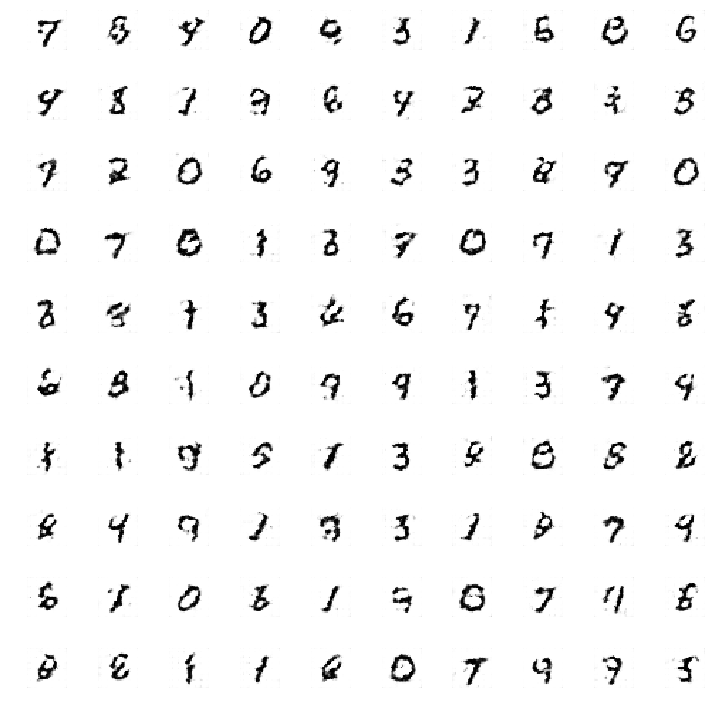

>Saved: infogan_generated_plot_0045.png and infogan_generator_model_0045.h5
>46, 1/937, d1=1.019, d2=1.024 g=1.038
>46, 2/937, d1=1.015, d2=1.033 g=1.047
>46, 3/937, d1=1.026, d2=1.029 g=1.043
>46, 4/937, d1=1.026, d2=1.024 g=1.035
>46, 5/937, d1=1.011, d2=1.031 g=1.042
>46, 6/937, d1=1.022, d2=1.032 g=1.045
>46, 7/937, d1=1.040, d2=1.032 g=1.029
>46, 8/937, d1=1.003, d2=1.030 g=1.039
>46, 9/937, d1=1.026, d2=1.032 g=1.042
>46, 10/937, d1=1.023, d2=1.033 g=1.037
>46, 11/937, d1=1.015, d2=1.026 g=1.038
>46, 12/937, d1=1.015, d2=1.022 g=1.041
>46, 13/937, d1=1.020, d2=1.049 g=1.053
>46, 14/937, d1=1.027, d2=1.027 g=1.047
>46, 15/937, d1=1.034, d2=1.039 g=1.042
>46, 16/937, d1=1.015, d2=1.026 g=1.038
>46, 17/937, d1=1.018, d2=1.029 g=1.046
>46, 18/937, d1=1.014, d2=1.036 g=1.054
>46, 19/937, d1=1.042, d2=1.032 g=1.042
>46, 20/937, d1=1.022, d2=1.039 g=1.040
>46, 21/937, d1=1.023, d2=1.032 g=1.041
>46, 22/937, d1=1.025, d2=1.035 g=1.047
>46, 23/937, d1=1.027, d2=1.045 g=1.047
>46, 24/937, 

>46, 209/937, d1=1.039, d2=1.057 g=1.063
>46, 210/937, d1=1.043, d2=1.046 g=1.064
>46, 211/937, d1=1.048, d2=1.050 g=1.060
>46, 212/937, d1=1.041, d2=1.047 g=1.059
>46, 213/937, d1=1.041, d2=1.045 g=1.055
>46, 214/937, d1=1.043, d2=1.053 g=1.055
>46, 215/937, d1=1.040, d2=1.055 g=1.061
>46, 216/937, d1=1.045, d2=1.049 g=1.061
>46, 217/937, d1=1.043, d2=1.050 g=1.058
>46, 218/937, d1=1.044, d2=1.056 g=1.063
>46, 219/937, d1=1.048, d2=1.051 g=1.063
>46, 220/937, d1=1.049, d2=1.052 g=1.058
>46, 221/937, d1=1.042, d2=1.050 g=1.059
>46, 222/937, d1=1.041, d2=1.051 g=1.060
>46, 223/937, d1=1.041, d2=1.056 g=1.062
>46, 224/937, d1=1.051, d2=1.052 g=1.063
>46, 225/937, d1=1.044, d2=1.056 g=1.063
>46, 226/937, d1=1.042, d2=1.047 g=1.062
>46, 227/937, d1=1.046, d2=1.059 g=1.064
>46, 228/937, d1=1.040, d2=1.048 g=1.066
>46, 229/937, d1=1.046, d2=1.049 g=1.063
>46, 230/937, d1=1.043, d2=1.057 g=1.066
>46, 231/937, d1=1.046, d2=1.055 g=1.067
>46, 232/937, d1=1.050, d2=1.051 g=1.063
>46, 233/937, d1

>46, 411/937, d1=1.037, d2=1.049 g=1.056
>46, 412/937, d1=1.048, d2=1.052 g=1.054
>46, 413/937, d1=1.032, d2=1.050 g=1.065
>46, 414/937, d1=1.045, d2=1.043 g=1.059
>46, 415/937, d1=1.048, d2=1.052 g=1.050
>46, 416/937, d1=1.028, d2=1.047 g=1.059
>46, 417/937, d1=1.047, d2=1.055 g=1.058
>46, 418/937, d1=1.047, d2=1.048 g=1.057
>46, 419/937, d1=1.033, d2=1.050 g=1.065
>46, 420/937, d1=1.048, d2=1.053 g=1.059
>46, 421/937, d1=1.046, d2=1.054 g=1.062
>46, 422/937, d1=1.043, d2=1.046 g=1.060
>46, 423/937, d1=1.041, d2=1.047 g=1.058
>46, 424/937, d1=1.036, d2=1.052 g=1.062
>46, 425/937, d1=1.045, d2=1.056 g=1.062
>46, 426/937, d1=1.041, d2=1.044 g=1.062
>46, 427/937, d1=1.042, d2=1.051 g=1.058
>46, 428/937, d1=1.044, d2=1.065 g=1.066
>46, 429/937, d1=1.040, d2=1.047 g=1.068
>46, 430/937, d1=1.060, d2=1.062 g=1.063
>46, 431/937, d1=1.045, d2=1.051 g=1.062
>46, 432/937, d1=1.043, d2=1.053 g=1.062
>46, 433/937, d1=1.048, d2=1.050 g=1.058
>46, 434/937, d1=1.038, d2=1.056 g=1.067
>46, 435/937, d1

>46, 616/937, d1=1.053, d2=1.059 g=1.066
>46, 617/937, d1=1.049, d2=1.046 g=1.063
>46, 618/937, d1=1.044, d2=1.052 g=1.059
>46, 619/937, d1=1.043, d2=1.059 g=1.065
>46, 620/937, d1=1.049, d2=1.049 g=1.064
>46, 621/937, d1=1.049, d2=1.056 g=1.066
>46, 622/937, d1=1.045, d2=1.051 g=1.067
>46, 623/937, d1=1.050, d2=1.054 g=1.062
>46, 624/937, d1=1.041, d2=1.046 g=1.065
>46, 625/937, d1=1.051, d2=1.052 g=1.058
>46, 626/937, d1=1.042, d2=1.062 g=1.064
>46, 627/937, d1=1.045, d2=1.049 g=1.070
>46, 628/937, d1=1.054, d2=1.049 g=1.061
>46, 629/937, d1=1.042, d2=1.052 g=1.065
>46, 630/937, d1=1.048, d2=1.050 g=1.060
>46, 631/937, d1=1.047, d2=1.060 g=1.064
>46, 632/937, d1=1.045, d2=1.047 g=1.065
>46, 633/937, d1=1.045, d2=1.055 g=1.063
>46, 634/937, d1=1.046, d2=1.065 g=1.071
>46, 635/937, d1=1.050, d2=1.040 g=1.067
>46, 636/937, d1=1.049, d2=1.054 g=1.060
>46, 637/937, d1=1.040, d2=1.050 g=1.060
>46, 638/937, d1=1.051, d2=1.052 g=1.058
>46, 639/937, d1=1.044, d2=1.054 g=1.062
>46, 640/937, d1

>46, 820/937, d1=1.039, d2=1.045 g=1.057
>46, 821/937, d1=1.039, d2=1.045 g=1.054
>46, 822/937, d1=1.037, d2=1.047 g=1.058
>46, 823/937, d1=1.040, d2=1.051 g=1.058
>46, 824/937, d1=1.040, d2=1.046 g=1.057
>46, 825/937, d1=1.042, d2=1.051 g=1.060
>46, 826/937, d1=1.044, d2=1.051 g=1.058
>46, 827/937, d1=1.044, d2=1.049 g=1.060
>46, 828/937, d1=1.045, d2=1.046 g=1.056
>46, 829/937, d1=1.041, d2=1.051 g=1.056
>46, 830/937, d1=1.039, d2=1.051 g=1.062
>46, 831/937, d1=1.046, d2=1.047 g=1.057
>46, 832/937, d1=1.043, d2=1.050 g=1.057
>46, 833/937, d1=1.043, d2=1.048 g=1.058
>46, 834/937, d1=1.045, d2=1.052 g=1.058
>46, 835/937, d1=1.041, d2=1.048 g=1.061
>46, 836/937, d1=1.049, d2=1.049 g=1.057
>46, 837/937, d1=1.040, d2=1.050 g=1.061
>46, 838/937, d1=1.043, d2=1.051 g=1.062
>46, 839/937, d1=1.045, d2=1.049 g=1.061
>46, 840/937, d1=1.042, d2=1.052 g=1.068
>46, 841/937, d1=1.052, d2=1.046 g=1.059
>46, 842/937, d1=1.044, d2=1.054 g=1.059
>46, 843/937, d1=1.043, d2=1.048 g=1.060
>46, 844/937, d1

>47, 92/937, d1=1.064, d2=1.062 g=1.077
>47, 93/937, d1=1.060, d2=1.067 g=1.074
>47, 94/937, d1=1.058, d2=1.066 g=1.078
>47, 95/937, d1=1.057, d2=1.060 g=1.076
>47, 96/937, d1=1.059, d2=1.066 g=1.075
>47, 97/937, d1=1.061, d2=1.062 g=1.068
>47, 98/937, d1=1.052, d2=1.071 g=1.076
>47, 99/937, d1=1.055, d2=1.056 g=1.076
>47, 100/937, d1=1.066, d2=1.076 g=1.075
>47, 101/937, d1=1.060, d2=1.065 g=1.078
>47, 102/937, d1=1.060, d2=1.068 g=1.079
>47, 103/937, d1=1.060, d2=1.064 g=1.079
>47, 104/937, d1=1.060, d2=1.065 g=1.077
>47, 105/937, d1=1.061, d2=1.066 g=1.076
>47, 106/937, d1=1.055, d2=1.067 g=1.078
>47, 107/937, d1=1.058, d2=1.069 g=1.080
>47, 108/937, d1=1.065, d2=1.069 g=1.081
>47, 109/937, d1=1.062, d2=1.072 g=1.078
>47, 110/937, d1=1.060, d2=1.064 g=1.079
>47, 111/937, d1=1.059, d2=1.070 g=1.079
>47, 112/937, d1=1.063, d2=1.068 g=1.081
>47, 113/937, d1=1.065, d2=1.072 g=1.081
>47, 114/937, d1=1.061, d2=1.065 g=1.082
>47, 115/937, d1=1.064, d2=1.070 g=1.081
>47, 116/937, d1=1.058, 

>47, 298/937, d1=1.057, d2=1.075 g=1.083
>47, 299/937, d1=1.056, d2=1.063 g=1.087
>47, 300/937, d1=1.066, d2=1.082 g=1.090
>47, 301/937, d1=1.062, d2=1.082 g=1.100
>47, 302/937, d1=1.083, d2=1.065 g=1.083
>47, 303/937, d1=1.065, d2=1.081 g=1.081
>47, 304/937, d1=1.070, d2=1.080 g=1.083
>47, 305/937, d1=1.069, d2=1.068 g=1.082
>47, 306/937, d1=1.061, d2=1.074 g=1.081
>47, 307/937, d1=1.064, d2=1.078 g=1.087
>47, 308/937, d1=1.070, d2=1.072 g=1.085
>47, 309/937, d1=1.074, d2=1.080 g=1.083
>47, 310/937, d1=1.068, d2=1.074 g=1.086
>47, 311/937, d1=1.063, d2=1.069 g=1.085
>47, 312/937, d1=1.071, d2=1.079 g=1.084
>47, 313/937, d1=1.065, d2=1.074 g=1.085
>47, 314/937, d1=1.070, d2=1.075 g=1.083
>47, 315/937, d1=1.064, d2=1.070 g=1.086
>47, 316/937, d1=1.066, d2=1.070 g=1.085
>47, 317/937, d1=1.068, d2=1.075 g=1.082
>47, 318/937, d1=1.065, d2=1.074 g=1.084
>47, 319/937, d1=1.063, d2=1.077 g=1.086
>47, 320/937, d1=1.071, d2=1.076 g=1.085
>47, 321/937, d1=1.069, d2=1.076 g=1.083
>47, 322/937, d1

>47, 500/937, d1=1.086, d2=1.085 g=1.090
>47, 501/937, d1=1.074, d2=1.081 g=1.091
>47, 502/937, d1=1.077, d2=1.085 g=1.091
>47, 503/937, d1=1.074, d2=1.076 g=1.094
>47, 504/937, d1=1.077, d2=1.084 g=1.092
>47, 505/937, d1=1.077, d2=1.078 g=1.089
>47, 506/937, d1=1.072, d2=1.075 g=1.087
>47, 507/937, d1=1.074, d2=1.079 g=1.088
>47, 508/937, d1=1.071, d2=1.079 g=1.090
>47, 509/937, d1=1.074, d2=1.076 g=1.087
>47, 510/937, d1=1.074, d2=1.086 g=1.089
>47, 511/937, d1=1.076, d2=1.077 g=1.090
>47, 512/937, d1=1.075, d2=1.079 g=1.087
>47, 513/937, d1=1.073, d2=1.079 g=1.090
>47, 514/937, d1=1.073, d2=1.070 g=1.080
>47, 515/937, d1=1.069, d2=1.090 g=1.086
>47, 516/937, d1=1.072, d2=1.071 g=1.088
>47, 517/937, d1=1.073, d2=1.077 g=1.083
>47, 518/937, d1=1.067, d2=1.076 g=1.082
>47, 519/937, d1=1.070, d2=1.078 g=1.085
>47, 520/937, d1=1.073, d2=1.078 g=1.089
>47, 521/937, d1=1.075, d2=1.077 g=1.088
>47, 522/937, d1=1.074, d2=1.077 g=1.083
>47, 523/937, d1=1.066, d2=1.081 g=1.089
>47, 524/937, d1

>47, 700/937, d1=1.090, d2=1.083 g=1.090
>47, 701/937, d1=1.079, d2=1.088 g=1.090
>47, 702/937, d1=1.077, d2=1.081 g=1.091
>47, 703/937, d1=1.079, d2=1.083 g=1.090
>47, 704/937, d1=1.072, d2=1.084 g=1.095
>47, 705/937, d1=1.077, d2=1.089 g=1.099
>47, 706/937, d1=1.087, d2=1.081 g=1.091
>47, 707/937, d1=1.075, d2=1.081 g=1.089
>47, 708/937, d1=1.073, d2=1.092 g=1.097
>47, 709/937, d1=1.082, d2=1.075 g=1.094
>47, 710/937, d1=1.077, d2=1.091 g=1.095
>47, 711/937, d1=1.078, d2=1.080 g=1.099
>47, 712/937, d1=1.080, d2=1.081 g=1.092
>47, 713/937, d1=1.073, d2=1.082 g=1.097
>47, 714/937, d1=1.075, d2=1.080 g=1.095
>47, 715/937, d1=1.075, d2=1.086 g=1.095
>47, 716/937, d1=1.077, d2=1.085 g=1.098
>47, 717/937, d1=1.078, d2=1.087 g=1.100
>47, 718/937, d1=1.079, d2=1.084 g=1.096
>47, 719/937, d1=1.080, d2=1.086 g=1.092
>47, 720/937, d1=1.074, d2=1.088 g=1.100
>47, 721/937, d1=1.080, d2=1.086 g=1.099
>47, 722/937, d1=1.080, d2=1.091 g=1.101
>47, 723/937, d1=1.083, d2=1.083 g=1.100
>47, 724/937, d1

>47, 905/937, d1=1.082, d2=1.093 g=1.111
>47, 906/937, d1=1.080, d2=1.093 g=1.119
>47, 907/937, d1=1.097, d2=1.090 g=1.108
>47, 908/937, d1=1.082, d2=1.099 g=1.112
>47, 909/937, d1=1.081, d2=1.089 g=1.120
>47, 910/937, d1=1.089, d2=1.090 g=1.107
>47, 911/937, d1=1.084, d2=1.105 g=1.112
>47, 912/937, d1=1.092, d2=1.086 g=1.104
>47, 913/937, d1=1.077, d2=1.098 g=1.111
>47, 914/937, d1=1.096, d2=1.097 g=1.110
>47, 915/937, d1=1.093, d2=1.093 g=1.106
>47, 916/937, d1=1.092, d2=1.096 g=1.104
>47, 917/937, d1=1.082, d2=1.090 g=1.108
>47, 918/937, d1=1.087, d2=1.095 g=1.112
>47, 919/937, d1=1.085, d2=1.091 g=1.109
>47, 920/937, d1=1.088, d2=1.102 g=1.114
>47, 921/937, d1=1.095, d2=1.096 g=1.110
>47, 922/937, d1=1.090, d2=1.101 g=1.111
>47, 923/937, d1=1.088, d2=1.097 g=1.115
>47, 924/937, d1=1.095, d2=1.087 g=1.102
>47, 925/937, d1=1.085, d2=1.106 g=1.110
>47, 926/937, d1=1.092, d2=1.091 g=1.111
>47, 927/937, d1=1.095, d2=1.094 g=1.105
>47, 928/937, d1=1.086, d2=1.098 g=1.107
>47, 929/937, d1

>48, 174/937, d1=1.083, d2=1.097 g=1.110
>48, 175/937, d1=1.082, d2=1.093 g=1.112
>48, 176/937, d1=1.093, d2=1.098 g=1.109
>48, 177/937, d1=1.086, d2=1.098 g=1.116
>48, 178/937, d1=1.085, d2=1.092 g=1.124
>48, 179/937, d1=1.097, d2=1.098 g=1.110
>48, 180/937, d1=1.087, d2=1.097 g=1.108
>48, 181/937, d1=1.085, d2=1.096 g=1.115
>48, 182/937, d1=1.092, d2=1.094 g=1.112
>48, 183/937, d1=1.087, d2=1.103 g=1.109
>48, 184/937, d1=1.094, d2=1.101 g=1.113
>48, 185/937, d1=1.084, d2=1.099 g=1.119
>48, 186/937, d1=1.101, d2=1.093 g=1.108
>48, 187/937, d1=1.086, d2=1.105 g=1.114
>48, 188/937, d1=1.089, d2=1.091 g=1.116
>48, 189/937, d1=1.091, d2=1.092 g=1.106
>48, 190/937, d1=1.086, d2=1.096 g=1.111
>48, 191/937, d1=1.085, d2=1.090 g=1.110
>48, 192/937, d1=1.090, d2=1.097 g=1.106
>48, 193/937, d1=1.085, d2=1.098 g=1.112
>48, 194/937, d1=1.085, d2=1.085 g=1.112
>48, 195/937, d1=1.086, d2=1.092 g=1.108
>48, 196/937, d1=1.087, d2=1.088 g=1.105
>48, 197/937, d1=1.080, d2=1.094 g=1.108
>48, 198/937, d1

>48, 375/937, d1=1.095, d2=1.111 g=1.126
>48, 376/937, d1=1.098, d2=1.102 g=1.127
>48, 377/937, d1=1.098, d2=1.101 g=1.127
>48, 378/937, d1=1.101, d2=1.107 g=1.124
>48, 379/937, d1=1.095, d2=1.103 g=1.122
>48, 380/937, d1=1.093, d2=1.114 g=1.130
>48, 381/937, d1=1.101, d2=1.095 g=1.126
>48, 382/937, d1=1.096, d2=1.112 g=1.125
>48, 383/937, d1=1.103, d2=1.117 g=1.130
>48, 384/937, d1=1.107, d2=1.102 g=1.126
>48, 385/937, d1=1.106, d2=1.121 g=1.130
>48, 386/937, d1=1.107, d2=1.101 g=1.126
>48, 387/937, d1=1.107, d2=1.112 g=1.117
>48, 388/937, d1=1.090, d2=1.111 g=1.128
>48, 389/937, d1=1.103, d2=1.103 g=1.128
>48, 390/937, d1=1.100, d2=1.105 g=1.121
>48, 391/937, d1=1.098, d2=1.117 g=1.124
>48, 392/937, d1=1.106, d2=1.106 g=1.121
>48, 393/937, d1=1.101, d2=1.116 g=1.128
>48, 394/937, d1=1.104, d2=1.104 g=1.132
>48, 395/937, d1=1.116, d2=1.109 g=1.121
>48, 396/937, d1=1.103, d2=1.113 g=1.130
>48, 397/937, d1=1.099, d2=1.093 g=1.125
>48, 398/937, d1=1.097, d2=1.109 g=1.122
>48, 399/937, d1

>48, 576/937, d1=1.096, d2=1.101 g=1.121
>48, 577/937, d1=1.093, d2=1.098 g=1.116
>48, 578/937, d1=1.102, d2=1.109 g=1.113
>48, 579/937, d1=1.092, d2=1.098 g=1.114
>48, 580/937, d1=1.095, d2=1.099 g=1.115
>48, 581/937, d1=1.099, d2=1.098 g=1.114
>48, 582/937, d1=1.099, d2=1.096 g=1.112
>48, 583/937, d1=1.093, d2=1.103 g=1.116
>48, 584/937, d1=1.103, d2=1.103 g=1.109
>48, 585/937, d1=1.093, d2=1.100 g=1.112
>48, 586/937, d1=1.093, d2=1.103 g=1.115
>48, 587/937, d1=1.091, d2=1.099 g=1.119
>48, 588/937, d1=1.093, d2=1.096 g=1.118
>48, 589/937, d1=1.098, d2=1.100 g=1.111
>48, 590/937, d1=1.085, d2=1.100 g=1.116
>48, 591/937, d1=1.084, d2=1.093 g=1.119
>48, 592/937, d1=1.089, d2=1.093 g=1.113
>48, 593/937, d1=1.077, d2=1.089 g=1.114
>48, 594/937, d1=1.081, d2=1.105 g=1.122
>48, 595/937, d1=1.084, d2=1.099 g=1.125
>48, 596/937, d1=1.087, d2=1.093 g=1.126
>48, 597/937, d1=1.085, d2=1.092 g=1.111
>48, 598/937, d1=1.084, d2=1.113 g=1.125
>48, 599/937, d1=1.091, d2=1.093 g=1.124
>48, 600/937, d1

>48, 776/937, d1=1.104, d2=1.109 g=1.113
>48, 777/937, d1=1.093, d2=1.110 g=1.124
>48, 778/937, d1=1.110, d2=1.100 g=1.112
>48, 779/937, d1=1.094, d2=1.118 g=1.122
>48, 780/937, d1=1.099, d2=1.102 g=1.124
>48, 781/937, d1=1.102, d2=1.096 g=1.109
>48, 782/937, d1=1.085, d2=1.111 g=1.121
>48, 783/937, d1=1.092, d2=1.087 g=1.119
>48, 784/937, d1=1.102, d2=1.104 g=1.108
>48, 785/937, d1=1.096, d2=1.120 g=1.123
>48, 786/937, d1=1.100, d2=1.095 g=1.124
>48, 787/937, d1=1.093, d2=1.098 g=1.120
>48, 788/937, d1=1.083, d2=1.099 g=1.129
>48, 789/937, d1=1.108, d2=1.096 g=1.109
>48, 790/937, d1=1.089, d2=1.127 g=1.125
>48, 791/937, d1=1.102, d2=1.095 g=1.124
>48, 792/937, d1=1.107, d2=1.106 g=1.117
>48, 793/937, d1=1.095, d2=1.104 g=1.122
>48, 794/937, d1=1.099, d2=1.101 g=1.121
>48, 795/937, d1=1.104, d2=1.097 g=1.114
>48, 796/937, d1=1.102, d2=1.111 g=1.115
>48, 797/937, d1=1.095, d2=1.103 g=1.116
>48, 798/937, d1=1.095, d2=1.104 g=1.120
>48, 799/937, d1=1.100, d2=1.100 g=1.119
>48, 800/937, d1

>49, 43/937, d1=1.096, d2=1.109 g=1.127
>49, 44/937, d1=1.099, d2=1.114 g=1.136
>49, 45/937, d1=1.103, d2=1.104 g=1.139
>49, 46/937, d1=1.117, d2=1.119 g=1.119
>49, 47/937, d1=1.095, d2=1.120 g=1.129
>49, 48/937, d1=1.103, d2=1.108 g=1.128
>49, 49/937, d1=1.105, d2=1.109 g=1.123
>49, 50/937, d1=1.096, d2=1.114 g=1.130
>49, 51/937, d1=1.107, d2=1.117 g=1.132
>49, 52/937, d1=1.104, d2=1.107 g=1.135
>49, 53/937, d1=1.103, d2=1.114 g=1.128
>49, 54/937, d1=1.113, d2=1.125 g=1.126
>49, 55/937, d1=1.105, d2=1.105 g=1.123
>49, 56/937, d1=1.104, d2=1.114 g=1.125
>49, 57/937, d1=1.102, d2=1.115 g=1.132
>49, 58/937, d1=1.113, d2=1.109 g=1.118
>49, 59/937, d1=1.105, d2=1.133 g=1.132
>49, 60/937, d1=1.116, d2=1.109 g=1.131
>49, 61/937, d1=1.111, d2=1.111 g=1.125
>49, 62/937, d1=1.117, d2=1.115 g=1.119
>49, 63/937, d1=1.103, d2=1.101 g=1.118
>49, 64/937, d1=1.105, d2=1.114 g=1.115
>49, 65/937, d1=1.102, d2=1.120 g=1.125
>49, 66/937, d1=1.116, d2=1.105 g=1.120
>49, 67/937, d1=1.103, d2=1.112 g=1.121


>49, 246/937, d1=1.123, d2=1.119 g=1.157
>49, 247/937, d1=1.136, d2=1.128 g=1.142
>49, 248/937, d1=1.124, d2=1.140 g=1.141
>49, 249/937, d1=1.125, d2=1.136 g=1.148
>49, 250/937, d1=1.123, d2=1.124 g=1.147
>49, 251/937, d1=1.124, d2=1.133 g=1.141
>49, 252/937, d1=1.123, d2=1.133 g=1.143
>49, 253/937, d1=1.123, d2=1.131 g=1.144
>49, 254/937, d1=1.122, d2=1.120 g=1.137
>49, 255/937, d1=1.118, d2=1.128 g=1.137
>49, 256/937, d1=1.121, d2=1.131 g=1.138
>49, 257/937, d1=1.118, d2=1.124 g=1.145
>49, 258/937, d1=1.113, d2=1.124 g=1.141
>49, 259/937, d1=1.124, d2=1.134 g=1.149
>49, 260/937, d1=1.119, d2=1.114 g=1.145
>49, 261/937, d1=1.127, d2=1.130 g=1.136
>49, 262/937, d1=1.118, d2=1.120 g=1.130
>49, 263/937, d1=1.122, d2=1.138 g=1.138
>49, 264/937, d1=1.121, d2=1.118 g=1.137
>49, 265/937, d1=1.111, d2=1.120 g=1.134
>49, 266/937, d1=1.122, d2=1.134 g=1.139
>49, 267/937, d1=1.118, d2=1.121 g=1.144
>49, 268/937, d1=1.120, d2=1.114 g=1.138
>49, 269/937, d1=1.120, d2=1.131 g=1.144
>49, 270/937, d1

>49, 448/937, d1=1.137, d2=1.130 g=1.145
>49, 449/937, d1=1.129, d2=1.130 g=1.142
>49, 450/937, d1=1.136, d2=1.131 g=1.141
>49, 451/937, d1=1.115, d2=1.129 g=1.148
>49, 452/937, d1=1.127, d2=1.116 g=1.135
>49, 453/937, d1=1.123, d2=1.132 g=1.138
>49, 454/937, d1=1.124, d2=1.115 g=1.130
>49, 455/937, d1=1.105, d2=1.127 g=1.145
>49, 456/937, d1=1.126, d2=1.119 g=1.132
>49, 457/937, d1=1.119, d2=1.131 g=1.137
>49, 458/937, d1=1.104, d2=1.123 g=1.148
>49, 459/937, d1=1.136, d2=1.132 g=1.145
>49, 460/937, d1=1.127, d2=1.120 g=1.135
>49, 461/937, d1=1.116, d2=1.132 g=1.145
>49, 462/937, d1=1.121, d2=1.127 g=1.149
>49, 463/937, d1=1.128, d2=1.115 g=1.139
>49, 464/937, d1=1.121, d2=1.125 g=1.131
>49, 465/937, d1=1.111, d2=1.130 g=1.149
>49, 466/937, d1=1.129, d2=1.117 g=1.142
>49, 467/937, d1=1.107, d2=1.121 g=1.147
>49, 468/937, d1=1.118, d2=1.112 g=1.136
>49, 469/937, d1=1.115, d2=1.125 g=1.139
>49, 470/937, d1=1.116, d2=1.119 g=1.136
>49, 471/937, d1=1.119, d2=1.119 g=1.130
>49, 472/937, d1

>49, 650/937, d1=1.122, d2=1.128 g=1.137
>49, 651/937, d1=1.121, d2=1.124 g=1.139
>49, 652/937, d1=1.118, d2=1.128 g=1.138
>49, 653/937, d1=1.123, d2=1.128 g=1.139
>49, 654/937, d1=1.121, d2=1.128 g=1.146
>49, 655/937, d1=1.124, d2=1.122 g=1.134
>49, 656/937, d1=1.116, d2=1.121 g=1.134
>49, 657/937, d1=1.118, d2=1.123 g=1.134
>49, 658/937, d1=1.118, d2=1.130 g=1.134
>49, 659/937, d1=1.120, d2=1.131 g=1.141
>49, 660/937, d1=1.127, d2=1.119 g=1.137
>49, 661/937, d1=1.117, d2=1.123 g=1.137
>49, 662/937, d1=1.118, d2=1.117 g=1.137
>49, 663/937, d1=1.120, d2=1.125 g=1.134
>49, 664/937, d1=1.118, d2=1.118 g=1.133
>49, 665/937, d1=1.120, d2=1.122 g=1.131
>49, 666/937, d1=1.115, d2=1.122 g=1.133
>49, 667/937, d1=1.116, d2=1.117 g=1.133
>49, 668/937, d1=1.118, d2=1.130 g=1.136
>49, 669/937, d1=1.113, d2=1.123 g=1.143
>49, 670/937, d1=1.123, d2=1.113 g=1.136
>49, 671/937, d1=1.114, d2=1.127 g=1.132
>49, 672/937, d1=1.115, d2=1.122 g=1.137
>49, 673/937, d1=1.119, d2=1.119 g=1.135
>49, 674/937, d1

>49, 853/937, d1=1.117, d2=1.126 g=1.130
>49, 854/937, d1=1.114, d2=1.122 g=1.131
>49, 855/937, d1=1.116, d2=1.121 g=1.130
>49, 856/937, d1=1.113, d2=1.119 g=1.129
>49, 857/937, d1=1.116, d2=1.121 g=1.130
>49, 858/937, d1=1.111, d2=1.121 g=1.133
>49, 859/937, d1=1.117, d2=1.124 g=1.132
>49, 860/937, d1=1.113, d2=1.123 g=1.132
>49, 861/937, d1=1.113, d2=1.118 g=1.131
>49, 862/937, d1=1.114, d2=1.121 g=1.129
>49, 863/937, d1=1.112, d2=1.122 g=1.134
>49, 864/937, d1=1.113, d2=1.115 g=1.131
>49, 865/937, d1=1.117, d2=1.127 g=1.128
>49, 866/937, d1=1.113, d2=1.124 g=1.136
>49, 867/937, d1=1.116, d2=1.112 g=1.128
>49, 868/937, d1=1.108, d2=1.121 g=1.131
>49, 869/937, d1=1.114, d2=1.122 g=1.132
>49, 870/937, d1=1.113, d2=1.119 g=1.134
>49, 871/937, d1=1.114, d2=1.116 g=1.130
>49, 872/937, d1=1.119, d2=1.130 g=1.132
>49, 873/937, d1=1.112, d2=1.120 g=1.135
>49, 874/937, d1=1.120, d2=1.117 g=1.129
>49, 875/937, d1=1.112, d2=1.123 g=1.133
>49, 876/937, d1=1.113, d2=1.119 g=1.133
>49, 877/937, d1

>50, 124/937, d1=1.122, d2=1.122 g=1.132
>50, 125/937, d1=1.115, d2=1.121 g=1.136
>50, 126/937, d1=1.120, d2=1.120 g=1.135
>50, 127/937, d1=1.117, d2=1.126 g=1.136
>50, 128/937, d1=1.123, d2=1.124 g=1.136
>50, 129/937, d1=1.117, d2=1.121 g=1.134
>50, 130/937, d1=1.119, d2=1.126 g=1.133
>50, 131/937, d1=1.118, d2=1.123 g=1.136
>50, 132/937, d1=1.116, d2=1.119 g=1.136
>50, 133/937, d1=1.115, d2=1.123 g=1.135
>50, 134/937, d1=1.119, d2=1.121 g=1.133
>50, 135/937, d1=1.113, d2=1.124 g=1.137
>50, 136/937, d1=1.125, d2=1.129 g=1.134
>50, 137/937, d1=1.121, d2=1.128 g=1.136
>50, 138/937, d1=1.118, d2=1.130 g=1.143
>50, 139/937, d1=1.125, d2=1.117 g=1.134
>50, 140/937, d1=1.116, d2=1.126 g=1.134
>50, 141/937, d1=1.121, d2=1.127 g=1.134
>50, 142/937, d1=1.119, d2=1.126 g=1.137
>50, 143/937, d1=1.122, d2=1.126 g=1.135
>50, 144/937, d1=1.122, d2=1.125 g=1.134
>50, 145/937, d1=1.119, d2=1.126 g=1.137
>50, 146/937, d1=1.120, d2=1.116 g=1.131
>50, 147/937, d1=1.121, d2=1.137 g=1.137
>50, 148/937, d1

>50, 326/937, d1=1.137, d2=1.140 g=1.141
>50, 327/937, d1=1.130, d2=1.139 g=1.148
>50, 328/937, d1=1.136, d2=1.135 g=1.141
>50, 329/937, d1=1.127, d2=1.134 g=1.142
>50, 330/937, d1=1.130, d2=1.136 g=1.146
>50, 331/937, d1=1.135, d2=1.138 g=1.145
>50, 332/937, d1=1.130, d2=1.133 g=1.146
>50, 333/937, d1=1.130, d2=1.132 g=1.145
>50, 334/937, d1=1.133, d2=1.136 g=1.144
>50, 335/937, d1=1.133, d2=1.145 g=1.145
>50, 336/937, d1=1.133, d2=1.131 g=1.146
>50, 337/937, d1=1.137, d2=1.140 g=1.145
>50, 338/937, d1=1.134, d2=1.135 g=1.145
>50, 339/937, d1=1.137, d2=1.132 g=1.140
>50, 340/937, d1=1.130, d2=1.142 g=1.145
>50, 341/937, d1=1.131, d2=1.142 g=1.153
>50, 342/937, d1=1.141, d2=1.132 g=1.145
>50, 343/937, d1=1.131, d2=1.138 g=1.145
>50, 344/937, d1=1.138, d2=1.139 g=1.143
>50, 345/937, d1=1.130, d2=1.134 g=1.145
>50, 346/937, d1=1.132, d2=1.133 g=1.142
>50, 347/937, d1=1.132, d2=1.138 g=1.140
>50, 348/937, d1=1.135, d2=1.140 g=1.145
>50, 349/937, d1=1.136, d2=1.139 g=1.144
>50, 350/937, d1

>50, 529/937, d1=1.140, d2=1.139 g=1.147
>50, 530/937, d1=1.132, d2=1.133 g=1.145
>50, 531/937, d1=1.135, d2=1.145 g=1.147
>50, 532/937, d1=1.134, d2=1.130 g=1.145
>50, 533/937, d1=1.131, d2=1.139 g=1.145
>50, 534/937, d1=1.133, d2=1.135 g=1.146
>50, 535/937, d1=1.135, d2=1.139 g=1.145
>50, 536/937, d1=1.130, d2=1.130 g=1.144
>50, 537/937, d1=1.130, d2=1.140 g=1.145
>50, 538/937, d1=1.134, d2=1.137 g=1.147
>50, 539/937, d1=1.132, d2=1.134 g=1.147
>50, 540/937, d1=1.134, d2=1.135 g=1.142
>50, 541/937, d1=1.129, d2=1.134 g=1.145
>50, 542/937, d1=1.132, d2=1.135 g=1.142
>50, 543/937, d1=1.127, d2=1.134 g=1.146
>50, 544/937, d1=1.126, d2=1.135 g=1.149
>50, 545/937, d1=1.132, d2=1.139 g=1.147
>50, 546/937, d1=1.133, d2=1.131 g=1.140
>50, 547/937, d1=1.129, d2=1.141 g=1.143
>50, 548/937, d1=1.129, d2=1.134 g=1.150
>50, 549/937, d1=1.136, d2=1.131 g=1.143
>50, 550/937, d1=1.133, d2=1.138 g=1.143
>50, 551/937, d1=1.134, d2=1.132 g=1.142
>50, 552/937, d1=1.130, d2=1.138 g=1.142
>50, 553/937, d1

>50, 732/937, d1=1.138, d2=1.145 g=1.153
>50, 733/937, d1=1.142, d2=1.142 g=1.150
>50, 734/937, d1=1.138, d2=1.143 g=1.148
>50, 735/937, d1=1.136, d2=1.143 g=1.153
>50, 736/937, d1=1.139, d2=1.137 g=1.152
>50, 737/937, d1=1.137, d2=1.141 g=1.152
>50, 738/937, d1=1.140, d2=1.144 g=1.152
>50, 739/937, d1=1.137, d2=1.139 g=1.154
>50, 740/937, d1=1.138, d2=1.142 g=1.150
>50, 741/937, d1=1.135, d2=1.139 g=1.151
>50, 742/937, d1=1.135, d2=1.142 g=1.151
>50, 743/937, d1=1.133, d2=1.141 g=1.156
>50, 744/937, d1=1.140, d2=1.133 g=1.150
>50, 745/937, d1=1.130, d2=1.147 g=1.155
>50, 746/937, d1=1.133, d2=1.141 g=1.162
>50, 747/937, d1=1.141, d2=1.123 g=1.144
>50, 748/937, d1=1.140, d2=1.158 g=1.145
>50, 749/937, d1=1.135, d2=1.136 g=1.154
>50, 750/937, d1=1.135, d2=1.136 g=1.151
>50, 751/937, d1=1.132, d2=1.140 g=1.154
>50, 752/937, d1=1.135, d2=1.138 g=1.157
>50, 753/937, d1=1.138, d2=1.143 g=1.150
>50, 754/937, d1=1.144, d2=1.140 g=1.148
>50, 755/937, d1=1.136, d2=1.152 g=1.156
>50, 756/937, d1

>50, 933/937, d1=1.128, d2=1.147 g=1.154
>50, 934/937, d1=1.127, d2=1.136 g=1.163
>50, 935/937, d1=1.140, d2=1.157 g=1.160
>50, 936/937, d1=1.130, d2=1.141 g=1.172
>50, 937/937, d1=1.152, d2=1.157 g=1.158


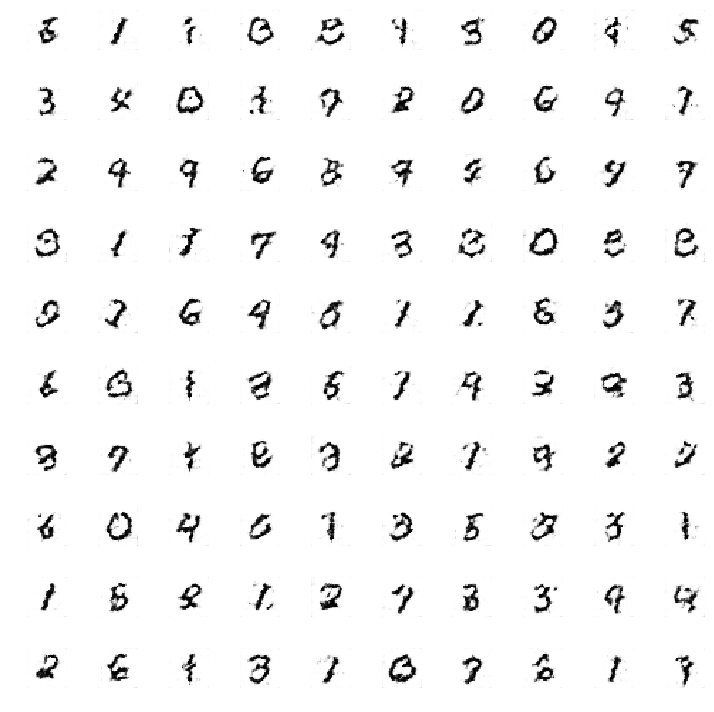

>Saved: infogan_generated_plot_0050.png and infogan_generator_model_0050.h5


In [8]:
# train model
infogan.train(X, n_epochs=50, n_batch=64, reporting_period=5)

Plot training metrics out.

Loss for the generator and discriminator models is likely to hover around 1.0 eventually, to demonstrate a stable training process or equilibrium between the training of the two models.

Discriminator Loss (real) Discriminator Loss*
Discriminator Loss (fake) Discriminator Loss*


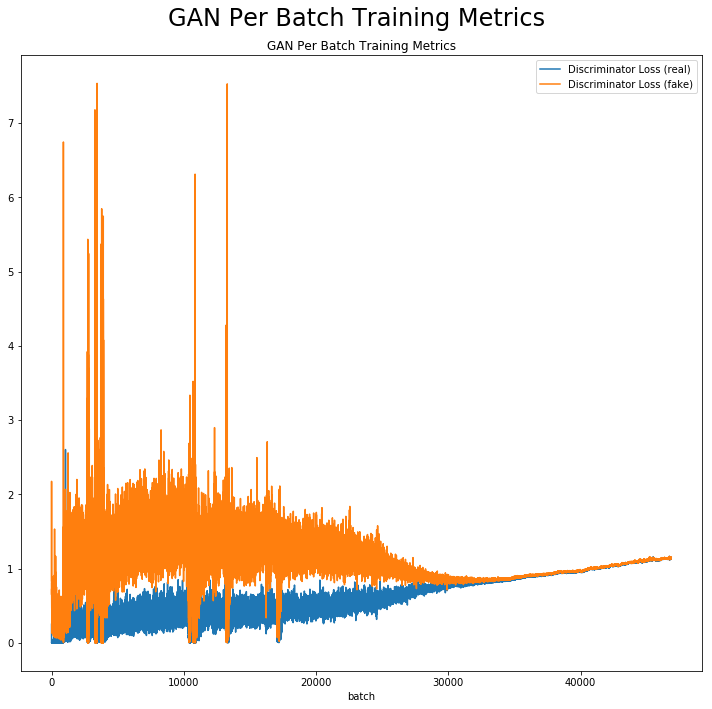

In [9]:
infogan.plot_training_metrics(label_match='Discriminator Loss*')

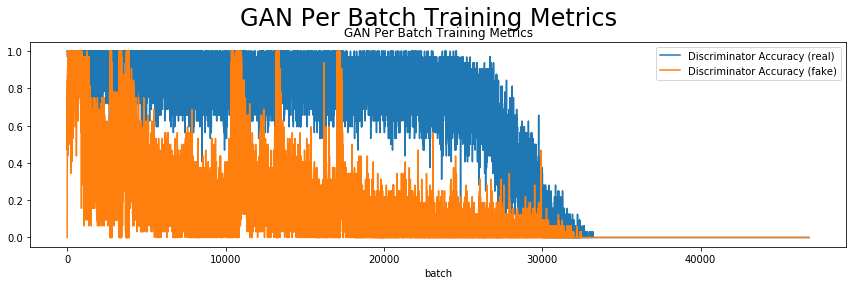

In [17]:
infogan.plot_training_metrics(label_match='Discriminator Accuracy*', figsize=(12,4))

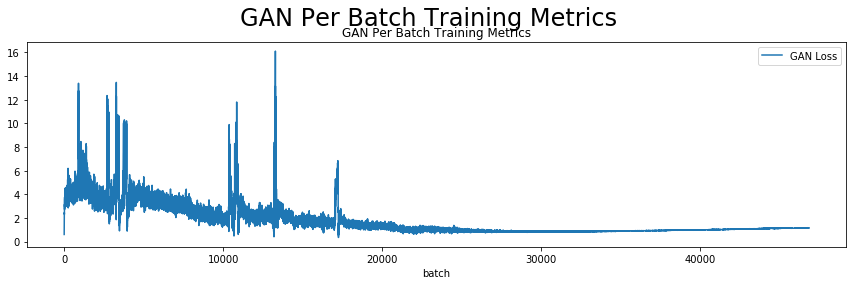

In [18]:
infogan.plot_training_metrics(label_match='GAN Loss', figsize=(12,4))

The loss for the auxiliary model should trend towards zero, as it gets better at predicting the categorical variable.

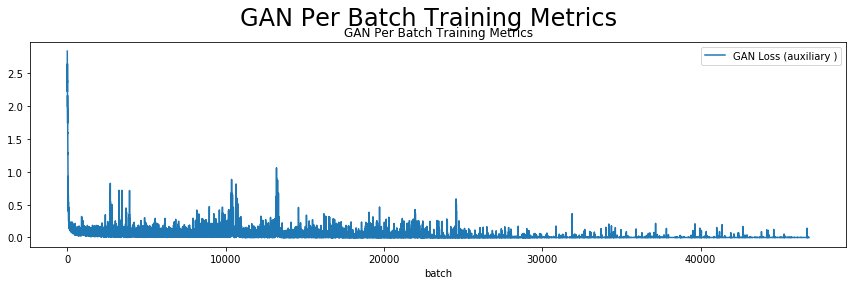

In [20]:
infogan.plot_training_metrics(label_match='GAN Loss (auxiliary )', figsize=(12,4))

## Evaluation
The AC-GAN technically does not conditionally generate images based on the class label, at least not in the same way as the conditional GAN. Nevertheless, the generated images often match the class label.

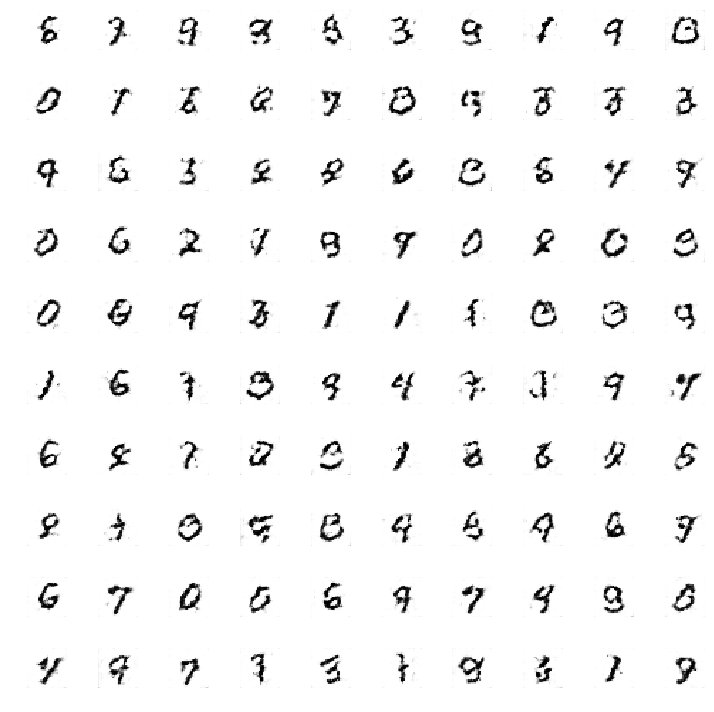

In [21]:
# generate images
latent_points, _ = infogan.generate_latent_points(100)

# generate images
X = infogan.generator_prediction(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

# plot the result
infogan.grid_plot(X)

Plot for the different categorical codes to see whether any mapping has been learned.

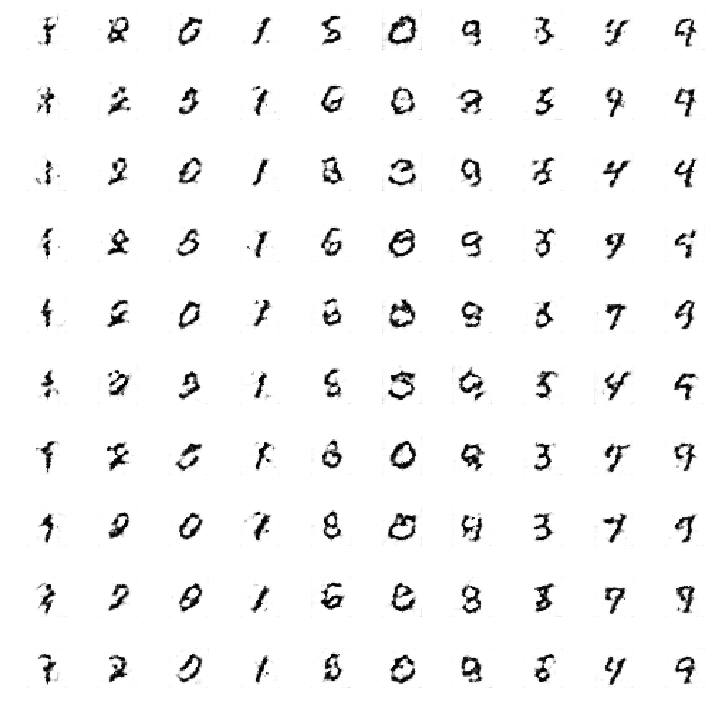

In [27]:
# generate images
latent_points, _ = infogan.generate_latent_points(100)
# specify categorical codes
cat_codes = np.asarray([x for _ in range(10) for x in range(10)])
cat_codes = to_categorical(cat_codes, num_classes=infogan.n_cat)
latent_points [:,64:75] = cat_codes

# generate images
X = infogan.generator_prediction(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

# plot the result
infogan.grid_plot(X)